In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Import CSV


In [2]:
#import csv
used_car_df=pd.read_csv("vehicles.csv")

In [3]:
#set the used car data from to df for easof use
df=used_car_df


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [5]:
df.describe()

id         price           year      odometer  county  \
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05     0.0   
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04     NaN   
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05     NaN   
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00     NaN   
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04     NaN   
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04     NaN   
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05     NaN   
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07     NaN   

                 lat           long  
count  420331.000000  420331.000000  
mean       38.493940     -94.748599  
std         5.841533      18.365462  
min       -84.122245    -159.827728  
25%        34.601900    -111.939847  
50%        39.150100     -88.432600  
75%        42.398900     -80.832039  
max        82.390818     173.885502

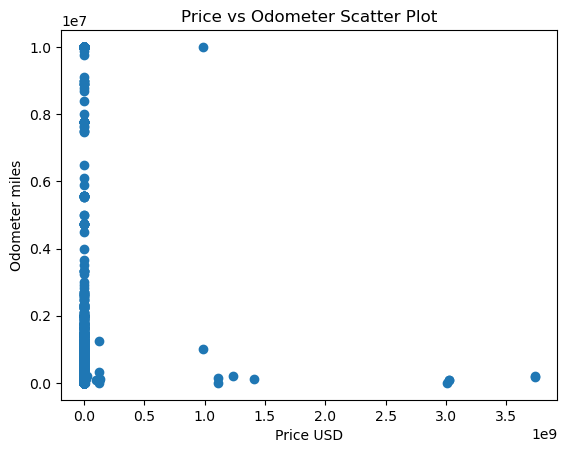

In [6]:
#scatterplot price and ocommeter to check of relationship and outliers
plt.scatter(df['price'], df['odometer'])
plt.xlabel("Price USD")  
plt.ylabel("Odometer miles")  
plt.title("Price vs Odometer Scatter Plot")  
plt.show()  

{'whiskers': [<matplotlib.lines.Line2D at 0x30e6ac090>,
 'caps': [<matplotlib.lines.Line2D at 0x30e6ae590>,
 'boxes': [<matplotlib.lines.Line2D at 0x30e6f57d0>],
 'medians': [<matplotlib.lines.Line2D at 0x30e6afb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x30e6f5110>],
 'means': []}

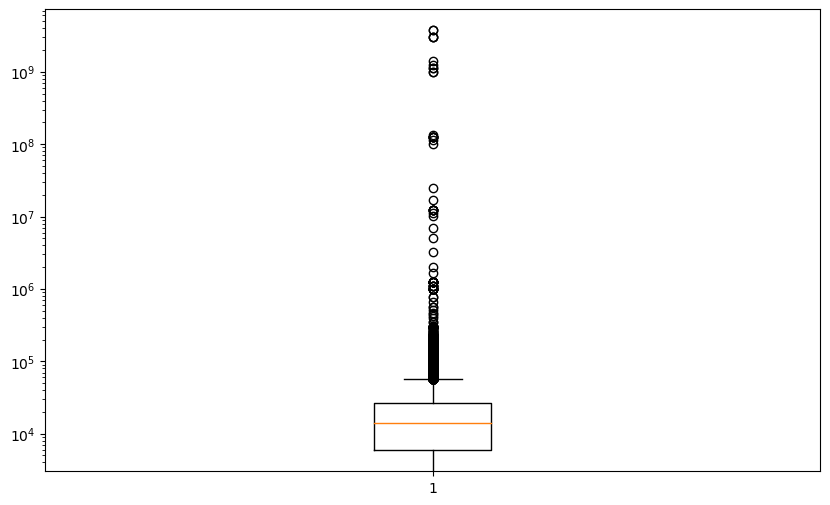

In [7]:
#box plot to check for outliers
plt.figure(figsize=(10, 6))  
plt.yscale('log')  
plt.boxplot(df['price'])

In [8]:
#remove outliers the first and third quartile
def filter_outliers(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df_filtered = df.copy()
    
    for column in numeric_columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        df_filtered = df_filtered.drop(outliers.index, errors='ignore')
    
    return df_filtered

In [9]:
df=filter_outliers(df)

{'whiskers': [<matplotlib.lines.Line2D at 0x30e9d4390>,
 'caps': [<matplotlib.lines.Line2D at 0x30e974850>,
 'boxes': [<matplotlib.lines.Line2D at 0x30e996610>],
 'medians': [<matplotlib.lines.Line2D at 0x30e975950>],
 'fliers': [<matplotlib.lines.Line2D at 0x30e976250>],
 'means': []}

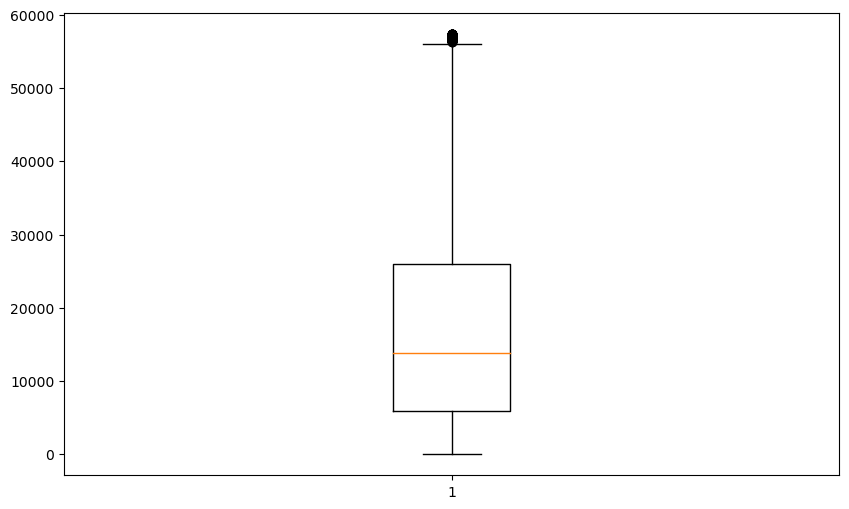

In [10]:
#check fo outliers
plt.figure(figsize=(10, 6))  # Set the figure size
plt.boxplot(df['price'])

(array([96402., 78031., 58781., 41899., 38708., 31806., 27870.,  9583.,
         6288.,  3990.]),
 array([    0. ,  5734.1, 11468.2, 17202.3, 22936.4, 28670.5, 34404.6,
        40138.7, 45872.8, 51606.9, 57341. ]),
 <BarContainer object of 10 artists>)

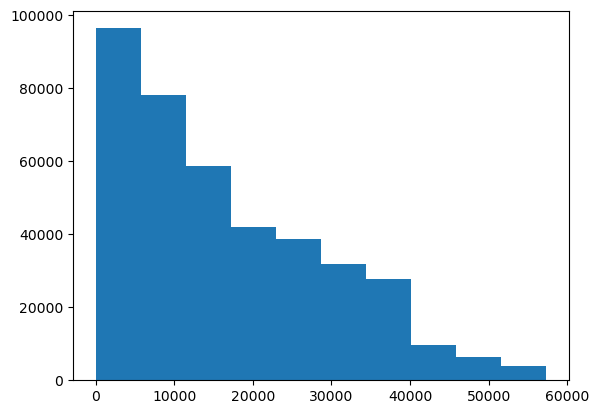

In [11]:
#check distribustion of price
plt.hist(df['price'], bins=10)

(array([68168., 62680., 55542., 60719., 52825., 41427., 25055., 13717.,
         6110.,  2891.]),
 array([     0. ,  27723.1,  55446.2,  83169.3, 110892.4, 138615.5,
        166338.6, 194061.7, 221784.8, 249507.9, 277231. ]),
 <BarContainer object of 10 artists>)

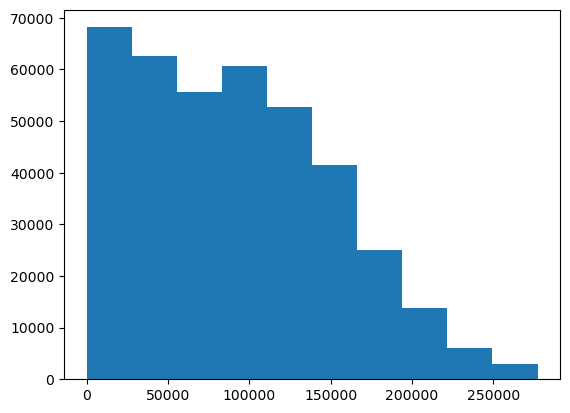

In [12]:
#check distribution of odometer
plt.hist(df['odometer'], bins=10)

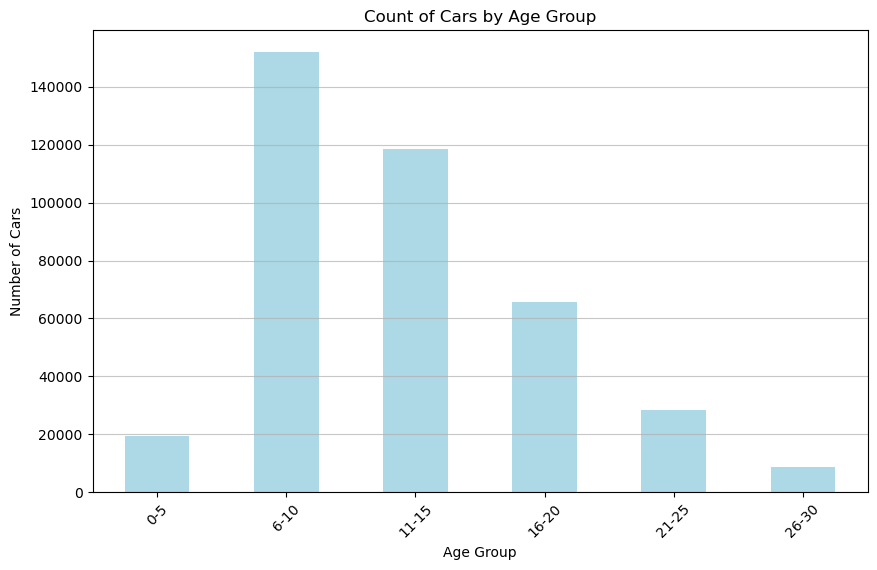

In [13]:
#group number of vechicles by age
df['age'] =2024-df['year'] #create column for age
bins = [0,5,10,15,20,25, 30] #creae 6 age bins, used .describe above to understand oldest car/oldest bin 
labels = ['0-5','6-10', '11-15', '16-20','21-25', '26-30'] #relabel bins for interpretability
df['age_group']= pd.cut(df['age'], bins=bins, labels=labels, right=False) #create column to hold the "age group"
car_counts = df['age_group'].value_counts().sort_index()  #count the number of cars in each age group

#plot number of cars by age group
plt.figure(figsize=(10, 6))
car_counts.plot(kind='bar', color='lightblue')  
plt.xlabel('Age Group')
plt.ylabel('Number of Cars')
plt.title('Count of Cars by Age Group')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='-', alpha=0.7) 
plt.show()


In [14]:
print(car_counts)

age_group
0-5       19403
6-10     151896
11-15    118538
16-20     65723
21-25     28259
26-30      8610
Name: count, dtype: int64


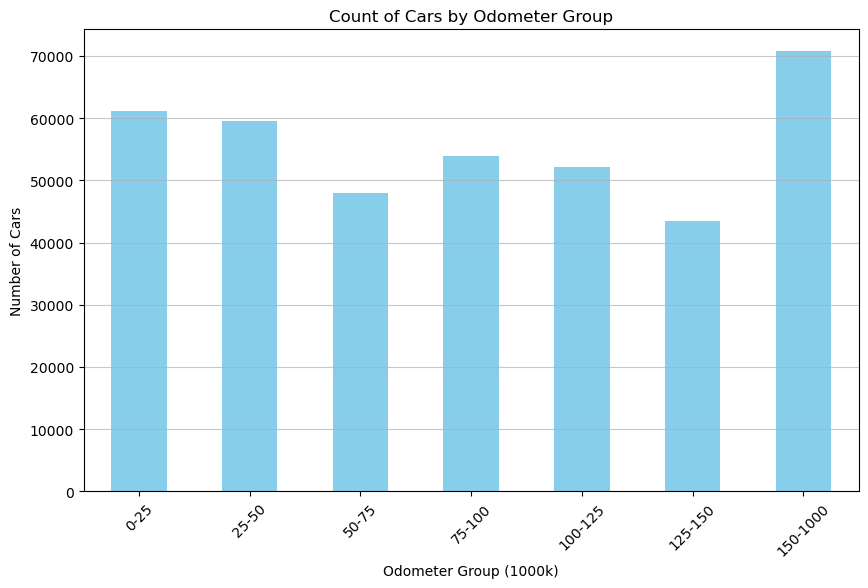

In [15]:
#repeat for odometer reading
bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 1000000]
labels = ['0-25', '25-50', '50-75', '75-100', '100-125', '125-150', '150-1000']
df['odometer_group'] = pd.cut(df['odometer'], bins=bins, labels=labels, right=False)
odometer_counts = df['odometer_group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
odometer_counts.plot(kind='bar', color='skyblue')  
plt.xlabel('Odometer Group (1000k)')
plt.ylabel('Number of Cars')
plt.title('Count of Cars by Odometer Group')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='-', alpha=0.7)  
plt.show()



([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '0-5'),
  Text(1, 0, '6-10'),
  Text(2, 0, '11-15'),
  Text(3, 0, '16-20'),
  Text(4, 0, '21-25'),
  Text(5, 0, '26-30')])

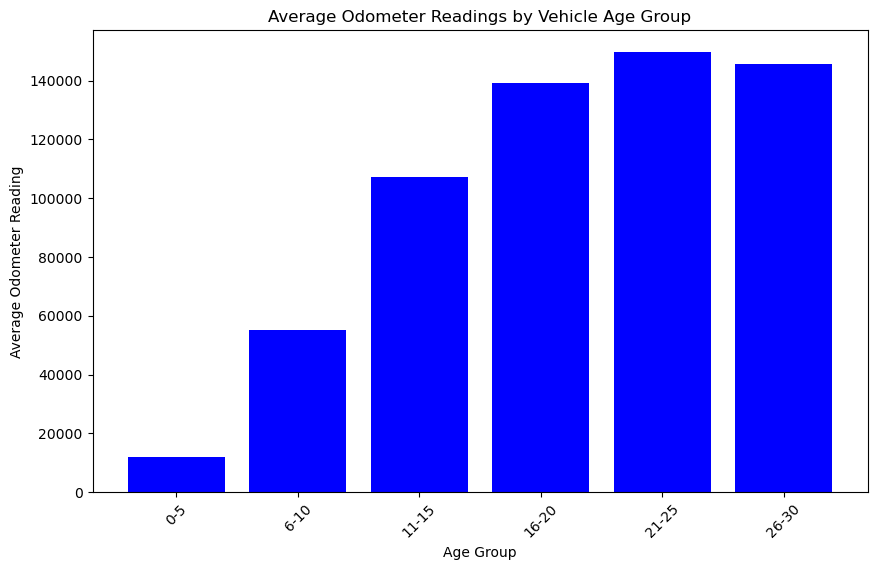

In [16]:
#find the mean odometer reading for each age group and plot
average_odometer = df.groupby('age_group').agg({'odometer': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(average_odometer['age_group'], average_odometer['odometer'], color='blue')
plt.xlabel('Age Group')
plt.ylabel('Average Odometer Reading')
plt.title('Average Odometer Readings by Vehicle Age Group')
plt.xticks(rotation=45) 

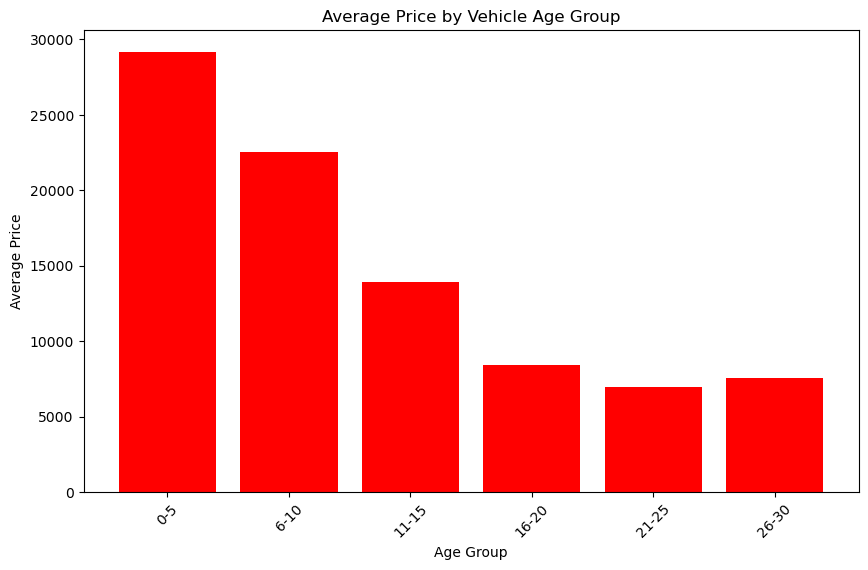

In [17]:
#find the average price for each age group and plot
average_age = df.groupby('age_group').agg({'price': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(average_age['age_group'], average_age['price'], color='red')
plt.xlabel('Age Group')
plt.ylabel('Average Price')
plt.title('Average Price by Vehicle Age Group')
plt.xticks(rotation=45)  # Helps in making age group labels more readable
plt.show()


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '0-25000'),
  Text(1, 0, '25-50000'),
  Text(2, 0, '50-75000'),
  Text(3, 0, '75-100000'),
  Text(4, 0, '10-125000'),
  Text(5, 0, '125-150000'),
  Text(6, 0, '150k-1000000')])

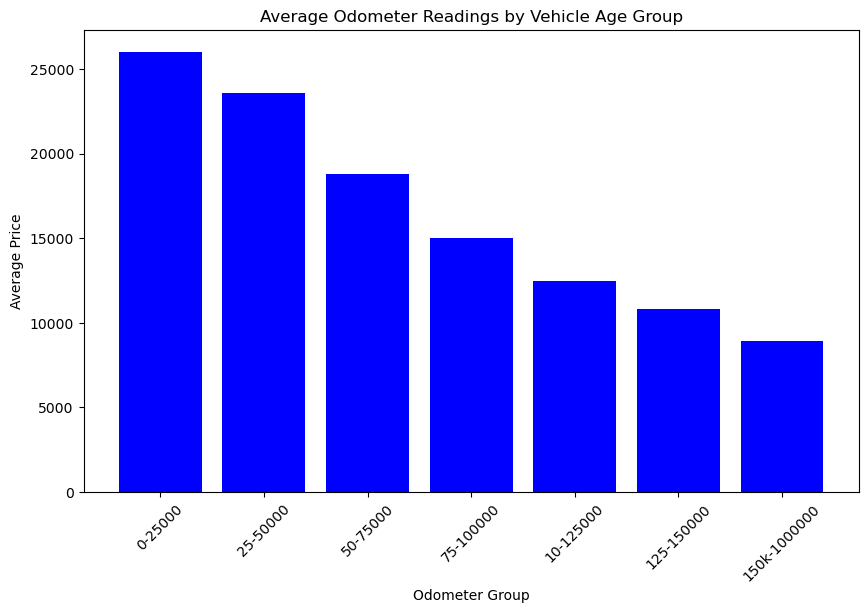

In [18]:
#find the average price for each odometer group and plot
bins = [0,25000,50000,75000,100000,125000,150000,1000000] 
labels = ['0-25000','25-50000', '50-75000', '75-100000','10-125000', '125-150000', '150k-1000000']
df['milage_range']= pd.cut(df['odometer'], bins=bins, labels=labels, right=False)

average_odometer = df.groupby('milage_range').agg({'price': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(average_odometer['milage_range'], average_odometer['price'], color='blue')
plt.xlabel('Odometer Group')
plt.ylabel('Average Price')
plt.title('Average Odometer Readings by Vehicle Age Group')
plt.xticks(rotation=45) 

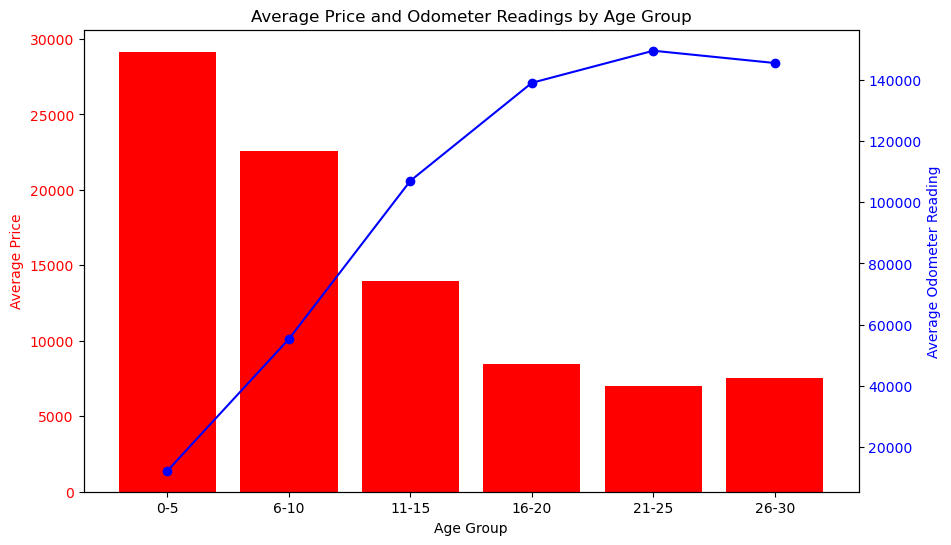

In [19]:
#Plot the average price and odometer reading by age group
bins = [0, 5, 10, 15, 20, 25, 30, 35] 
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

average_data = df.groupby('age_group').agg({'price': 'mean', 'odometer': 'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Price', color='red')
ax1.bar(average_data['age_group'], average_data['price'], color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Odometer Reading', color='blue')  
ax2.plot(average_data['age_group'], average_data['odometer'], color='blue', marker='o')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Average Price and Odometer Readings by Age Group')
plt.show()



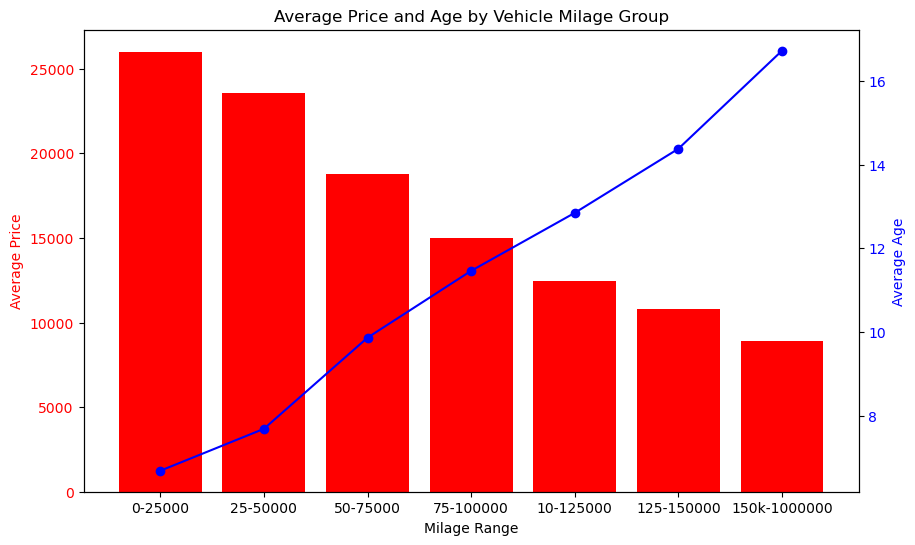

In [20]:
#plot the average price and average age by odometer group
bins = [0,25000,50000,75000,100000,125000,150000,1000000] 
labels = ['0-25000','25-50000', '50-75000', '75-100000','10-125000', '125-150000', '150k-1000000']
df['milage_range']= pd.cut(df['odometer'], bins=bins, labels=labels, right=False)
car_counts = df['milage_range'].value_counts().sort_index()  

average_data = df.groupby('milage_range').agg({'age': 'mean', 'price': 'mean'}).reset_index()
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Milage Range')
ax1.set_ylabel('Average Price', color="red")
ax1.bar(average_data['milage_range'], average_data['price'], color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Age',color='blue') 
ax2.plot(average_data['milage_range'], average_data['age'],color='blue', marker='o')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Average Price and Age by Vehicle Milage Group')
plt.show()

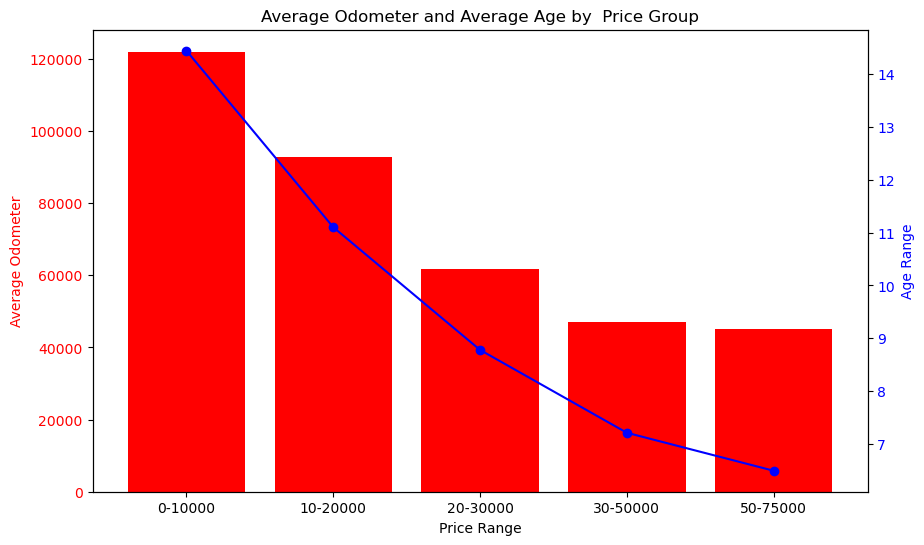

In [21]:
#plot the average odometer and age rance by price group
bins = [0, 10000, 20000, 30000, 50000, 75000]
labels = ['0-10000', '10-20000', '20-30000', '30-50000', '50-75000']
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)
price_counts = df['price_range'].value_counts().sort_index()

average_data = df.groupby('price_range').agg({'odometer': 'mean', 'age': 'mean'}).reset_index()
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Price Range')
ax1.set_ylabel('Average Odometer', color="red")
ax1.bar(average_data['price_range'], average_data['odometer'], color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.set_ylabel('Age Range',color='blue') 
ax2.plot(average_data['price_range'], average_data['age'],color='blue', marker='o')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Average Odometer and Average Age by  Price Group')
plt.show()

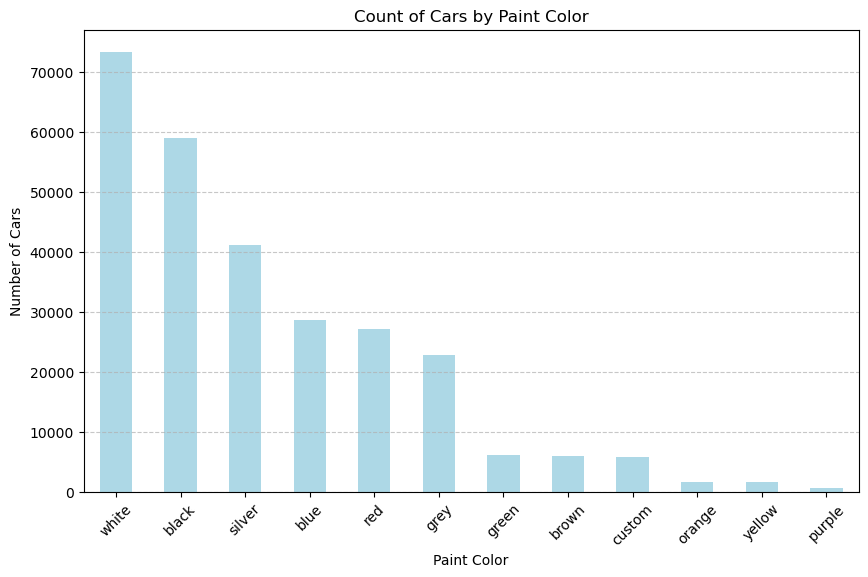

In [22]:
#count of cars by paint color
color_counts = df['paint_color'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
color_counts.plot(kind='bar', color='lightblue') 
plt.xlabel('Paint Color')
plt.ylabel('Number of Cars')
plt.title('Count of Cars by Paint Color')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

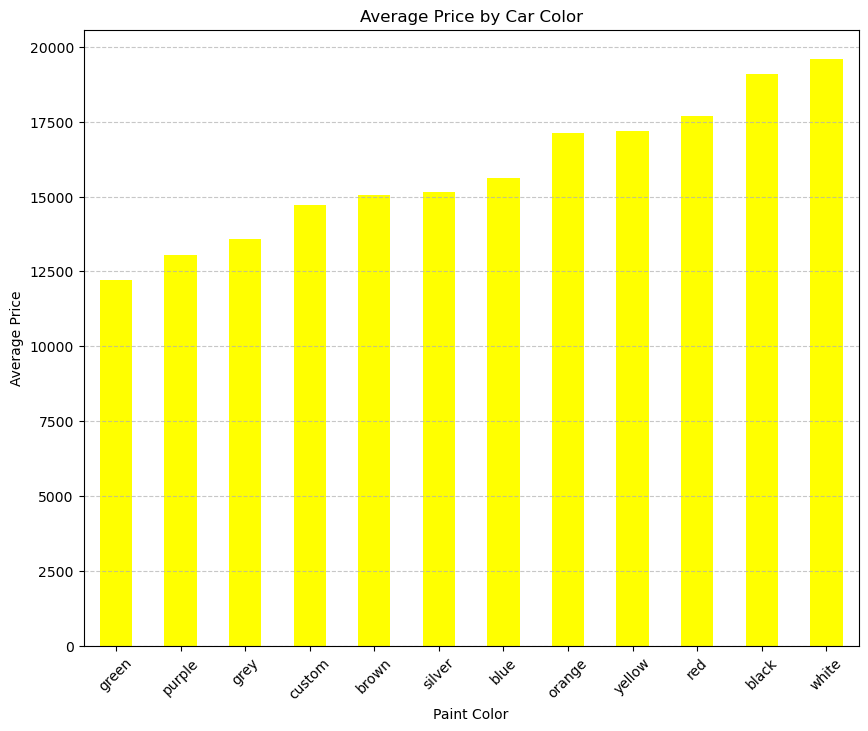

In [23]:

price_by_color = df.groupby('paint_color')['price'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 8))
price_by_color.plot(kind='bar', color='yellow')
plt.xlabel('Paint Color')
plt.ylabel('Average Price')
plt.title('Average Price by Car Color')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

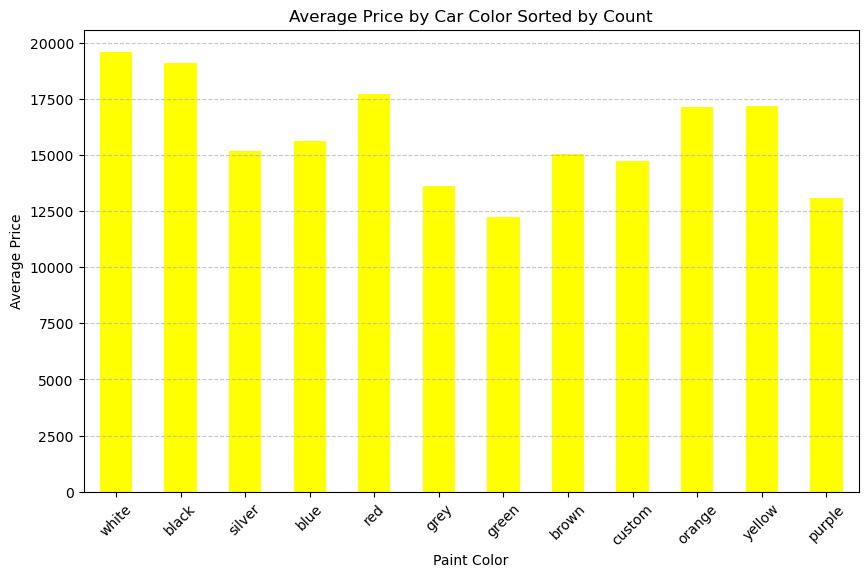

In [24]:
count_by_color = color_counts.to_frame(name='count')

merged = price_by_color.to_frame().merge(color_counts, left_index=True, right_index=True)

# Sort the merged data by the count of cars so columns for count are in same order is average price by color
color_sorted = merged.sort_values(by='count', ascending=False)
plt.figure(figsize=(10, 6))
color_sorted['price'].plot(kind='bar', color='yellow')
plt.xlabel('Paint Color')
plt.ylabel('Average Price')
plt.title('Average Price by Car Color Sorted by Count')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding a grid for easier interpretation of values
plt.show()

In [25]:
print(df.columns)

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date', 'age', 'age_group', 'odometer_group', 'milage_range',
       'price_range'],
      dtype='object')


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393358 entries, 27 to 426879
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   id              393358 non-null  int64   
 1   url             393358 non-null  object  
 2   region          393358 non-null  object  
 3   region_url      393358 non-null  object  
 4   price           393358 non-null  int64   
 5   year            392429 non-null  float64 
 6   manufacturer    380033 non-null  object  
 7   model           389776 non-null  object  
 8   condition       234192 non-null  object  
 9   cylinders       227931 non-null  object  
 10  fuel            390593 non-null  object  
 11  odometer        389134 non-null  float64 
 12  title_status    385525 non-null  object  
 13  transmission    391065 non-null  object  
 14  VIN             251935 non-null  object  
 15  drive           273203 non-null  object  
 16  size            109444 non-null  object  


In [27]:
#create a list of all the VIN numbers
vin_list = df['VIN'].dropna().tolist()


In [28]:

print(len(vin_list))

251935


In [29]:
#create frame to display the null values as a percentage of the total rows of the data frame. The missing value will display inorder of most missing values to least

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

column_name  percent_missing
county                  county       100.000000
size                      size        72.176999
cylinders            cylinders        42.055075
condition            condition        40.463395
VIN                        VIN        35.952745
drive                    drive        30.545966
paint_color        paint_color        30.296829
type                      type        20.910977
manufacturer      manufacturer         3.387499
title_status      title_status         1.991316
long                      long         1.636169
lat                        lat         1.636169
odometer              odometer         1.073831
odometer_group  odometer_group         1.073831
milage_range      milage_range         1.073831
model                    model         0.910621
fuel                      fuel         0.702922
transmission      transmission         0.582930
age                        age         0.236172
year                      year         0.236172
age_group            age_group         0.236172
description        description         0.006610
image_url            image_url         0.006101
posting_date      posting_date         0.006101
id                          id         0.000000
state                    state         0.000000
url                        url         0.000000
price                    price         0.000000
region_url          region_url         0.000000
region                  region         0.000000
price_range        price_range         0.000000

In [10]:
#the vin number contains information aboutthe vehicle. The VIN number can be decoded to give many of the features in this data set. There are many many other attributes the VIN number can describe.
#NHTSA has an API that can be called it can take a VIN number and return the atributes in key value pairs. 

import requests # requests allows for a http api call
from concurrent.futures import ThreadPoolExecutor, as_completed #concurrent allows for results to be , instead of one at a time. This cuts down on execution time
from tqdm import tqdm #tqdm displays a progress bar. Because of the number of vin numbers in this data set it will take hours to run. The progress bar gives a visual indication that the cell is still running normally
import pandas as pd
import time # this allows time to be added between retries

def decode_vin(vin, retries=3):# Vin is the VIN of interest and retries is the number of times the vin will be retried if there is an error
    url = f'https://vpic.nhtsa.dot.gov/api/vehicles/DecodeVin/{vin}?format=json' #api where "{vin}" is the VIN that will be ran through the API
    for attempt in range(retries):
        try:# the functtion will try a VIN number and return VIN details
            response = requests.get(url, timeout=10)
            response.raise_for_status()
            data = response.json() #data is the json recieved from the API call
            results = data.get('Results', [])# results is the data in the json 
            vin_details = {item['Variable']: item['Value'] for item in results if item['Value']}#vin details is the key value pairs from the data
            return vin, vin_details
        except requests.HTTPError as e: # the above will happen EXCEPT if there is a 403 error
            if e.response.status_code == 403: #is a forbidden error 
                print(f"403 Forbidden for VIN {vin}. Retrying in {2 ** attempt} seconds...") #if the error occurs it will retry 3 times as set above. this will delay the retry eachtime so the API doesnt shutdown for over attempts
                time.sleep(2 ** attempt)  # Exponential backoff
            else:
                print(f"Error fetching VIN data for {vin}: {e}")# if after the 3 retries it will print this error
                return vin, None
        except requests.Timeout: #the try step will run EXCEPT whtn there is a timeout error.
            print(f"Timeout for VIN {vin}. Retrying in {2 ** attempt} seconds...")
            time.sleep(2 ** attempt)  # Exponential backoff
        except (requests.RequestException, ValueError) as e:
            print(f"Error fetching VIN data for {vin}: {e}")
            return vin, None
    return vin, None

def get_vin_details(vin_list, max_workers=10): #runs concerently with the API call with up to 10 threads reducing the processing time. The function takes the vin in the list created from the df above
    vin_data = []#adds completed vind to this list
    timeout_vins = []#adds time out VINs to this list
    error_vins = []#adds error vins to this list
    
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        tasks = [executor.submit(decode_vin, vin) for vin in vin_list]
        progress_bar = tqdm(total=len(vin_list), desc="Processing VINs", unit="VIN")
        
        for future in as_completed(tasks):
            vin, vin_details = future.result()#retrieves the Vins as the functions run
            progress_bar.update(1)
            if vin_details: #if details are added to this list in the above fuction this makes new key value pairs and adds it to the list vin_data
                vin_data.append({
                    "VIN": vin,
                    "Make": vin_details.get("Make"),
                    "Model": vin_details.get("Model"),
                    "Year": vin_details.get("Model Year"),
                    "Drive Type": vin_details.get("Drive Type"),
                    "Body Class": vin_details.get("Body Class"),
                    "Transmission Style": vin_details.get("Transmission Style"),
                    "Engine Number of Cylinders": vin_details.get("Engine Number of Cylinders"),
                    "Fuel Type - Primary": vin_details.get("Fuel Type - Primary")
                })
            else: #otherwise it adds it to the timeout list
                timeout_vins.append(vin)
                vin_data.append({
                    "VIN": vin,
                    "Make": None,
                    "Model": None,
                    "Year": None,
                    "Drive Type": None,
                    "Body Class": None,
                    "Transmission Style": None,
                    "Engine Number of Cylinders": None,
                    "Fuel Type - Primary": None
                })
        
        progress_bar.close()
    
    return vin_data, timeout_vins, error_vins


# Get VIN details
vin_data, timeout_vins, error_vins = get_vin_details(vin_list, max_workers=10)

# Convert to DataFrame
df = pd.DataFrame(vin_data)

# Save to CSV this ensures this step only needs to be ran once
df.to_csv('vehicledetailsv3.csv', index=False)

print("Processed VINs:")
for info in vin_data:
    print(info)

print("\nTimeout VINs:", timeout_vins)
print("Error VINs:", error_vins)


Processing VINs:   0%|                  | 557/265838 [01:07<5:01:39, 14.66VIN/s]

403 Forbidden for VIN 5LMTJ2AH3FUJ33050. Retrying in 1 seconds...
403 Forbidden for VIN JA3AJ26E03U008630. Retrying in 1 seconds...
403 Forbidden for VIN 1N6DD0ER0KN766844. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RR7GG8JS247420. Retrying in 1 seconds...


Processing VINs:   0%|                  | 559/265838 [01:07<6:00:41, 12.26VIN/s]

403 Forbidden for VIN 2FMDK49C78BA98563. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AL3AP5FN898640. Retrying in 1 seconds...


Processing VINs:   0%|                  | 561/265838 [01:07<6:20:41, 11.61VIN/s]

403 Forbidden for VIN 1FTEF15N1RNA56088. Retrying in 1 seconds...
403 Forbidden for VIN 1FAFP34N35W152250. Retrying in 1 seconds...
403 Forbidden for VIN 1G1YY32P7S5114521. Retrying in 1 seconds...
403 Forbidden for VIN 1J8GL48K06W123802. Retrying in 1 seconds...
403 Forbidden for VIN 5LMTJ2AH3FUJ33050. Retrying in 2 seconds...
403 Forbidden for VIN JA3AJ26E03U008630. Retrying in 2 seconds...403 Forbidden for VIN 1N6DD0ER0KN766844. Retrying in 2 seconds...

403 Forbidden for VIN 1C6RR7GG8JS247420. Retrying in 2 seconds...
403 Forbidden for VIN 2FMDK49C78BA98563. Retrying in 2 seconds...
403 Forbidden for VIN 1N4AL3AP5FN898640. Retrying in 2 seconds...
403 Forbidden for VIN 1FTEF15N1RNA56088. Retrying in 2 seconds...
403 Forbidden for VIN 1FAFP34N35W152250. Retrying in 2 seconds...
403 Forbidden for VIN 1G1YY32P7S5114521. Retrying in 2 seconds...
403 Forbidden for VIN 1J8GL48K06W123802. Retrying in 2 seconds...
403 Forbidden for VIN 5LMTJ2AH3FUJ33050. Retrying in 4 seconds...
403 Forbid

Processing VINs:   0%|                 | 566/265838 [01:14<46:34:32,  1.58VIN/s]

403 Forbidden for VIN JTHBK1EG2A2378193. Retrying in 1 seconds...
403 Forbidden for VIN JN1BJ0RP2HM382528. Retrying in 1 seconds...
403 Forbidden for VIN JN1BY1APXHM740651. Retrying in 1 seconds...
403 Forbidden for VIN 1HGCM56694A166593. Retrying in 1 seconds...


Processing VINs:   0%|                 | 570/265838 [01:15<29:17:16,  2.52VIN/s]

403 Forbidden for VIN NM0GS9F74G1243703. Retrying in 1 seconds...
403 Forbidden for VIN KL4CJASBXGB557960. Retrying in 1 seconds...
403 Forbidden for VIN 2T1BR32E36C706726. Retrying in 1 seconds...
403 Forbidden for VIN 3GCUYEED9KG200375. Retrying in 1 seconds...
403 Forbidden for VIN JTHBL5EF1D5123341. Retrying in 1 seconds...


Processing VINs:   0%|                 | 572/265838 [01:15<24:54:43,  2.96VIN/s]

403 Forbidden for VIN JA4J24A58JZ011951. Retrying in 1 seconds...
403 Forbidden for VIN JTHBK1EG2A2378193. Retrying in 2 seconds...
403 Forbidden for VIN JN1BY1APXHM740651. Retrying in 2 seconds...
403 Forbidden for VIN JN1BJ0RP2HM382528. Retrying in 2 seconds...
403 Forbidden for VIN 1HGCM56694A166593. Retrying in 2 seconds...
403 Forbidden for VIN NM0GS9F74G1243703. Retrying in 2 seconds...
403 Forbidden for VIN KL4CJASBXGB557960. Retrying in 2 seconds...
403 Forbidden for VIN 2T1BR32E36C706726. Retrying in 2 seconds...
403 Forbidden for VIN 3GCUYEED9KG200375. Retrying in 2 seconds...
403 Forbidden for VIN JTHBL5EF1D5123341. Retrying in 2 seconds...
403 Forbidden for VIN JA4J24A58JZ011951. Retrying in 2 seconds...
403 Forbidden for VIN JTHBK1EG2A2378193. Retrying in 4 seconds...
403 Forbidden for VIN JN1BY1APXHM740651. Retrying in 4 seconds...
403 Forbidden for VIN JN1BJ0RP2HM382528. Retrying in 4 seconds...
403 Forbidden for VIN 1HGCM56694A166593. Retrying in 4 seconds...
403 Forbid

Processing VINs:   0%|                 | 575/265838 [01:22<68:49:53,  1.07VIN/s]

403 Forbidden for VIN WDD1J6GBXJF015072. Retrying in 1 seconds...
403 Forbidden for VIN 1GYKNFRS1HZ312573. Retrying in 1 seconds...
403 Forbidden for VIN SHHFK8G79KU202456. Retrying in 1 seconds...
403 Forbidden for VIN 5YFDPRAE6LP106166. Retrying in 1 seconds...


Processing VINs:   0%|                 | 579/265838 [01:22<37:04:26,  1.99VIN/s]

403 Forbidden for VIN 4T1BF1FK5HU280679. Retrying in 1 seconds...
403 Forbidden for VIN 2T2ZZMCAXHC078839. Retrying in 1 seconds...


Processing VINs:   0%|                 | 581/265838 [01:22<26:51:23,  2.74VIN/s]

403 Forbidden for VIN JTHCF1D25E5004261. Retrying in 1 seconds...
403 Forbidden for VIN 1FAFP56U35A285359. Retrying in 1 seconds...
403 Forbidden for VIN 3GCUKREC6FG111658. Retrying in 1 seconds...
403 Forbidden for VIN 2G4WD582061211256. Retrying in 1 seconds...
403 Forbidden for VIN WDD1J6GBXJF015072. Retrying in 2 seconds...
403 Forbidden for VIN 1GYKNFRS1HZ312573. Retrying in 2 seconds...
403 Forbidden for VIN SHHFK8G79KU202456. Retrying in 2 seconds...
403 Forbidden for VIN 5YFDPRAE6LP106166. Retrying in 2 seconds...
403 Forbidden for VIN 4T1BF1FK5HU280679. Retrying in 2 seconds...
403 Forbidden for VIN 2T2ZZMCAXHC078839. Retrying in 2 seconds...
403 Forbidden for VIN JTHCF1D25E5004261. Retrying in 2 seconds...
403 Forbidden for VIN 1FAFP56U35A285359. Retrying in 2 seconds...
403 Forbidden for VIN 3GCUKREC6FG111658. Retrying in 2 seconds...
403 Forbidden for VIN 2G4WD582061211256. Retrying in 2 seconds...
403 Forbidden for VIN WDD1J6GBXJF015072. Retrying in 4 seconds...
403 Forbid

Processing VINs:   0%|                 | 587/265838 [01:29<48:56:58,  1.51VIN/s]

403 Forbidden for VIN KNADE123786319837. Retrying in 1 seconds...
403 Forbidden for VIN JTNKARJE6GJ504489. Retrying in 1 seconds...
403 Forbidden for VIN 5FRYD4H81EB042046. Retrying in 1 seconds...
403 Forbidden for VIN 5NPD84LFXJH396699. Retrying in 1 seconds...


Processing VINs:   0%|                 | 589/265838 [01:30<37:34:55,  1.96VIN/s]

403 Forbidden for VIN 3GCPCTE09DG226555. Retrying in 1 seconds...
403 Forbidden for VIN 1G4HR54K6YU316195. Retrying in 1 seconds...


Processing VINs:   0%|                 | 591/265838 [01:30<28:03:38,  2.63VIN/s]

403 Forbidden for VIN 5FRYD4H45EB042564. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD4H52KL002706. Retrying in 1 seconds...
403 Forbidden for VIN WDDZF4JB7JA379223. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD4H50KL008682. Retrying in 1 seconds...
403 Forbidden for VIN KNADE123786319837. Retrying in 2 seconds...
403 Forbidden for VIN JTNKARJE6GJ504489. Retrying in 2 seconds...
403 Forbidden for VIN 5FRYD4H81EB042046. Retrying in 2 seconds...
403 Forbidden for VIN 5NPD84LFXJH396699. Retrying in 2 seconds...
403 Forbidden for VIN 3GCPCTE09DG226555. Retrying in 2 seconds...
403 Forbidden for VIN 1G4HR54K6YU316195. Retrying in 2 seconds...
403 Forbidden for VIN 5FRYD4H45EB042564. Retrying in 2 seconds...
403 Forbidden for VIN 5J8YD4H52KL002706. Retrying in 2 seconds...
403 Forbidden for VIN WDDZF4JB7JA379223. Retrying in 2 seconds...
403 Forbidden for VIN 5J8YD4H50KL008682. Retrying in 2 seconds...
403 Forbidden for VIN KNADE123786319837. Retrying in 4 seconds...
403 Forbid

Processing VINs:   0%|                 | 594/265838 [01:36<78:01:44,  1.06s/VIN]

403 Forbidden for VIN 4T1G11AK6LU987956. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AL4FV1LN304196. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CCAAG5KH589958. Retrying in 1 seconds...
403 Forbidden for VIN 1C4PJMCB2GW152594. Retrying in 1 seconds...


Processing VINs:   0%|                 | 599/265838 [01:37<34:53:59,  2.11VIN/s]

403 Forbidden for VIN 5J8YD4H59JL010087. Retrying in 1 seconds...
403 Forbidden for VIN JN8CS1MW5HM411107. Retrying in 1 seconds...


Processing VINs:   0%|                 | 601/265838 [01:37<24:35:36,  3.00VIN/s]

403 Forbidden for VIN JTEBU5JR0E5184790. Retrying in 1 seconds...
403 Forbidden for VIN 1FMCU03192KB03362. Retrying in 1 seconds...
403 Forbidden for VIN 1G1ZK57738F235673. Retrying in 1 seconds...


Processing VINs:   0%|                 | 602/265838 [01:37<23:33:34,  3.13VIN/s]

403 Forbidden for VIN 1FTNE2EW3ADA14050. Retrying in 1 seconds...
403 Forbidden for VIN 4T1G11AK6LU987956. Retrying in 2 seconds...
403 Forbidden for VIN 1N4AL4FV1LN304196. Retrying in 2 seconds...
403 Forbidden for VIN 2C3CCAAG5KH589958. Retrying in 2 seconds...
403 Forbidden for VIN 1C4PJMCB2GW152594. Retrying in 2 seconds...
403 Forbidden for VIN 5J8YD4H59JL010087. Retrying in 2 seconds...
403 Forbidden for VIN JN8CS1MW5HM411107. Retrying in 2 seconds...
403 Forbidden for VIN JTEBU5JR0E5184790. Retrying in 2 seconds...
403 Forbidden for VIN 1FMCU03192KB03362. Retrying in 2 seconds...
403 Forbidden for VIN 1G1ZK57738F235673. Retrying in 2 seconds...
403 Forbidden for VIN 1FTNE2EW3ADA14050. Retrying in 2 seconds...
403 Forbidden for VIN 4T1G11AK6LU987956. Retrying in 4 seconds...
403 Forbidden for VIN 1N4AL4FV1LN304196. Retrying in 4 seconds...
403 Forbidden for VIN 1C4PJMCB2GW152594. Retrying in 4 seconds...
403 Forbidden for VIN 2C3CCAAG5KH589958. Retrying in 4 seconds...
403 Forbid

Processing VINs:   0%|                 | 604/265838 [01:44<95:32:09,  1.30s/VIN]

403 Forbidden for VIN 4T1BE32K55U090199. Retrying in 1 seconds...
403 Forbidden for VIN 1FDBF2B63CEC57788. Retrying in 1 seconds...
403 Forbidden for VIN 5J6RM3H3XDL038359. Retrying in 1 seconds...
403 Forbidden for VIN 1N6BD0CT2HN739952. Retrying in 1 seconds...


Processing VINs:   0%|                 | 609/265838 [01:44<35:37:12,  2.07VIN/s]

403 Forbidden for VIN JM3TB28A380158898. Retrying in 1 seconds...
403 Forbidden for VIN SAJWA73B44TG16628. Retrying in 1 seconds...


Processing VINs:   0%|                 | 611/265838 [01:45<24:44:19,  2.98VIN/s]

403 Forbidden for VIN 1G1PJ5S98B7275266. Retrying in 1 seconds...
403 Forbidden for VIN KNDJX3A59F7772430. Retrying in 1 seconds...
403 Forbidden for VIN 5J8TC2H30KL041519. Retrying in 1 seconds...


Processing VINs:   0%|                 | 612/265838 [01:45<24:20:27,  3.03VIN/s]

403 Forbidden for VIN 4T1BE32K55U090199. Retrying in 2 seconds...
403 Forbidden for VIN WBAYE8C58DD132025. Retrying in 1 seconds...
403 Forbidden for VIN 1N6BD0CT2HN739952. Retrying in 2 seconds...
403 Forbidden for VIN 1FDBF2B63CEC57788. Retrying in 2 seconds...
403 Forbidden for VIN 5J6RM3H3XDL038359. Retrying in 2 seconds...
403 Forbidden for VIN JM3TB28A380158898. Retrying in 2 seconds...
403 Forbidden for VIN SAJWA73B44TG16628. Retrying in 2 seconds...
403 Forbidden for VIN 1G1PJ5S98B7275266. Retrying in 2 seconds...
403 Forbidden for VIN KNDJX3A59F7772430. Retrying in 2 seconds...
403 Forbidden for VIN 5J8TC2H30KL041519. Retrying in 2 seconds...
403 Forbidden for VIN WBAYE8C58DD132025. Retrying in 2 seconds...
403 Forbidden for VIN 4T1BE32K55U090199. Retrying in 4 seconds...
403 Forbidden for VIN 1FDBF2B63CEC57788. Retrying in 4 seconds...
403 Forbidden for VIN 1N6BD0CT2HN739952. Retrying in 4 seconds...
403 Forbidden for VIN 5J6RM3H3XDL038359. Retrying in 4 seconds...
403 Forbid

Processing VINs:   0%|                 | 614/265838 [01:51<96:32:35,  1.31s/VIN]

403 Forbidden for VIN SALMF13428A268857. Retrying in 1 seconds...
403 Forbidden for VIN 2FMZA57605BA66741. Retrying in 1 seconds...
403 Forbidden for VIN ZARFAMAN1L7630118. Retrying in 1 seconds...
403 Forbidden for VIN 5NPE24AF5JH692092. Retrying in 1 seconds...


Processing VINs:   0%|                 | 618/265838 [01:52<43:13:34,  1.70VIN/s]

403 Forbidden for VIN 4T1BG22K9YU991195. Retrying in 1 seconds...


Processing VINs:   0%|                 | 621/265838 [01:52<25:05:41,  2.94VIN/s]

403 Forbidden for VIN KM8K22AA7MU629352. Retrying in 1 seconds...
403 Forbidden for VIN JM3KFADM2K0531978. Retrying in 1 seconds...
403 Forbidden for VIN 1GYS4KKJXJR155824. Retrying in 1 seconds...


Processing VINs:   0%|                 | 622/265838 [01:52<25:39:39,  2.87VIN/s]

403 Forbidden for VIN KNDJP3A58J7592011. Retrying in 1 seconds...
403 Forbidden for VIN SALMF13428A268857. Retrying in 2 seconds...
403 Forbidden for VIN 4T1B11HK7KU716273. Retrying in 1 seconds...
403 Forbidden for VIN 2FMZA57605BA66741. Retrying in 2 seconds...
403 Forbidden for VIN ZARFAMAN1L7630118. Retrying in 2 seconds...
403 Forbidden for VIN 5NPE24AF5JH692092. Retrying in 2 seconds...
403 Forbidden for VIN 4T1BG22K9YU991195. Retrying in 2 seconds...
403 Forbidden for VIN KM8K22AA7MU629352. Retrying in 2 seconds...
403 Forbidden for VIN JM3KFADM2K0531978. Retrying in 2 seconds...
403 Forbidden for VIN 1GYS4KKJXJR155824. Retrying in 2 seconds...
403 Forbidden for VIN KNDJP3A58J7592011. Retrying in 2 seconds...
403 Forbidden for VIN 4T1B11HK7KU716273. Retrying in 2 seconds...
403 Forbidden for VIN SALMF13428A268857. Retrying in 4 seconds...
403 Forbidden for VIN ZARFAMAN1L7630118. Retrying in 4 seconds...
403 Forbidden for VIN 2FMZA57605BA66741. Retrying in 4 seconds...
403 Forbid

Processing VINs:   0%|                 | 624/265838 [01:59<99:26:41,  1.35s/VIN]

403 Forbidden for VIN 2HKRM3H31GH561218. Retrying in 1 seconds...
403 Forbidden for VIN 1N6BA0ECXBN317229. Retrying in 1 seconds...
403 Forbidden for VIN 1C4RJECG9FC719149. Retrying in 1 seconds...


Processing VINs:   0%|                 | 627/265838 [01:59<50:31:12,  1.46VIN/s]

403 Forbidden for VIN WDDZF4JB5JA329436. Retrying in 1 seconds...
403 Forbidden for VIN 5YJSA1DN4DFP11483. Retrying in 1 seconds...


Processing VINs:   0%|                 | 631/265838 [01:59<25:55:28,  2.84VIN/s]

403 Forbidden for VIN JTDKB20U773225963. Retrying in 1 seconds...
403 Forbidden for VIN JTHBJ46G882224925. Retrying in 1 seconds...
403 Forbidden for VIN 0906419252. Retrying in 1 seconds...
403 Forbidden for VIN 1GNDS13S742284310. Retrying in 1 seconds...


Processing VINs:   0%|                 | 632/265838 [02:00<26:00:17,  2.83VIN/s]

403 Forbidden for VIN 2HKRM3H31GH561218. Retrying in 2 seconds...
403 Forbidden for VIN 1FC3E3KL4CDB34837. Retrying in 1 seconds...
403 Forbidden for VIN 1N6BA0ECXBN317229. Retrying in 2 seconds...
403 Forbidden for VIN 1C4RJECG9FC719149. Retrying in 2 seconds...
403 Forbidden for VIN WDDZF4JB5JA329436. Retrying in 2 seconds...
403 Forbidden for VIN 5YJSA1DN4DFP11483. Retrying in 2 seconds...
403 Forbidden for VIN 0906419252. Retrying in 2 seconds...
403 Forbidden for VIN JTHBJ46G882224925. Retrying in 2 seconds...
403 Forbidden for VIN JTDKB20U773225963. Retrying in 2 seconds...
403 Forbidden for VIN 1GNDS13S742284310. Retrying in 2 seconds...
403 Forbidden for VIN 1FC3E3KL4CDB34837. Retrying in 2 seconds...
403 Forbidden for VIN 2HKRM3H31GH561218. Retrying in 4 seconds...
403 Forbidden for VIN WDDZF4JB5JA329436. Retrying in 4 seconds...
403 Forbidden for VIN 1N6BA0ECXBN317229. Retrying in 4 seconds...
403 Forbidden for VIN 1C4RJECG9FC719149. Retrying in 4 seconds...
403 Forbidden for

Processing VINs:   0%|                | 634/265838 [02:06<100:13:11,  1.36s/VIN]

403 Forbidden for VIN YV1RS592192724102. Retrying in 1 seconds...
403 Forbidden for VIN 2G4WC582961280594. Retrying in 1 seconds...
403 Forbidden for VIN WA1ANAFY7J2102310. Retrying in 1 seconds...
403 Forbidden for VIN 1FDRF3G65CEC39189. Retrying in 1 seconds...


Processing VINs:   0%|                 | 637/265838 [02:06<49:42:47,  1.48VIN/s]

403 Forbidden for VIN WBA5B1C51FG126135. Retrying in 1 seconds...


Processing VINs:   0%|                 | 641/265838 [02:07<26:20:32,  2.80VIN/s]

403 Forbidden for VIN 1FD7X2B65CEC58024. Retrying in 1 seconds...
403 Forbidden for VIN 1FD8W3G69HEB28454. Retrying in 1 seconds...
403 Forbidden for VIN 1FTRF12V98KD94523. Retrying in 1 seconds...
403 Forbidden for VIN 1GT21XEG0FZ537816. Retrying in 1 seconds...
403 Forbidden for VIN YV1RS592192724102. Retrying in 2 seconds...
403 Forbidden for VIN 1FD7X2B60FEB07855. Retrying in 1 seconds...
403 Forbidden for VIN WA1ANAFY7J2102310. Retrying in 2 seconds...403 Forbidden for VIN 1FDRF3G65CEC39189. Retrying in 2 seconds...

403 Forbidden for VIN 2G4WC582961280594. Retrying in 2 seconds...
403 Forbidden for VIN WBA5B1C51FG126135. Retrying in 2 seconds...
403 Forbidden for VIN 1FD7X2B65CEC58024. Retrying in 2 seconds...
403 Forbidden for VIN 1FTRF12V98KD94523. Retrying in 2 seconds...
403 Forbidden for VIN 1FD8W3G69HEB28454. Retrying in 2 seconds...
403 Forbidden for VIN 1GT21XEG0FZ537816. Retrying in 2 seconds...
403 Forbidden for VIN 1FD7X2B60FEB07855. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 644/265838 [02:14<78:24:40,  1.06s/VIN]

403 Forbidden for VIN 1FDRF3G64CED01178. Retrying in 1 seconds...
403 Forbidden for VIN 1GBJG31K281131930. Retrying in 1 seconds...403 Forbidden for VIN 1C3CCCBBXGN146315. Retrying in 1 seconds...

403 Forbidden for VIN 1FT7W2B61HEE45601. Retrying in 1 seconds...
403 Forbidden for VIN 1N6BF0KY6HN800985. Retrying in 1 seconds...


Processing VINs:   0%|                 | 651/265838 [02:14<29:19:05,  2.51VIN/s]

403 Forbidden for VIN 1FDBF2A68CEC73003. Retrying in 1 seconds...
403 Forbidden for VIN 3N6CM0KN6FK712103. Retrying in 1 seconds...
403 Forbidden for VIN JN1EV7EL8KM291378. Retrying in 1 seconds...
403 Forbidden for VIN 3FAHP0HA3BR106978. Retrying in 1 seconds...
403 Forbidden for VIN 1FDRF3G64CED01178. Retrying in 2 seconds...
403 Forbidden for VIN 1FM5K7D80GGA55120. Retrying in 1 seconds...
403 Forbidden for VIN 1C3CCCBBXGN146315. Retrying in 2 seconds...
403 Forbidden for VIN 1GBJG31K281131930. Retrying in 2 seconds...
403 Forbidden for VIN 1FT7W2B61HEE45601. Retrying in 2 seconds...
403 Forbidden for VIN 1N6BF0KY6HN800985. Retrying in 2 seconds...
403 Forbidden for VIN 1FDBF2A68CEC73003. Retrying in 2 seconds...
403 Forbidden for VIN 3N6CM0KN6FK712103. Retrying in 2 seconds...
403 Forbidden for VIN JN1EV7EL8KM291378. Retrying in 2 seconds...
403 Forbidden for VIN 3FAHP0HA3BR106978. Retrying in 2 seconds...
403 Forbidden for VIN 1FM5K7D80GGA55120. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 654/265838 [02:21<72:38:17,  1.01VIN/s]

403 Forbidden for VIN SAJBJ4BN4HCY33978. Retrying in 1 seconds...
403 Forbidden for VIN ZN661XUA1HX210904. Retrying in 1 seconds...403 Forbidden for VIN 2LMPJ6LR9JBL12696. Retrying in 1 seconds...

403 Forbidden for VIN 1N6DD0ER9KN772402. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1EP0JFD83808. Retrying in 1 seconds...


Processing VINs:   0%|                 | 658/265838 [02:22<43:16:23,  1.70VIN/s]

403 Forbidden for VIN 3N1CP5DV4LL500636. Retrying in 1 seconds...
403 Forbidden for VIN JTJYARBZ2J2097415. Retrying in 1 seconds...
403 Forbidden for VIN 5TDZK3EH6DS091697. Retrying in 1 seconds...
403 Forbidden for VIN JA4AD3A35GZ020361. Retrying in 1 seconds...


Processing VINs:   0%|                 | 662/265838 [02:22<29:46:07,  2.47VIN/s]

403 Forbidden for VIN SAJBJ4BN4HCY33978. Retrying in 2 seconds...
403 Forbidden for VIN 1FTMF1CM6BKD55331. Retrying in 1 seconds...
403 Forbidden for VIN 2LMPJ6LR9JBL12696. Retrying in 2 seconds...
403 Forbidden for VIN ZN661XUA1HX210904. Retrying in 2 seconds...
403 Forbidden for VIN 1N6DD0ER9KN772402. Retrying in 2 seconds...
403 Forbidden for VIN 1FTEW1EP0JFD83808. Retrying in 2 seconds...
403 Forbidden for VIN 3N1CP5DV4LL500636. Retrying in 2 seconds...
403 Forbidden for VIN 5TDZK3EH6DS091697. Retrying in 2 seconds...
403 Forbidden for VIN JTJYARBZ2J2097415. Retrying in 2 seconds...
403 Forbidden for VIN JA4AD3A35GZ020361. Retrying in 2 seconds...
403 Forbidden for VIN 1FTMF1CM6BKD55331. Retrying in 2 seconds...
403 Forbidden for VIN SAJBJ4BN4HCY33978. Retrying in 4 seconds...
403 Forbidden for VIN 2LMPJ6LR9JBL12696. Retrying in 4 seconds...
403 Forbidden for VIN ZN661XUA1HX210904. Retrying in 4 seconds...
403 Forbidden for VIN 1N6DD0ER9KN772402. Retrying in 4 seconds...
403 Forbid

Processing VINs:   0%|                 | 663/265838 [02:28<81:48:11,  1.11s/VIN]

403 Forbidden for VIN 3TMAZ5CN5GM007838. Retrying in 1 seconds...


Processing VINs:   0%|                 | 664/265838 [02:28<73:38:30,  1.00VIN/s]

403 Forbidden for VIN KMHDC8AE1AU064894. Retrying in 1 seconds...403 Forbidden for VIN NM0GS9F23K1426362. Retrying in 1 seconds...

403 Forbidden for VIN 19UUA66295A053616. Retrying in 1 seconds...
403 Forbidden for VIN 1G4HR52KXVH453440. Retrying in 1 seconds...


Processing VINs:   0%|                 | 668/265838 [02:29<43:07:23,  1.71VIN/s]

403 Forbidden for VIN JN8AF5MV7DT221254. Retrying in 1 seconds...
403 Forbidden for VIN 5XYKW4A20BG104807. Retrying in 1 seconds...
403 Forbidden for VIN KMHCN46C69U298613. Retrying in 1 seconds...
403 Forbidden for VIN JN8AZ08T36W405014. Retrying in 1 seconds...


Processing VINs:   0%|                 | 672/265838 [02:29<29:59:41,  2.46VIN/s]

403 Forbidden for VIN 3TMAZ5CN5GM007838. Retrying in 2 seconds...
403 Forbidden for VIN 4T1BK36B28U302953. Retrying in 1 seconds...
403 Forbidden for VIN 19UUA66295A053616. Retrying in 2 seconds...403 Forbidden for VIN NM0GS9F23K1426362. Retrying in 2 seconds...
403 Forbidden for VIN 1G4HR52KXVH453440. Retrying in 2 seconds...

403 Forbidden for VIN KMHDC8AE1AU064894. Retrying in 2 seconds...
403 Forbidden for VIN JN8AF5MV7DT221254. Retrying in 2 seconds...
403 Forbidden for VIN 5XYKW4A20BG104807. Retrying in 2 seconds...
403 Forbidden for VIN JN8AZ08T36W405014. Retrying in 2 seconds...
403 Forbidden for VIN KMHCN46C69U298613. Retrying in 2 seconds...
403 Forbidden for VIN 4T1BK36B28U302953. Retrying in 2 seconds...
403 Forbidden for VIN 3TMAZ5CN5GM007838. Retrying in 4 seconds...
403 Forbidden for VIN 19UUA66295A053616. Retrying in 4 seconds...
403 Forbidden for VIN NM0GS9F23K1426362. Retrying in 4 seconds...
403 Forbidden for VIN KMHDC8AE1AU064894. Retrying in 4 seconds...
403 Forbid

Processing VINs:   0%|                 | 682/265838 [02:37<27:46:33,  2.65VIN/s]

403 Forbidden for VIN 1C4NJCBAXCD724883. Retrying in 1 seconds...
403 Forbidden for VIN 1GTR1WE01DZ407455. Retrying in 1 seconds...
403 Forbidden for VIN 2FAFP74W93X151315. Retrying in 1 seconds...
403 Forbidden for VIN 2FMDK46C87BA54266. Retrying in 1 seconds...
403 Forbidden for VIN 2GTV2LECXK1123316. Retrying in 1 seconds...
403 Forbidden for VIN 1G1YA3D74E5119018. Retrying in 1 seconds...
403 Forbidden for VIN 2B3CJ7DJ7BH589702. Retrying in 1 seconds...
403 Forbidden for VIN 2CTALFEW0A6326745. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AL3AP2EC110391. Retrying in 1 seconds...
403 Forbidden for VIN 2G2WP552061255472. Retrying in 1 seconds...
403 Forbidden for VIN 1GTR1WE01DZ407455. Retrying in 2 seconds...
403 Forbidden for VIN 2FAFP74W93X151315. Retrying in 2 seconds...
403 Forbidden for VIN 1C4NJCBAXCD724883. Retrying in 2 seconds...
403 Forbidden for VIN 2FMDK46C87BA54266. Retrying in 2 seconds...
403 Forbidden for VIN 2GTV2LECXK1123316. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 688/265838 [02:45<54:00:21,  1.36VIN/s]

403 Forbidden for VIN 3GNFL3EK8DS506789. Retrying in 1 seconds...
403 Forbidden for VIN 3GTU2UEC2FG198302. Retrying in 1 seconds...
403 Forbidden for VIN 3MW5R1J08L8B21625. Retrying in 1 seconds...
403 Forbidden for VIN ZFBERFBB3H6D75571. Retrying in 1 seconds...
403 Forbidden for VIN 5N1AT2MT8LC710645. Retrying in 1 seconds...
403 Forbidden for VIN JN1BJ1CR1KW311221. Retrying in 1 seconds...
403 Forbidden for VIN 1N6AD0EVXJN750990. Retrying in 1 seconds...
403 Forbidden for VIN LYV402FM0GB097320. Retrying in 1 seconds...
403 Forbidden for VIN 1FM5K7D81HGD62474. Retrying in 1 seconds...
403 Forbidden for VIN 1N4BL4FW4LC155761. Retrying in 1 seconds...
403 Forbidden for VIN 3GTU2UEC2FG198302. Retrying in 2 seconds...
403 Forbidden for VIN 3GNFL3EK8DS506789. Retrying in 2 seconds...
403 Forbidden for VIN 3MW5R1J08L8B21625. Retrying in 2 seconds...
403 Forbidden for VIN ZFBERFBB3H6D75571. Retrying in 2 seconds...
403 Forbidden for VIN 5N1AT2MT8LC710645. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 701/265838 [02:53<34:39:23,  2.13VIN/s]

403 Forbidden for VIN 3GCPKSE31BG274782. Retrying in 1 seconds...
403 Forbidden for VIN 1GYEE637880133226. Retrying in 1 seconds...403 Forbidden for VIN 5YMGZ0C57CLK14442. Retrying in 1 seconds...
403 Forbidden for VIN 1FMZK02146GA31559. Retrying in 1 seconds...
403 Forbidden for VIN 3A8FY68B77T582695. Retrying in 1 seconds...

403 Forbidden for VIN KNDJT2A56C7421511. Retrying in 1 seconds...
403 Forbidden for VIN 1D4HR38N13F620886. Retrying in 1 seconds...
403 Forbidden for VIN 2C4RC1BG6FR595076. Retrying in 1 seconds...
403 Forbidden for VIN 5GAER23768J133952. Retrying in 1 seconds...
403 Forbidden for VIN KNDJT2A23B7712004. Retrying in 1 seconds...
403 Forbidden for VIN 3GCPKSE31BG274782. Retrying in 2 seconds...
403 Forbidden for VIN 2C4RC1BG6FR595076. Retrying in 2 seconds...403 Forbidden for VIN 3A8FY68B77T582695. Retrying in 2 seconds...
403 Forbidden for VIN 5YMGZ0C57CLK14442. Retrying in 2 seconds...

403 Forbidden for VIN 1GYEE637880133226. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 703/265838 [03:00<86:51:59,  1.18s/VIN]

403 Forbidden for VIN 1HA3GTCG1KN000447. Retrying in 1 seconds...


Processing VINs:   0%|                 | 711/265838 [03:01<36:27:52,  2.02VIN/s]

403 Forbidden for VIN 1C4RJEAG6HC782831. Retrying in 1 seconds...403 Forbidden for VIN JN8AZ1MU0BW050964. Retrying in 1 seconds...

403 Forbidden for VIN 1GKKNMLS7KZ230331. Retrying in 1 seconds...
403 Forbidden for VIN 1FTRF17W42NA41940. Retrying in 1 seconds...
403 Forbidden for VIN 1FAFP53U87A108605. Retrying in 1 seconds...
403 Forbidden for VIN 1J4RS4GG8BC644367. Retrying in 1 seconds...
403 Forbidden for VIN 1FAFP53U56A238775. Retrying in 1 seconds...
403 Forbidden for VIN 3C7WRSCJ7EG281400. Retrying in 1 seconds...
403 Forbidden for VIN 1G1JC5SH2D4143101. Retrying in 1 seconds...
403 Forbidden for VIN 1HA3GTCG1KN000447. Retrying in 2 seconds...
403 Forbidden for VIN 1C4RJEAG6HC782831. Retrying in 2 seconds...403 Forbidden for VIN JN8AZ1MU0BW050964. Retrying in 2 seconds...

403 Forbidden for VIN 1GKKNMLS7KZ230331. Retrying in 2 seconds...
403 Forbidden for VIN 1FTRF17W42NA41940. Retrying in 2 seconds...
403 Forbidden for VIN 1FAFP53U87A108605. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 714/265838 [03:09<73:04:32,  1.01VIN/s]

403 Forbidden for VIN 2D4RN5D12AR107733. Retrying in 1 seconds...


Processing VINs:   0%|                 | 720/265838 [03:09<35:52:54,  2.05VIN/s]

403 Forbidden for VIN 3D4GG57VX9T138642. Retrying in 1 seconds...403 Forbidden for VIN 1C4BJWDG2JL806552. Retrying in 1 seconds...

403 Forbidden for VIN JF2GTACC1K8284343. Retrying in 1 seconds...
403 Forbidden for VIN 1GYDE637940132303. Retrying in 1 seconds...
403 Forbidden for VIN 3HGCM56406G701183. Retrying in 1 seconds...
403 Forbidden for VIN 1C4GJWAG4HL572192. Retrying in 1 seconds...
403 Forbidden for VIN 1GNLVEED4AS107976. Retrying in 1 seconds...
403 Forbidden for VIN 3GCUKREC3GG310264. Retrying in 1 seconds...
403 Forbidden for VIN 1C4HJXEGXJW175675. Retrying in 1 seconds...
403 Forbidden for VIN 2D4RN5D12AR107733. Retrying in 2 seconds...
403 Forbidden for VIN 1GYDE637940132303. Retrying in 2 seconds...
403 Forbidden for VIN 3D4GG57VX9T138642. Retrying in 2 seconds...
403 Forbidden for VIN JF2GTACC1K8284343. Retrying in 2 seconds...
403 Forbidden for VIN 1C4GJWAG4HL572192. Retrying in 2 seconds...
403 Forbidden for VIN 1C4BJWDG2JL806552. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 727/265838 [03:17<49:06:00,  1.50VIN/s]

403 Forbidden for VIN WBA8B3G53GNT91767. Retrying in 1 seconds...


Processing VINs:   0%|                 | 732/265838 [03:17<27:20:38,  2.69VIN/s]

403 Forbidden for VIN SJKCH5CP1KA009165. Retrying in 1 seconds...
403 Forbidden for VIN 5N1DR2MM1JC613563. Retrying in 1 seconds...
403 Forbidden for VIN 5TFCZ5AN0KX185798. Retrying in 1 seconds...
403 Forbidden for VIN 3GCUKREC9HG322243. Retrying in 1 seconds...
403 Forbidden for VIN WDDGJ7HB1EG206426. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1ET9DKF90680. Retrying in 1 seconds...
403 Forbidden for VIN 1FAFP56U47A197052. Retrying in 1 seconds...
403 Forbidden for VIN 55SWF4KB4FU020761. Retrying in 1 seconds...
403 Forbidden for VIN 1HGCM56694A166593. Retrying in 1 seconds...
403 Forbidden for VIN WBA8B3G53GNT91767. Retrying in 2 seconds...
403 Forbidden for VIN SJKCH5CP1KA009165. Retrying in 2 seconds...
403 Forbidden for VIN 5TFCZ5AN0KX185798. Retrying in 2 seconds...
403 Forbidden for VIN 5N1DR2MM1JC613563. Retrying in 2 seconds...
403 Forbidden for VIN 3GCUKREC9HG322243. Retrying in 2 seconds...
403 Forbidden for VIN WDDGJ7HB1EG206426. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 735/265838 [03:25<81:00:28,  1.10s/VIN]

403 Forbidden for VIN 1FAFP56U35A285359. Retrying in 1 seconds...
403 Forbidden for VIN 2G4WD582061211256. Retrying in 1 seconds...
403 Forbidden for VIN JN8AZ2NE6D9060199. Retrying in 1 seconds...
403 Forbidden for VIN 1N6BF0KY6HN800985. Retrying in 1 seconds...
403 Forbidden for VIN 1FDBF2A68CEC73003. Retrying in 1 seconds...
403 Forbidden for VIN KNADE123786319837. Retrying in 1 seconds...
403 Forbidden for VIN 1G1YY32G4X5117058. Retrying in 1 seconds...


Processing VINs:   0%|                 | 742/265838 [03:25<34:28:49,  2.14VIN/s]

403 Forbidden for VIN 1G1YC2D76F5100671. Retrying in 1 seconds...
403 Forbidden for VIN 1G1Y13D72H5109625. Retrying in 1 seconds...
403 Forbidden for VIN 1J4FA49S5YP766581. Retrying in 2 seconds...
403 Forbidden for VIN 1FAFP56U35A285359. Retrying in 2 seconds...
403 Forbidden for VIN 2G4WD582061211256. Retrying in 2 seconds...
403 Forbidden for VIN JN8AZ2NE6D9060199. Retrying in 2 seconds...
403 Forbidden for VIN 1G1YY32G4X5117058. Retrying in 2 seconds...
403 Forbidden for VIN 1FDBF2A68CEC73003. Retrying in 2 seconds...
403 Forbidden for VIN KNADE123786319837. Retrying in 2 seconds...
403 Forbidden for VIN 1N6BF0KY6HN800985. Retrying in 2 seconds...
403 Forbidden for VIN 1G1YC2D76F5100671. Retrying in 2 seconds...
403 Forbidden for VIN 1G1Y13D72H5109625. Retrying in 2 seconds...
403 Forbidden for VIN 1J4FA49S5YP766581. Retrying in 4 seconds...
403 Forbidden for VIN 1FAFP56U35A285359. Retrying in 4 seconds...
403 Forbidden for VIN 2G4WD582061211256. Retrying in 4 seconds...
403 Forbid

Processing VINs:   0%|                 | 746/265838 [03:33<62:49:40,  1.17VIN/s]

403 Forbidden for VIN 2FABP7BV0AX106334. Retrying in 1 seconds...
403 Forbidden for VIN JA4LS21H31P045380. Retrying in 1 seconds...
403 Forbidden for VIN 1B3CB3HA1BD297895. Retrying in 1 seconds...


Processing VINs:   0%|                 | 752/265838 [03:33<34:50:06,  2.11VIN/s]

403 Forbidden for VIN 1C6RR6PT7JS254916. Retrying in 1 seconds...
403 Forbidden for VIN 1N4BL4BV4LC252519. Retrying in 1 seconds...
403 Forbidden for VIN 1G4HR54K6YU316195. Retrying in 1 seconds...
403 Forbidden for VIN 4T1BF1FK8FU931879. Retrying in 1 seconds...
403 Forbidden for VIN 5XYZT3LB4GG375018. Retrying in 1 seconds...
403 Forbidden for VIN WDCGG5HB4DG062912. Retrying in 1 seconds...
403 Forbidden for VIN WDDKK6FF7HF360964. Retrying in 1 seconds...
403 Forbidden for VIN 2FABP7BV0AX106334. Retrying in 2 seconds...
403 Forbidden for VIN JA4LS21H31P045380. Retrying in 2 seconds...
403 Forbidden for VIN 1B3CB3HA1BD297895. Retrying in 2 seconds...
403 Forbidden for VIN 1C6RR6PT7JS254916. Retrying in 2 seconds...403 Forbidden for VIN 1N4BL4BV4LC252519. Retrying in 2 seconds...

403 Forbidden for VIN 1G4HR54K6YU316195. Retrying in 2 seconds...
403 Forbidden for VIN 4T1BF1FK8FU931879. Retrying in 2 seconds...
403 Forbidden for VIN 5XYZT3LB4GG375018. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 756/265838 [03:41<64:31:46,  1.14VIN/s]

403 Forbidden for VIN JTEBU5JR9B5069195. Retrying in 1 seconds...
403 Forbidden for VIN 55SWF4KB6HU188159. Retrying in 1 seconds...
403 Forbidden for VIN 1B4GP44G7XB827417. Retrying in 1 seconds...


Processing VINs:   0%|                 | 762/265838 [03:41<34:42:36,  2.12VIN/s]

403 Forbidden for VIN YV1RS592192724102. Retrying in 1 seconds...
403 Forbidden for VIN 3GYFNAEY1AS620988. Retrying in 1 seconds...
403 Forbidden for VIN 1C3CCCBBXGN146315. Retrying in 1 seconds...
403 Forbidden for VIN 1FTMF1CM6BKD55331. Retrying in 1 seconds...
403 Forbidden for VIN 1ZVBP8AM5D5269363. Retrying in 1 seconds...
403 Forbidden for VIN 2G1FK3DJ2B9171780. Retrying in 1 seconds...
403 Forbidden for VIN 1B3HB48B38D578805. Retrying in 1 seconds...
403 Forbidden for VIN JTEBU5JR9B5069195. Retrying in 2 seconds...
403 Forbidden for VIN 55SWF4KB6HU188159. Retrying in 2 seconds...
403 Forbidden for VIN 1B4GP44G7XB827417. Retrying in 2 seconds...
403 Forbidden for VIN 3GYFNAEY1AS620988. Retrying in 2 seconds...
403 Forbidden for VIN 1ZVBP8AM5D5269363. Retrying in 2 seconds...
403 Forbidden for VIN YV1RS592192724102. Retrying in 2 seconds...
403 Forbidden for VIN 2G1FK3DJ2B9171780. Retrying in 2 seconds...
403 Forbidden for VIN 1FTMF1CM6BKD55331. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 766/265838 [03:49<64:16:47,  1.15VIN/s]

403 Forbidden for VIN 3FA6P0HD9JR228700. Retrying in 1 seconds...
403 Forbidden for VIN WBAFR7C54CC813857. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEX1CP3JFA35355. Retrying in 1 seconds...


Processing VINs:   0%|                 | 772/265838 [03:49<34:35:59,  2.13VIN/s]

403 Forbidden for VIN 1GCRYAEH3LZ179610. Retrying in 1 seconds...403 Forbidden for VIN 1GKKNKLA4HZ273691. Retrying in 1 seconds...
403 Forbidden for VIN 1GKS1BKC9LR212585. Retrying in 1 seconds...

403 Forbidden for VIN 3C63RRHL0LG260671. Retrying in 1 seconds...
403 Forbidden for VIN 3FADP4EJ4KM111422. Retrying in 1 seconds...
403 Forbidden for VIN 1GNEC13VX2R119190. Retrying in 1 seconds...
403 Forbidden for VIN 5LMJJ2J51EEL01631. Retrying in 1 seconds...
403 Forbidden for VIN 3FA6P0HD9JR228700. Retrying in 2 seconds...
403 Forbidden for VIN WBAFR7C54CC813857. Retrying in 2 seconds...
403 Forbidden for VIN 1FTEX1CP3JFA35355. Retrying in 2 seconds...
403 Forbidden for VIN 1GCRYAEH3LZ179610. Retrying in 2 seconds...
403 Forbidden for VIN 1GKKNKLA4HZ273691. Retrying in 2 seconds...
403 Forbidden for VIN 1GKS1BKC9LR212585. Retrying in 2 seconds...
403 Forbidden for VIN 1GNEC13VX2R119190. Retrying in 2 seconds...
403 Forbidden for VIN 3FADP4EJ4KM111422. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 775/265838 [03:56<70:29:09,  1.04VIN/s]

403 Forbidden for VIN 1FTEX1CB6LKF00239. Retrying in 1 seconds...
403 Forbidden for VIN 3N1CN8FV7LL800790. Retrying in 1 seconds...


Processing VINs:   0%|                 | 777/265838 [03:56<57:57:30,  1.27VIN/s]

403 Forbidden for VIN 1N6ED0CE8LN726078. Retrying in 1 seconds...
403 Forbidden for VIN 4T1FA38P57U127626. Retrying in 1 seconds...
403 Forbidden for VIN 1GNFK13098R141704. Retrying in 1 seconds...
403 Forbidden for VIN 5N1AZ2MJ9KN124875. Retrying in 1 seconds...
403 Forbidden for VIN 1N6BD0CT3JN730151. Retrying in 1 seconds...
403 Forbidden for VIN 1C6HJTFG6LL106890. Retrying in 1 seconds...
403 Forbidden for VIN 1GKS1BKC4LR250130. Retrying in 1 seconds...
403 Forbidden for VIN 3GCUKSEC4FG336264. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEX1CB6LKF00239. Retrying in 2 seconds...
403 Forbidden for VIN 3N1CN8FV7LL800790. Retrying in 2 seconds...
403 Forbidden for VIN 1N6ED0CE8LN726078. Retrying in 2 seconds...
403 Forbidden for VIN 4T1FA38P57U127626. Retrying in 2 seconds...
403 Forbidden for VIN 5N1AZ2MJ9KN124875. Retrying in 2 seconds...
403 Forbidden for VIN 1GNFK13098R141704. Retrying in 2 seconds...
403 Forbidden for VIN 1GKS1BKC4LR250130. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 785/265838 [04:03<59:22:35,  1.24VIN/s]

403 Forbidden for VIN 3GCPCREC2FG522274. Retrying in 1 seconds...
403 Forbidden for VIN 2G4WC582961280594. Retrying in 1 seconds...
403 Forbidden for VIN KMHDC8AE1AU064894. Retrying in 1 seconds...


Processing VINs:   0%|                 | 792/265838 [04:04<29:17:32,  2.51VIN/s]

403 Forbidden for VIN 1GB6G5CG6D1136715. Retrying in 1 seconds...
403 Forbidden for VIN 1FDUF5HY1FEA25813. Retrying in 1 seconds...
403 Forbidden for VIN 3C6UR5DJ4HG624065. Retrying in 1 seconds...
403 Forbidden for VIN 1FDAF57P23ED83719. Retrying in 1 seconds...
403 Forbidden for VIN 1GB6G5CG0D1137472. Retrying in 1 seconds...
403 Forbidden for VIN JTHBJ46G392324089. Retrying in 1 seconds...
403 Forbidden for VIN 1FTBF2B68CEA42525. Retrying in 1 seconds...
403 Forbidden for VIN 3GCPCREC2FG522274. Retrying in 2 seconds...
403 Forbidden for VIN 2G4WC582961280594. Retrying in 2 seconds...
403 Forbidden for VIN KMHDC8AE1AU064894. Retrying in 2 seconds...
403 Forbidden for VIN 1FDUF5HY1FEA25813. Retrying in 2 seconds...403 Forbidden for VIN 1GB6G5CG6D1136715. Retrying in 2 seconds...

403 Forbidden for VIN 3C6UR5DJ4HG624065. Retrying in 2 seconds...
403 Forbidden for VIN 1GB6G5CG0D1137472. Retrying in 2 seconds...
403 Forbidden for VIN JTHBJ46G392324089. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 794/265838 [04:11<73:54:04,  1.00s/VIN]

403 Forbidden for VIN JL6CRK1A4GK000367. Retrying in 1 seconds...
403 Forbidden for VIN 1FDXF46R18ED50595. Retrying in 1 seconds...
403 Forbidden for VIN 1GD37RCG5G1267463. Retrying in 1 seconds...


Processing VINs:   0%|                 | 801/265838 [04:11<34:47:48,  2.12VIN/s]

403 Forbidden for VIN 1FDXE4FS4GDC53501. Retrying in 1 seconds...403 Forbidden for VIN 2GNALFEK8D6411627. Retrying in 1 seconds...

403 Forbidden for VIN 1FD0W5HT7DEB10669. Retrying in 1 seconds...
403 Forbidden for VIN 1HTJSSKK2DH146483. Retrying in 1 seconds...
403 Forbidden for VIN 1FDYR5PM8GKA09599. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AA6AP8JC395115. Retrying in 1 seconds...
403 Forbidden for VIN 49HAADBV45DN90218. Retrying in 1 seconds...
403 Forbidden for VIN JL6CRK1A4GK000367. Retrying in 2 seconds...
403 Forbidden for VIN 1FDXF46R18ED50595. Retrying in 2 seconds...
403 Forbidden for VIN 1GD37RCG5G1267463. Retrying in 2 seconds...
403 Forbidden for VIN 1FD0W5HT7DEB10669. Retrying in 2 seconds...403 Forbidden for VIN 1FDXE4FS4GDC53501. Retrying in 2 seconds...

403 Forbidden for VIN 1HTJSSKK2DH146483. Retrying in 2 seconds...
403 Forbidden for VIN 2GNALFEK8D6411627. Retrying in 2 seconds...
403 Forbidden for VIN 1FDYR5PM8GKA09599. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 804/265838 [04:18<72:16:52,  1.02VIN/s]

403 Forbidden for VIN 54DC4W1BXFS802567. Retrying in 1 seconds...
403 Forbidden for VIN JL6CRK1A0EK003991. Retrying in 1 seconds...
403 Forbidden for VIN 1FTSE34L08DA81845. Retrying in 1 seconds...


Processing VINs:   0%|                 | 806/265838 [04:18<60:16:14,  1.22VIN/s]

403 Forbidden for VIN 1HTJTSKM7DH258632. Retrying in 1 seconds...
403 Forbidden for VIN 1GB0G2BA6C1158438. Retrying in 1 seconds...
403 Forbidden for VIN JHHRPM2H2EK001074. Retrying in 1 seconds...
403 Forbidden for VIN JALE5W163E7302389. Retrying in 1 seconds...
403 Forbidden for VIN 1FD0X5HT5BEB42675. Retrying in 1 seconds...
403 Forbidden for VIN JALB4W171D7400124. Retrying in 1 seconds...
403 Forbidden for VIN 11111111111111111. Retrying in 1 seconds...
403 Forbidden for VIN 54DC4W1BXFS802567. Retrying in 2 seconds...
403 Forbidden for VIN JL6CRK1A0EK003991. Retrying in 2 seconds...
403 Forbidden for VIN 1FTSE34L08DA81845. Retrying in 2 seconds...
403 Forbidden for VIN 1HTJTSKM7DH258632. Retrying in 2 seconds...
403 Forbidden for VIN 1GB0G2BA6C1158438. Retrying in 2 seconds...
403 Forbidden for VIN JALE5W163E7302389. Retrying in 2 seconds...
403 Forbidden for VIN JHHRPM2H2EK001074. Retrying in 2 seconds...
403 Forbidden for VIN JALB4W171D7400124. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 814/265838 [04:25<61:24:42,  1.20VIN/s]

403 Forbidden for VIN 1FDUF5HT8EEA80861. Retrying in 1 seconds...
403 Forbidden for VIN 4UZACCCPX6CW72916. Retrying in 1 seconds...
403 Forbidden for VIN 1FDWE3FL6GDC00765. Retrying in 1 seconds...


Processing VINs:   0%|                 | 816/265838 [04:26<51:58:01,  1.42VIN/s]

403 Forbidden for VIN 1FD0W4HT4BEC98946. Retrying in 1 seconds...403 Forbidden for VIN 3FRXX75U17V517746. Retrying in 1 seconds...

403 Forbidden for VIN 1GBJC34U87E120320. Retrying in 1 seconds...
403 Forbidden for VIN 1FDWF7DC4GDA01690. Retrying in 1 seconds...
403 Forbidden for VIN 4UZAAPDU49CAG2109. Retrying in 1 seconds...
403 Forbidden for VIN 1FTWX33F21EA27079. Retrying in 1 seconds...
403 Forbidden for VIN 3C7WRMALXDG588249. Retrying in 1 seconds...
403 Forbidden for VIN 1FDUF5HT8EEA80861. Retrying in 2 seconds...
403 Forbidden for VIN 4UZACCCPX6CW72916. Retrying in 2 seconds...403 Forbidden for VIN 1FDWE3FL6GDC00765. Retrying in 2 seconds...

403 Forbidden for VIN 1FD0W4HT4BEC98946. Retrying in 2 seconds...
403 Forbidden for VIN 3FRXX75U17V517746. Retrying in 2 seconds...
403 Forbidden for VIN 1GBJC34U87E120320. Retrying in 2 seconds...
403 Forbidden for VIN 3C7WRMALXDG588249. Retrying in 2 seconds...
403 Forbidden for VIN 4UZAAPDU49CAG2109. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 823/265838 [04:33<61:40:40,  1.19VIN/s]

403 Forbidden for VIN 1FDNF6AY9HDB01002. Retrying in 1 seconds...


Processing VINs:   0%|                 | 824/265838 [04:33<61:22:41,  1.20VIN/s]

403 Forbidden for VIN 1FDBF2B69DEB79406. Retrying in 1 seconds...
403 Forbidden for VIN 3C7WRNFL0EG279227. Retrying in 1 seconds...
403 Forbidden for VIN 1HTJSSKK5CJ390104. Retrying in 1 seconds...
403 Forbidden for VIN 1FDWE3FS2JDC26391. Retrying in 1 seconds...
403 Forbidden for VIN JL6BNG1A1HK001952. Retrying in 1 seconds...
403 Forbidden for VIN 1FDAW5HY0AEB36459. Retrying in 1 seconds...
403 Forbidden for VIN 1FVACWDT5FHGH8100. Retrying in 1 seconds...
403 Forbidden for VIN 1FDWX31588ED44445. Retrying in 1 seconds...


Processing VINs:   0%|                 | 832/265838 [04:34<31:15:53,  2.35VIN/s]

403 Forbidden for VIN 1FDNF6AY9HDB01002. Retrying in 2 seconds...
403 Forbidden for VIN 2G4WE567151317581. Retrying in 1 seconds...
403 Forbidden for VIN 1FDBF2B69DEB79406. Retrying in 2 seconds...
403 Forbidden for VIN 1HTJSSKK5CJ390104. Retrying in 2 seconds...
403 Forbidden for VIN 3C7WRNFL0EG279227. Retrying in 2 seconds...
403 Forbidden for VIN 1FDWE3FS2JDC26391. Retrying in 2 seconds...
403 Forbidden for VIN JL6BNG1A1HK001952. Retrying in 2 seconds...
403 Forbidden for VIN 1FVACWDT5FHGH8100. Retrying in 2 seconds...
403 Forbidden for VIN 1FDAW5HY0AEB36459. Retrying in 2 seconds...
403 Forbidden for VIN 1FDWX31588ED44445. Retrying in 2 seconds...
403 Forbidden for VIN 2G4WE567151317581. Retrying in 2 seconds...
403 Forbidden for VIN 1FDNF6AY9HDB01002. Retrying in 4 seconds...
403 Forbidden for VIN 1FDBF2B69DEB79406. Retrying in 4 seconds...
403 Forbidden for VIN JL6BNG1A1HK001952. Retrying in 4 seconds...
403 Forbidden for VIN 1FDWX31588ED44445. Retrying in 4 seconds...
403 Forbid

Processing VINs:   0%|                 | 833/265838 [04:40<67:44:53,  1.09VIN/s]

403 Forbidden for VIN 1FTYR1YM9KKA86793. Retrying in 1 seconds...


Processing VINs:   0%|                 | 834/265838 [04:41<66:48:43,  1.10VIN/s]

403 Forbidden for VIN NM0LS7E74E1172536. Retrying in 1 seconds...
403 Forbidden for VIN JTJZK1BA2D2009576. Retrying in 1 seconds...
403 Forbidden for VIN 1FTYR1YM7KKA86825. Retrying in 1 seconds...
403 Forbidden for VIN 1FTYR1ZM3KKA71124. Retrying in 1 seconds...
403 Forbidden for VIN NM0LS7F7XE1147431. Retrying in 1 seconds...
403 Forbidden for VIN 1FTYR2CM1KKB38768. Retrying in 1 seconds...
403 Forbidden for VIN 1G4HR52KXVH453440. Retrying in 1 seconds...
403 Forbidden for VIN JN1BJ0RP0HM384794. Retrying in 1 seconds...


Processing VINs:   0%|                 | 842/265838 [04:41<31:38:08,  2.33VIN/s]

403 Forbidden for VIN 2GKALUEK4D6166455. Retrying in 1 seconds...
403 Forbidden for VIN 1FTYR1YM9KKA86793. Retrying in 2 seconds...
403 Forbidden for VIN NM0LS7E74E1172536. Retrying in 2 seconds...
403 Forbidden for VIN JTJZK1BA2D2009576. Retrying in 2 seconds...
403 Forbidden for VIN NM0LS7F7XE1147431. Retrying in 2 seconds...
403 Forbidden for VIN 1FTYR1ZM3KKA71124. Retrying in 2 seconds...
403 Forbidden for VIN 1FTYR2CM1KKB38768. Retrying in 2 seconds...
403 Forbidden for VIN JN1BJ0RP0HM384794. Retrying in 2 seconds...
403 Forbidden for VIN 1FTYR1YM7KKA86825. Retrying in 2 seconds...
403 Forbidden for VIN 1G4HR52KXVH453440. Retrying in 2 seconds...
403 Forbidden for VIN 2GKALUEK4D6166455. Retrying in 2 seconds...
403 Forbidden for VIN 1FTYR1YM9KKA86793. Retrying in 4 seconds...
403 Forbidden for VIN NM0LS7E74E1172536. Retrying in 4 seconds...
403 Forbidden for VIN JTJZK1BA2D2009576. Retrying in 4 seconds...
403 Forbidden for VIN JN1BJ0RP0HM384794. Retrying in 4 seconds...
403 Forbid

Processing VINs:   0%|                 | 852/265838 [04:49<33:10:09,  2.22VIN/s]

403 Forbidden for VIN JA4J24A52JZ032181. Retrying in 1 seconds...
403 Forbidden for VIN 1G4HR52K4XH414622. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7W2B61HEE45601. Retrying in 1 seconds...
403 Forbidden for VIN 1GYKNBRSXHZ323483. Retrying in 1 seconds...
403 Forbidden for VIN WDDUG8FB5HA318535. Retrying in 1 seconds...
403 Forbidden for VIN JN1EV7AR9LM251385. Retrying in 1 seconds...
403 Forbidden for VIN 5N1AZ2AJ2LN101363. Retrying in 1 seconds...
403 Forbidden for VIN 5YFS4MCE4MP059799. Retrying in 1 seconds...
403 Forbidden for VIN JN1BY1AR5HM770805. Retrying in 1 seconds...
403 Forbidden for VIN 1C4RJEAG7CC119745. Retrying in 2 seconds...
403 Forbidden for VIN JA4J24A52JZ032181. Retrying in 2 seconds...
403 Forbidden for VIN 1G4HR52K4XH414622. Retrying in 2 seconds...
403 Forbidden for VIN 1GYKNBRSXHZ323483. Retrying in 2 seconds...
403 Forbidden for VIN 1FT7W2B61HEE45601. Retrying in 2 seconds...
403 Forbidden for VIN 5N1AZ2AJ2LN101363. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 861/265838 [04:56<35:29:39,  2.07VIN/s]

403 Forbidden for VIN YV1TS92D021272082. Retrying in 1 seconds...
403 Forbidden for VIN JTHDL5EF2D5005680. Retrying in 1 seconds...
403 Forbidden for VIN 5YJSA1CP3DFP25751. Retrying in 1 seconds...
403 Forbidden for VIN 1G6DC67A860119663. Retrying in 1 seconds...
403 Forbidden for VIN KNDJT2A53C7445782. Retrying in 1 seconds...
403 Forbidden for VIN 5J8TB3H5XDL019721. Retrying in 1 seconds...
403 Forbidden for VIN KMHCN46C69U298613. Retrying in 1 seconds...
403 Forbidden for VIN 1GCES14P54B110212. Retrying in 1 seconds...
403 Forbidden for VIN 2GCVKMEC4K1244686. Retrying in 1 seconds...
403 Forbidden for VIN 3D7MX38A88G203369. Retrying in 2 seconds...
403 Forbidden for VIN YV1TS92D021272082. Retrying in 2 seconds...
403 Forbidden for VIN JTHDL5EF2D5005680. Retrying in 2 seconds...
403 Forbidden for VIN 5YJSA1CP3DFP25751. Retrying in 2 seconds...
403 Forbidden for VIN 1G6DC67A860119663. Retrying in 2 seconds...
403 Forbidden for VIN KNDJT2A53C7445782. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 866/265838 [05:03<59:46:54,  1.23VIN/s]

403 Forbidden for VIN 2FAFP74W93X151315. Retrying in 1 seconds...
403 Forbidden for VIN JTNKARJE9GJ510268. Retrying in 1 seconds...


Processing VINs:   0%|                 | 869/265838 [05:04<42:45:39,  1.72VIN/s]

403 Forbidden for VIN JN8AS58V88W105085. Retrying in 1 seconds...403 Forbidden for VIN JTNKARJEXGJ517925. Retrying in 1 seconds...

403 Forbidden for VIN 5J8YD3H30JL000010. Retrying in 1 seconds...
403 Forbidden for VIN WAUBFGFF7F1091960. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD4H34KL004925. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD4H54HL000710. Retrying in 1 seconds...
403 Forbidden for VIN 4T1B11HK3JU537162. Retrying in 1 seconds...
403 Forbidden for VIN 1J4BZ3H14BL602635. Retrying in 2 seconds...
403 Forbidden for VIN 2FAFP74W93X151315. Retrying in 2 seconds...
403 Forbidden for VIN JTNKARJE9GJ510268. Retrying in 2 seconds...
403 Forbidden for VIN 5J8YD3H30JL000010. Retrying in 2 seconds...
403 Forbidden for VIN JTNKARJEXGJ517925. Retrying in 2 seconds...
403 Forbidden for VIN JN8AS58V88W105085. Retrying in 2 seconds...
403 Forbidden for VIN WAUBFGFF7F1091960. Retrying in 2 seconds...
403 Forbidden for VIN 5J8YD4H34KL004925. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 873/265838 [05:10<70:27:59,  1.04VIN/s]

403 Forbidden for VIN 1HGCR2F63HA165591. Retrying in 1 seconds...


Processing VINs:   0%|                 | 878/265838 [05:11<43:55:29,  1.68VIN/s]

403 Forbidden for VIN JTDKN3DUXD1727171. Retrying in 1 seconds...
403 Forbidden for VIN 1ZVBP8AM0C5237354. Retrying in 1 seconds...
403 Forbidden for VIN KNDMB233476171743. Retrying in 1 seconds...
403 Forbidden for VIN JTNKARJE4GJ508198. Retrying in 1 seconds...
403 Forbidden for VIN 55SWF4KB8HU214437. Retrying in 1 seconds...
403 Forbidden for VIN 2C4RDGCG1GR274773. Retrying in 1 seconds...


Processing VINs:   0%|                 | 882/265838 [05:11<29:07:53,  2.53VIN/s]

403 Forbidden for VIN 2G2WP552061255472. Retrying in 1 seconds...
403 Forbidden for VIN 1N6BD0CT7DN751279. Retrying in 1 seconds...
403 Forbidden for VIN 5FNRL38785B000287. Retrying in 1 seconds...
403 Forbidden for VIN 1HGCR2F63HA165591. Retrying in 2 seconds...
403 Forbidden for VIN JTDKN3DUXD1727171. Retrying in 2 seconds...
403 Forbidden for VIN 1ZVBP8AM0C5237354. Retrying in 2 seconds...
403 Forbidden for VIN JTNKARJE4GJ508198. Retrying in 2 seconds...
403 Forbidden for VIN KNDMB233476171743. Retrying in 2 seconds...
403 Forbidden for VIN 2C4RDGCG1GR274773. Retrying in 2 seconds...
403 Forbidden for VIN 55SWF4KB8HU214437. Retrying in 2 seconds...
403 Forbidden for VIN 2G2WP552061255472. Retrying in 2 seconds...
403 Forbidden for VIN 1N6BD0CT7DN751279. Retrying in 2 seconds...
403 Forbidden for VIN 5FNRL38785B000287. Retrying in 2 seconds...
403 Forbidden for VIN 1HGCR2F63HA165591. Retrying in 4 seconds...
403 Forbidden for VIN JTDKN3DUXD1727171. Retrying in 4 seconds...
403 Forbid

Processing VINs:   0%|                 | 889/265838 [05:19<43:07:23,  1.71VIN/s]

403 Forbidden for VIN JHMCP26468C032426. Retrying in 1 seconds...
403 Forbidden for VIN 5YFBU4EE7DP096004. Retrying in 1 seconds...
403 Forbidden for VIN 2FALP73W6VX235633. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEX1CP7FFD01645. Retrying in 1 seconds...
403 Forbidden for VIN 3VWWJ71K67M176099. Retrying in 1 seconds...


Processing VINs:   0%|                 | 892/265838 [05:19<30:14:41,  2.43VIN/s]

403 Forbidden for VIN 2C4RC1BG2HR539848. Retrying in 1 seconds...
403 Forbidden for VIN 1GYS4HKJ0JR291365. Retrying in 1 seconds...
403 Forbidden for VIN JTJGF10UX30153153. Retrying in 1 seconds...
403 Forbidden for VIN 2HGFA16978H329516. Retrying in 2 seconds...
403 Forbidden for VIN WDD1J6GB6JF011665. Retrying in 1 seconds...
403 Forbidden for VIN 5YFBU4EE7DP096004. Retrying in 2 seconds...
403 Forbidden for VIN 2FALP73W6VX235633. Retrying in 2 seconds...
403 Forbidden for VIN JHMCP26468C032426. Retrying in 2 seconds...
403 Forbidden for VIN 1FTEX1CP7FFD01645. Retrying in 2 seconds...
403 Forbidden for VIN 3VWWJ71K67M176099. Retrying in 2 seconds...
403 Forbidden for VIN 2C4RC1BG2HR539848. Retrying in 2 seconds...
403 Forbidden for VIN 1GYS4HKJ0JR291365. Retrying in 2 seconds...
403 Forbidden for VIN JTJGF10UX30153153. Retrying in 2 seconds...
403 Forbidden for VIN WDD1J6GB6JF011665. Retrying in 2 seconds...
403 Forbidden for VIN 2HGFA16978H329516. Retrying in 4 seconds...
403 Forbid

Processing VINs:   0%|                 | 902/265838 [05:26<34:54:31,  2.11VIN/s]

403 Forbidden for VIN ZARFAEDN0J7565017. Retrying in 1 seconds...403 Forbidden for VIN 3A8FY68B77T582695. Retrying in 1 seconds...

403 Forbidden for VIN 3GCUKSEC9GG266780. Retrying in 1 seconds...
403 Forbidden for VIN 5J8TB3H3XGL016949. Retrying in 1 seconds...
403 Forbidden for VIN 5FNYF5H33LB004241. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AA6FV0LC373152. Retrying in 1 seconds...
403 Forbidden for VIN 1N6DD0ER1KN781465. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AL4FV2KC256492. Retrying in 1 seconds...
403 Forbidden for VIN 3N1CN7AP7JL813622. Retrying in 1 seconds...
403 Forbidden for VIN 5NPE34AF7JH658815. Retrying in 2 seconds...
403 Forbidden for VIN 3A8FY68B77T582695. Retrying in 2 seconds...
403 Forbidden for VIN 3GCUKSEC9GG266780. Retrying in 2 seconds...
403 Forbidden for VIN ZARFAEDN0J7565017. Retrying in 2 seconds...
403 Forbidden for VIN 5FNYF5H33LB004241. Retrying in 2 seconds...
403 Forbidden for VIN 5J8TB3H3XGL016949. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 909/265838 [05:33<48:37:27,  1.51VIN/s]

403 Forbidden for VIN 1FAFP55U71A194378. Retrying in 1 seconds...403 Forbidden for VIN KNDJN2A27K7012206. Retrying in 1 seconds...
403 Forbidden for VIN 1FA6P8CF7G5283231. Retrying in 1 seconds...

403 Forbidden for VIN 1FMZK02146GA31559. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AA51E69C841542. Retrying in 1 seconds...
403 Forbidden for VIN 3FAHP0HA8AR254400. Retrying in 1 seconds...
403 Forbidden for VIN 5N1AR1NN3AC600236. Retrying in 1 seconds...
403 Forbidden for VIN 1D4HR38N13F620886. Retrying in 1 seconds...
403 Forbidden for VIN 1GNKRFED8CJ339608. Retrying in 1 seconds...
403 Forbidden for VIN WDBSK75F63F019774. Retrying in 2 seconds...
403 Forbidden for VIN 1FAFP55U71A194378. Retrying in 2 seconds...403 Forbidden for VIN 1FA6P8CF7G5283231. Retrying in 2 seconds...

403 Forbidden for VIN KNDJN2A27K7012206. Retrying in 2 seconds...
403 Forbidden for VIN 1FMZK02146GA31559. Retrying in 2 seconds...
403 Forbidden for VIN 1N4AA51E69C841542. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 913/265838 [05:40<71:34:47,  1.03VIN/s]

403 Forbidden for VIN 5GAER13D89J193779. Retrying in 1 seconds...


Processing VINs:   0%|                 | 919/265838 [05:41<42:50:15,  1.72VIN/s]

403 Forbidden for VIN WA1CNAFY2J2139581. Retrying in 1 seconds...403 Forbidden for VIN 1N6AA06B84N529244. Retrying in 1 seconds...

403 Forbidden for VIN 2LMPJ8KR4JBL11498. Retrying in 1 seconds...
403 Forbidden for VIN SAJBD4BN2HCY32254. Retrying in 1 seconds...
403 Forbidden for VIN WBAJB1C56KB375682. Retrying in 1 seconds...
403 Forbidden for VIN JN1EV7EK2LM340938. Retrying in 1 seconds...403 Forbidden for VIN 1HGCR3F83FA035024. Retrying in 1 seconds...

403 Forbidden for VIN 1G4HP54K724165493. Retrying in 1 seconds...
403 Forbidden for VIN 5GAER13D89J193779. Retrying in 2 seconds...
403 Forbidden for VIN JN1EV7EL3KM291434. Retrying in 1 seconds...
403 Forbidden for VIN 2LMPJ8KR4JBL11498. Retrying in 2 seconds...403 Forbidden for VIN 1N6AA06B84N529244. Retrying in 2 seconds...
403 Forbidden for VIN WA1CNAFY2J2139581. Retrying in 2 seconds...

403 Forbidden for VIN SAJBD4BN2HCY32254. Retrying in 2 seconds...
403 Forbidden for VIN WBAJB1C56KB375682. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 923/265838 [05:47<68:13:09,  1.08VIN/s]

403 Forbidden for VIN 2FMPK3K83GBB47897. Retrying in 1 seconds...


Processing VINs:   0%|                 | 929/265838 [05:48<40:10:01,  1.83VIN/s]

403 Forbidden for VIN 1GAZGPFG9H1151840. Retrying in 1 seconds...403 Forbidden for VIN 1GNSCBKC9GR340456. Retrying in 1 seconds...

403 Forbidden for VIN KMHTC6AD9HU323343. Retrying in 1 seconds...
403 Forbidden for VIN JTJBJRBZXJ2094073. Retrying in 1 seconds...
403 Forbidden for VIN KNDJP3A51G7852936. Retrying in 1 seconds...
403 Forbidden for VIN 1GNDT13S562337358. Retrying in 1 seconds...403 Forbidden for VIN 2G1WT55KX89190263. Retrying in 1 seconds...

403 Forbidden for VIN 2FMPK3K83GBB47897. Retrying in 2 seconds...
403 Forbidden for VIN KNDJT2A56C7421511. Retrying in 1 seconds...
403 Forbidden for VIN 5NPEB4AC2DH527384. Retrying in 1 seconds...
403 Forbidden for VIN KMHTC6AD9HU323343. Retrying in 2 seconds...
403 Forbidden for VIN 1GAZGPFG9H1151840. Retrying in 2 seconds...
403 Forbidden for VIN 1GNSCBKC9GR340456. Retrying in 2 seconds...
403 Forbidden for VIN JTJBJRBZXJ2094073. Retrying in 2 seconds...
403 Forbidden for VIN KNDJP3A51G7852936. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 933/265838 [05:55<65:15:42,  1.13VIN/s]

403 Forbidden for VIN KMHDU46D18U458458. Retrying in 1 seconds...


Processing VINs:   0%|                 | 940/265838 [05:56<34:09:34,  2.15VIN/s]

403 Forbidden for VIN 19UUB2F54JA012739. Retrying in 1 seconds...403 Forbidden for VIN 1C4NJPBA7DD260203. Retrying in 1 seconds...

403 Forbidden for VIN KNDPN3AC4J7344398. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RR7GT0DS689917. Retrying in 1 seconds...
403 Forbidden for VIN JF2GPAMC8F8246097. Retrying in 1 seconds...
403 Forbidden for VIN KMHDU46D18U458458. Retrying in 2 seconds...
403 Forbidden for VIN 2C3KA63H96H518644. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1ET1DKE39106. Retrying in 1 seconds...
403 Forbidden for VIN 2T2GK31U57C025466. Retrying in 1 seconds...
403 Forbidden for VIN 1NXBU40E79Z035670. Retrying in 1 seconds...
403 Forbidden for VIN 19UUB2F54JA012739. Retrying in 2 seconds...
403 Forbidden for VIN 1C4NJPBA7DD260203. Retrying in 2 seconds...
403 Forbidden for VIN KNDPN3AC4J7344398. Retrying in 2 seconds...
403 Forbidden for VIN 1C6RR7GT0DS689917. Retrying in 2 seconds...
403 Forbidden for VIN JF2GPAMC8F8246097. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 950/265838 [06:04<34:15:20,  2.15VIN/s]

403 Forbidden for VIN 2G1WT58K989262310. Retrying in 1 seconds...403 Forbidden for VIN KNDJT2A23B7709278. Retrying in 1 seconds...
403 Forbidden for VIN 1HGES16551L064786. Retrying in 1 seconds...

403 Forbidden for VIN WDBRF40J55F569287. Retrying in 1 seconds...
403 Forbidden for VIN JTDJT923675130076. Retrying in 1 seconds...
403 Forbidden for VIN 3VWDX7AJ0DM207663. Retrying in 1 seconds...
403 Forbidden for VIN WDDGF54X38F132654. Retrying in 1 seconds...403 Forbidden for VIN 1FAFP53U87A108605. Retrying in 1 seconds...

403 Forbidden for VIN 5N1AN08W65C610629. Retrying in 1 seconds...
403 Forbidden for VIN 1N6BA06A18N315813. Retrying in 1 seconds...
403 Forbidden for VIN KNDJT2A23B7709278. Retrying in 2 seconds...403 Forbidden for VIN JTDJT923675130076. Retrying in 2 seconds...

403 Forbidden for VIN 2G1WT58K989262310. Retrying in 2 seconds...
403 Forbidden for VIN WDBRF40J55F569287. Retrying in 2 seconds...
403 Forbidden for VIN 1HGES16551L064786. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 959/265838 [06:11<43:10:29,  1.70VIN/s]

403 Forbidden for VIN 2C3CDZBT7HH578735. Retrying in 1 seconds...403 Forbidden for VIN 1FAFP53U56A238775. Retrying in 1 seconds...

403 Forbidden for VIN 1D4HD48N95F540954. Retrying in 1 seconds...
403 Forbidden for VIN JTEZU5JR2K5198622. Retrying in 1 seconds...
403 Forbidden for VIN 1FMCU0J92DUD22213. Retrying in 1 seconds...
403 Forbidden for VIN KNDPBCA2XD7460869. Retrying in 1 seconds...
403 Forbidden for VIN 5UXFE43579L269262. Retrying in 1 seconds...
403 Forbidden for VIN 1GYDE637940132303. Retrying in 1 seconds...
403 Forbidden for VIN JNKCV51F96M615144. Retrying in 1 seconds...
403 Forbidden for VIN 1GNSCBKC1HR284238. Retrying in 1 seconds...
403 Forbidden for VIN KNDPBCA2XD7460869. Retrying in 2 seconds...
403 Forbidden for VIN 1D4HD48N95F540954. Retrying in 2 seconds...
403 Forbidden for VIN JTEZU5JR2K5198622. Retrying in 2 seconds...
403 Forbidden for VIN 2C3CDZBT7HH578735. Retrying in 2 seconds...
403 Forbidden for VIN 1FMCU0J92DUD22213. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 969/265838 [06:19<43:48:40,  1.68VIN/s]

403 Forbidden for VIN 4T1BF1FK4HU421581. Retrying in 1 seconds...
403 Forbidden for VIN 3GTP9EED8LG120707. Retrying in 1 seconds...
403 Forbidden for VIN JN8AZ2NF7G9611673. Retrying in 1 seconds...
403 Forbidden for VIN 1FADP3K25JL291324. Retrying in 1 seconds...
403 Forbidden for VIN JTDJTUD37ED582444. Retrying in 1 seconds...
403 Forbidden for VIN 1GNKRFED6EJ110332. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CDXHG0GH346216. Retrying in 1 seconds...
403 Forbidden for VIN 1GNSKKKC0FR573238. Retrying in 1 seconds...
403 Forbidden for VIN KMHWF25S64A926445. Retrying in 1 seconds...
403 Forbidden for VIN JN8AY2ND1LX015482. Retrying in 1 seconds...
403 Forbidden for VIN 4T1BF1FK4HU421581. Retrying in 2 seconds...
403 Forbidden for VIN JTDJTUD37ED582444. Retrying in 2 seconds...
403 Forbidden for VIN 3GTP9EED8LG120707. Retrying in 2 seconds...
403 Forbidden for VIN JN8AZ2NF7G9611673. Retrying in 2 seconds...
403 Forbidden for VIN 1FADP3K25JL291324. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 980/265838 [06:26<41:31:55,  1.77VIN/s]

403 Forbidden for VIN 1HGCM56694A166593. Retrying in 1 seconds...403 Forbidden for VIN 1FAFP56U35A285359. Retrying in 1 seconds...
403 Forbidden for VIN 3HGCM56406G701183. Retrying in 1 seconds...

403 Forbidden for VIN 1C6RREBT3LN274924. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1EGXGFA01765. Retrying in 1 seconds...
403 Forbidden for VIN 1FAFP56U47A197052. Retrying in 1 seconds...
403 Forbidden for VIN 5NPET46C08H344755. Retrying in 1 seconds...
403 Forbidden for VIN 1FDRF3G64CED01178. Retrying in 1 seconds...
403 Forbidden for VIN 2C3HE66G22H190124. Retrying in 1 seconds...
403 Forbidden for VIN 1GC1KSEY9KF178482. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1EGXGFA01765. Retrying in 2 seconds...
403 Forbidden for VIN 1HGCM56694A166593. Retrying in 2 seconds...
403 Forbidden for VIN 3HGCM56406G701183. Retrying in 2 seconds...
403 Forbidden for VIN 1C6RREBT3LN274924. Retrying in 2 seconds...
403 Forbidden for VIN 1FDRF3G64CED01178. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 987/265838 [06:34<53:57:00,  1.36VIN/s]

403 Forbidden for VIN 5TFDY5F13MX969988. Retrying in 1 seconds...403 Forbidden for VIN 2G4WD582061211256. Retrying in 1 seconds...

403 Forbidden for VIN KMHTC6AD0HU317480. Retrying in 1 seconds...
403 Forbidden for VIN 3GTU2VEC9EG380938. Retrying in 1 seconds...
403 Forbidden for VIN WBA8D9G53JNU69355. Retrying in 1 seconds...
403 Forbidden for VIN 1C4BJWFG7HL558919. Retrying in 1 seconds...
403 Forbidden for VIN WBA8D9G5XJNU68848. Retrying in 1 seconds...
403 Forbidden for VIN 1HGCG566X2A036326. Retrying in 1 seconds...
403 Forbidden for VIN 1C4GJXAN4LW180633. Retrying in 1 seconds...
403 Forbidden for VIN WDDWF8DB4LR563562. Retrying in 1 seconds...
403 Forbidden for VIN 2G4WD582061211256. Retrying in 2 seconds...403 Forbidden for VIN 5TFDY5F13MX969988. Retrying in 2 seconds...

403 Forbidden for VIN KMHTC6AD0HU317480. Retrying in 2 seconds...
403 Forbidden for VIN WBA8D9G53JNU69355. Retrying in 2 seconds...
403 Forbidden for VIN 3GTU2VEC9EG380938. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                 | 997/265838 [06:42<50:21:30,  1.46VIN/s]

403 Forbidden for VIN 5J6RM3H7XEL013613. Retrying in 1 seconds...
403 Forbidden for VIN 5FNYF5H52HB000027. Retrying in 1 seconds...
403 Forbidden for VIN 5TFAZ5CN5HX043072. Retrying in 1 seconds...
403 Forbidden for VIN WDPPF3CC9A9436386. Retrying in 1 seconds...
403 Forbidden for VIN 5NMZU4LA7HH043317. Retrying in 1 seconds...
403 Forbidden for VIN KNAGE124165069150. Retrying in 1 seconds...
403 Forbidden for VIN JF2GTAJC2JH266273. Retrying in 1 seconds...
403 Forbidden for VIN KM8SR4HF6JU283377. Retrying in 1 seconds...
403 Forbidden for VIN 1HGCG1652YA033347. Retrying in 1 seconds...
403 Forbidden for VIN KNADE123786319837. Retrying in 1 seconds...
403 Forbidden for VIN 5FNYF5H52HB000027. Retrying in 2 seconds...403 Forbidden for VIN 5J6RM3H7XEL013613. Retrying in 2 seconds...

403 Forbidden for VIN 5TFAZ5CN5HX043072. Retrying in 2 seconds...
403 Forbidden for VIN 5NMZU4LA7HH043317. Retrying in 2 seconds...
403 Forbidden for VIN WDPPF3CC9A9436386. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                | 1010/265838 [06:49<37:53:27,  1.94VIN/s]

403 Forbidden for VIN 3GCUKREC4GG347677. Retrying in 1 seconds...
403 Forbidden for VIN 1HGCB7664MA158760. Retrying in 1 seconds...
403 Forbidden for VIN JTDKN3DU5B0273141. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RR7UT6ES166228. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1EF6EKG29978. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1EF1HKE53975. Retrying in 1 seconds...
403 Forbidden for VIN 1C4BJWDG0GL320573. Retrying in 1 seconds...
403 Forbidden for VIN 3GCUKPECXEG302292. Retrying in 1 seconds...
403 Forbidden for VIN 1GCUKNEC5JF175922. Retrying in 1 seconds...
403 Forbidden for VIN 1G1YD3D77G5115393. Retrying in 1 seconds...
403 Forbidden for VIN 1HGCB7664MA158760. Retrying in 2 seconds...
403 Forbidden for VIN 3GCUKREC4GG347677. Retrying in 2 seconds...
403 Forbidden for VIN JTDKN3DU5B0273141. Retrying in 2 seconds...
403 Forbidden for VIN 1C6RR7UT6ES166228. Retrying in 2 seconds...
403 Forbidden for VIN 1FTFW1EF6EKG29978. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                | 1021/265838 [06:57<35:04:05,  2.10VIN/s]

403 Forbidden for VIN 19UUA566X1A013214. Retrying in 1 seconds...
403 Forbidden for VIN WBAUP9C53CVL91190. Retrying in 1 seconds...
403 Forbidden for VIN 3LN6L5E96HR662842. Retrying in 1 seconds...
403 Forbidden for VIN ZASFAKBN3J7B64774. Retrying in 1 seconds...
403 Forbidden for VIN 5LMCJ2C97LUL00172. Retrying in 1 seconds...
403 Forbidden for VIN KL4MMDSL6LB104869. Retrying in 1 seconds...
403 Forbidden for VIN 5N1DL0MN7JC500375. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CCAEG6JH123125. Retrying in 1 seconds...
403 Forbidden for VIN 1FM5K7B80EGB40068. Retrying in 1 seconds...
403 Forbidden for VIN 3GTU2MECXGG169325. Retrying in 1 seconds...
403 Forbidden for VIN 19UUA566X1A013214. Retrying in 2 seconds...
403 Forbidden for VIN WBAUP9C53CVL91190. Retrying in 2 seconds...
403 Forbidden for VIN 3LN6L5E96HR662842. Retrying in 2 seconds...
403 Forbidden for VIN ZASFAKBN3J7B64774. Retrying in 2 seconds...
403 Forbidden for VIN 5LMCJ2C97LUL00172. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                | 1026/265838 [07:04<57:32:40,  1.28VIN/s]

403 Forbidden for VIN 1GYEK63NX5R191188. Retrying in 1 seconds...
403 Forbidden for VIN SALCR2BG9HH697182. Retrying in 1 seconds...
403 Forbidden for VIN 1FTYE1YM5HKA37305. Retrying in 1 seconds...


Processing VINs:   0%|                | 1029/265838 [07:04<41:44:27,  1.76VIN/s]

403 Forbidden for VIN 1GTW7AFG6K1269892. Retrying in 1 seconds...
403 Forbidden for VIN NM0LS7F7XE1147431. Retrying in 1 seconds...
403 Forbidden for VIN 1FTYR2CMXKKB66522. Retrying in 1 seconds...
403 Forbidden for VIN 3GCPWAEF0LG200571. Retrying in 1 seconds...
403 Forbidden for VIN 1FTYR1ZM0KKA42423. Retrying in 1 seconds...
403 Forbidden for VIN 1FTBR1C87LKB10770. Retrying in 1 seconds...
403 Forbidden for VIN 1FBAX2CGXJKA55456. Retrying in 1 seconds...
403 Forbidden for VIN 1GYEK63NX5R191188. Retrying in 2 seconds...
403 Forbidden for VIN 1FTYE1YM5HKA37305. Retrying in 2 seconds...
403 Forbidden for VIN SALCR2BG9HH697182. Retrying in 2 seconds...
403 Forbidden for VIN 1GTW7AFG6K1269892. Retrying in 2 seconds...
403 Forbidden for VIN NM0LS7F7XE1147431. Retrying in 2 seconds...
403 Forbidden for VIN 1FTYR2CMXKKB66522. Retrying in 2 seconds...
403 Forbidden for VIN 3GCPWAEF0LG200571. Retrying in 2 seconds...
403 Forbidden for VIN 1FTBR1C87LKB10770. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                | 1037/265838 [07:11<46:58:51,  1.57VIN/s]

403 Forbidden for VIN 1FTYR2CM1KKB38768. Retrying in 1 seconds...
403 Forbidden for VIN 1FDWE3FL1GDC16856. Retrying in 1 seconds...
403 Forbidden for VIN KMTG64LA2LU056383. Retrying in 1 seconds...


Processing VINs:   0%|                | 1039/265838 [07:12<36:39:50,  2.01VIN/s]

403 Forbidden for VIN SHHFK8G79KU202456. Retrying in 1 seconds...
403 Forbidden for VIN 5YFDPRAE6LP106166. Retrying in 1 seconds...
403 Forbidden for VIN 1FM5K7D89FGB36762. Retrying in 1 seconds...
403 Forbidden for VIN 5N1AR2MN4EC715957. Retrying in 1 seconds...
403 Forbidden for VIN 5LMTJ2AH3FUJ33050. Retrying in 1 seconds...
403 Forbidden for VIN 3N1AB7AP2DL658501. Retrying in 1 seconds...
403 Forbidden for VIN JTHBN36F155008138. Retrying in 1 seconds...
403 Forbidden for VIN 1FTYR2CM1KKB38768. Retrying in 2 seconds...
403 Forbidden for VIN 1FDWE3FL1GDC16856. Retrying in 2 seconds...
403 Forbidden for VIN SHHFK8G79KU202456. Retrying in 2 seconds...
403 Forbidden for VIN KMTG64LA2LU056383. Retrying in 2 seconds...
403 Forbidden for VIN 5YFDPRAE6LP106166. Retrying in 2 seconds...
403 Forbidden for VIN 1FM5K7D89FGB36762. Retrying in 2 seconds...
403 Forbidden for VIN 5N1AR2MN4EC715957. Retrying in 2 seconds...
403 Forbidden for VIN 5LMTJ2AH3FUJ33050. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                | 1047/265838 [07:19<46:01:30,  1.60VIN/s]

403 Forbidden for VIN WDDSJ4GB1JN582155. Retrying in 1 seconds...
403 Forbidden for VIN 2G1FS1EW2B9148336. Retrying in 1 seconds...
403 Forbidden for VIN 2FABP7BV0AX106334. Retrying in 1 seconds...
403 Forbidden for VIN 1HGFA16516L130930. Retrying in 1 seconds...
403 Forbidden for VIN JTEZU14RX48014579. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEX1C59JKD43720. Retrying in 1 seconds...
403 Forbidden for VIN JTHBA30G240002292. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEX1EPXJFB66473. Retrying in 1 seconds...
403 Forbidden for VIN 1GKKNLLS5JZ181591. Retrying in 1 seconds...
403 Forbidden for VIN 1GCRYEEKXKZ230036. Retrying in 1 seconds...
403 Forbidden for VIN WDDSJ4GB1JN582155. Retrying in 2 seconds...
403 Forbidden for VIN 2G1FS1EW2B9148336. Retrying in 2 seconds...
403 Forbidden for VIN 2FABP7BV0AX106334. Retrying in 2 seconds...
403 Forbidden for VIN 1HGFA16516L130930. Retrying in 2 seconds...
403 Forbidden for VIN JTEZU14RX48014579. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                | 1056/265838 [07:26<48:00:44,  1.53VIN/s]

403 Forbidden for VIN 2HNYD18606H507131. Retrying in 1 seconds...


Processing VINs:   0%|                | 1059/265838 [07:26<32:53:00,  2.24VIN/s]

403 Forbidden for VIN 1GKS2BKC1LR253175. Retrying in 1 seconds...
403 Forbidden for VIN 5NPDH4AE3FH617013. Retrying in 1 seconds...
403 Forbidden for VIN 3GTEK33M29G216442. Retrying in 1 seconds...
403 Forbidden for VIN 1FTNE2EL1ADA74561. Retrying in 1 seconds...
403 Forbidden for VIN 5N1AR2MN0FC700289. Retrying in 1 seconds...
403 Forbidden for VIN 1FDAF56PX5ED24552. Retrying in 1 seconds...
403 Forbidden for VIN 2FZHAZAS72AJ79491. Retrying in 1 seconds...
403 Forbidden for VIN 1GKS2BKC8LR268918. Retrying in 1 seconds...
403 Forbidden for VIN JH4KB16577C002833. Retrying in 1 seconds...
403 Forbidden for VIN 2HNYD18606H507131. Retrying in 2 seconds...
403 Forbidden for VIN 1GKS2BKC1LR253175. Retrying in 2 seconds...
403 Forbidden for VIN 5NPDH4AE3FH617013. Retrying in 2 seconds...
403 Forbidden for VIN 3GTEK33M29G216442. Retrying in 2 seconds...
403 Forbidden for VIN 1FTNE2EL1ADA74561. Retrying in 2 seconds...
403 Forbidden for VIN 5N1AR2MN0FC700289. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                | 1066/265838 [07:34<48:16:28,  1.52VIN/s]

403 Forbidden for VIN 1HTSCABL6XH635946. Retrying in 1 seconds...
403 Forbidden for VIN 1GKS1BKC0LR254451. Retrying in 1 seconds...


Processing VINs:   0%|                | 1070/265838 [07:34<29:00:40,  2.54VIN/s]

403 Forbidden for VIN JTHBW1GG1F2085135. Retrying in 1 seconds...
403 Forbidden for VIN 1C6HJTAGXLL119987. Retrying in 1 seconds...
403 Forbidden for VIN 1GKKNXLS6LZ134810. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1C58KFA64241. Retrying in 1 seconds...
403 Forbidden for VIN 5YFEPRAE4LP105117. Retrying in 1 seconds...
403 Forbidden for VIN 4T1G11AK6LU987956. Retrying in 1 seconds...
403 Forbidden for VIN 1FTRF12V98KD94523. Retrying in 1 seconds...
403 Forbidden for VIN ZACCJABT2FPB40691. Retrying in 1 seconds...
403 Forbidden for VIN 1HTSCABL6XH635946. Retrying in 2 seconds...
403 Forbidden for VIN 1GKS1BKC0LR254451. Retrying in 2 seconds...
403 Forbidden for VIN JTHBW1GG1F2085135. Retrying in 2 seconds...
403 Forbidden for VIN 1C6HJTAGXLL119987. Retrying in 2 seconds...
403 Forbidden for VIN 1GKKNXLS6LZ134810. Retrying in 2 seconds...
403 Forbidden for VIN 5YFEPRAE4LP105117. Retrying in 2 seconds...
403 Forbidden for VIN 1FTEW1C58KFA64241. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                | 1075/265838 [07:41<58:44:06,  1.25VIN/s]

403 Forbidden for VIN JN8AY2ND2H9000095. Retrying in 1 seconds...
403 Forbidden for VIN 1FD7X2B65CEC58024. Retrying in 1 seconds...


Processing VINs:   0%|                | 1081/265838 [07:41<30:05:09,  2.44VIN/s]

403 Forbidden for VIN 1FD8W3G69HEB28454. Retrying in 1 seconds...
403 Forbidden for VIN 1FD7X2B60FEB07855. Retrying in 1 seconds...
403 Forbidden for VIN 1GT21XEG0FZ537816. Retrying in 1 seconds...
403 Forbidden for VIN 1GCRWCED9LZ104991. Retrying in 1 seconds...
403 Forbidden for VIN WDDZF4JB7JA379223. Retrying in 1 seconds...
403 Forbidden for VIN 1N4BL4EV5KC213531. Retrying in 1 seconds...
403 Forbidden for VIN 5TFCZ5AN9MX254488. Retrying in 1 seconds...
403 Forbidden for VIN 2HNYD2H65AH517085. Retrying in 1 seconds...
403 Forbidden for VIN JN8AY2ND2H9000095. Retrying in 2 seconds...
403 Forbidden for VIN 1FD7X2B65CEC58024. Retrying in 2 seconds...
403 Forbidden for VIN 1FD8W3G69HEB28454. Retrying in 2 seconds...
403 Forbidden for VIN 1FD7X2B60FEB07855. Retrying in 2 seconds...
403 Forbidden for VIN 1GT21XEG0FZ537816. Retrying in 2 seconds...
403 Forbidden for VIN 1GCRWCED9LZ104991. Retrying in 2 seconds...
403 Forbidden for VIN WDDZF4JB7JA379223. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                | 1085/265838 [07:49<65:02:34,  1.13VIN/s]

403 Forbidden for VIN 1B3HB48B38D578805. Retrying in 1 seconds...
403 Forbidden for VIN 116356W169501. Retrying in 1 seconds...
403 Forbidden for VIN 1LNLM82W7VY661871. Retrying in 1 seconds...
403 Forbidden for VIN KNADE223896510321. Retrying in 1 seconds...
403 Forbidden for VIN 1FD7X2B60FEB07855. Retrying in 1 seconds...
403 Forbidden for VIN WAUW2AFC4GN052480. Retrying in 1 seconds...


Processing VINs:   0%|                | 1090/265838 [07:49<35:41:07,  2.06VIN/s]

403 Forbidden for VIN 7275856000. Retrying in 1 seconds...
403 Forbidden for VIN WMEEJ3BA2DK636540. Retrying in 1 seconds...
403 Forbidden for VIN 2G4WC582961280594. Retrying in 1 seconds...
403 Forbidden for VIN JN1BY1AR0KM580014. Retrying in 1 seconds...
403 Forbidden for VIN 1B3HB48B38D578805. Retrying in 2 seconds...
403 Forbidden for VIN 116356W169501. Retrying in 2 seconds...
403 Forbidden for VIN 1FD7X2B60FEB07855. Retrying in 2 seconds...403 Forbidden for VIN KNADE223896510321. Retrying in 2 seconds...

403 Forbidden for VIN 1LNLM82W7VY661871. Retrying in 2 seconds...
403 Forbidden for VIN WAUW2AFC4GN052480. Retrying in 2 seconds...
403 Forbidden for VIN 7275856000. Retrying in 2 seconds...
403 Forbidden for VIN WMEEJ3BA2DK636540. Retrying in 2 seconds...403 Forbidden for VIN 2G4WC582961280594. Retrying in 2 seconds...

403 Forbidden for VIN JN1BY1AR0KM580014. Retrying in 2 seconds...
403 Forbidden for VIN 1B3HB48B38D578805. Retrying in 4 seconds...
403 Forbidden for VIN 116356

Processing VINs:   0%|                | 1094/265838 [07:56<66:51:31,  1.10VIN/s]

403 Forbidden for VIN JTHBL5EF9E5130801. Retrying in 1 seconds...
403 Forbidden for VIN JA4AP3AU6LU017301. Retrying in 1 seconds...


Processing VINs:   0%|                | 1100/265838 [07:56<30:43:46,  2.39VIN/s]

403 Forbidden for VIN 3PCAJ5M11LF110384. Retrying in 1 seconds...403 Forbidden for VIN 1FAFP53U96A229397. Retrying in 1 seconds...

403 Forbidden for VIN JA4J24A5XJZ061637. Retrying in 1 seconds...
403 Forbidden for VIN JTHHE5BC7H5017397. Retrying in 1 seconds...
403 Forbidden for VIN JTHKD5BH4C2055247. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CCAAG5KH589958. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEX1CP7JKD49145. Retrying in 1 seconds...
403 Forbidden for VIN 1GYKNGRS0LZ193218. Retrying in 1 seconds...
403 Forbidden for VIN JTHBL5EF9E5130801. Retrying in 2 seconds...
403 Forbidden for VIN JA4AP3AU6LU017301. Retrying in 2 seconds...
403 Forbidden for VIN 1FAFP53U96A229397. Retrying in 2 seconds...
403 Forbidden for VIN 3PCAJ5M11LF110384. Retrying in 2 seconds...
403 Forbidden for VIN JA4J24A5XJZ061637. Retrying in 2 seconds...
403 Forbidden for VIN JTHKD5BH4C2055247. Retrying in 2 seconds...
403 Forbidden for VIN JTHHE5BC7H5017397. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                | 1104/265838 [08:03<64:02:37,  1.15VIN/s]

403 Forbidden for VIN KNDJP3A58J7592011. Retrying in 1 seconds...
403 Forbidden for VIN 5XYZU3LB2HG416678. Retrying in 1 seconds...


Processing VINs:   0%|                | 1110/265838 [08:04<29:44:24,  2.47VIN/s]

403 Forbidden for VIN JN8AZ1MU5BW062981. Retrying in 1 seconds...
403 Forbidden for VIN JN8CS1MW5HM411107. Retrying in 1 seconds...
403 Forbidden for VIN 1GCCS139X98156780. Retrying in 1 seconds...
403 Forbidden for VIN KMHDC8AE1AU064894. Retrying in 1 seconds...
403 Forbidden for VIN 2T2ZZMCA7HC068818. Retrying in 1 seconds...
403 Forbidden for VIN 1FMZU63K03UB46001. Retrying in 1 seconds...403 Forbidden for VIN KMHCN46C69U298613. Retrying in 1 seconds...
403 Forbidden for VIN WBABK6328RED15065. Retrying in 1 seconds...

403 Forbidden for VIN KNDJP3A58J7592011. Retrying in 2 seconds...
403 Forbidden for VIN 5XYZU3LB2HG416678. Retrying in 2 seconds...
403 Forbidden for VIN JN8CS1MW5HM411107. Retrying in 2 seconds...
403 Forbidden for VIN JN8AZ1MU5BW062981. Retrying in 2 seconds...
403 Forbidden for VIN KMHDC8AE1AU064894. Retrying in 2 seconds...
403 Forbidden for VIN 1GCCS139X98156780. Retrying in 2 seconds...
403 Forbidden for VIN 2T2ZZMCA7HC068818. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                | 1114/265838 [08:11<63:43:25,  1.15VIN/s]

403 Forbidden for VIN 5J8YD3H83KL005134. Retrying in 1 seconds...
403 Forbidden for VIN 1G4HD57257U150261. Retrying in 1 seconds...


Processing VINs:   0%|                | 1121/265838 [08:11<25:21:55,  2.90VIN/s]

403 Forbidden for VIN JTNKARJE4GJ519735. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD3H53LL000555. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD4H88LL002883. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD4H50LL000485. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD4H50LL043305. Retrying in 1 seconds...
403 Forbidden for VIN 2G2WP552061255472. Retrying in 1 seconds...
403 Forbidden for VIN 2C4RDGEG3KR663310. Retrying in 1 seconds...
403 Forbidden for VIN JTMYFREV8JJ160844. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD3H83KL005134. Retrying in 2 seconds...
403 Forbidden for VIN 1G4HD57257U150261. Retrying in 2 seconds...
403 Forbidden for VIN JTNKARJE4GJ519735. Retrying in 2 seconds...
403 Forbidden for VIN 5J8YD4H50LL000485. Retrying in 2 seconds...
403 Forbidden for VIN 5J8YD4H88LL002883. Retrying in 2 seconds...
403 Forbidden for VIN 5J8YD4H50LL043305. Retrying in 2 seconds...
403 Forbidden for VIN 5J8YD3H53LL000555. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                | 1124/265838 [08:18<71:25:55,  1.03VIN/s]

403 Forbidden for VIN 58ABK1GG8JU114385. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7W2BT0DEA48140. Retrying in 1 seconds...


Processing VINs:   0%|                | 1130/265838 [08:19<29:39:41,  2.48VIN/s]

403 Forbidden for VIN JM3KFADM2K0531978. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD4H56LL010471. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AL3AP9GC173958. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD3H99JL001628. Retrying in 1 seconds...
403 Forbidden for VIN 4T1B11HK7KU716273. Retrying in 1 seconds...
403 Forbidden for VIN 1N6DD0ER9KN772402. Retrying in 1 seconds...403 Forbidden for VIN 1FTPX12515KC84940. Retrying in 1 seconds...

403 Forbidden for VIN 1FTEW1EP0JFD83808. Retrying in 1 seconds...
403 Forbidden for VIN 58ABK1GG8JU114385. Retrying in 2 seconds...
403 Forbidden for VIN 1FT7W2BT0DEA48140. Retrying in 2 seconds...
403 Forbidden for VIN JM3KFADM2K0531978. Retrying in 2 seconds...
403 Forbidden for VIN 5J8YD4H56LL010471. Retrying in 2 seconds...
403 Forbidden for VIN 4T1B11HK7KU716273. Retrying in 2 seconds...
403 Forbidden for VIN 5J8YD3H99JL001628. Retrying in 2 seconds...
403 Forbidden for VIN 1N4AL3AP9GC173958. Retrying in 2 seconds...
403 Forbid

Processing VINs:   0%|                | 1134/265838 [08:26<65:35:24,  1.12VIN/s]

403 Forbidden for VIN 1J4FA54108L565117. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD4H39LL041518. Retrying in 1 seconds...


Processing VINs:   0%|                | 1140/265838 [08:26<29:40:47,  2.48VIN/s]

403 Forbidden for VIN 1G11G5SX0EF171495. Retrying in 1 seconds...
403 Forbidden for VIN 2FALP73W6VX235633. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1CG4HFB04535. Retrying in 1 seconds...
403 Forbidden for VIN JTJGF10UX30153153. Retrying in 1 seconds...
403 Forbidden for VIN 5TDZK22C38S198697. Retrying in 1 seconds...
403 Forbidden for VIN 3A8FY68B77T582695. Retrying in 1 seconds...403 Forbidden for VIN KNDMC233176024731. Retrying in 1 seconds...

403 Forbidden for VIN WBAPH7G50BNM57427. Retrying in 1 seconds...
403 Forbidden for VIN 1J4FA54108L565117. Retrying in 2 seconds...
403 Forbidden for VIN 5J8YD4H39LL041518. Retrying in 2 seconds...
403 Forbidden for VIN 1G11G5SX0EF171495. Retrying in 2 seconds...
403 Forbidden for VIN 2FALP73W6VX235633. Retrying in 2 seconds...
403 Forbidden for VIN 5TDZK22C38S198697. Retrying in 2 seconds...
403 Forbidden for VIN JTJGF10UX30153153. Retrying in 2 seconds...
403 Forbidden for VIN 1FTEW1CG4HFB04535. Retrying in 2 seconds...


Processing VINs:   5%|▊               | 12956/265838 [32:37<7:38:28,  9.19VIN/s]

Timeout for VIN 2C3CDXBG2KH626284. Retrying in 1 seconds...Timeout for VIN 2FMGK5D89KBA30035. Retrying in 1 seconds...

Timeout for VIN KNDJP3A52G7292649. Retrying in 1 seconds...


Processing VINs:   5%|▊               | 12966/265838 [32:38<7:13:21,  9.73VIN/s]

Timeout for VIN 1G1ZE5ST7GF299418. Retrying in 1 seconds...


Processing VINs:  10%|█▍            | 27268/265838 [1:00:01<9:59:31,  6.63VIN/s]

Timeout for VIN 107044120551. Retrying in 1 seconds...
Timeout for VIN ZFFXR48A9V0108442. Retrying in 1 seconds...


Processing VINs:  11%|█▌            | 28911/265838 [1:02:46<5:22:01, 12.26VIN/s]

Timeout for VIN 3GKALXEX9JL315916. Retrying in 1 seconds...
Timeout for VIN KNAFX4A61F5291942. Retrying in 1 seconds...


Processing VINs:  11%|█▌            | 28918/265838 [1:02:47<4:24:15, 14.94VIN/s]

Timeout for VIN 4T1BK36B66U113283. Retrying in 1 seconds...


Processing VINs:  13%|█▋           | 34493/265838 [1:15:49<47:27:12,  1.35VIN/s]

Timeout for VIN 3TMCZ5AN1KM262653. Retrying in 1 seconds...
Timeout for VIN WMWWG9C3XH3C82271. Retrying in 1 seconds...
Timeout for VIN 1G1PE5SBXG7132219. Retrying in 1 seconds...
Timeout for VIN 19UDE2F77KA014995. Retrying in 1 seconds...
Timeout for VIN 1C4PJMBB5HD214486. Retrying in 1 seconds...
Timeout for VIN 5N1AT2MN3GC877440. Retrying in 1 seconds...


Processing VINs:  13%|█▋           | 34498/265838 [1:15:54<45:30:34,  1.41VIN/s]

Timeout for VIN 1FTFW1R65DFC65442. Retrying in 1 seconds...
Timeout for VIN 1VWAT7A3XHC051879. Retrying in 1 seconds...


Processing VINs:  13%|█▋           | 34499/265838 [1:15:57<84:42:26,  1.32s/VIN]

Timeout for VIN KM8SB12B54U655532. Retrying in 1 seconds...


Processing VINs:  13%|█▋           | 34501/265838 [1:15:59<77:00:59,  1.20s/VIN]

Timeout for VIN 3VWJP7AT9CM662661. Retrying in 1 seconds...


Processing VINs:  14%|█▉            | 37834/265838 [1:24:48<4:34:47, 13.83VIN/s]

Timeout for VIN 5TFEY5F12DX137028. Retrying in 1 seconds...


Processing VINs:  14%|█▉            | 37851/265838 [1:24:49<5:22:00, 11.80VIN/s]

Timeout for VIN 3GCPWBEH4KG203995. Retrying in 1 seconds...


Processing VINs:  14%|█▉            | 37857/265838 [1:24:49<3:51:14, 16.43VIN/s]

Timeout for VIN 3VW447AU3HM032821. Retrying in 1 seconds...


Processing VINs:  16%|██▏           | 41602/265838 [1:31:36<3:30:36, 17.75VIN/s]

Timeout for VIN 3MZBM1U70FM169478. Retrying in 1 seconds...


Processing VINs:  18%|██▍           | 46761/265838 [1:41:05<4:34:31, 13.30VIN/s]

Timeout for VIN YV4902DZ9D2430029. Retrying in 1 seconds...
Timeout for VIN 4S4BSAFC1J3281568. Retrying in 1 seconds...


Processing VINs:  18%|██▍           | 46775/265838 [1:41:06<4:33:04, 13.37VIN/s]

Timeout for VIN 1FTRF18L5YNB46242. Retrying in 1 seconds...


Processing VINs:  24%|███▎          | 62879/265838 [2:12:07<9:22:11,  6.02VIN/s]

Timeout for VIN 3C6UR5MJ2GG336365. Retrying in 1 seconds...
Timeout for VIN 5LMCJ1C97GUJ30248. Retrying in 1 seconds...


Processing VINs:  24%|███▎          | 62884/265838 [2:12:07<8:16:48,  6.81VIN/s]

Timeout for VIN WAUJFAFH1BN007306. Retrying in 1 seconds...


Processing VINs:  24%|███▎          | 62886/265838 [2:12:07<6:45:53,  8.33VIN/s]

Timeout for VIN 1FTEW1EG0GFC59563. Retrying in 1 seconds...


Processing VINs:  24%|███▎          | 62888/265838 [2:12:07<6:24:54,  8.79VIN/s]

Timeout for VIN KMHGC4DE4BU121785. Retrying in 1 seconds...


Processing VINs:  28%|███▉          | 75049/265838 [2:36:01<7:07:50,  7.43VIN/s]

Timeout for VIN 3GNCJRSB7GL216798. Retrying in 1 seconds...


Processing VINs:  28%|███▋         | 75051/265838 [2:36:02<11:36:24,  4.57VIN/s]

Timeout for VIN WMZYW3C0XL3L19603. Retrying in 1 seconds...


Processing VINs:  32%|████▌         | 86010/265838 [2:57:36<8:42:26,  5.74VIN/s]

Timeout for VIN 1GT42TCY4KF242093. Retrying in 1 seconds...


Processing VINs:  32%|████▌         | 86022/265838 [2:57:38<6:13:40,  8.02VIN/s]

Timeout for VIN 1C6RR7KT3KS580145. Retrying in 1 seconds...
Timeout for VIN 1G11B5SA6DF170599. Retrying in 1 seconds...


Processing VINs:  34%|████▊         | 91210/265838 [3:07:06<3:09:35, 15.35VIN/s]

Timeout for VIN 1GCGTDEN8H1297977. Retrying in 1 seconds...


Processing VINs:  34%|████▊         | 91214/265838 [3:07:06<3:19:34, 14.58VIN/s]

Timeout for VIN 1FTSF21P75EA20397. Retrying in 1 seconds...


Processing VINs:  36%|█████         | 95353/265838 [3:14:46<6:03:55,  7.81VIN/s]

Timeout for VIN JF2SHBDC8CH447202. Retrying in 1 seconds...


Processing VINs:  41%|█████▎       | 107995/265838 [3:38:17<2:42:55, 16.15VIN/s]

Timeout for VIN 3GCPKSE30BG284817. Retrying in 1 seconds...
Timeout for VIN 1GAZG1FF7F1124279. Retrying in 1 seconds...


Processing VINs:  41%|█████▎       | 108101/265838 [3:38:23<2:37:48, 16.66VIN/s]

403 Forbidden for VIN 2C4RC1CG6ER412837. Retrying in 1 seconds...
403 Forbidden for VIN 1C4PJMCB0FW661677. Retrying in 1 seconds...
403 Forbidden for VIN 1N6AD0ER5KN781746. Retrying in 1 seconds...


Processing VINs:  41%|█████▎       | 108105/265838 [3:38:23<2:06:29, 20.78VIN/s]

403 Forbidden for VIN 1NXBU4EE6AZ305436. Retrying in 1 seconds...
403 Forbidden for VIN 5TFSX5EN8HX048936. Retrying in 1 seconds...
403 Forbidden for VIN 1FDRF3A62DEB92701. Retrying in 1 seconds...
403 Forbidden for VIN 1GTR1WE07DZ143724. Retrying in 1 seconds...
403 Forbidden for VIN 5XXGN4A79FG355677. Retrying in 1 seconds...
403 Forbidden for VIN 1GT22REG1GZ401351. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CDZBT9LH119053. Retrying in 1 seconds...
403 Forbidden for VIN 2C4RC1CG6ER412837. Retrying in 2 seconds...
403 Forbidden for VIN 1C4PJMCB0FW661677. Retrying in 2 seconds...
403 Forbidden for VIN 1N6AD0ER5KN781746. Retrying in 2 seconds...
403 Forbidden for VIN 1NXBU4EE6AZ305436. Retrying in 2 seconds...
403 Forbidden for VIN 5TFSX5EN8HX048936. Retrying in 2 seconds...
403 Forbidden for VIN 1FDRF3A62DEB92701. Retrying in 2 seconds...
403 Forbidden for VIN 5XXGN4A79FG355677. Retrying in 2 seconds...403 Forbidden for VIN 1GTR1WE07DZ143724. Retrying in 2 seconds...

403 Forbid

Processing VINs:  41%|████▉       | 108110/265838 [3:38:30<23:59:41,  1.83VIN/s]

403 Forbidden for VIN 2GKALMEK6F6392130. Retrying in 1 seconds...
403 Forbidden for VIN 3C6JR6DT3KG560649. Retrying in 1 seconds...
403 Forbidden for VIN 2GCVKMEC7K1210600. Retrying in 1 seconds...


Processing VINs:  41%|████▉       | 108114/265838 [3:38:30<15:50:57,  2.76VIN/s]

403 Forbidden for VIN 1FM5K8F87FGA09415. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1EV7AFB71796. Retrying in 1 seconds...
403 Forbidden for VIN 4T1BF1FK3DU284417. Retrying in 1 seconds...
403 Forbidden for VIN JHMBB6145XC005029. Retrying in 1 seconds...403 Forbidden for VIN 1FTER1EH1LLA36301. Retrying in 1 seconds...

403 Forbidden for VIN 1G11D5SL6FF259460. Retrying in 1 seconds...
403 Forbidden for VIN 1GCPTEE19H1275389. Retrying in 1 seconds...
403 Forbidden for VIN 3C6JR6DT3KG560649. Retrying in 2 seconds...
403 Forbidden for VIN 2GKALMEK6F6392130. Retrying in 2 seconds...
403 Forbidden for VIN 2GCVKMEC7K1210600. Retrying in 2 seconds...
403 Forbidden for VIN 1FM5K8F87FGA09415. Retrying in 2 seconds...
403 Forbidden for VIN 4T1BF1FK3DU284417. Retrying in 2 seconds...
403 Forbidden for VIN 1FTFW1EV7AFB71796. Retrying in 2 seconds...
403 Forbidden for VIN 1G11D5SL6FF259460. Retrying in 2 seconds...
403 Forbidden for VIN 1FTER1EH1LLA36301. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108121/265838 [3:38:38<29:19:16,  1.49VIN/s]

403 Forbidden for VIN JTEBU5JR6J5526981. Retrying in 1 seconds...403 Forbidden for VIN 1G1FH3D77H0109734. Retrying in 1 seconds...

403 Forbidden for VIN 1GCHSCEA7H1203280. Retrying in 1 seconds...


Processing VINs:  41%|████▉       | 108124/265838 [3:38:38<21:26:36,  2.04VIN/s]

403 Forbidden for VIN 1C4RJFBG0JC320498. Retrying in 1 seconds...
403 Forbidden for VIN NMTKHMBXXJR018828. Retrying in 1 seconds...
403 Forbidden for VIN 1C4RJFBG0JC320498. Retrying in 1 seconds...
403 Forbidden for VIN NMTKHMBXXJR018828. Retrying in 1 seconds...
403 Forbidden for VIN 2G1FB1E30F9183176. Retrying in 1 seconds...
403 Forbidden for VIN 5TFUM5F13GX069124. Retrying in 1 seconds...
403 Forbidden for VIN KMHHT6KD4EU121560. Retrying in 1 seconds...
403 Forbidden for VIN 1GCHSCEA7H1203280. Retrying in 2 seconds...403 Forbidden for VIN 1G1FH3D77H0109734. Retrying in 2 seconds...

403 Forbidden for VIN JTEBU5JR6J5526981. Retrying in 2 seconds...
403 Forbidden for VIN 1C4RJFBG0JC320498. Retrying in 2 seconds...
403 Forbidden for VIN 1C4RJFBG0JC320498. Retrying in 2 seconds...
403 Forbidden for VIN NMTKHMBXXJR018828. Retrying in 2 seconds...
403 Forbidden for VIN 2G1FB1E30F9183176. Retrying in 2 seconds...403 Forbidden for VIN KMHHT6KD4EU121560. Retrying in 2 seconds...
403 Forbidd

Processing VINs:  41%|████▉       | 108131/265838 [3:38:45<30:43:09,  1.43VIN/s]

403 Forbidden for VIN 1GCVKREC7EZ196951. Retrying in 1 seconds...403 Forbidden for VIN 3C6RR7LT4HG533608. Retrying in 1 seconds...

403 Forbidden for VIN 1GTV2MEHXJZ346690. Retrying in 1 seconds...
403 Forbidden for VIN KNDPC3A24D7392288. Retrying in 1 seconds...
403 Forbidden for VIN 5TFTX4CN6CX015282. Retrying in 1 seconds...
403 Forbidden for VIN 3FAHP0DC6AR148874. Retrying in 1 seconds...


Processing VINs:  41%|████▉       | 108134/265838 [3:38:45<23:20:10,  1.88VIN/s]

403 Forbidden for VIN 1C6RR7LG5HS829328. Retrying in 1 seconds...
403 Forbidden for VIN 3GCPCREH5EG437908. Retrying in 1 seconds...
403 Forbidden for VIN JM1NDAD70K0306349. Retrying in 1 seconds...
403 Forbidden for VIN 1C4AJWAG4HL704941. Retrying in 1 seconds...
403 Forbidden for VIN 3C6RR7LT4HG533608. Retrying in 2 seconds...
403 Forbidden for VIN 1GTV2MEHXJZ346690. Retrying in 2 seconds...
403 Forbidden for VIN 1GCVKREC7EZ196951. Retrying in 2 seconds...
403 Forbidden for VIN 5TFTX4CN6CX015282. Retrying in 2 seconds...
403 Forbidden for VIN 3FAHP0DC6AR148874. Retrying in 2 seconds...
403 Forbidden for VIN KNDPC3A24D7392288. Retrying in 2 seconds...
403 Forbidden for VIN 3GCPCREH5EG437908. Retrying in 2 seconds...
403 Forbidden for VIN JM1NDAD70K0306349. Retrying in 2 seconds...
403 Forbidden for VIN 1C4AJWAG4HL704941. Retrying in 2 seconds...
403 Forbidden for VIN 1C6RR7LG5HS829328. Retrying in 2 seconds...
403 Forbidden for VIN 1GTV2MEHXJZ346690. Retrying in 4 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108144/265838 [3:38:53<23:21:04,  1.88VIN/s]

403 Forbidden for VIN KNDJN2A24E7080614. Retrying in 1 seconds...403 Forbidden for VIN 1C3CCBBBXDN579767. Retrying in 1 seconds...
403 Forbidden for VIN 1C4HJWEG5HL696454. Retrying in 1 seconds...

403 Forbidden for VIN 19XFB2F57DE087881. Retrying in 1 seconds...
403 Forbidden for VIN 19XFB2F54EE243828. Retrying in 1 seconds...
403 Forbidden for VIN JTMBK31V186049537. Retrying in 1 seconds...


Processing VINs:  41%|████▉       | 108147/265838 [3:38:53<17:18:01,  2.53VIN/s]

403 Forbidden for VIN 1FTSW31P53EB78031. Retrying in 1 seconds...
403 Forbidden for VIN 2T3RFREV5DW039330. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1C56JFB06033. Retrying in 1 seconds...
403 Forbidden for VIN 1FMJU1JT1HEA52352. Retrying in 1 seconds...
403 Forbidden for VIN KNDJN2A24E7080614. Retrying in 2 seconds...
403 Forbidden for VIN 1C4HJWEG5HL696454. Retrying in 2 seconds...
403 Forbidden for VIN 19XFB2F57DE087881. Retrying in 2 seconds...
403 Forbidden for VIN 1C3CCBBBXDN579767. Retrying in 2 seconds...
403 Forbidden for VIN 19XFB2F54EE243828. Retrying in 2 seconds...
403 Forbidden for VIN JTMBK31V186049537. Retrying in 2 seconds...
403 Forbidden for VIN 1FTEW1C56JFB06033. Retrying in 2 seconds...403 Forbidden for VIN 2T3RFREV5DW039330. Retrying in 2 seconds...
403 Forbidden for VIN 1FTSW31P53EB78031. Retrying in 2 seconds...

403 Forbidden for VIN 1FMJU1JT1HEA52352. Retrying in 2 seconds...
403 Forbidden for VIN 1C4HJWEG5HL696454. Retrying in 4 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108154/265838 [3:39:00<27:20:46,  1.60VIN/s]

403 Forbidden for VIN 1FTEW1C44KKD68262. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1EG0FKE39342. Retrying in 1 seconds...
403 Forbidden for VIN 3VW2K7AJ3BM349816. Retrying in 1 seconds...
403 Forbidden for VIN JF1GPAA66E9262729. Retrying in 1 seconds...
403 Forbidden for VIN SALWV2FV9HA178577. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7W2B62GED23604. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1EG9HFC85502. Retrying in 1 seconds...403 Forbidden for VIN 5GRGN23868H106669. Retrying in 1 seconds...

403 Forbidden for VIN 5GRGN23U13H109565. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1EG7JFB24488. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1C44KKD68262. Retrying in 2 seconds...403 Forbidden for VIN 3VW2K7AJ3BM349816. Retrying in 2 seconds...

403 Forbidden for VIN SALWV2FV9HA178577. Retrying in 2 seconds...
403 Forbidden for VIN 1FTEW1EG0FKE39342. Retrying in 2 seconds...
403 Forbidden for VIN JF1GPAA66E9262729. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108164/265838 [3:39:08<26:43:09,  1.64VIN/s]

403 Forbidden for VIN 1G1PE5SB6F7219565. Retrying in 1 seconds...403 Forbidden for VIN 1C4RJFAG6EC304118. Retrying in 1 seconds...
403 Forbidden for VIN JTDKN3DU5F1864375. Retrying in 1 seconds...

403 Forbidden for VIN 5TDYK3DC9FS562164. Retrying in 1 seconds...
403 Forbidden for VIN 5TDXK3DCXDS303238. Retrying in 1 seconds...
403 Forbidden for VIN 1GCVKREC4JZ380870. Retrying in 1 seconds...
403 Forbidden for VIN JTEBU5JR7L5769671. Retrying in 1 seconds...
403 Forbidden for VIN 4T1BF1FK7HU401471. Retrying in 1 seconds...
403 Forbidden for VIN 5FNRL5H63GB025927. Retrying in 1 seconds...
403 Forbidden for VIN 5TDJZRFH4KS611810. Retrying in 1 seconds...
403 Forbidden for VIN 5TDXK3DCXDS303238. Retrying in 2 seconds...
403 Forbidden for VIN 1G1PE5SB6F7219565. Retrying in 2 seconds...
403 Forbidden for VIN 5TDYK3DC9FS562164. Retrying in 2 seconds...
403 Forbidden for VIN 1C4RJFAG6EC304118. Retrying in 2 seconds...
403 Forbidden for VIN JTDKN3DU5F1864375. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108174/265838 [3:39:15<26:42:11,  1.64VIN/s]

403 Forbidden for VIN 2FMDK3JC6DBE32095. Retrying in 1 seconds...
403 Forbidden for VIN 2GKALSEK7D6211585. Retrying in 1 seconds...
403 Forbidden for VIN 2T1BURHE0JC104318. Retrying in 1 seconds...
403 Forbidden for VIN 2T3BF4DV4BW147036. Retrying in 1 seconds...
403 Forbidden for VIN 2T1BR32EX7C723234. Retrying in 1 seconds...
403 Forbidden for VIN 1GT121E84CF244481. Retrying in 1 seconds...
403 Forbidden for VIN 2C4RDGCGXER102125. Retrying in 1 seconds...
403 Forbidden for VIN 1GCUKREC0HF129898. Retrying in 1 seconds...
403 Forbidden for VIN 1GC1KUEG3FF174968. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFX1EF4DFB81714. Retrying in 1 seconds...
403 Forbidden for VIN 2FMDK3JC6DBE32095. Retrying in 2 seconds...
403 Forbidden for VIN 2T1BURHE0JC104318. Retrying in 2 seconds...
403 Forbidden for VIN 2GKALSEK7D6211585. Retrying in 2 seconds...
403 Forbidden for VIN 2T3BF4DV4BW147036. Retrying in 2 seconds...
403 Forbidden for VIN 2T1BR32EX7C723234. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108184/265838 [3:39:23<26:43:37,  1.64VIN/s]

403 Forbidden for VIN 1GAZG1FF7F1124279. Retrying in 1 seconds...
403 Forbidden for VIN 1GC2KVCG1DZ345158. Retrying in 1 seconds...
403 Forbidden for VIN 1GCEC14V26Z287001. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7X2B60HEC80007. Retrying in 1 seconds...
403 Forbidden for VIN 5TDBKRFH8FS183822. Retrying in 1 seconds...
403 Forbidden for VIN 1GCEK14088E218279. Retrying in 1 seconds...
403 Forbidden for VIN 3TMLU4EN4CM085701. Retrying in 1 seconds...403 Forbidden for VIN 1FTEX1CMXDFB16329. Retrying in 1 seconds...

403 Forbidden for VIN 1G1YS3DW5A5103103. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RR6FG6HS505813. Retrying in 1 seconds...
403 Forbidden for VIN 1GC2KVCG1DZ345158. Retrying in 2 seconds...
403 Forbidden for VIN 1GAZG1FF7F1124279. Retrying in 2 seconds...
403 Forbidden for VIN 1GCEC14V26Z287001. Retrying in 2 seconds...
403 Forbidden for VIN 1FT7X2B60HEC80007. Retrying in 2 seconds...
403 Forbidden for VIN 5TDBKRFH8FS183822. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108194/265838 [3:39:30<26:32:27,  1.65VIN/s]

403 Forbidden for VIN 1C6RR7GG4JS247401. Retrying in 1 seconds...
403 Forbidden for VIN 4T1BB46K38U040771. Retrying in 1 seconds...
403 Forbidden for VIN 1GCNCNEH7HZ206660. Retrying in 1 seconds...
403 Forbidden for VIN JN8AZ2KR1CT253790. Retrying in 1 seconds...
403 Forbidden for VIN 5FNRL387X8B033831. Retrying in 1 seconds...
403 Forbidden for VIN 2T3YK4DV6BW013196. Retrying in 1 seconds...
403 Forbidden for VIN 2T1KE40E79C023310. Retrying in 1 seconds...
403 Forbidden for VIN 1G11C5SLXFF305925. Retrying in 1 seconds...
403 Forbidden for VIN 1FA6P8CF7L5159227. Retrying in 1 seconds...
403 Forbidden for VIN 2G2FV22P7V2230355. Retrying in 1 seconds...
403 Forbidden for VIN 4T1BB46K38U040771. Retrying in 2 seconds...
403 Forbidden for VIN JN8AZ2KR1CT253790. Retrying in 2 seconds...
403 Forbidden for VIN 2T1KE40E79C023310. Retrying in 2 seconds...
403 Forbidden for VIN 2T3YK4DV6BW013196. Retrying in 2 seconds...
403 Forbidden for VIN 5FNRL387X8B033831. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108198/265838 [3:39:39<42:49:14,  1.02VIN/s]

403 Forbidden for VIN 5FNRL5H69DB005421. Retrying in 1 seconds...
403 Forbidden for VIN 5FNRL5H62DB047638. Retrying in 1 seconds...
403 Forbidden for VIN 1G1JA6SH4G4176441. Retrying in 1 seconds...
403 Forbidden for VIN JTEBT14R430013963. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEX1EW4AFA26507. Retrying in 1 seconds...
403 Forbidden for VIN YV4612UMXG2000759. Retrying in 1 seconds...
403 Forbidden for VIN 1N6AA0EC3BN317584. Retrying in 1 seconds...
403 Forbidden for VIN 1G1JA5SH0C4200125. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7X2B61CEB82256. Retrying in 1 seconds...
403 Forbidden for VIN JN1BJ0RP2HM382528. Retrying in 1 seconds...
403 Forbidden for VIN 5FNRL5H69DB005421. Retrying in 2 seconds...
403 Forbidden for VIN 1G1JA6SH4G4176441. Retrying in 2 seconds...
403 Forbidden for VIN YV4612UMXG2000759. Retrying in 2 seconds...
403 Forbidden for VIN 1FTEX1EW4AFA26507. Retrying in 2 seconds...
403 Forbidden for VIN 1FT7X2B61CEB82256. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108217/265838 [3:39:46<23:54:17,  1.83VIN/s]

403 Forbidden for VIN KMHGN4JE8GU110875. Retrying in 1 seconds...
403 Forbidden for VIN 1GKS1EEF9BR333851. Retrying in 1 seconds...
403 Forbidden for VIN 1GKS2EEF1BR266773. Retrying in 1 seconds...
403 Forbidden for VIN SALVP2BG2HH192924. Retrying in 1 seconds...
403 Forbidden for VIN 1GKKRRKDXEJ108568. Retrying in 1 seconds...
403 Forbidden for VIN JH4CU2F69DC013597. Retrying in 1 seconds...
403 Forbidden for VIN 3GCRKSE34AG275285. Retrying in 1 seconds...
403 Forbidden for VIN 5UXTS3C53JLA46102. Retrying in 1 seconds...
403 Forbidden for VIN JTHBF5C2XC2102267. Retrying in 1 seconds...
403 Forbidden for VIN KMHGC4DF9BU129406. Retrying in 1 seconds...
403 Forbidden for VIN KMHGN4JE8GU110875. Retrying in 2 seconds...
403 Forbidden for VIN 1GKS2EEF1BR266773. Retrying in 2 seconds...
403 Forbidden for VIN 1GKS1EEF9BR333851. Retrying in 2 seconds...
403 Forbidden for VIN SALVP2BG2HH192924. Retrying in 2 seconds...
403 Forbidden for VIN 3GCRKSE34AG275285. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108226/265838 [3:39:54<25:57:57,  1.69VIN/s]

403 Forbidden for VIN 2T3RFREVXFW373405. Retrying in 1 seconds...
403 Forbidden for VIN 5TDJZRFH2JS902109. Retrying in 1 seconds...
403 Forbidden for VIN 2T3RFREVXFW317805. Retrying in 1 seconds...
403 Forbidden for VIN 5TDYZ3DC7LS038504. Retrying in 1 seconds...
403 Forbidden for VIN 2C4RDGBG0FR690264. Retrying in 1 seconds...
403 Forbidden for VIN 1HGCP263X8A060364. Retrying in 1 seconds...
403 Forbidden for VIN JTMP1RFV6KD037861. Retrying in 1 seconds...
403 Forbidden for VIN KL8CB6SA2LC421245. Retrying in 1 seconds...
403 Forbidden for VIN 1N6AA0EJ4FN514770. Retrying in 1 seconds...
403 Forbidden for VIN 5NPET46C88H388860. Retrying in 1 seconds...
403 Forbidden for VIN 2T3RFREVXFW373405. Retrying in 2 seconds...
403 Forbidden for VIN 5TDJZRFH2JS902109. Retrying in 2 seconds...
403 Forbidden for VIN 2T3RFREVXFW317805. Retrying in 2 seconds...
403 Forbidden for VIN 2C4RDGBG0FR690264. Retrying in 2 seconds...
403 Forbidden for VIN 5TDYZ3DC7LS038504. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108235/265838 [3:40:01<26:53:50,  1.63VIN/s]

403 Forbidden for VIN 5FRYD4H45EB042564. Retrying in 1 seconds...
403 Forbidden for VIN 4JGDF6EE4HA750672. Retrying in 1 seconds...
403 Forbidden for VIN JN1FV7AP1HM850517. Retrying in 1 seconds...
403 Forbidden for VIN 1GCEK14T94Z179912. Retrying in 1 seconds...
403 Forbidden for VIN JTNKARJE9GJ510268. Retrying in 1 seconds...
403 Forbidden for VIN 1C4PJLDB8KD402868. Retrying in 1 seconds...
403 Forbidden for VIN SADFJ2FX1J1Z13468. Retrying in 1 seconds...
403 Forbidden for VIN 5XYPG4A50JG388385. Retrying in 1 seconds...
403 Forbidden for VIN 1HGCV1F35KA067391. Retrying in 1 seconds...
403 Forbidden for VIN 4T1B11HK6JU538032. Retrying in 1 seconds...
403 Forbidden for VIN JN1FV7AP1HM850517. Retrying in 2 seconds...
403 Forbidden for VIN 5FRYD4H45EB042564. Retrying in 2 seconds...
403 Forbidden for VIN 1GCEK14T94Z179912. Retrying in 2 seconds...
403 Forbidden for VIN JTNKARJE9GJ510268. Retrying in 2 seconds...
403 Forbidden for VIN 4JGDF6EE4HA750672. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108247/265838 [3:40:09<23:29:32,  1.86VIN/s]

403 Forbidden for VIN 3C6TR5CT3EG328500. Retrying in 1 seconds...
403 Forbidden for VIN 2GNALCEKXG6296371. Retrying in 1 seconds...
403 Forbidden for VIN 9112101646. Retrying in 1 seconds...
403 Forbidden for VIN 2GNAXSEV2J6278950. Retrying in 1 seconds...
403 Forbidden for VIN 3C4PDCAB1LT181072. Retrying in 1 seconds...
403 Forbidden for VIN 2HGFB2F86EH537456. Retrying in 1 seconds...
403 Forbidden for VIN 5UXKS4C38H0Y16139. Retrying in 1 seconds...
403 Forbidden for VIN 1HGEM22594L011261. Retrying in 1 seconds...
403 Forbidden for VIN 1VWCT7A35HC050471. Retrying in 1 seconds...
403 Forbidden for VIN 5NPE24AAXGH436317. Retrying in 1 seconds...
403 Forbidden for VIN 3C6TR5CT3EG328500. Retrying in 2 seconds...
403 Forbidden for VIN 2HGFB2F86EH537456. Retrying in 2 seconds...
403 Forbidden for VIN 1HGEM22594L011261. Retrying in 2 seconds...
403 Forbidden for VIN 9112101646. Retrying in 2 seconds...
403 Forbidden for VIN 2GNALCEKXG6296371. Retrying in 2 seconds...
403 Forbidden for VIN 5U

Processing VINs:  41%|████▉       | 108257/265838 [3:40:16<24:52:05,  1.76VIN/s]

403 Forbidden for VIN WA19NAF41JA085235. Retrying in 1 seconds...
403 Forbidden for VIN JTJAZKFA2L2023470. Retrying in 1 seconds...
403 Forbidden for VIN 3GCUKREC4FG337245. Retrying in 1 seconds...
403 Forbidden for VIN 5TDDZRBH2MS113028. Retrying in 1 seconds...
403 Forbidden for VIN 2GNFLEEK2G6192751. Retrying in 1 seconds...
403 Forbidden for VIN 1C4HJXDN4LW257422. Retrying in 1 seconds...
403 Forbidden for VIN JTMRFREV5HJ129288. Retrying in 1 seconds...
403 Forbidden for VIN 4T1BF1FK6DU283696. Retrying in 1 seconds...
403 Forbidden for VIN 5XYZGDAB5CG111118. Retrying in 1 seconds...
403 Forbidden for VIN 2T3F1RFV4LC129276. Retrying in 1 seconds...
403 Forbidden for VIN 2GNFLEEK2G6192751. Retrying in 2 seconds...
403 Forbidden for VIN 5XYZGDAB5CG111118. Retrying in 2 seconds...
403 Forbidden for VIN 4T1BF1FK6DU283696. Retrying in 2 seconds...
403 Forbidden for VIN WA19NAF41JA085235. Retrying in 2 seconds...
403 Forbidden for VIN 3GCUKREC4FG337245. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108261/265838 [3:40:24<38:14:25,  1.14VIN/s]

403 Forbidden for VIN 1C4HJXEG7KW528990. Retrying in 1 seconds...403 Forbidden for VIN 1N6AD0EV6KN777234. Retrying in 1 seconds...

403 Forbidden for VIN 5TELU42N49Z600888. Retrying in 1 seconds...
403 Forbidden for VIN 1HGFA16597L026820. Retrying in 1 seconds...
403 Forbidden for VIN 1C4HJXEN3LW113987. Retrying in 1 seconds...
403 Forbidden for VIN 5N1AT2MV5LC709390. Retrying in 1 seconds...
403 Forbidden for VIN 1HGCV1F46JA110059. Retrying in 1 seconds...
403 Forbidden for VIN 5TDYZ3DC7LS035554. Retrying in 1 seconds...
403 Forbidden for VIN 1C4HJWDG0JL930877. Retrying in 1 seconds...
403 Forbidden for VIN 3MYDLBZV4GY111428. Retrying in 1 seconds...
403 Forbidden for VIN 1C4HJXEG7KW528990. Retrying in 2 seconds...
403 Forbidden for VIN 1C4HJXEN3LW113987. Retrying in 2 seconds...
403 Forbidden for VIN 1C4HJWDG0JL930877. Retrying in 2 seconds...
403 Forbidden for VIN 1N6AD0EV6KN777234. Retrying in 2 seconds...
403 Forbidden for VIN 1HGCV1F46JA110059. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108268/265838 [3:40:31<41:28:33,  1.06VIN/s]

403 Forbidden for VIN JTNKARJE0HJ534699. Retrying in 1 seconds...
403 Forbidden for VIN 1FTPW14V79FA66564. Retrying in 1 seconds...
403 Forbidden for VIN 5TEMU52N78Z491688. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1ET0DFA78959. Retrying in 1 seconds...
403 Forbidden for VIN 5TDYZ3DC2LS036773. Retrying in 1 seconds...
403 Forbidden for VIN 5TEUU42N57Z465471. Retrying in 1 seconds...
403 Forbidden for VIN 1D7KS28D46J170831. Retrying in 1 seconds...
403 Forbidden for VIN JN8AS5MT5BW150741. Retrying in 1 seconds...
403 Forbidden for VIN JTEBU5JR2L5748114. Retrying in 1 seconds...
403 Forbidden for VIN 4T1BF1FK3HU677047. Retrying in 1 seconds...
403 Forbidden for VIN JTNKARJE0HJ534699. Retrying in 2 seconds...403 Forbidden for VIN 1FTPW14V79FA66564. Retrying in 2 seconds...

403 Forbidden for VIN 1FTFW1ET0DFA78959. Retrying in 2 seconds...
403 Forbidden for VIN 5TEMU52N78Z491688. Retrying in 2 seconds...
403 Forbidden for VIN JTEBU5JR2L5748114. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108278/265838 [3:40:39<37:48:43,  1.16VIN/s]

403 Forbidden for VIN WA1LFAFPXBA098810. Retrying in 1 seconds...
403 Forbidden for VIN 2GNALBEK2F1150925. Retrying in 1 seconds...
403 Forbidden for VIN 2LMPJ8LR1JBL18312. Retrying in 1 seconds...
403 Forbidden for VIN 1GCVKPEC4HZ371388. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1EP5JFE27110. Retrying in 1 seconds...
403 Forbidden for VIN WAUF2AFC7HN131952. Retrying in 1 seconds...
403 Forbidden for VIN JTJYARBZ3K2143710. Retrying in 1 seconds...
403 Forbidden for VIN 4S4BSAFC6H3398962. Retrying in 1 seconds...
403 Forbidden for VIN 19UDE2F8XLA006089. Retrying in 1 seconds...
403 Forbidden for VIN KNDJT2A25A7095493. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1EP5JFE27110. Retrying in 2 seconds...
403 Forbidden for VIN WA1LFAFPXBA098810. Retrying in 2 seconds...
403 Forbidden for VIN JTJYARBZ3K2143710. Retrying in 2 seconds...
403 Forbidden for VIN 2GNALBEK2F1150925. Retrying in 2 seconds...
403 Forbidden for VIN 19UDE2F8XLA006089. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108288/265838 [3:40:46<35:50:30,  1.22VIN/s]

403 Forbidden for VIN 1FTFW1ETXCFA49810. Retrying in 1 seconds...
403 Forbidden for VIN WMWXP7C50H2A44686. Retrying in 1 seconds...
403 Forbidden for VIN KNDPMCAC1H7033329. Retrying in 1 seconds...
403 Forbidden for VIN JM1NDAC74G0102758. Retrying in 1 seconds...
403 Forbidden for VIN JTEZU5JR1H5150876. Retrying in 1 seconds...
403 Forbidden for VIN 2G1FA1E36C9178028. Retrying in 1 seconds...
403 Forbidden for VIN 1C4BJWCG5DL538165. Retrying in 1 seconds...
403 Forbidden for VIN 2GTV2LECXK1123316. Retrying in 1 seconds...
403 Forbidden for VIN 124871N507703. Retrying in 1 seconds...
403 Forbidden for VIN 2B3CJ7DJ7BH589702. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1ETXCFA49810. Retrying in 2 seconds...403 Forbidden for VIN WMWXP7C50H2A44686. Retrying in 2 seconds...
403 Forbidden for VIN KNDPMCAC1H7033329. Retrying in 2 seconds...

403 Forbidden for VIN 2G1FA1E36C9178028. Retrying in 2 seconds...
403 Forbidden for VIN JM1NDAC74G0102758. Retrying in 2 seconds...
403 Forbidden 

Processing VINs:  41%|████▉       | 108298/265838 [3:40:54<34:51:39,  1.26VIN/s]

403 Forbidden for VIN 2T3DF4DV1BW098161. Retrying in 1 seconds...403 Forbidden for VIN JTMYK4DV5A5027354. Retrying in 1 seconds...

403 Forbidden for VIN 5J6RM4H32CL068864. Retrying in 1 seconds...
403 Forbidden for VIN 1GCRCSE08BZ408683. Retrying in 1 seconds...
403 Forbidden for VIN 1C4BJWFG3HL547853. Retrying in 1 seconds...
403 Forbidden for VIN 1HGCP2F71CA228811. Retrying in 1 seconds...
403 Forbidden for VIN JHMGE8H47AS015590. Retrying in 1 seconds...
403 Forbidden for VIN 5TDDK3EH1BS064527. Retrying in 1 seconds...
403 Forbidden for VIN ZFBERFBB3H6D85016. Retrying in 1 seconds...
403 Forbidden for VIN 1HA3GTCG1KN000447. Retrying in 1 seconds...
403 Forbidden for VIN 5J6RM4H32CL068864. Retrying in 2 seconds...403 Forbidden for VIN 1C4BJWFG3HL547853. Retrying in 2 seconds...

403 Forbidden for VIN JTMYK4DV5A5027354. Retrying in 2 seconds...
403 Forbidden for VIN 2T3DF4DV1BW098161. Retrying in 2 seconds...
403 Forbidden for VIN 1HA3GTCG1KN000447. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108308/265838 [3:41:01<34:17:25,  1.28VIN/s]

403 Forbidden for VIN 1C3CDFBA5DD302445. Retrying in 1 seconds...403 Forbidden for VIN KNAGT4LE6H5013500. Retrying in 1 seconds...
403 Forbidden for VIN 5TFRX5GN9HX090138. Retrying in 1 seconds...
403 Forbidden for VIN 5NPEC4AB0CH422572. Retrying in 1 seconds...
403 Forbidden for VIN 5TFSZ5AN5JX123324. Retrying in 1 seconds...

403 Forbidden for VIN 2C3CCAAG2DH732853. Retrying in 1 seconds...
403 Forbidden for VIN 5TFUU4EN6DX061948. Retrying in 1 seconds...
403 Forbidden for VIN 5XYZG3AB0CG103972. Retrying in 1 seconds...
403 Forbidden for VIN WBA8D9G55JNU69602. Retrying in 1 seconds...
403 Forbidden for VIN WBA8D9C38HA011395. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CCAAG2DH732853. Retrying in 2 seconds...
403 Forbidden for VIN 5TFSZ5AN5JX123324. Retrying in 2 seconds...
403 Forbidden for VIN 5XYZG3AB0CG103972. Retrying in 2 seconds...
403 Forbidden for VIN 5NPEC4AB0CH422572. Retrying in 2 seconds...
403 Forbidden for VIN KNAGT4LE6H5013500. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108318/265838 [3:41:09<33:50:27,  1.29VIN/s]

403 Forbidden for VIN 1G6KD5RS2HU151847. Retrying in 1 seconds...
403 Forbidden for VIN WBA5R7C50KAJ83017. Retrying in 1 seconds...
403 Forbidden for VIN 1HGCP26439A058126. Retrying in 1 seconds...
403 Forbidden for VIN 5TFUM5F13AX014504. Retrying in 1 seconds...
403 Forbidden for VIN 3D7KU28D94G162281. Retrying in 1 seconds...
403 Forbidden for VIN 3GNCJNSB2JL237283. Retrying in 1 seconds...
403 Forbidden for VIN 1GT22YEG8FZ505361. Retrying in 1 seconds...
403 Forbidden for VIN 1GKKRTED4CJ351508. Retrying in 1 seconds...
403 Forbidden for VIN 1GCDC14K1NZ181977. Retrying in 1 seconds...
403 Forbidden for VIN 1J4FA24197L115351. Retrying in 1 seconds...
403 Forbidden for VIN 1HGCP26439A058126. Retrying in 2 seconds...
403 Forbidden for VIN WBA5R7C50KAJ83017. Retrying in 2 seconds...
403 Forbidden for VIN 1G6KD5RS2HU151847. Retrying in 2 seconds...
403 Forbidden for VIN 3D7KU28D94G162281. Retrying in 2 seconds...
403 Forbidden for VIN 1GCDC14K1NZ181977. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108328/265838 [3:41:16<33:31:57,  1.30VIN/s]

403 Forbidden for VIN 1G1FB3DS7H0211394. Retrying in 1 seconds...403 Forbidden for VIN 1FTFW1EV7AFB93135. Retrying in 1 seconds...

403 Forbidden for VIN 5TFDZ5BN2GX009281. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7W2BT0GEA25218. Retrying in 1 seconds...
403 Forbidden for VIN 1HGCR3F05GA020987. Retrying in 1 seconds...
403 Forbidden for VIN 5N1AR2MN5GC668635. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AL3AP6GC154364. Retrying in 1 seconds...
403 Forbidden for VIN 3FA6P0H78FR232769. Retrying in 1 seconds...
403 Forbidden for VIN 1FM5K8D82JGB06355. Retrying in 1 seconds...
403 Forbidden for VIN 2HKRM3H35EH504436. Retrying in 1 seconds...
403 Forbidden for VIN 1HGCR3F05GA020987. Retrying in 2 seconds...
403 Forbidden for VIN 3FA6P0H78FR232769. Retrying in 2 seconds...
403 Forbidden for VIN 1G1FB3DS7H0211394. Retrying in 2 seconds...
403 Forbidden for VIN 1FT7W2BT0GEA25218. Retrying in 2 seconds...
403 Forbidden for VIN 1FM5K8D82JGB06355. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108338/265838 [3:41:24<33:20:36,  1.31VIN/s]

403 Forbidden for VIN 3N1AB7APXJY248785. Retrying in 1 seconds...
403 Forbidden for VIN 1C6SRFMT2KN657854. Retrying in 1 seconds...
403 Forbidden for VIN 1FT8X3B66FED04897. Retrying in 1 seconds...
403 Forbidden for VIN 1G1YH2D70H5119107. Retrying in 1 seconds...
403 Forbidden for VIN 3VWG57BU0KM175239. Retrying in 1 seconds...
403 Forbidden for VIN 3C6RR7KT4HG689486. Retrying in 1 seconds...
403 Forbidden for VIN 1G1YH3D76F5119261. Retrying in 1 seconds...
403 Forbidden for VIN 5NPE24AF9JH693102. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RR7LG2JS220638. Retrying in 1 seconds...
403 Forbidden for VIN 1GKKNKLA4HZ273691. Retrying in 1 seconds...
403 Forbidden for VIN 1C6SRFMT2KN657854. Retrying in 2 seconds...403 Forbidden for VIN 3N1AB7APXJY248785. Retrying in 2 seconds...

403 Forbidden for VIN 1G1YH2D70H5119107. Retrying in 2 seconds...
403 Forbidden for VIN 1FT8X3B66FED04897. Retrying in 2 seconds...
403 Forbidden for VIN 3VWG57BU0KM175239. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108356/265838 [3:41:32<23:35:24,  1.85VIN/s]

403 Forbidden for VIN 1GBJC34G43E220130. Retrying in 1 seconds...
403 Forbidden for VIN 1GCGTCE33F1217037. Retrying in 1 seconds...
403 Forbidden for VIN 5J6RM4H74DL047258. Retrying in 1 seconds...
403 Forbidden for VIN 3GNFK22309G115401. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1ET6DFA81901. Retrying in 1 seconds...
403 Forbidden for VIN 3GCRKSE35AG187250. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CDXHG6GH292629. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CDYAG5CH202901. Retrying in 1 seconds...
403 Forbidden for VIN 1FA6P8THXF5394355. Retrying in 1 seconds...
403 Forbidden for VIN 3TMLU4EN6CM081505. Retrying in 1 seconds...
403 Forbidden for VIN 1GBJC34G43E220130. Retrying in 2 seconds...
403 Forbidden for VIN 1GCGTCE33F1217037. Retrying in 2 seconds...
403 Forbidden for VIN 5J6RM4H74DL047258. Retrying in 2 seconds...
403 Forbidden for VIN 1FTFW1ET6DFA81901. Retrying in 2 seconds...
403 Forbidden for VIN 3GNFK22309G115401. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108363/265838 [3:41:39<28:06:19,  1.56VIN/s]

403 Forbidden for VIN 1ZVBP8CH4A5105887. Retrying in 1 seconds...403 Forbidden for VIN 1FTFX1EV4AFA07189. Retrying in 1 seconds...
403 Forbidden for VIN 1D7RV1CT3BS647980. Retrying in 1 seconds...

403 Forbidden for VIN 1FTFW1ET3DFB40564. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RD6PT6CS127494. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1ET7EFC11489. Retrying in 1 seconds...
403 Forbidden for VIN 3GCPKSE30BG284817. Retrying in 1 seconds...
403 Forbidden for VIN 4T1BF1FK1HU757186. Retrying in 1 seconds...
403 Forbidden for VIN KMHGN4JE8FU050627. Retrying in 1 seconds...
403 Forbidden for VIN 2FMPK3K95JBB68072. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFX1EV4AFA07189. Retrying in 2 seconds...
403 Forbidden for VIN 1D7RV1CT3BS647980. Retrying in 2 seconds...
403 Forbidden for VIN 1C6RD6PT6CS127494. Retrying in 2 seconds...
403 Forbidden for VIN 1ZVBP8CH4A5105887. Retrying in 2 seconds...
403 Forbidden for VIN 1FTFW1ET3DFB40564. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108374/265838 [3:41:46<26:07:58,  1.67VIN/s]

403 Forbidden for VIN 7JRA22TM2KG013336. Retrying in 1 seconds...403 Forbidden for VIN 1GNFK13028J201269. Retrying in 1 seconds...
403 Forbidden for VIN 5TFCZ5AN0LX222334. Retrying in 1 seconds...

403 Forbidden for VIN 5N1AZ2MG6HN102622. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AL3AP7FC296060. Retrying in 1 seconds...
403 Forbidden for VIN 4T4BF1FK4FR451165. Retrying in 1 seconds...
403 Forbidden for VIN 1C4HJXDN4LW230396. Retrying in 1 seconds...
403 Forbidden for VIN 2T3F1RFV2LC103131. Retrying in 1 seconds...
403 Forbidden for VIN 1C4HJXDN5LW114799. Retrying in 1 seconds...
403 Forbidden for VIN 5TFCZ5AN4LX224152. Retrying in 1 seconds...
403 Forbidden for VIN 5TFCZ5AN0LX222334. Retrying in 2 seconds...403 Forbidden for VIN 4T4BF1FK4FR451165. Retrying in 2 seconds...
403 Forbidden for VIN 7JRA22TM2KG013336. Retrying in 2 seconds...
403 Forbidden for VIN 5N1AZ2MG6HN102622. Retrying in 2 seconds...

403 Forbidden for VIN 1N4AL3AP7FC296060. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108378/265838 [3:41:54<39:24:47,  1.11VIN/s]

403 Forbidden for VIN 5TFCZ5AN1LX220804. Retrying in 1 seconds...403 Forbidden for VIN 3TMCZ5AN5JM134298. Retrying in 1 seconds...

403 Forbidden for VIN 1C4HJXDN3LW147803. Retrying in 1 seconds...
403 Forbidden for VIN 1C4GJXAN3LW227604. Retrying in 1 seconds...
403 Forbidden for VIN JN1CV6AP3DM303420. Retrying in 1 seconds...
403 Forbidden for VIN 2GNFLEEK1H6161346. Retrying in 1 seconds...
403 Forbidden for VIN 2T3J1RFV7LC089091. Retrying in 1 seconds...
403 Forbidden for VIN 1C4RJFAG1KC547198. Retrying in 1 seconds...
403 Forbidden for VIN 3GCUYDED0LG376114. Retrying in 1 seconds...
403 Forbidden for VIN 2T3J1RFV7LC080956. Retrying in 1 seconds...
403 Forbidden for VIN 1C4GJXAN3LW227604. Retrying in 2 seconds...403 Forbidden for VIN 1C4HJXDN3LW147803. Retrying in 2 seconds...

403 Forbidden for VIN 2T3J1RFV7LC089091. Retrying in 2 seconds...
403 Forbidden for VIN 3TMCZ5AN5JM134298. Retrying in 2 seconds...
403 Forbidden for VIN 2GNFLEEK1H6161346. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108388/265838 [3:42:01<36:22:48,  1.20VIN/s]

403 Forbidden for VIN 1G1ZH5SX8HF136045. Retrying in 1 seconds...
403 Forbidden for VIN 5TDYZ3DC0LS038053. Retrying in 1 seconds...
403 Forbidden for VIN 2T3RFREVXHW556290. Retrying in 1 seconds...
403 Forbidden for VIN 1C4BJWDG7FL559651. Retrying in 1 seconds...
403 Forbidden for VIN 1C4HJXDN5LW183251. Retrying in 1 seconds...
403 Forbidden for VIN 2T3A1RFV8KC019114. Retrying in 1 seconds...
403 Forbidden for VIN 4T1B11HKXJU554850. Retrying in 1 seconds...
403 Forbidden for VIN 1FM5K8F83DGB21920. Retrying in 1 seconds...
403 Forbidden for VIN 5TDGZRBHXLS020947. Retrying in 1 seconds...
403 Forbidden for VIN 1N6AD0EVXKN787295. Retrying in 1 seconds...
403 Forbidden for VIN 1G1ZH5SX8HF136045. Retrying in 2 seconds...
403 Forbidden for VIN 5TDYZ3DC0LS038053. Retrying in 2 seconds...
403 Forbidden for VIN 1C4BJWDG7FL559651. Retrying in 2 seconds...
403 Forbidden for VIN 1FM5K8F83DGB21920. Retrying in 2 seconds...
403 Forbidden for VIN 1C4HJXDN5LW183251. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108403/265838 [3:42:09<27:21:55,  1.60VIN/s]

403 Forbidden for VIN 5TDYZ3DC0KS015077. Retrying in 1 seconds...
403 Forbidden for VIN 2HKRM4H38EH663098. Retrying in 1 seconds...
403 Forbidden for VIN 1GNSKHE31BR201223. Retrying in 1 seconds...
403 Forbidden for VIN 5N1DR2CM0LC578275. Retrying in 1 seconds...
403 Forbidden for VIN 58ABZ1B1XKU002820. Retrying in 1 seconds...
403 Forbidden for VIN 1N6AD0EV5KN780304. Retrying in 1 seconds...
403 Forbidden for VIN 4T1B11HK2KU231698. Retrying in 1 seconds...
403 Forbidden for VIN JM3KE4DYXG0743753. Retrying in 1 seconds...
403 Forbidden for VIN 5TDYZ3DC7HS780733. Retrying in 1 seconds...
403 Forbidden for VIN 5UXTY3C07L9D63125. Retrying in 1 seconds...
403 Forbidden for VIN 2HKRM4H38EH663098. Retrying in 2 seconds...403 Forbidden for VIN 5TDYZ3DC0KS015077. Retrying in 2 seconds...

403 Forbidden for VIN 1GNSKHE31BR201223. Retrying in 2 seconds...
403 Forbidden for VIN 1N6AD0EV5KN780304. Retrying in 2 seconds...
403 Forbidden for VIN 5UXTY3C07L9D63125. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108408/265838 [3:42:16<36:24:04,  1.20VIN/s]

403 Forbidden for VIN 2GTEK13M781131818. Retrying in 1 seconds...
403 Forbidden for VIN SALZP2FX9LH075250. Retrying in 1 seconds...
403 Forbidden for VIN JN1BJ0RRXHM412814. Retrying in 1 seconds...
403 Forbidden for VIN 5XYKUCA66DG363419. Retrying in 1 seconds...
403 Forbidden for VIN WVWBW8AH9FV001573. Retrying in 1 seconds...
403 Forbidden for VIN 1VWAT7A35GC060908. Retrying in 1 seconds...
403 Forbidden for VIN JN8AE2KP9B9012730. Retrying in 1 seconds...
403 Forbidden for VIN 5XYPG4A34KG557422. Retrying in 1 seconds...
403 Forbidden for VIN 1C4AJWAG9DL688097. Retrying in 1 seconds...
403 Forbidden for VIN 2GNALDEKXC6188395. Retrying in 1 seconds...
403 Forbidden for VIN 2GTEK13M781131818. Retrying in 2 seconds...
403 Forbidden for VIN 1VWAT7A35GC060908. Retrying in 2 seconds...
403 Forbidden for VIN JN1BJ0RRXHM412814. Retrying in 2 seconds...
403 Forbidden for VIN 1C4AJWAG9DL688097. Retrying in 2 seconds...
403 Forbidden for VIN 5XYKUCA66DG363419. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108418/265838 [3:42:24<34:59:49,  1.25VIN/s]

403 Forbidden for VIN JTNKARJE4GJ508198. Retrying in 1 seconds...
403 Forbidden for VIN SADFK2FX2L1Z76529. Retrying in 1 seconds...
403 Forbidden for VIN 1GKKVNED8CJ159127. Retrying in 1 seconds...
403 Forbidden for VIN JN1EV7AR5HM838495. Retrying in 1 seconds...
403 Forbidden for VIN 3MZBM1W71GM244056. Retrying in 1 seconds...
403 Forbidden for VIN 5FRYD4H45GB048531. Retrying in 1 seconds...
403 Forbidden for VIN WBA8E5G56JNU46898. Retrying in 1 seconds...
403 Forbidden for VIN 4JGDF6EE5JB074118. Retrying in 1 seconds...
403 Forbidden for VIN 2G1105SA3G9108211. Retrying in 1 seconds...
403 Forbidden for VIN 2GNFLEEK2H6171027. Retrying in 1 seconds...
403 Forbidden for VIN 3MZBM1W71GM244056. Retrying in 2 seconds...
403 Forbidden for VIN 4JGDF6EE5JB074118. Retrying in 2 seconds...
403 Forbidden for VIN WBA8E5G56JNU46898. Retrying in 2 seconds...
403 Forbidden for VIN JN1EV7AR5HM838495. Retrying in 2 seconds...
403 Forbidden for VIN 1GKKVNED8CJ159127. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108428/265838 [3:42:31<34:12:26,  1.28VIN/s]

403 Forbidden for VIN 5YFS4MCE5MP075204. Retrying in 1 seconds...
403 Forbidden for VIN 1C3CC4FB6AN207960. Retrying in 1 seconds...
403 Forbidden for VIN 2HGFC1E57KH700285. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1EF7DKG44679. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1EF6DFD57651. Retrying in 1 seconds...
403 Forbidden for VIN 1G1PC5SH3G7179263. Retrying in 1 seconds...
403 Forbidden for VIN 5NPE34AF3JH615377. Retrying in 1 seconds...
403 Forbidden for VIN 1GCDC14H9FF432610. Retrying in 1 seconds...
403 Forbidden for VIN WA17NAF44JA223583. Retrying in 1 seconds...
403 Forbidden for VIN 1GCVKREC8FZ188732. Retrying in 1 seconds...
403 Forbidden for VIN 5YFS4MCE5MP075204. Retrying in 2 seconds...403 Forbidden for VIN 1C3CC4FB6AN207960. Retrying in 2 seconds...

403 Forbidden for VIN 5NPE34AF3JH615377. Retrying in 2 seconds...
403 Forbidden for VIN WA17NAF44JA223583. Retrying in 2 seconds...
403 Forbidden for VIN 1G1PC5SH3G7179263. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108438/265838 [3:42:39<33:44:36,  1.30VIN/s]

403 Forbidden for VIN 2T2ZZMCA0HC058521. Retrying in 1 seconds...
403 Forbidden for VIN 5TFRX5GN0JX109410. Retrying in 1 seconds...
403 Forbidden for VIN KL7CJNSB3JB702760. Retrying in 1 seconds...
403 Forbidden for VIN 3C4PDCBB1KT852768. Retrying in 1 seconds...
403 Forbidden for VIN 5NPEC4ABXDH642545. Retrying in 1 seconds...
403 Forbidden for VIN 1C4RDJDG9FC892040. Retrying in 1 seconds...
403 Forbidden for VIN 1HGCS12768A015696. Retrying in 1 seconds...
403 Forbidden for VIN WBA8E9G51GNT85122. Retrying in 1 seconds...
403 Forbidden for VIN 1C4RJFAG7DC648149. Retrying in 1 seconds...
403 Forbidden for VIN 5UXCR6C51KLL26242. Retrying in 1 seconds...
403 Forbidden for VIN 5TFRX5GN0JX109410. Retrying in 2 seconds...403 Forbidden for VIN 3C4PDCBB1KT852768. Retrying in 2 seconds...

403 Forbidden for VIN 5NPEC4ABXDH642545. Retrying in 2 seconds...
403 Forbidden for VIN 2T2ZZMCA0HC058521. Retrying in 2 seconds...
403 Forbidden for VIN KL7CJNSB3JB702760. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108448/265838 [3:42:46<33:25:04,  1.31VIN/s]

403 Forbidden for VIN WAUG8AFC7JN052113. Retrying in 1 seconds...
403 Forbidden for VIN 19UDE2F8XJA001150. Retrying in 1 seconds...
403 Forbidden for VIN KNDJN2A28J7895702. Retrying in 1 seconds...
403 Forbidden for VIN 1G1BE5SM8J7138961. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RR7FG7HS699550. Retrying in 1 seconds...
403 Forbidden for VIN 2LMPJ8LR1JBL29309. Retrying in 1 seconds...
403 Forbidden for VIN WA1D7AFP9HA039175. Retrying in 1 seconds...
403 Forbidden for VIN JTMBD31V376053050. Retrying in 1 seconds...
403 Forbidden for VIN 1C3CCBAB7EN213834. Retrying in 1 seconds...
403 Forbidden for VIN JTJBJRBZXJ2094073. Retrying in 1 seconds...
403 Forbidden for VIN 19UDE2F8XJA001150. Retrying in 2 seconds...
403 Forbidden for VIN WAUG8AFC7JN052113. Retrying in 2 seconds...
403 Forbidden for VIN 1G1BE5SM8J7138961. Retrying in 2 seconds...
403 Forbidden for VIN 1C6RR7FG7HS699550. Retrying in 2 seconds...
403 Forbidden for VIN KNDJN2A28J7895702. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108458/265838 [3:42:54<33:16:24,  1.31VIN/s]

403 Forbidden for VIN JTDEPRAE6LJ072982. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFX1EF9DKD05158. Retrying in 1 seconds...
403 Forbidden for VIN 1G1FE1R76H0165878. Retrying in 1 seconds...
403 Forbidden for VIN JTHBK1GG9D2075249. Retrying in 1 seconds...
403 Forbidden for VIN 1GNSKBE00CR241586. Retrying in 1 seconds...
403 Forbidden for VIN 5FNYF6H95HB039915. Retrying in 1 seconds...
403 Forbidden for VIN 4T1BF1FK4HU421581. Retrying in 1 seconds...
403 Forbidden for VIN WDDGF4HBXDR257362. Retrying in 1 seconds...
403 Forbidden for VIN 4T3ZK3BB9BU038407. Retrying in 1 seconds...
403 Forbidden for VIN 1GNSCBKC1HR284238. Retrying in 1 seconds...
403 Forbidden for VIN 1G1FE1R76H0165878. Retrying in 2 seconds...403 Forbidden for VIN 1FTFX1EF9DKD05158. Retrying in 2 seconds...
403 Forbidden for VIN JTDEPRAE6LJ072982. Retrying in 2 seconds...

403 Forbidden for VIN WDDGF4HBXDR257362. Retrying in 2 seconds...
403 Forbidden for VIN 1GNSKBE00CR241586. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108477/265838 [3:43:02<23:43:27,  1.84VIN/s]

403 Forbidden for VIN KL7CJNSB0HB247845. Retrying in 1 seconds...
403 Forbidden for VIN NM0LS7E7XE1170516. Retrying in 1 seconds...
403 Forbidden for VIN 2B3KA53H06H384971. Retrying in 1 seconds...
403 Forbidden for VIN 1G1ZG57BX8F283144. Retrying in 1 seconds...
403 Forbidden for VIN 5NPEC4AC1BH190992. Retrying in 1 seconds...
403 Forbidden for VIN 1D7HU18N96S577240. Retrying in 1 seconds...
403 Forbidden for VIN 1C3CDZAB0CN192957. Retrying in 1 seconds...
403 Forbidden for VIN 5FNYF4H68DB017766. Retrying in 1 seconds...
403 Forbidden for VIN 1J4AA2D16BL508078. Retrying in 1 seconds...
403 Forbidden for VIN 1G1ZD5ST0JF178076. Retrying in 1 seconds...
403 Forbidden for VIN 2B3KA53H06H384971. Retrying in 2 seconds...403 Forbidden for VIN 1D7HU18N96S577240. Retrying in 2 seconds...
403 Forbidden for VIN 1G1ZG57BX8F283144. Retrying in 2 seconds...

403 Forbidden for VIN 5NPEC4AC1BH190992. Retrying in 2 seconds...
403 Forbidden for VIN KL7CJNSB0HB247845. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108480/265838 [3:43:09<34:05:33,  1.28VIN/s]

403 Forbidden for VIN 1FTEW1E53LFA24020. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1EP4GKE68165. Retrying in 1 seconds...
403 Forbidden for VIN 1D3HV18T39S714500. Retrying in 1 seconds...
403 Forbidden for VIN 5N1AT2MT5FC920124. Retrying in 1 seconds...
403 Forbidden for VIN WBA8D9G52JNU68732. Retrying in 1 seconds...
403 Forbidden for VIN WAUB8GFF5J1014555. Retrying in 1 seconds...
403 Forbidden for VIN 5TFSX5EN4GX044784. Retrying in 1 seconds...
403 Forbidden for VIN 1FA6P8CFXL5169606. Retrying in 1 seconds...
403 Forbidden for VIN 1FA6P8THXJ5126382. Retrying in 1 seconds...
403 Forbidden for VIN WBA8B7G56JNU95152. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1E53LFA24020. Retrying in 2 seconds...
403 Forbidden for VIN 1FA6P8THXJ5126382. Retrying in 2 seconds...
403 Forbidden for VIN WBA8D9G52JNU68732. Retrying in 2 seconds...
403 Forbidden for VIN 1D3HV18T39S714500. Retrying in 2 seconds...
403 Forbidden for VIN 1FA6P8CFXL5169606. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108488/265838 [3:43:17<36:21:15,  1.20VIN/s]

403 Forbidden for VIN 1GNLVFED2AJ230610. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1EF0FFA11710. Retrying in 1 seconds...
403 Forbidden for VIN 3GCPKSE76DG111938. Retrying in 1 seconds...
403 Forbidden for VIN 1GCVKREH1GZ147291. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1EV5AFB24718. Retrying in 1 seconds...
403 Forbidden for VIN 2GNALBEK0H1539372. Retrying in 1 seconds...
403 Forbidden for VIN 1FA6P8THXF5394355. Retrying in 1 seconds...
403 Forbidden for VIN 3GCRKSE35AG187250. Retrying in 1 seconds...
403 Forbidden for VIN KM8SMDHF9FU093644. Retrying in 1 seconds...
403 Forbidden for VIN 1C4RDJDG5DC667434. Retrying in 1 seconds...
403 Forbidden for VIN 3GCRKSE35AG187250. Retrying in 2 seconds...
403 Forbidden for VIN 1GCVKREH1GZ147291. Retrying in 2 seconds...
403 Forbidden for VIN KM8SMDHF9FU093644. Retrying in 2 seconds...
403 Forbidden for VIN 3GCPKSE76DG111938. Retrying in 2 seconds...
403 Forbidden for VIN 2GNALBEK0H1539372. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108498/265838 [3:43:24<35:06:05,  1.25VIN/s]

403 Forbidden for VIN 2C3CDXHG6GH292629. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1EV6AFC10653. Retrying in 1 seconds...
403 Forbidden for VIN 1ZVBP8CH4A5105887. Retrying in 1 seconds...
403 Forbidden for VIN 3GCPKSE31BG260297. Retrying in 1 seconds...
403 Forbidden for VIN 3TMLU4EN6CM081505. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CDYAG5CH202901. Retrying in 1 seconds...
403 Forbidden for VIN 3GTEK33339G136834. Retrying in 1 seconds...
403 Forbidden for VIN 3GNFK22309G115401. Retrying in 1 seconds...
403 Forbidden for VIN 3GCUKSE21BG345828. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1ET8BFD25609. Retrying in 1 seconds...
403 Forbidden for VIN 3TMLU4EN6CM081505. Retrying in 2 seconds...
403 Forbidden for VIN 1FTFW1EV6AFC10653. Retrying in 2 seconds...
403 Forbidden for VIN 2C3CDXHG6GH292629. Retrying in 2 seconds...
403 Forbidden for VIN 3GTEK33339G136834. Retrying in 2 seconds...
403 Forbidden for VIN 1FTFW1ET8BFD25609. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108508/265838 [3:43:32<34:16:13,  1.28VIN/s]

403 Forbidden for VIN 1FTFW1ET3DFB40564. Retrying in 1 seconds...403 Forbidden for VIN 1D7RV1CT3BS647980. Retrying in 1 seconds...

403 Forbidden for VIN 3GCPKSE30BG284817. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFX1EV4AFA07189. Retrying in 1 seconds...
403 Forbidden for VIN 1D7RV1GT4AS163972. Retrying in 1 seconds...
403 Forbidden for VIN 3GCRKSE38AG203778. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RD6PT6CS127494. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1ET6DFA81901. Retrying in 1 seconds...
403 Forbidden for VIN 1ZVBP8CH9A5128632. Retrying in 1 seconds...
403 Forbidden for VIN 1D7RV1CT7BS640210. Retrying in 1 seconds...
403 Forbidden for VIN 1D7RV1CT3BS647980. Retrying in 2 seconds...
403 Forbidden for VIN 3GCPKSE30BG284817. Retrying in 2 seconds...
403 Forbidden for VIN 1D7RV1GT4AS163972. Retrying in 2 seconds...
403 Forbidden for VIN 1D7RV1CT7BS640210. Retrying in 2 seconds...
403 Forbidden for VIN 1FTFX1EV4AFA07189. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108518/265838 [3:43:39<33:48:25,  1.29VIN/s]

403 Forbidden for VIN JTDKARFU6H3538538. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RR7FT6GS400710. Retrying in 1 seconds...
403 Forbidden for VIN 1GNFK13017R304263. Retrying in 1 seconds...
403 Forbidden for VIN 5GAERDKWXLJ231184. Retrying in 1 seconds...
403 Forbidden for VIN WBAUP9C53CVL91190. Retrying in 1 seconds...
403 Forbidden for VIN 3LN6L5F96JR614522. Retrying in 1 seconds...
403 Forbidden for VIN 1GNSKBE06CR298374. Retrying in 1 seconds...
403 Forbidden for VIN 5LMCJ2C97LUL00172. Retrying in 1 seconds...
403 Forbidden for VIN JA4AP3AU9LU013694. Retrying in 1 seconds...
403 Forbidden for VIN 1GCEK19J67Z616812. Retrying in 1 seconds...
403 Forbidden for VIN JTDKARFU6H3538538. Retrying in 2 seconds...
403 Forbidden for VIN 1C6RR7FT6GS400710. Retrying in 2 seconds...
403 Forbidden for VIN WBAUP9C53CVL91190. Retrying in 2 seconds...
403 Forbidden for VIN 5LMCJ2C97LUL00172. Retrying in 2 seconds...
403 Forbidden for VIN 1GNSKBE06CR298374. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108528/265838 [3:43:47<33:37:31,  1.30VIN/s]

403 Forbidden for VIN 1FT7W2BT8GEA06285. Retrying in 1 seconds...
403 Forbidden for VIN 1GYFZFR48LF105065. Retrying in 1 seconds...
403 Forbidden for VIN 3C6RR7LT4HG735882. Retrying in 1 seconds...
403 Forbidden for VIN JTHBL5EF9E5130801. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1E84HFB56477. Retrying in 1 seconds...
403 Forbidden for VIN 3N1AB7AP1HY288845. Retrying in 1 seconds...
403 Forbidden for VIN 2GNALFEK2D1140061. Retrying in 1 seconds...
403 Forbidden for VIN 1N6AD0EV7KN773550. Retrying in 1 seconds...
403 Forbidden for VIN 3GYFNCE32GS566268. Retrying in 1 seconds...
403 Forbidden for VIN JTEEP21A560145432. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1E84HFB56477. Retrying in 2 seconds...403 Forbidden for VIN 3C6RR7LT4HG735882. Retrying in 2 seconds...

403 Forbidden for VIN 3N1AB7AP1HY288845. Retrying in 2 seconds...
403 Forbidden for VIN JTHBL5EF9E5130801. Retrying in 2 seconds...
403 Forbidden for VIN 1GYFZFR48LF105065. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108538/265838 [3:43:54<33:23:15,  1.31VIN/s]

403 Forbidden for VIN 1N4AA6AP4JC373855. Retrying in 1 seconds...403 Forbidden for VIN 1N6AD0EV0KN774863. Retrying in 1 seconds...
403 Forbidden for VIN 2D4RN3DG4BR612022. Retrying in 1 seconds...

403 Forbidden for VIN 2FMDK3K99DBA83078. Retrying in 1 seconds...
403 Forbidden for VIN 1FTYR44U54PA27060. Retrying in 1 seconds...
403 Forbidden for VIN KMTG64LA2LU056383. Retrying in 1 seconds...
403 Forbidden for VIN JTMJFREV3HD201827. Retrying in 1 seconds...
403 Forbidden for VIN 5N1AT2MV2EC865793. Retrying in 1 seconds...
403 Forbidden for VIN 5N1DL0MM3HC528286. Retrying in 1 seconds...
403 Forbidden for VIN 2A4RR5D11AR241547. Retrying in 1 seconds...
403 Forbidden for VIN KMTG64LA2LU056383. Retrying in 2 seconds...
403 Forbidden for VIN 2A4RR5D11AR241547. Retrying in 2 seconds...
403 Forbidden for VIN 2D4RN3DG4BR612022. Retrying in 2 seconds...
403 Forbidden for VIN 1N4AA6AP4JC373855. Retrying in 2 seconds...
403 Forbidden for VIN 1N6AD0EV0KN774863. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108548/265838 [3:44:02<33:11:29,  1.32VIN/s]

403 Forbidden for VIN 3FA6P0HD9HR286509. Retrying in 1 seconds...
403 Forbidden for VIN 1FMRU15L82LA86725. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RRFFG5KN664859. Retrying in 1 seconds...
403 Forbidden for VIN 1GKKNLLS5JZ181591. Retrying in 1 seconds...
403 Forbidden for VIN 1GB4KYCG0GF262504. Retrying in 1 seconds...
403 Forbidden for VIN 5N1DL0MN7LC532942. Retrying in 1 seconds...
403 Forbidden for VIN 1GKKNLLA8HZ116672. Retrying in 1 seconds...
403 Forbidden for VIN 1LNHM83WX4Y662113. Retrying in 1 seconds...
403 Forbidden for VIN 3VW2B7AJ4JM233717. Retrying in 1 seconds...
403 Forbidden for VIN 1FAHP60A32Y125417. Retrying in 1 seconds...
403 Forbidden for VIN 1GKKNLLA8HZ116672. Retrying in 2 seconds...403 Forbidden for VIN 1C6RRFFG5KN664859. Retrying in 2 seconds...
403 Forbidden for VIN 3VW2B7AJ4JM233717. Retrying in 2 seconds...

403 Forbidden for VIN 5N1DL0MN7LC532942. Retrying in 2 seconds...
403 Forbidden for VIN 1FMRU15L82LA86725. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108558/265838 [3:44:09<33:02:52,  1.32VIN/s]

403 Forbidden for VIN 1G1YR3DW3B5102190. Retrying in 1 seconds...
403 Forbidden for VIN 1C6SRFFT6KN803038. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RRFFGXKN695394. Retrying in 1 seconds...
403 Forbidden for VIN 3C4NJCBB0JT322533. Retrying in 1 seconds...
403 Forbidden for VIN 1GTN2TEA1DZ384374. Retrying in 1 seconds...
403 Forbidden for VIN 3VW2B7AJ2JM218293. Retrying in 1 seconds...
403 Forbidden for VIN 1G1YP3DW7C5101745. Retrying in 1 seconds...
403 Forbidden for VIN 1GKKVPKD8GJ145508. Retrying in 1 seconds...
403 Forbidden for VIN 5XYZWDLA1DG020534. Retrying in 1 seconds...
403 Forbidden for VIN 1GKKNNLS8KZ159484. Retrying in 1 seconds...
403 Forbidden for VIN 5XYZWDLA1DG020534. Retrying in 2 seconds...403 Forbidden for VIN 1G1YP3DW7C5101745. Retrying in 2 seconds...

403 Forbidden for VIN 1G1YR3DW3B5102190. Retrying in 2 seconds...
403 Forbidden for VIN 1C6SRFFT6KN803038. Retrying in 2 seconds...
403 Forbidden for VIN 3VW2B7AJ2JM218293. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108568/265838 [3:44:17<33:00:19,  1.32VIN/s]

403 Forbidden for VIN YV1612TBXF1304224. Retrying in 1 seconds...
403 Forbidden for VIN 1FADP3E2XFL346756. Retrying in 1 seconds...
403 Forbidden for VIN 1GYS4JKJ6JR198941. Retrying in 1 seconds...
403 Forbidden for VIN 1GTV2LEH8GZ153828. Retrying in 1 seconds...
403 Forbidden for VIN 1G1PH5SC9C7221791. Retrying in 1 seconds...
403 Forbidden for VIN KMHGN4JE6GU107876. Retrying in 1 seconds...
403 Forbidden for VIN 5TDJZRFH8JS523664. Retrying in 1 seconds...
403 Forbidden for VIN 4T1BF1FK1GU255180. Retrying in 1 seconds...
403 Forbidden for VIN WVWBW8AH7DV003769. Retrying in 1 seconds...
403 Forbidden for VIN 5LMJJ3JT2HEL11304. Retrying in 1 seconds...
403 Forbidden for VIN 1GYS4JKJ6JR198941. Retrying in 2 seconds...403 Forbidden for VIN 1FADP3E2XFL346756. Retrying in 2 seconds...

403 Forbidden for VIN 1GTV2LEH8GZ153828. Retrying in 2 seconds...
403 Forbidden for VIN YV1612TBXF1304224. Retrying in 2 seconds...
403 Forbidden for VIN 4T1BF1FK1GU255180. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108578/265838 [3:44:24<33:01:29,  1.32VIN/s]

403 Forbidden for VIN KNMAT2MVXGP603049. Retrying in 1 seconds...403 Forbidden for VIN 5UXTR9C52JLD61701. Retrying in 1 seconds...

403 Forbidden for VIN WMEEJ3BA2DK636540. Retrying in 1 seconds...
403 Forbidden for VIN SALVP1BG7CH638035. Retrying in 1 seconds...
403 Forbidden for VIN KL4CJASB0HB088895. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7W2B63EEA20781. Retrying in 1 seconds...
403 Forbidden for VIN 3G1BE6SM2HS544414. Retrying in 1 seconds...
403 Forbidden for VIN WBA4C9C58GG138579. Retrying in 1 seconds...
403 Forbidden for VIN KMHDH4AH5FU229020. Retrying in 1 seconds...
403 Forbidden for VIN 3PCAJ5M32LF103154. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7W2B63EEA20781. Retrying in 2 seconds...
403 Forbidden for VIN 5UXTR9C52JLD61701. Retrying in 2 seconds...
403 Forbidden for VIN 3PCAJ5M32LF103154. Retrying in 2 seconds...
403 Forbidden for VIN KL4CJASB0HB088895. Retrying in 2 seconds...
403 Forbidden for VIN KNMAT2MVXGP603049. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108588/265838 [3:44:32<33:24:41,  1.31VIN/s]

403 Forbidden for VIN 1FM5K8D8XHGA37764. Retrying in 1 seconds...403 Forbidden for VIN 1J4NF5FB4BD235193. Retrying in 1 seconds...

403 Forbidden for VIN 2HGFG3B82FH531944. Retrying in 1 seconds...
403 Forbidden for VIN 5XYPG4A51HG241924. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD4H50LL043305. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD4H50LL000485. Retrying in 1 seconds...
403 Forbidden for VIN JTNKARJE4GJ519735. Retrying in 1 seconds...
403 Forbidden for VIN JN1EV7AP6LM200781. Retrying in 1 seconds...
403 Forbidden for VIN KNDJN2A27F7226649. Retrying in 1 seconds...
403 Forbidden for VIN JN1EV7AR2LM251793. Retrying in 1 seconds...
403 Forbidden for VIN 2HGFG3B82FH531944. Retrying in 2 seconds...
403 Forbidden for VIN 1FM5K8D8XHGA37764. Retrying in 2 seconds...
403 Forbidden for VIN 5J8YD4H50LL043305. Retrying in 2 seconds...
403 Forbidden for VIN 1J4NF5FB4BD235193. Retrying in 2 seconds...
403 Forbidden for VIN 5J8YD4H50LL000485. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108598/265838 [3:44:40<33:07:56,  1.32VIN/s]

403 Forbidden for VIN JTMRFREV0JJ212827. Retrying in 1 seconds...
403 Forbidden for VIN 3GNCJKSB7JL294979. Retrying in 1 seconds...
403 Forbidden for VIN KM8J23A44HU386620. Retrying in 1 seconds...
403 Forbidden for VIN 2C4RC1BG5DR630736. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7W2BT0DEA48140. Retrying in 1 seconds...
403 Forbidden for VIN 4JGDF7DEXHA811076. Retrying in 1 seconds...
403 Forbidden for VIN 58ABK1GG8JU114385. Retrying in 1 seconds...
403 Forbidden for VIN SADFP2FX3L1Z85869. Retrying in 1 seconds...
403 Forbidden for VIN WDCTG4GB3FJ081967. Retrying in 1 seconds...
403 Forbidden for VIN 5XYKT3A67CG304073. Retrying in 1 seconds...
403 Forbidden for VIN 3GNCJKSB7JL294979. Retrying in 2 seconds...403 Forbidden for VIN 2C4RC1BG5DR630736. Retrying in 2 seconds...

403 Forbidden for VIN JTMRFREV0JJ212827. Retrying in 2 seconds...
403 Forbidden for VIN 58ABK1GG8JU114385. Retrying in 2 seconds...
403 Forbidden for VIN 1FT7W2BT0DEA48140. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108608/265838 [3:44:47<33:05:20,  1.32VIN/s]

403 Forbidden for VIN 5NPEJ4J2XLH027708. Retrying in 1 seconds...
403 Forbidden for VIN 3C4PDDEG6FT533997. Retrying in 1 seconds...
403 Forbidden for VIN WD4PG2EE2J3420861. Retrying in 1 seconds...
403 Forbidden for VIN 5UXKU2C57J0X50429. Retrying in 1 seconds...
403 Forbidden for VIN 5FNYF48879B013782. Retrying in 1 seconds...
403 Forbidden for VIN 3D7KS28C46G290542. Retrying in 1 seconds...
403 Forbidden for VIN JN1EV7EL9HM552316. Retrying in 1 seconds...
403 Forbidden for VIN 5UXKR0C52J0X86681. Retrying in 1 seconds...
403 Forbidden for VIN WA18NAF46KA011208. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AL3AP9FN388887. Retrying in 1 seconds...
403 Forbidden for VIN WD4PG2EE2J3420861. Retrying in 2 seconds...403 Forbidden for VIN 5NPEJ4J2XLH027708. Retrying in 2 seconds...
403 Forbidden for VIN 1N4AL3AP9FN388887. Retrying in 2 seconds...

403 Forbidden for VIN 5UXKU2C57J0X50429. Retrying in 2 seconds...
403 Forbidden for VIN 3D7KS28C46G290542. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108618/265838 [3:44:55<33:08:23,  1.32VIN/s]

403 Forbidden for VIN 1FBNE31L25HA99192. Retrying in 1 seconds...403 Forbidden for VIN 1FMFK18517LA22782. Retrying in 1 seconds...

403 Forbidden for VIN 2T2ZZMCAXHC078839. Retrying in 1 seconds...
403 Forbidden for VIN 2HGFG3A55FH510450. Retrying in 1 seconds...
403 Forbidden for VIN 1FMEU74E97UB58957. Retrying in 1 seconds...
403 Forbidden for VIN 5J6RE48369L013243. Retrying in 1 seconds...
403 Forbidden for VIN 1FMCU0E76CKC39306. Retrying in 1 seconds...
403 Forbidden for VIN 5TEUX42N49Z632400. Retrying in 1 seconds...
403 Forbidden for VIN 1FMCU0HX5DUD89327. Retrying in 1 seconds...
403 Forbidden for VIN 2CTFLJEW4A6368909. Retrying in 1 seconds...
403 Forbidden for VIN 1FBNE31L25HA99192. Retrying in 2 seconds...
403 Forbidden for VIN 5J6RE48369L013243. Retrying in 2 seconds...
403 Forbidden for VIN 1FMFK18517LA22782. Retrying in 2 seconds...
403 Forbidden for VIN 2T2ZZMCAXHC078839. Retrying in 2 seconds...
403 Forbidden for VIN 1FMCU0HX5DUD89327. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108628/265838 [3:45:02<33:03:57,  1.32VIN/s]

403 Forbidden for VIN 1J8HR48P77C631525. Retrying in 1 seconds...
403 Forbidden for VIN 2T2HK31U18C051181. Retrying in 1 seconds...
403 Forbidden for VIN 1HGCM66574A057322. Retrying in 1 seconds...
403 Forbidden for VIN WDBUF56X98B355166. Retrying in 1 seconds...
403 Forbidden for VIN WAUBFAFL0BN036420. Retrying in 1 seconds...
403 Forbidden for VIN WAUFFAFL4EN005743. Retrying in 1 seconds...
403 Forbidden for VIN WAUAFAFH0CN005077. Retrying in 1 seconds...
403 Forbidden for VIN WBA3B5C5XDF138785. Retrying in 1 seconds...
403 Forbidden for VIN WAUGVAFR9CA017127. Retrying in 1 seconds...
403 Forbidden for VIN 1GB0KVCG1DZ264107. Retrying in 1 seconds...
403 Forbidden for VIN 1J8HR48P77C631525. Retrying in 2 seconds...
403 Forbidden for VIN 2T2HK31U18C051181. Retrying in 2 seconds...
403 Forbidden for VIN WAUGVAFR9CA017127. Retrying in 2 seconds...
403 Forbidden for VIN 1GB0KVCG1DZ264107. Retrying in 2 seconds...
403 Forbidden for VIN WAUAFAFH0CN005077. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108640/265838 [3:45:10<30:27:17,  1.43VIN/s]

403 Forbidden for VIN 1D7HA18237S251398. Retrying in 1 seconds...
403 Forbidden for VIN 1FTPW12V16KD70186. Retrying in 1 seconds...
403 Forbidden for VIN KL8CH6SA8LC462333. Retrying in 1 seconds...
403 Forbidden for VIN 5YJ3E1EA7LF504671. Retrying in 1 seconds...
403 Forbidden for VIN 3GKALMEV5JL249796. Retrying in 1 seconds...
403 Forbidden for VIN 5FNYF6H02HB055457. Retrying in 1 seconds...
403 Forbidden for VIN WDDTG5CB9FJ051220. Retrying in 1 seconds...
403 Forbidden for VIN 1C4RJEAGXJC327602. Retrying in 1 seconds...
403 Forbidden for VIN 3GCUKREC3HG428185. Retrying in 1 seconds...
403 Forbidden for VIN 1GCHTCE37G1186784. Retrying in 1 seconds...
403 Forbidden for VIN 1D7HA18237S251398. Retrying in 2 seconds...403 Forbidden for VIN 1FTPW12V16KD70186. Retrying in 2 seconds...

403 Forbidden for VIN 1C4RJEAGXJC327602. Retrying in 2 seconds...
403 Forbidden for VIN KL8CH6SA8LC462333. Retrying in 2 seconds...
403 Forbidden for VIN 5FNYF6H02HB055457. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108651/265838 [3:45:17<29:02:51,  1.50VIN/s]

403 Forbidden for VIN 19XZE4F91KE023366. Retrying in 1 seconds...
403 Forbidden for VIN 5FNRL6H74KB122612. Retrying in 1 seconds...
403 Forbidden for VIN 1FTER4EH1LLA41192. Retrying in 1 seconds...
403 Forbidden for VIN 1J4FA49S31P370980. Retrying in 1 seconds...
403 Forbidden for VIN 2LMTJ8LR9GBL61481. Retrying in 1 seconds...
403 Forbidden for VIN 3TMLU4EN4FM170977. Retrying in 1 seconds...
403 Forbidden for VIN 2LMDJ6JK6CBL02154. Retrying in 1 seconds...
403 Forbidden for VIN 4T1BE46K48U212362. Retrying in 1 seconds...
403 Forbidden for VIN KNDMC233886049630. Retrying in 1 seconds...
403 Forbidden for VIN 3C6RR7LG0JG230768. Retrying in 1 seconds...
403 Forbidden for VIN 5FNRL6H74KB122612. Retrying in 2 seconds...
403 Forbidden for VIN 19XZE4F91KE023366. Retrying in 2 seconds...
403 Forbidden for VIN 1FTER4EH1LLA41192. Retrying in 2 seconds...
403 Forbidden for VIN 2LMTJ8LR9GBL61481. Retrying in 2 seconds...
403 Forbidden for VIN 1J4FA49S31P370980. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108661/265838 [3:45:25<29:08:46,  1.50VIN/s]

403 Forbidden for VIN 2FMDK52C09BA89611. Retrying in 1 seconds...403 Forbidden for VIN JTEEP21A950114389. Retrying in 1 seconds...

403 Forbidden for VIN JTEHT05J842067396. Retrying in 1 seconds...
403 Forbidden for VIN 1ZVFT80N765259993. Retrying in 1 seconds...
403 Forbidden for VIN 3GYFNAE32CS500723. Retrying in 1 seconds...
403 Forbidden for VIN TRUWT28N621004683. Retrying in 1 seconds...
403 Forbidden for VIN 1Y1SK52862Z407849. Retrying in 1 seconds...
403 Forbidden for VIN 1G4HP57287U102292. Retrying in 1 seconds...
403 Forbidden for VIN 5TDYK3DC8ES465472. Retrying in 1 seconds...
403 Forbidden for VIN JTMJJREVXHD103182. Retrying in 1 seconds...
403 Forbidden for VIN JTEEP21A950114389. Retrying in 2 seconds...
403 Forbidden for VIN 2FMDK52C09BA89611. Retrying in 2 seconds...
403 Forbidden for VIN JTEHT05J842067396. Retrying in 2 seconds...
403 Forbidden for VIN TRUWT28N621004683. Retrying in 2 seconds...
403 Forbidden for VIN 1ZVFT80N765259993. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108671/265838 [3:45:32<28:59:48,  1.51VIN/s]

403 Forbidden for VIN 1FM5K8HT6HGA98334. Retrying in 1 seconds...
403 Forbidden for VIN 1GKKRTED8CJ176793. Retrying in 1 seconds...
403 Forbidden for VIN 1FMCU0JD7HUE31275. Retrying in 1 seconds...
403 Forbidden for VIN 1GT220CG8CZ231238. Retrying in 1 seconds...
403 Forbidden for VIN 19UDE2F73JA002521. Retrying in 1 seconds...
403 Forbidden for VIN 1FTER1EHXLLA66736. Retrying in 1 seconds...
403 Forbidden for VIN 1GCRKSE79DZ220550. Retrying in 1 seconds...
403 Forbidden for VIN 1N6AD0ER1GN758990. Retrying in 1 seconds...
403 Forbidden for VIN 1GCGSCEA4H1232327. Retrying in 1 seconds...
403 Forbidden for VIN 2GCVKPEC2K1203961. Retrying in 1 seconds...
403 Forbidden for VIN 1FM5K8HT6HGA98334. Retrying in 2 seconds...403 Forbidden for VIN 1FMCU0JD7HUE31275. Retrying in 2 seconds...

403 Forbidden for VIN 1GT220CG8CZ231238. Retrying in 2 seconds...
403 Forbidden for VIN 1GKKRTED8CJ176793. Retrying in 2 seconds...
403 Forbidden for VIN 19UDE2F73JA002521. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108678/265838 [3:45:40<35:32:53,  1.23VIN/s]

403 Forbidden for VIN 5XXGT4L33JG212359. Retrying in 1 seconds...
403 Forbidden for VIN 1LNHM81W82Y614481. Retrying in 1 seconds...
403 Forbidden for VIN KNAFZ6A39G5606001. Retrying in 1 seconds...
403 Forbidden for VIN 3VW447AU3HM032821. Retrying in 1 seconds...
403 Forbidden for VIN 5TFSX5EN8HX048936. Retrying in 1 seconds...
403 Forbidden for VIN 2CTFLJEY6A6301360. Retrying in 1 seconds...
403 Forbidden for VIN WA1LKAFP9AA067896. Retrying in 1 seconds...
403 Forbidden for VIN 2CTFLJEW4A6368909. Retrying in 1 seconds...
403 Forbidden for VIN KNDMC233886049630. Retrying in 1 seconds...
403 Forbidden for VIN 2FMDK52C09BA89611. Retrying in 1 seconds...
403 Forbidden for VIN 1LNHM81W82Y614481. Retrying in 2 seconds...403 Forbidden for VIN KNAFZ6A39G5606001. Retrying in 2 seconds...

403 Forbidden for VIN 3VW447AU3HM032821. Retrying in 2 seconds...
403 Forbidden for VIN 5XXGT4L33JG212359. Retrying in 2 seconds...
403 Forbidden for VIN 5TFSX5EN8HX048936. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108695/265838 [3:45:47<24:08:28,  1.81VIN/s]

403 Forbidden for VIN JTEEP21A950114389. Retrying in 1 seconds...
403 Forbidden for VIN JN1DA31D42T426604. Retrying in 1 seconds...
403 Forbidden for VIN 2G1WC57M091109267. Retrying in 1 seconds...
403 Forbidden for VIN JTHGL46F475002998. Retrying in 1 seconds...
403 Forbidden for VIN 4T1BF1FK3DU284417. Retrying in 1 seconds...
403 Forbidden for VIN 2MEHM75WX3X637964. Retrying in 1 seconds...
403 Forbidden for VIN 1FADP3K29GL373081. Retrying in 1 seconds...
403 Forbidden for VIN 1YVFP80C845N48345. Retrying in 1 seconds...
403 Forbidden for VIN 3C6UR5JL7EG114553. Retrying in 1 seconds...
403 Forbidden for VIN JTKKT624840061453. Retrying in 1 seconds...
403 Forbidden for VIN 3C6UR5JL7EG114553. Retrying in 2 seconds...
403 Forbidden for VIN 1YVFP80C845N48345. Retrying in 2 seconds...
403 Forbidden for VIN 1FADP3K29GL373081. Retrying in 2 seconds...
403 Forbidden for VIN 2G1WC57M091109267. Retrying in 2 seconds...
403 Forbidden for VIN JTKKT624840061453. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108698/265838 [3:45:55<38:40:33,  1.13VIN/s]

403 Forbidden for VIN 2CTFLJEW4A6368909. Retrying in 1 seconds...403 Forbidden for VIN 5TEUX42N49Z632400. Retrying in 1 seconds...
403 Forbidden for VIN 1HGCR2F8XEA001865. Retrying in 1 seconds...

403 Forbidden for VIN WA1LKAFP9AA067896. Retrying in 1 seconds...
403 Forbidden for VIN JTEHT05J842067396. Retrying in 1 seconds...
403 Forbidden for VIN 5TDYK3EH4CS073953. Retrying in 1 seconds...
403 Forbidden for VIN KNDMC233886049630. Retrying in 1 seconds...
403 Forbidden for VIN 2FMDK52C09BA89611. Retrying in 1 seconds...
403 Forbidden for VIN 1FMCU9G90GUA71482. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RR7MT8ES141377. Retrying in 1 seconds...
403 Forbidden for VIN 2CTFLJEW4A6368909. Retrying in 2 seconds...
403 Forbidden for VIN 1HGCR2F8XEA001865. Retrying in 2 seconds...
403 Forbidden for VIN KNDMC233886049630. Retrying in 2 seconds...
403 Forbidden for VIN JTEHT05J842067396. Retrying in 2 seconds...
403 Forbidden for VIN 2FMDK52C09BA89611. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108708/265838 [3:46:03<36:12:40,  1.21VIN/s]

403 Forbidden for VIN 2C3CDZBT8LH250667. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RR7GG9JS229010. Retrying in 1 seconds...
403 Forbidden for VIN 1C4HJXDG8JW111006. Retrying in 1 seconds...
403 Forbidden for VIN 1G1FF1R79G0140582. Retrying in 1 seconds...
403 Forbidden for VIN 1N6BA1F26HN515228. Retrying in 1 seconds...
403 Forbidden for VIN WMZYU7C58K3E57120. Retrying in 1 seconds...
403 Forbidden for VIN 1FADP5AU1HL114567. Retrying in 1 seconds...
403 Forbidden for VIN 1GCNKREC1EZ373672. Retrying in 1 seconds...
403 Forbidden for VIN JTEZU5JR9J5168967. Retrying in 1 seconds...
403 Forbidden for VIN JM1NDAC74L0413665. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CDZBT8LH250667. Retrying in 2 seconds...
403 Forbidden for VIN 1G1FF1R79G0140582. Retrying in 2 seconds...
403 Forbidden for VIN WMZYU7C58K3E57120. Retrying in 2 seconds...
403 Forbidden for VIN 1GCNKREC1EZ373672. Retrying in 2 seconds...
403 Forbidden for VIN 1FADP5AU1HL114567. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108718/265838 [3:46:11<34:59:54,  1.25VIN/s]

403 Forbidden for VIN 1GCHSBEA7K1124693. Retrying in 1 seconds...403 Forbidden for VIN 3HGGK5H64LM730561. Retrying in 1 seconds...

403 Forbidden for VIN F8ZS2993. Retrying in 1 seconds...
403 Forbidden for VIN 5XYZHDAG9BG007254. Retrying in 1 seconds...
403 Forbidden for VIN 5TFUM5F10AX014511. Retrying in 1 seconds...
403 Forbidden for VIN WBAPL5C56BA918985. Retrying in 1 seconds...
403 Forbidden for VIN WAUBFAFL0BN036420. Retrying in 1 seconds...
403 Forbidden for VIN WAUFFAFL4EN005743. Retrying in 1 seconds...
403 Forbidden for VIN WAUKGAFL8BA018512. Retrying in 1 seconds...
403 Forbidden for VIN WAUGVAFR9CA017127. Retrying in 1 seconds...
403 Forbidden for VIN 3HGGK5H64LM730561. Retrying in 2 seconds...
403 Forbidden for VIN F8ZS2993. Retrying in 2 seconds...
403 Forbidden for VIN 1GCHSBEA7K1124693. Retrying in 2 seconds...
403 Forbidden for VIN 5TFUM5F10AX014511. Retrying in 2 seconds...
403 Forbidden for VIN WBAPL5C56BA918985. Retrying in 2 seconds...
403 Forbidden for VIN WAUGVA

Processing VINs:  41%|█████▎       | 108756/265838 [3:46:22<9:07:18,  4.78VIN/s]

403 Forbidden for VIN 1FMJU1MT4HEA10690. Retrying in 1 seconds...
403 Forbidden for VIN 2GNFLFEK7G6232490. Retrying in 1 seconds...
403 Forbidden for VIN 1FM5K7D8XDGA78951. Retrying in 1 seconds...
403 Forbidden for VIN 1FMCU0J91HUB46650. Retrying in 1 seconds...


Processing VINs:  41%|█████▎       | 108763/265838 [3:46:22<5:28:02,  7.98VIN/s]

403 Forbidden for VIN 5TEUX42N49Z632400. Retrying in 1 seconds...
403 Forbidden for VIN 1FMCU0HX5DUD89327. Retrying in 1 seconds...
403 Forbidden for VIN WA1LKAFP9AA067896. Retrying in 1 seconds...
403 Forbidden for VIN 5FNRL189X3B054080. Retrying in 1 seconds...
403 Forbidden for VIN KNDMC233886049630. Retrying in 1 seconds...
403 Forbidden for VIN 1FMJU1MT4HEA10690. Retrying in 2 seconds...
403 Forbidden for VIN 2GNFLFEK7G6232490. Retrying in 2 seconds...
403 Forbidden for VIN 1FM5K7D8XDGA78951. Retrying in 2 seconds...
403 Forbidden for VIN 1FMCU0J91HUB46650. Retrying in 2 seconds...
403 Forbidden for VIN 5TEUX42N49Z632400. Retrying in 2 seconds...
403 Forbidden for VIN 1FMCU0HX5DUD89327. Retrying in 2 seconds...
403 Forbidden for VIN WA1LKAFP9AA067896. Retrying in 2 seconds...
403 Forbidden for VIN 2FMDK52C09BA89611. Retrying in 1 seconds...
403 Forbidden for VIN 5FNRL189X3B054080. Retrying in 2 seconds...
403 Forbidden for VIN KNDMC233886049630. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108767/265838 [3:46:29<28:34:16,  1.53VIN/s]

403 Forbidden for VIN JTEHT05J842067396. Retrying in 1 seconds...


Processing VINs:  41%|████▉       | 108772/265838 [3:46:30<15:09:38,  2.88VIN/s]

403 Forbidden for VIN 1C4GJXAG5MW557294. Retrying in 1 seconds...
403 Forbidden for VIN 2T2HK31U18C051181. Retrying in 1 seconds...
403 Forbidden for VIN 1G1YU3DW4D5109182. Retrying in 1 seconds...
403 Forbidden for VIN 1FA6P8CF8K5199377. Retrying in 1 seconds...
403 Forbidden for VIN 5TFUM5F13GX069124. Retrying in 1 seconds...
403 Forbidden for VIN 1GCVKREH6GZ228691. Retrying in 1 seconds...
403 Forbidden for VIN 5TFRX5GN5JX124162. Retrying in 1 seconds...
403 Forbidden for VIN 3GCPWCED5KG232523. Retrying in 1 seconds...
403 Forbidden for VIN JTEHT05J842067396. Retrying in 2 seconds...
403 Forbidden for VIN 2T2HK31U18C051181. Retrying in 2 seconds...
403 Forbidden for VIN 1C4GJXAG5MW557294. Retrying in 2 seconds...
403 Forbidden for VIN 1G1YU3DW4D5109182. Retrying in 2 seconds...


Processing VINs:  41%|████▉       | 108774/265838 [3:46:31<17:17:43,  2.52VIN/s]

403 Forbidden for VIN 1FA6P8CF8K5199377. Retrying in 2 seconds...
403 Forbidden for VIN 5TFUM5F13GX069124. Retrying in 2 seconds...
403 Forbidden for VIN 1FTEW1C56JFB06033. Retrying in 1 seconds...
403 Forbidden for VIN 1GCVKREH6GZ228691. Retrying in 2 seconds...
403 Forbidden for VIN 3GCPWCED5KG232523. Retrying in 2 seconds...
403 Forbidden for VIN 5TFRX5GN5JX124162. Retrying in 2 seconds...
403 Forbidden for VIN 1FTEW1C56JFB06033. Retrying in 2 seconds...
403 Forbidden for VIN JTEHT05J842067396. Retrying in 4 seconds...
403 Forbidden for VIN 1C4GJXAG5MW557294. Retrying in 4 seconds...
403 Forbidden for VIN 2T2HK31U18C051181. Retrying in 4 seconds...
403 Forbidden for VIN 1G1YU3DW4D5109182. Retrying in 4 seconds...
403 Forbidden for VIN 5TFUM5F13GX069124. Retrying in 4 seconds...
403 Forbidden for VIN 1FA6P8CF8K5199377. Retrying in 4 seconds...
403 Forbidden for VIN 1GCVKREH6GZ228691. Retrying in 4 seconds...
403 Forbidden for VIN 3GCPWCED5KG232523. Retrying in 4 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108776/265838 [3:46:37<47:21:17,  1.09s/VIN]

403 Forbidden for VIN 3TMCZ5AN4KM226407. Retrying in 1 seconds...
403 Forbidden for VIN JTHKD5BH8C2086212. Retrying in 1 seconds...
403 Forbidden for VIN 1FTMF1CB2KKC65593. Retrying in 1 seconds...


Processing VINs:  41%|████▉       | 108782/265838 [3:46:37<21:32:36,  2.03VIN/s]

403 Forbidden for VIN 1G11C5SLXFF305925. Retrying in 1 seconds...
403 Forbidden for VIN KM8SMDHF9FU093644. Retrying in 1 seconds...
403 Forbidden for VIN 1FDWF36S83EC82538. Retrying in 1 seconds...
403 Forbidden for VIN 2FMPK4J92KBC03885. Retrying in 1 seconds...
403 Forbidden for VIN 1FMCU9HD7JUC56395. Retrying in 1 seconds...
403 Forbidden for VIN WMWXM9C30H2F66091. Retrying in 1 seconds...
403 Forbidden for VIN 3TMCZ5AN4KM226407. Retrying in 2 seconds...
403 Forbidden for VIN 1FTMF1CB2KKC65593. Retrying in 2 seconds...
403 Forbidden for VIN JTHKD5BH8C2086212. Retrying in 2 seconds...
403 Forbidden for VIN 1G11C5SLXFF305925. Retrying in 2 seconds...


Processing VINs:  41%|████▉       | 108784/265838 [3:46:38<21:39:41,  2.01VIN/s]

403 Forbidden for VIN 3GNKBBRA6KS648309. Retrying in 1 seconds...
403 Forbidden for VIN 1FDWF36S83EC82538. Retrying in 2 seconds...
403 Forbidden for VIN KM8SMDHF9FU093644. Retrying in 2 seconds...
403 Forbidden for VIN 2FMPK4J92KBC03885. Retrying in 2 seconds...
403 Forbidden for VIN WMWXM9C30H2F66091. Retrying in 2 seconds...
403 Forbidden for VIN 1FMCU9HD7JUC56395. Retrying in 2 seconds...
403 Forbidden for VIN 3GNKBBRA6KS648309. Retrying in 2 seconds...
403 Forbidden for VIN 3TMCZ5AN4KM226407. Retrying in 4 seconds...
403 Forbidden for VIN 1FTMF1CB2KKC65593. Retrying in 4 seconds...
403 Forbidden for VIN JTHKD5BH8C2086212. Retrying in 4 seconds...
403 Forbidden for VIN 1G11C5SLXFF305925. Retrying in 4 seconds...
403 Forbidden for VIN 1FDWF36S83EC82538. Retrying in 4 seconds...403 Forbidden for VIN KM8SMDHF9FU093644. Retrying in 4 seconds...

403 Forbidden for VIN 2FMPK4J92KBC03885. Retrying in 4 seconds...
403 Forbidden for VIN WMWXM9C30H2F66091. Retrying in 4 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108790/265838 [3:46:44<27:03:21,  1.61VIN/s]

403 Forbidden for VIN 4T1BF1FK8FU025327. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RR6TT9KS678234. Retrying in 1 seconds...
403 Forbidden for VIN 3VWF17AT1FM655022. Retrying in 1 seconds...
403 Forbidden for VIN WMWSV3C58DT477408. Retrying in 1 seconds...


Processing VINs:  41%|████▉       | 108792/265838 [3:46:44<20:22:08,  2.14VIN/s]

403 Forbidden for VIN JTMDJREV7JD167604. Retrying in 1 seconds...403 Forbidden for VIN JH4CU2F46DC010879. Retrying in 1 seconds...

403 Forbidden for VIN 3VV3B7AX6JM050185. Retrying in 1 seconds...
403 Forbidden for VIN 1G6AX5SX5H0133567. Retrying in 1 seconds...
403 Forbidden for VIN 2G4GR5GX4H9146936. Retrying in 1 seconds...


Processing VINs:  41%|████▉       | 108794/265838 [3:46:45<20:59:47,  2.08VIN/s]

403 Forbidden for VIN 4T1BF1FK8FU025327. Retrying in 2 seconds...403 Forbidden for VIN 1C6RR6TT9KS678234. Retrying in 2 seconds...

403 Forbidden for VIN 3VWF17AT1FM655022. Retrying in 2 seconds...
403 Forbidden for VIN WMWSV3C58DT477408. Retrying in 2 seconds...
403 Forbidden for VIN JTMDJREV7JD167604. Retrying in 2 seconds...
403 Forbidden for VIN 2CTFLREC7B6438554. Retrying in 1 seconds...
403 Forbidden for VIN JH4CU2F46DC010879. Retrying in 2 seconds...
403 Forbidden for VIN 3VV3B7AX6JM050185. Retrying in 2 seconds...
403 Forbidden for VIN 1G6AX5SX5H0133567. Retrying in 2 seconds...
403 Forbidden for VIN 2G4GR5GX4H9146936. Retrying in 2 seconds...
403 Forbidden for VIN 2CTFLREC7B6438554. Retrying in 2 seconds...
403 Forbidden for VIN 4T1BF1FK8FU025327. Retrying in 4 seconds...
403 Forbidden for VIN 1C6RR6TT9KS678234. Retrying in 4 seconds...
403 Forbidden for VIN 3VWF17AT1FM655022. Retrying in 4 seconds...
403 Forbidden for VIN WMWSV3C58DT477408. Retrying in 4 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108800/265838 [3:46:52<27:17:36,  1.60VIN/s]

403 Forbidden for VIN 1GKFK13048J240507. Retrying in 1 seconds...
403 Forbidden for VIN 1FM5K7D87DGA03303. Retrying in 1 seconds...
403 Forbidden for VIN 5XYZHDAG9BG007254. Retrying in 1 seconds...
403 Forbidden for VIN 1FA6P8THXF5394355. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1ET8BFD25609. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1EF0FFA11710. Retrying in 1 seconds...
403 Forbidden for VIN 1ZVBP8CH4A5105887. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CDXHG6GH292629. Retrying in 1 seconds...
403 Forbidden for VIN 3TMLU4EN6CM081505. Retrying in 1 seconds...


Processing VINs:  41%|████▉       | 108804/265838 [3:46:53<20:36:04,  2.12VIN/s]

403 Forbidden for VIN 1GKFK13048J240507. Retrying in 2 seconds...
403 Forbidden for VIN 1FM5K7D87DGA03303. Retrying in 2 seconds...
403 Forbidden for VIN 5XYZHDAG9BG007254. Retrying in 2 seconds...
403 Forbidden for VIN 1FA6P8THXF5394355. Retrying in 2 seconds...
403 Forbidden for VIN 1FTFW1ET8BFD25609. Retrying in 2 seconds...
403 Forbidden for VIN 1FTFW1ET6DFA81901. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1EF0FFA11710. Retrying in 2 seconds...
403 Forbidden for VIN 1ZVBP8CH4A5105887. Retrying in 2 seconds...
403 Forbidden for VIN 3TMLU4EN6CM081505. Retrying in 2 seconds...
403 Forbidden for VIN 2C3CDXHG6GH292629. Retrying in 2 seconds...
403 Forbidden for VIN 1FTFW1ET6DFA81901. Retrying in 2 seconds...
403 Forbidden for VIN 1FM5K7D87DGA03303. Retrying in 4 seconds...
403 Forbidden for VIN 1GKFK13048J240507. Retrying in 4 seconds...
403 Forbidden for VIN 5XYZHDAG9BG007254. Retrying in 4 seconds...
403 Forbidden for VIN 1FA6P8THXF5394355. Retrying in 4 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108811/265838 [3:46:59<24:21:04,  1.79VIN/s]

403 Forbidden for VIN 3GCPKSE30BG284817. Retrying in 1 seconds...
403 Forbidden for VIN 3GCRKSE38AG203778. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CDYAG5CH202901. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1ET3DFB40564. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFX1EV4AFA07189. Retrying in 1 seconds...
403 Forbidden for VIN 1J8FF57W07D585383. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1ET7EFC11489. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1RG2HFC88921. Retrying in 1 seconds...
403 Forbidden for VIN KMHCT5AE4GU236743. Retrying in 1 seconds...


Processing VINs:  41%|████▉       | 108814/265838 [3:47:00<21:27:22,  2.03VIN/s]

403 Forbidden for VIN 3GCRKSE38AG203778. Retrying in 2 seconds...
403 Forbidden for VIN 1FTFW1ET3DFB40564. Retrying in 2 seconds...
403 Forbidden for VIN 2C3CDYAG5CH202901. Retrying in 2 seconds...
403 Forbidden for VIN 1FTFX1EV4AFA07189. Retrying in 2 seconds...
403 Forbidden for VIN 3GCPKSE30BG284817. Retrying in 2 seconds...
403 Forbidden for VIN JN1AZ4EH7DM880132. Retrying in 1 seconds...
403 Forbidden for VIN 1J8FF57W07D585383. Retrying in 2 seconds...
403 Forbidden for VIN 1FTFW1ET7EFC11489. Retrying in 2 seconds...
403 Forbidden for VIN 1FTFW1RG2HFC88921. Retrying in 2 seconds...
403 Forbidden for VIN KMHCT5AE4GU236743. Retrying in 2 seconds...
403 Forbidden for VIN JN1AZ4EH7DM880132. Retrying in 2 seconds...
403 Forbidden for VIN 2C3CDYAG5CH202901. Retrying in 4 seconds...
403 Forbidden for VIN 3GCRKSE38AG203778. Retrying in 4 seconds...
403 Forbidden for VIN 1FTFW1ET3DFB40564. Retrying in 4 seconds...
403 Forbidden for VIN 3GCPKSE30BG284817. Retrying in 4 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108820/265838 [3:47:07<28:42:30,  1.52VIN/s]

403 Forbidden for VIN 1FTPW12V16KD70186. Retrying in 1 seconds...
403 Forbidden for VIN 1D7KS28D76J240788. Retrying in 1 seconds...
403 Forbidden for VIN KNDJN2A24E7080614. Retrying in 1 seconds...
403 Forbidden for VIN 2FMHK6D80HBA03681. Retrying in 1 seconds...
403 Forbidden for VIN 1GC1KWEYXJF108821. Retrying in 1 seconds...
403 Forbidden for VIN 1GCEK14T94Z179912. Retrying in 1 seconds...
403 Forbidden for VIN 1GBSGDC46B1104293. Retrying in 1 seconds...
403 Forbidden for VIN 1FMCU0E76CKC39306. Retrying in 1 seconds...
403 Forbidden for VIN 5TDZY64A38S006258. Retrying in 1 seconds...


Processing VINs:  41%|████▉       | 108824/265838 [3:47:08<22:53:56,  1.90VIN/s]

403 Forbidden for VIN 1FTPW12V16KD70186. Retrying in 2 seconds...403 Forbidden for VIN KNDJN2A24E7080614. Retrying in 2 seconds...

403 Forbidden for VIN 1GC1KWEYXJF108821. Retrying in 2 seconds...
403 Forbidden for VIN 2FMHK6D80HBA03681. Retrying in 2 seconds...
403 Forbidden for VIN 1D7KS28D76J240788. Retrying in 2 seconds...
403 Forbidden for VIN 1GCEK14T94Z179912. Retrying in 2 seconds...
403 Forbidden for VIN 1GBSGDC46B1104293. Retrying in 2 seconds...
403 Forbidden for VIN 1FMCU0E76CKC39306. Retrying in 2 seconds...
403 Forbidden for VIN 3FA6P0LU1HR301334. Retrying in 1 seconds...
403 Forbidden for VIN 5TDZY64A38S006258. Retrying in 2 seconds...
403 Forbidden for VIN 3FA6P0LU1HR301334. Retrying in 2 seconds...
403 Forbidden for VIN KNDJN2A24E7080614. Retrying in 4 seconds...
403 Forbidden for VIN 1FTPW12V16KD70186. Retrying in 4 seconds...
403 Forbidden for VIN 1GCEK14T94Z179912. Retrying in 4 seconds...
403 Forbidden for VIN 1GC1KWEYXJF108821. Retrying in 4 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108826/265838 [3:47:14<46:19:14,  1.06s/VIN]

403 Forbidden for VIN JTJHA31UX40050281. Retrying in 1 seconds...
403 Forbidden for VIN 3FADP4BJ4JM130037. Retrying in 1 seconds...
403 Forbidden for VIN 2GNALAEK4E1120866. Retrying in 1 seconds...
403 Forbidden for VIN JTEHT05J072110570. Retrying in 1 seconds...
403 Forbidden for VIN 1FM5K7D83HGC58407. Retrying in 1 seconds...
403 Forbidden for VIN 1FTNE24W36DA90098. Retrying in 1 seconds...
403 Forbidden for VIN 1FMEU74E97UB58957. Retrying in 1 seconds...
403 Forbidden for VIN WDBCA43A8CB002768. Retrying in 1 seconds...
403 Forbidden for VIN 1HGCR2F33DA085952. Retrying in 1 seconds...


Processing VINs:  41%|████▉       | 108834/265838 [3:47:16<25:26:23,  1.71VIN/s]

403 Forbidden for VIN JTJHA31UX40050281. Retrying in 2 seconds...403 Forbidden for VIN 2GNALAEK4E1120866. Retrying in 2 seconds...

403 Forbidden for VIN 3FADP4BJ4JM130037. Retrying in 2 seconds...
403 Forbidden for VIN 1FM5K7D83HGC58407. Retrying in 2 seconds...
403 Forbidden for VIN WDBCA43A8CB002768. Retrying in 2 seconds...
403 Forbidden for VIN 1FMEU74E97UB58957. Retrying in 2 seconds...
403 Forbidden for VIN JTEHT05J072110570. Retrying in 2 seconds...
403 Forbidden for VIN 1FTNE24W36DA90098. Retrying in 2 seconds...
403 Forbidden for VIN 1HGCR2F33DA085952. Retrying in 2 seconds...
403 Forbidden for VIN JF1VA2V60G9801115. Retrying in 1 seconds...
403 Forbidden for VIN JF1VA2V60G9801115. Retrying in 2 seconds...
403 Forbidden for VIN 1FM5K7D83HGC58407. Retrying in 4 seconds...
403 Forbidden for VIN 2GNALAEK4E1120866. Retrying in 4 seconds...
403 Forbidden for VIN 3FADP4BJ4JM130037. Retrying in 4 seconds...
403 Forbidden for VIN JTJHA31UX40050281. Retrying in 4 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108843/265838 [3:47:22<23:42:23,  1.84VIN/s]

403 Forbidden for VIN JF2SJABC7HH434532. Retrying in 1 seconds...
403 Forbidden for VIN 4S3GTAM63J3742337. Retrying in 1 seconds...
403 Forbidden for VIN 1GKS2MEFXER152687. Retrying in 1 seconds...
403 Forbidden for VIN JA4AS3AA8JZ050319. Retrying in 1 seconds...
403 Forbidden for VIN KL7CJPSB6JB598020. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD4H59JL010087. Retrying in 1 seconds...
403 Forbidden for VIN 2T2BZMCA7GC014516. Retrying in 1 seconds...
403 Forbidden for VIN WAUKMAF42JA096221. Retrying in 1 seconds...
403 Forbidden for VIN WBA4Z1C5XJEC59359. Retrying in 1 seconds...
403 Forbidden for VIN 1GKS2MEFXER152687. Retrying in 2 seconds...403 Forbidden for VIN KL7CJPSB6JB598020. Retrying in 2 seconds...
403 Forbidden for VIN 4S3GTAM63J3742337. Retrying in 2 seconds...
403 Forbidden for VIN JF2SJABC7HH434532. Retrying in 2 seconds...
403 Forbidden for VIN JA4AS3AA8JZ050319. Retrying in 2 seconds...

403 Forbidden for VIN 5J8YD4H59JL010087. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108846/265838 [3:47:29<41:30:25,  1.05VIN/s]

403 Forbidden for VIN 1FMJU1MT8HEA72402. Retrying in 1 seconds...
403 Forbidden for VIN 1GKDT13S282195454. Retrying in 1 seconds...
403 Forbidden for VIN 3C63R3LL4JG236634. Retrying in 1 seconds...
403 Forbidden for VIN 2HKRM4H77FH677160. Retrying in 1 seconds...
403 Forbidden for VIN 4UZABRDJ19CAA4764. Retrying in 1 seconds...
403 Forbidden for VIN 3GYFNDE30CS506957. Retrying in 1 seconds...
403 Forbidden for VIN WDDPK5HA9GF115230. Retrying in 1 seconds...
403 Forbidden for VIN 2GCEK19J781239532. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RR7GG4JS247401. Retrying in 1 seconds...


Processing VINs:  41%|████▉       | 108854/265838 [3:47:31<26:07:53,  1.67VIN/s]

403 Forbidden for VIN 1FMJU1MT8HEA72402. Retrying in 2 seconds...
403 Forbidden for VIN 4UZABRDJ19CAA4764. Retrying in 2 seconds...
403 Forbidden for VIN 3C63R3LL4JG236634. Retrying in 2 seconds...
403 Forbidden for VIN WDDPK5HA9GF115230. Retrying in 2 seconds...
403 Forbidden for VIN 1C6RR7GG4JS247401. Retrying in 2 seconds...
403 Forbidden for VIN 3GYFNDE30CS506957. Retrying in 2 seconds...
403 Forbidden for VIN 2GCEK19J781239532. Retrying in 2 seconds...
403 Forbidden for VIN 2HKRM4H77FH677160. Retrying in 2 seconds...
403 Forbidden for VIN 1GKDT13S282195454. Retrying in 2 seconds...
403 Forbidden for VIN 2CTFLJEY6A6301360. Retrying in 1 seconds...
403 Forbidden for VIN 2CTFLJEY6A6301360. Retrying in 2 seconds...
403 Forbidden for VIN 1FMJU1MT8HEA72402. Retrying in 4 seconds...
403 Forbidden for VIN 4UZABRDJ19CAA4764. Retrying in 4 seconds...
403 Forbidden for VIN 2HKRM4H77FH677160. Retrying in 4 seconds...
403 Forbidden for VIN 2GCEK19J781239532. Retrying in 4 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108856/265838 [3:47:37<41:17:29,  1.06VIN/s]

403 Forbidden for VIN 2FMDK52C09BA89611. Retrying in 1 seconds...403 Forbidden for VIN KNDMC233886049630. Retrying in 1 seconds...

403 Forbidden for VIN 2CTFLJEW4A6368909. Retrying in 1 seconds...
403 Forbidden for VIN 4T1BE46K48U212362. Retrying in 1 seconds...
403 Forbidden for VIN 2GTEK19J371598083. Retrying in 1 seconds...
403 Forbidden for VIN 1FMCU0EG0BKA20758. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AL24E69C186691. Retrying in 1 seconds...
403 Forbidden for VIN 3N67K5M336901. Retrying in 1 seconds...
403 Forbidden for VIN 1GCRCSE05BZ265353. Retrying in 1 seconds...


Processing VINs:  41%|████▉       | 108864/265838 [3:47:38<25:52:56,  1.68VIN/s]

403 Forbidden for VIN 2CTFLJEW4A6368909. Retrying in 2 seconds...403 Forbidden for VIN 4T1BE46K48U212362. Retrying in 2 seconds...

403 Forbidden for VIN 5XYZHDAG9BG007254. Retrying in 1 seconds...
403 Forbidden for VIN KNDMC233886049630. Retrying in 2 seconds...
403 Forbidden for VIN 3N67K5M336901. Retrying in 2 seconds...
403 Forbidden for VIN 2FMDK52C09BA89611. Retrying in 2 seconds...
403 Forbidden for VIN 1N4AL24E69C186691. Retrying in 2 seconds...
403 Forbidden for VIN 1FMCU0EG0BKA20758. Retrying in 2 seconds...
403 Forbidden for VIN 2GTEK19J371598083. Retrying in 2 seconds...
403 Forbidden for VIN 1GCRCSE05BZ265353. Retrying in 2 seconds...
403 Forbidden for VIN 5XYZHDAG9BG007254. Retrying in 2 seconds...
403 Forbidden for VIN 3N67K5M336901. Retrying in 4 seconds...
403 Forbidden for VIN 4T1BE46K48U212362. Retrying in 4 seconds...
403 Forbidden for VIN KNDMC233886049630. Retrying in 4 seconds...
403 Forbidden for VIN 2CTFLJEW4A6368909. Retrying in 4 seconds...
403 Forbidden for 

Processing VINs:  41%|████▉       | 108865/265838 [3:47:44<44:08:17,  1.01s/VIN]

403 Forbidden for VIN 2LMDJ6JK6CBL02154. Retrying in 1 seconds...
403 Forbidden for VIN JTEHT05J072110570. Retrying in 1 seconds...
403 Forbidden for VIN 1J8FF57W07D585383. Retrying in 1 seconds...
403 Forbidden for VIN KNDJP3A54G7310827. Retrying in 1 seconds...
403 Forbidden for VIN 1FTPW12V16KD70186. Retrying in 1 seconds...
403 Forbidden for VIN 3FA6P0LU1HR301334. Retrying in 1 seconds...
403 Forbidden for VIN JN8AZ2NE4D9060380. Retrying in 1 seconds...
403 Forbidden for VIN WA1LFAFP4DA051372. Retrying in 1 seconds...
403 Forbidden for VIN 5TEUX42N49Z632400. Retrying in 1 seconds...


Processing VINs:  41%|████▉       | 108874/265838 [3:47:45<25:23:33,  1.72VIN/s]

403 Forbidden for VIN 5J8TB4H53JL021103. Retrying in 1 seconds...
403 Forbidden for VIN JTEHT05J072110570. Retrying in 2 seconds...
403 Forbidden for VIN 2LMDJ6JK6CBL02154. Retrying in 2 seconds...
403 Forbidden for VIN 3FA6P0LU1HR301334. Retrying in 2 seconds...
403 Forbidden for VIN JN8AZ2NE4D9060380. Retrying in 2 seconds...
403 Forbidden for VIN 5TEUX42N49Z632400. Retrying in 2 seconds...
403 Forbidden for VIN KNDJP3A54G7310827. Retrying in 2 seconds...
403 Forbidden for VIN WA1LFAFP4DA051372. Retrying in 2 seconds...
403 Forbidden for VIN 1FTPW12V16KD70186. Retrying in 2 seconds...
403 Forbidden for VIN 1J8FF57W07D585383. Retrying in 2 seconds...
403 Forbidden for VIN 5J8TB4H53JL021103. Retrying in 2 seconds...
403 Forbidden for VIN JTEHT05J072110570. Retrying in 4 seconds...
403 Forbidden for VIN 3FA6P0LU1HR301334. Retrying in 4 seconds...
403 Forbidden for VIN JN8AZ2NE4D9060380. Retrying in 4 seconds...
403 Forbidden for VIN 2LMDJ6JK6CBL02154. Retrying in 4 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108883/265838 [3:47:52<24:33:10,  1.78VIN/s]

403 Forbidden for VIN 1GTR1WE07DZ143724. Retrying in 1 seconds...403 Forbidden for VIN LVY982MK3JP016122. Retrying in 1 seconds...
403 Forbidden for VIN 1C4RJFAG6HC633079. Retrying in 1 seconds...

403 Forbidden for VIN 3VWPL7AJ2EM604009. Retrying in 1 seconds...
403 Forbidden for VIN 5YJSA1DP8DFP06269. Retrying in 1 seconds...
403 Forbidden for VIN 5FPYK2F15KB003271. Retrying in 1 seconds...
403 Forbidden for VIN WA1CMAFP9FA106990. Retrying in 1 seconds...
403 Forbidden for VIN 1GT22REG1GZ401351. Retrying in 1 seconds...
403 Forbidden for VIN 1V2GR2CA6KC622820. Retrying in 1 seconds...
403 Forbidden for VIN 2HGFG4A53DH704753. Retrying in 1 seconds...
403 Forbidden for VIN 5FPYK2F15KB003271. Retrying in 2 seconds...
403 Forbidden for VIN 5YJSA1DP8DFP06269. Retrying in 2 seconds...
403 Forbidden for VIN LVY982MK3JP016122. Retrying in 2 seconds...
403 Forbidden for VIN 1GTR1WE07DZ143724. Retrying in 2 seconds...
403 Forbidden for VIN 1C4RJFAG6HC633079. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108892/265838 [3:47:59<25:34:12,  1.70VIN/s]

403 Forbidden for VIN 4T1BE46K48U212362. Retrying in 1 seconds...
403 Forbidden for VIN 1FMCU0HX5DUD89327. Retrying in 1 seconds...
403 Forbidden for VIN 3GYFNAE32CS500723. Retrying in 1 seconds...
403 Forbidden for VIN KL8CB6SA1KC761923. Retrying in 1 seconds...
403 Forbidden for VIN 1GNSKAE04DR165222. Retrying in 1 seconds...
403 Forbidden for VIN 5FNRL189X3B054080. Retrying in 1 seconds...
403 Forbidden for VIN JTEEP21A950114389. Retrying in 1 seconds...
403 Forbidden for VIN 5J6RE48369L013243. Retrying in 1 seconds...
403 Forbidden for VIN 3VW2K7AJ3BM349816. Retrying in 1 seconds...
403 Forbidden for VIN 2T3RFREVXFW373405. Retrying in 1 seconds...
403 Forbidden for VIN 3GYFNAE32CS500723. Retrying in 2 seconds...
403 Forbidden for VIN 5FNRL189X3B054080. Retrying in 2 seconds...
403 Forbidden for VIN 1FMCU0HX5DUD89327. Retrying in 2 seconds...
403 Forbidden for VIN KL8CB6SA1KC761923. Retrying in 2 seconds...
403 Forbidden for VIN 1GNSKAE04DR165222. Retrying in 2 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108903/265838 [3:48:07<24:14:02,  1.80VIN/s]

403 Forbidden for VIN 4T1BE46K48U212362. Retrying in 1 seconds...
403 Forbidden for VIN 5J6RE48508L025629. Retrying in 1 seconds...
403 Forbidden for VIN 5FNYF3H60BB023293. Retrying in 1 seconds...
403 Forbidden for VIN JN8AZ2NE4D9060380. Retrying in 1 seconds...
403 Forbidden for VIN 2C4RC1BG6FR595076. Retrying in 1 seconds...
403 Forbidden for VIN 3D4GH67V79T247725. Retrying in 1 seconds...
403 Forbidden for VIN 5FNRL189X3B054080. Retrying in 1 seconds...
403 Forbidden for VIN 10704412030991. Retrying in 1 seconds...
403 Forbidden for VIN 4T1BF1FK7DU683766. Retrying in 1 seconds...
403 Forbidden for VIN 1GKKVRKD1GJ103175. Retrying in 1 seconds...
403 Forbidden for VIN 5FNRL189X3B054080. Retrying in 2 seconds...
403 Forbidden for VIN 5FNYF3H60BB023293. Retrying in 2 seconds...
403 Forbidden for VIN JN8AZ2NE4D9060380. Retrying in 2 seconds...
403 Forbidden for VIN 5J6RE48508L025629. Retrying in 2 seconds...
403 Forbidden for VIN 2C4RC1BG6FR595076. Retrying in 2 seconds...
403 Forbidden

Processing VINs:  41%|████▉       | 108906/265838 [3:48:14<39:50:48,  1.09VIN/s]

403 Forbidden for VIN 5TEUX42N49Z632400. Retrying in 1 seconds...403 Forbidden for VIN WVWBN7AN2DE504975. Retrying in 1 seconds...

403 Forbidden for VIN WDDGF8BB8BR138447. Retrying in 1 seconds...
403 Forbidden for VIN 1FADP3F20GL211754. Retrying in 1 seconds...
403 Forbidden for VIN 1FMCU0HX5DUD89327. Retrying in 1 seconds...
403 Forbidden for VIN 2GKALSEK1D6268087. Retrying in 1 seconds...
403 Forbidden for VIN YV1612FSXD2184749. Retrying in 1 seconds...
403 Forbidden for VIN WA1CFAFP3CA103346. Retrying in 1 seconds...
403 Forbidden for VIN KNDPNCAC0J7377687. Retrying in 1 seconds...


Processing VINs:  41%|████▉       | 108914/265838 [3:48:15<25:42:41,  1.70VIN/s]

403 Forbidden for VIN 2LMDJ6JK6CBL02154. Retrying in 1 seconds...
403 Forbidden for VIN 5TEUX42N49Z632400. Retrying in 2 seconds...
403 Forbidden for VIN WVWBN7AN2DE504975. Retrying in 2 seconds...
403 Forbidden for VIN 1FADP3F20GL211754. Retrying in 2 seconds...
403 Forbidden for VIN WDDGF8BB8BR138447. Retrying in 2 seconds...
403 Forbidden for VIN KNDPNCAC0J7377687. Retrying in 2 seconds...
403 Forbidden for VIN 2GKALSEK1D6268087. Retrying in 2 seconds...
403 Forbidden for VIN WA1CFAFP3CA103346. Retrying in 2 seconds...
403 Forbidden for VIN YV1612FSXD2184749. Retrying in 2 seconds...
403 Forbidden for VIN 1FMCU0HX5DUD89327. Retrying in 2 seconds...
403 Forbidden for VIN 2LMDJ6JK6CBL02154. Retrying in 2 seconds...
403 Forbidden for VIN WVWBN7AN2DE504975. Retrying in 4 seconds...403 Forbidden for VIN WDDGF8BB8BR138447. Retrying in 4 seconds...

403 Forbidden for VIN 1FADP3F20GL211754. Retrying in 4 seconds...
403 Forbidden for VIN 5TEUX42N49Z632400. Retrying in 4 seconds...
403 Forbid

Processing VINs:  41%|████▉       | 108916/265838 [3:48:22<40:39:07,  1.07VIN/s]

403 Forbidden for VIN 5J6RE48369L013243. Retrying in 1 seconds...403 Forbidden for VIN 3GYFNAE32CS500723. Retrying in 1 seconds...

403 Forbidden for VIN 2G1WC5EM4A1241276. Retrying in 1 seconds...
403 Forbidden for VIN 2GNALCEKXG6296371. Retrying in 1 seconds...
403 Forbidden for VIN 1G6AG5RX5E0107097. Retrying in 1 seconds...
403 Forbidden for VIN 1N6AA1RP0HN527085. Retrying in 1 seconds...
403 Forbidden for VIN JTEEP21A950114389. Retrying in 1 seconds...
403 Forbidden for VIN 5NMS2CAD1KH120558. Retrying in 1 seconds...
403 Forbidden for VIN 1N6DD0EV9HN769618. Retrying in 1 seconds...


Processing VINs:  44%|█████▋       | 115873/265838 [4:00:57<1:45:27, 23.70VIN/s]

403 Forbidden for VIN WD4PG2EE0K3555063. Retrying in 1 seconds...
403 Forbidden for VIN 5TFUU4EN6DX061948. Retrying in 1 seconds...
403 Forbidden for VIN 5TFRX5GN9HX090138. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1EG1FKE99789. Retrying in 1 seconds...
403 Forbidden for VIN 5N1AR2MN3GC646696. Retrying in 1 seconds...
403 Forbidden for VIN 3FADP4EJ8BM138168. Retrying in 1 seconds...
403 Forbidden for VIN 2B3CJ7DJ7BH589702. Retrying in 1 seconds...
403 Forbidden for VIN WBAUP9C59BVL89524. Retrying in 1 seconds...
403 Forbidden for VIN WBAUL7C51DVU09994. Retrying in 1 seconds...
403 Forbidden for VIN JTEBU14R088107716. Retrying in 1 seconds...
403 Forbidden for VIN 5N1AR2MN3GC646696. Retrying in 2 seconds...403 Forbidden for VIN 1FTEW1EG1FKE99789. Retrying in 2 seconds...

403 Forbidden for VIN 5TFRX5GN9HX090138. Retrying in 2 seconds...
403 Forbidden for VIN WBAUP9C59BVL89524. Retrying in 2 seconds...
403 Forbidden for VIN 2B3CJ7DJ7BH589702. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 115877/265838 [4:01:05<17:41:33,  2.35VIN/s]

403 Forbidden for VIN 3GCUKREC8GG296751. Retrying in 1 seconds...
403 Forbidden for VIN 1G1YY2D74K5115486. Retrying in 1 seconds...
403 Forbidden for VIN JTEZU5JRXD5056019. Retrying in 1 seconds...
403 Forbidden for VIN 1LN6L9VK1H5636372. Retrying in 1 seconds...
403 Forbidden for VIN 1C6SRFMT2KN657854. Retrying in 1 seconds...
403 Forbidden for VIN JN1CV6EK5DM922003. Retrying in 1 seconds...
403 Forbidden for VIN 1FA6P8CF7L5159227. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7W2BT7BEB83628. Retrying in 1 seconds...
403 Forbidden for VIN JN1CV6ARXDM358416. Retrying in 1 seconds...
403 Forbidden for VIN 1FA6P8CF5L5190637. Retrying in 1 seconds...
403 Forbidden for VIN 1LN6L9VK1H5636372. Retrying in 2 seconds...403 Forbidden for VIN JN1CV6EK5DM922003. Retrying in 2 seconds...

403 Forbidden for VIN 1C6SRFMT2KN657854. Retrying in 2 seconds...
403 Forbidden for VIN JTEZU5JRXD5056019. Retrying in 2 seconds...
403 Forbidden for VIN JN1CV6ARXDM358416. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 115884/265838 [4:01:12<27:02:38,  1.54VIN/s]

403 Forbidden for VIN ZASFAKBN4J7B68266. Retrying in 1 seconds...
403 Forbidden for VIN 1D4GP24R77B209476. Retrying in 1 seconds...
403 Forbidden for VIN SAJBD4BN3HCY32456. Retrying in 1 seconds...
403 Forbidden for VIN JA4JT3AW4CU019108. Retrying in 1 seconds...
403 Forbidden for VIN 5NPE34AF7JH658815. Retrying in 1 seconds...
403 Forbidden for VIN 1C3CDFBA0DD157671. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD4H34KL004925. Retrying in 1 seconds...
403 Forbidden for VIN WAUG8AFCXJN044524. Retrying in 1 seconds...
403 Forbidden for VIN JA4AZ2A34HZ022048. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD3H53LL000555. Retrying in 1 seconds...
403 Forbidden for VIN ZASFAKBN4J7B68266. Retrying in 2 seconds...
403 Forbidden for VIN SAJBD4BN3HCY32456. Retrying in 2 seconds...
403 Forbidden for VIN JA4JT3AW4CU019108. Retrying in 2 seconds...
403 Forbidden for VIN 5J8YD3H53LL000555. Retrying in 2 seconds...
403 Forbidden for VIN 1C3CDFBA0DD157671. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 115897/265838 [4:01:20<24:44:57,  1.68VIN/s]

403 Forbidden for VIN 1FTFX1CF8BFA92695. Retrying in 1 seconds...
403 Forbidden for VIN 3LN6L2GK7DR810957. Retrying in 1 seconds...
403 Forbidden for VIN KMTG54LE8LU050299. Retrying in 1 seconds...
403 Forbidden for VIN 1FADP3K25JL291324. Retrying in 1 seconds...
403 Forbidden for VIN JTNKARJE4GJ508198. Retrying in 1 seconds...
403 Forbidden for VIN 5FNRL5H43EB115056. Retrying in 1 seconds...
403 Forbidden for VIN KMTG34LE9KU021141. Retrying in 1 seconds...403 Forbidden for VIN 1C4RJFAGXCC266003. Retrying in 1 seconds...

403 Forbidden for VIN WA17NAF44JA223583. Retrying in 1 seconds...
403 Forbidden for VIN 4T1BD1FK9EU139258. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFX1CF8BFA92695. Retrying in 2 seconds...
403 Forbidden for VIN 3LN6L2GK7DR810957. Retrying in 2 seconds...
403 Forbidden for VIN KMTG54LE8LU050299. Retrying in 2 seconds...
403 Forbidden for VIN 1FADP3K25JL291324. Retrying in 2 seconds...
403 Forbidden for VIN 5FNRL5H43EB115056. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 115906/265838 [4:01:28<27:40:51,  1.50VIN/s]

403 Forbidden for VIN 1C4BJWFG7HL558919. Retrying in 1 seconds...
403 Forbidden for VIN 1C4RJFAG3DC605122. Retrying in 1 seconds...
403 Forbidden for VIN 1C4HJXEG8JW102952. Retrying in 1 seconds...
403 Forbidden for VIN JTEBU5JR2B5065618. Retrying in 1 seconds...
403 Forbidden for VIN 1GC1KXEY8JF239493. Retrying in 1 seconds...
403 Forbidden for VIN WBAUP9C53CVL91190. Retrying in 1 seconds...
403 Forbidden for VIN 1FAHP2KT5DG161299. Retrying in 1 seconds...
403 Forbidden for VIN 5TFTU4GN8DX030371. Retrying in 1 seconds...
403 Forbidden for VIN WD4PG2EE2J3420861. Retrying in 1 seconds...
403 Forbidden for VIN 5TFSX5EN4GX044784. Retrying in 1 seconds...
403 Forbidden for VIN 1C4RJFAG3DC605122. Retrying in 2 seconds...403 Forbidden for VIN 1C4BJWFG7HL558919. Retrying in 2 seconds...

403 Forbidden for VIN 1GC1KXEY8JF239493. Retrying in 2 seconds...
403 Forbidden for VIN JTEBU5JR2B5065618. Retrying in 2 seconds...
403 Forbidden for VIN 1C4HJXEG8JW102952. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 115923/265838 [4:01:35<17:29:15,  2.38VIN/s]

403 Forbidden for VIN 1FD8W3HT0CED04644. Retrying in 1 seconds...403 Forbidden for VIN JA4AP3AU9LU013694. Retrying in 1 seconds...

403 Forbidden for VIN 5N1DL0MN7JC500375. Retrying in 1 seconds...
403 Forbidden for VIN 1GYFZFR47LF122858. Retrying in 1 seconds...
403 Forbidden for VIN KMHDU4AD5AU160489. Retrying in 1 seconds...
403 Forbidden for VIN JTJAARBZ9L5011987. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1ETXEFC12295. Retrying in 1 seconds...
403 Forbidden for VIN JTEBU5JR1L5790807. Retrying in 1 seconds...403 Forbidden for VIN JTEBU5JR7L5790715. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RR6VT3HS551162. Retrying in 1 seconds...

403 Forbidden for VIN JA4AP3AU9LU013694. Retrying in 2 seconds...
403 Forbidden for VIN 1FD8W3HT0CED04644. Retrying in 2 seconds...
403 Forbidden for VIN 5N1DL0MN7JC500375. Retrying in 2 seconds...
403 Forbidden for VIN 1GYFZFR47LF122858. Retrying in 2 seconds...
403 Forbidden for VIN JTJAARBZ9L5011987. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 115932/265838 [4:01:43<22:14:26,  1.87VIN/s]

403 Forbidden for VIN 1ZVBP8JZ5E5253421. Retrying in 1 seconds...403 Forbidden for VIN 1FT7W2BT7DEA65551. Retrying in 1 seconds...

403 Forbidden for VIN 1FT8W3DT1BEA22098. Retrying in 1 seconds...
403 Forbidden for VIN 3C6UR5CL4EG320992. Retrying in 1 seconds...
403 Forbidden for VIN JN1CV6AR3CM671967. Retrying in 1 seconds...
403 Forbidden for VIN ZASFAKBN3J7B64774. Retrying in 1 seconds...
403 Forbidden for VIN WMEEJ3BA2DK636540. Retrying in 1 seconds...
403 Forbidden for VIN WBA3B5C5XDF593166. Retrying in 1 seconds...
403 Forbidden for VIN 1LN6L9RP8K5604130. Retrying in 1 seconds...403 Forbidden for VIN JA4AZ3A31HZ024393. Retrying in 1 seconds...

403 Forbidden for VIN 1FT7W2BT7DEA65551. Retrying in 2 seconds...
403 Forbidden for VIN 1FT8W3DT1BEA22098. Retrying in 2 seconds...
403 Forbidden for VIN 1ZVBP8JZ5E5253421. Retrying in 2 seconds...
403 Forbidden for VIN 3C6UR5CL4EG320992. Retrying in 2 seconds...
403 Forbidden for VIN JN1CV6AR3CM671967. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 115942/265838 [4:01:50<23:08:39,  1.80VIN/s]

403 Forbidden for VIN 5J8YD4H50LL000485. Retrying in 1 seconds...
403 Forbidden for VIN JTJBT20X390176687. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD3H3XJL005926. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD4H39LL041518. Retrying in 1 seconds...
403 Forbidden for VIN 5NPEG4JA0LH041512. Retrying in 1 seconds...
403 Forbidden for VIN WAUE8AF25LN004532. Retrying in 1 seconds...
403 Forbidden for VIN SAJBD4BV2HCY34375. Retrying in 1 seconds...
403 Forbidden for VIN 3LN6L5A91LR614602. Retrying in 1 seconds...
403 Forbidden for VIN 2GNAXUEV1L6156160. Retrying in 1 seconds...403 Forbidden for VIN WDDHF8HB7AA121177. Retrying in 1 seconds...

403 Forbidden for VIN 5J8YD3H3XJL005926. Retrying in 2 seconds...403 Forbidden for VIN JTJBT20X390176687. Retrying in 2 seconds...

403 Forbidden for VIN 5J8YD4H50LL000485. Retrying in 2 seconds...
403 Forbidden for VIN 5J8YD4H39LL041518. Retrying in 2 seconds...
403 Forbidden for VIN SAJBD4BV2HCY34375. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 115945/265838 [4:01:57<38:49:18,  1.07VIN/s]

403 Forbidden for VIN 1FTER1EHXLLA66736. Retrying in 1 seconds...403 Forbidden for VIN WBAUN7C52DVM28189. Retrying in 1 seconds...

403 Forbidden for VIN 1FTFX1EV3AFD59910. Retrying in 1 seconds...
403 Forbidden for VIN WDDTG5CB9FJ051220. Retrying in 1 seconds...
403 Forbidden for VIN KNAFX6A8XG5647822. Retrying in 1 seconds...
403 Forbidden for VIN 3C6TR5ET8DG569271. Retrying in 1 seconds...
403 Forbidden for VIN 2C4RDGCG8JR208311. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CDXGJ9LH197070. Retrying in 1 seconds...
403 Forbidden for VIN JTHBF1D22E5000826. Retrying in 1 seconds...
403 Forbidden for VIN WBA4E5C56HG189275. Retrying in 1 seconds...
403 Forbidden for VIN 1FTER1EHXLLA66736. Retrying in 2 seconds...
403 Forbidden for VIN WBAUN7C52DVM28189. Retrying in 2 seconds...
403 Forbidden for VIN KNAFX6A8XG5647822. Retrying in 2 seconds...
403 Forbidden for VIN 2C3CDXGJ9LH197070. Retrying in 2 seconds...
403 Forbidden for VIN 3C6TR5ET8DG569271. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 115954/265838 [4:02:05<36:55:34,  1.13VIN/s]

403 Forbidden for VIN SALSH2E46DA801100. Retrying in 1 seconds...403 Forbidden for VIN 2C3CDZDJ8FH831926. Retrying in 1 seconds...

403 Forbidden for VIN 5TFEY5F12DX137028. Retrying in 1 seconds...
403 Forbidden for VIN 2G1FJ1EJ4D9144248. Retrying in 1 seconds...
403 Forbidden for VIN 3C6UR5CJ7HG693060. Retrying in 1 seconds...
403 Forbidden for VIN WAUAFAFL2EN004875. Retrying in 1 seconds...
403 Forbidden for VIN 1GBJG31K091161901. Retrying in 1 seconds...
403 Forbidden for VIN 1GCNKREC1EZ373672. Retrying in 1 seconds...
403 Forbidden for VIN KNAFG528597275077. Retrying in 1 seconds...
403 Forbidden for VIN 5J8TC2H63LL035001. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CDZDJ8FH831926. Retrying in 2 seconds...
403 Forbidden for VIN SALSH2E46DA801100. Retrying in 2 seconds...
403 Forbidden for VIN 3C6UR5CJ7HG693060. Retrying in 2 seconds...
403 Forbidden for VIN 5TFEY5F12DX137028. Retrying in 2 seconds...
403 Forbidden for VIN WAUAFAFL2EN004875. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 115964/265838 [4:02:12<34:33:33,  1.20VIN/s]

403 Forbidden for VIN WBAFZ9C52DD090629. Retrying in 1 seconds...403 Forbidden for VIN 5UXKR0C56E0H23818. Retrying in 1 seconds...

403 Forbidden for VIN 1FTEX1CP0JKD89079. Retrying in 1 seconds...
403 Forbidden for VIN 3C3CFFFH2HT675377. Retrying in 1 seconds...
403 Forbidden for VIN 1GTN1TEH5EZ273019. Retrying in 1 seconds...
403 Forbidden for VIN 1FATP8FF6F5341651. Retrying in 1 seconds...
403 Forbidden for VIN WDDZF4KB7HA212868. Retrying in 1 seconds...
403 Forbidden for VIN WBAWL135X8PX18511. Retrying in 1 seconds...
403 Forbidden for VIN 1G1PE5SB2G7164646. Retrying in 1 seconds...
403 Forbidden for VIN WBS4Z9C51JED22374. Retrying in 1 seconds...
403 Forbidden for VIN 5UXKR0C56E0H23818. Retrying in 2 seconds...403 Forbidden for VIN WBAFZ9C52DD090629. Retrying in 2 seconds...

403 Forbidden for VIN WBS4Z9C51JED22374. Retrying in 2 seconds...
403 Forbidden for VIN 3C3CFFFH2HT675377. Retrying in 2 seconds...
403 Forbidden for VIN 1FATP8FF6F5341651. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 115974/265838 [4:02:20<33:18:03,  1.25VIN/s]

403 Forbidden for VIN 5YJ3E1EB9JF133941. Retrying in 1 seconds...
403 Forbidden for VIN 1G1ZD5ST5LF069454. Retrying in 1 seconds...
403 Forbidden for VIN 3VW447AU6JM296802. Retrying in 1 seconds...
403 Forbidden for VIN 19UYA225XXL007522. Retrying in 1 seconds...
403 Forbidden for VIN 1GCHTCE37G1186784. Retrying in 1 seconds...
403 Forbidden for VIN 5TFSZ5AN7HX071849. Retrying in 1 seconds...
403 Forbidden for VIN SALWR2TF3FA626004. Retrying in 1 seconds...
403 Forbidden for VIN WDDGF8AB7EG248746. Retrying in 1 seconds...
403 Forbidden for VIN JTEZU5JR9J5168967. Retrying in 1 seconds...
403 Forbidden for VIN JN8AE2KP9G9153756. Retrying in 1 seconds...
403 Forbidden for VIN JTEZU5JR9J5168967. Retrying in 2 seconds...403 Forbidden for VIN 5TFSZ5AN7HX071849. Retrying in 2 seconds...
403 Forbidden for VIN SALWR2TF3FA626004. Retrying in 2 seconds...
403 Forbidden for VIN 19UYA225XXL007522. Retrying in 2 seconds...
403 Forbidden for VIN WDDGF8AB7EG248746. Retrying in 2 seconds...
403 Forbidd

Processing VINs:  44%|█████▏      | 115984/265838 [4:02:28<32:39:20,  1.27VIN/s]

403 Forbidden for VIN 1GD6758G881127195. Retrying in 1 seconds...
403 Forbidden for VIN 1G1YC3DW6A5101146. Retrying in 1 seconds...
403 Forbidden for VIN ZFF75VFA4F0204792. Retrying in 1 seconds...
403 Forbidden for VIN 1GYUKBEF3AR110861. Retrying in 1 seconds...
403 Forbidden for VIN WBAWR3C55AP463539. Retrying in 1 seconds...
403 Forbidden for VIN WDDZF4JB9JA383807. Retrying in 1 seconds...
403 Forbidden for VIN 2GNAXUEV1L6156160. Retrying in 1 seconds...
403 Forbidden for VIN 2G1WC5EM3B1190354. Retrying in 1 seconds...
403 Forbidden for VIN JN8AS5MV5AW611548. Retrying in 1 seconds...
403 Forbidden for VIN 2HGFA1F61AH532302. Retrying in 1 seconds...
403 Forbidden for VIN 1G1YC3DW6A5101146. Retrying in 2 seconds...
403 Forbidden for VIN 2GNAXUEV1L6156160. Retrying in 2 seconds...
403 Forbidden for VIN WBAWR3C55AP463539. Retrying in 2 seconds...
403 Forbidden for VIN WDDZF4JB9JA383807. Retrying in 2 seconds...
403 Forbidden for VIN JN8AS5MV5AW611548. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 115994/265838 [4:02:35<32:10:39,  1.29VIN/s]

403 Forbidden for VIN 1HGEM22972L026311. Retrying in 1 seconds...
403 Forbidden for VIN WBSDX9C57CE785089. Retrying in 1 seconds...
403 Forbidden for VIN 1GTR1WE01DZ407455. Retrying in 1 seconds...
403 Forbidden for VIN 3VWCA7AU1FM513894. Retrying in 1 seconds...
403 Forbidden for VIN JM1NDAC74L0413665. Retrying in 1 seconds...
403 Forbidden for VIN SALWR2EF3EA306354. Retrying in 1 seconds...
403 Forbidden for VIN 1GCVKREH6GZ228691. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1EF7EKF88437. Retrying in 1 seconds...
403 Forbidden for VIN WBADX7C50BE743354. Retrying in 1 seconds...
403 Forbidden for VIN SALSK2D42CA737039. Retrying in 1 seconds...
403 Forbidden for VIN WBSDX9C57CE785089. Retrying in 2 seconds...
403 Forbidden for VIN 1FTFW1EF7EKF88437. Retrying in 2 seconds...
403 Forbidden for VIN WBADX7C50BE743354. Retrying in 2 seconds...
403 Forbidden for VIN SALWR2EF3EA306354. Retrying in 2 seconds...
403 Forbidden for VIN 1GTR1WE01DZ407455. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116004/265838 [4:02:43<32:02:17,  1.30VIN/s]

403 Forbidden for VIN 1FTFX1EF1EKF33561. Retrying in 1 seconds...403 Forbidden for VIN 1N4AA6AP2JC399709. Retrying in 1 seconds...

403 Forbidden for VIN ZFF74UFA2G0213795. Retrying in 1 seconds...
403 Forbidden for VIN WDDHF8JB8EB060769. Retrying in 1 seconds...
403 Forbidden for VIN 1GNSKBE01CR215689. Retrying in 1 seconds...
403 Forbidden for VIN JTHBF5C22D5188335. Retrying in 1 seconds...
403 Forbidden for VIN JTHCE1BL6E5023416. Retrying in 1 seconds...
403 Forbidden for VIN 1G6AX5SXXH0153586. Retrying in 1 seconds...
403 Forbidden for VIN 3VWF17AT1FM655022. Retrying in 1 seconds...
403 Forbidden for VIN WDDGF8AB9DR280620. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AA6AP2JC399709. Retrying in 2 seconds...
403 Forbidden for VIN 1FTFX1EF1EKF33561. Retrying in 2 seconds...
403 Forbidden for VIN JTHCE1BL6E5023416. Retrying in 2 seconds...
403 Forbidden for VIN 3VWF17AT1FM655022. Retrying in 2 seconds...
403 Forbidden for VIN JTHBF5C22D5188335. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116023/265838 [4:02:50<22:48:20,  1.82VIN/s]

403 Forbidden for VIN 1FTMF1CP3GKD62143. Retrying in 1 seconds...
403 Forbidden for VIN JN1AZ4EH8KM420880. Retrying in 1 seconds...
403 Forbidden for VIN 5YJ3E1EA9KF415988. Retrying in 1 seconds...
403 Forbidden for VIN 1GCGTBEN7J1162712. Retrying in 1 seconds...
403 Forbidden for VIN 5YJSA1DP8DFP06269. Retrying in 1 seconds...
403 Forbidden for VIN WBAYF8C56ED142549. Retrying in 1 seconds...
403 Forbidden for VIN 1G1ZD5ST7LF041395. Retrying in 1 seconds...
403 Forbidden for VIN 1GKFK66U64J294591. Retrying in 1 seconds...
403 Forbidden for VIN 5TFLU4EN4CX030112. Retrying in 1 seconds...
403 Forbidden for VIN WDDGF8AB0EA939412. Retrying in 1 seconds...
403 Forbidden for VIN 1FTMF1CP3GKD62143. Retrying in 2 seconds...
403 Forbidden for VIN JN1AZ4EH8KM420880. Retrying in 2 seconds...
403 Forbidden for VIN WBAYF8C56ED142549. Retrying in 2 seconds...
403 Forbidden for VIN 5YJ3E1EA9KF415988. Retrying in 2 seconds...
403 Forbidden for VIN 1GCGTBEN7J1162712. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116026/265838 [4:02:58<32:29:35,  1.28VIN/s]

403 Forbidden for VIN KL4CJCSB4JB550456. Retrying in 1 seconds...
403 Forbidden for VIN 3C6JR6DT3KG560649. Retrying in 1 seconds...
403 Forbidden for VIN JM1BM1T78F1222171. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7W2B63FEB08313. Retrying in 1 seconds...
403 Forbidden for VIN WDDGF4HB2EA964603. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFX1EF2EFA40111. Retrying in 1 seconds...
403 Forbidden for VIN 5TFUM5F13GX069124. Retrying in 1 seconds...
403 Forbidden for VIN SALGV3TF8EA169923. Retrying in 1 seconds...
403 Forbidden for VIN 4T1BF1FK5EU371656. Retrying in 1 seconds...
403 Forbidden for VIN 1GCNCNEH7HZ206660. Retrying in 1 seconds...
403 Forbidden for VIN KL4CJCSB4JB550456. Retrying in 2 seconds...
403 Forbidden for VIN 3C6JR6DT3KG560649. Retrying in 2 seconds...
403 Forbidden for VIN WDDGF4HB2EA964603. Retrying in 2 seconds...
403 Forbidden for VIN JM1BM1T78F1222171. Retrying in 2 seconds...
403 Forbidden for VIN 5TFUM5F13GX069124. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116036/265838 [4:03:05<31:04:29,  1.34VIN/s]

403 Forbidden for VIN 5UXZW0C53D0B96357. Retrying in 1 seconds...
403 Forbidden for VIN KMTG74LE1KU017640. Retrying in 1 seconds...
403 Forbidden for VIN 3VW2A7AU4FM096184. Retrying in 1 seconds...
403 Forbidden for VIN JTHCF1D24F5028598. Retrying in 1 seconds...
403 Forbidden for VIN WDDHF8JB7FB130697. Retrying in 1 seconds...
403 Forbidden for VIN WDDHF5KB2GB188165. Retrying in 1 seconds...
403 Forbidden for VIN 4UZABRDJ19CAA4764. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CDZFJ7JH142076. Retrying in 1 seconds...
403 Forbidden for VIN 2G1FT1EW5A9116525. Retrying in 1 seconds...
403 Forbidden for VIN 1FA6P8CF9F5375018. Retrying in 1 seconds...
403 Forbidden for VIN 5UXZW0C53D0B96357. Retrying in 2 seconds...
403 Forbidden for VIN KMTG74LE1KU017640. Retrying in 2 seconds...
403 Forbidden for VIN 3VW2A7AU4FM096184. Retrying in 2 seconds...
403 Forbidden for VIN JTHCF1D24F5028598. Retrying in 2 seconds...
403 Forbidden for VIN WDDHF8JB7FB130697. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116046/265838 [4:03:13<30:04:46,  1.38VIN/s]

403 Forbidden for VIN 1C6RR7LG5HS829328. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AA6AP9GC390854. Retrying in 1 seconds...
403 Forbidden for VIN 1C4BJWFG3HL547853. Retrying in 1 seconds...
403 Forbidden for VIN WVGFK9BP2CD004871. Retrying in 1 seconds...
403 Forbidden for VIN 1FTKR4EE0APA69158. Retrying in 1 seconds...
403 Forbidden for VIN 1GKS2MEF8DR377334. Retrying in 1 seconds...
403 Forbidden for VIN 1N4BL4BV9KC247878. Retrying in 1 seconds...
403 Forbidden for VIN 1GYS3AKJ3FR230545. Retrying in 1 seconds...
403 Forbidden for VIN WDDHF8JB0EB068509. Retrying in 1 seconds...
403 Forbidden for VIN 5UXWX9C56E0D43809. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RR7LG5HS829328. Retrying in 2 seconds...
403 Forbidden for VIN 1N4AA6AP9GC390854. Retrying in 2 seconds...
403 Forbidden for VIN 1C4BJWFG3HL547853. Retrying in 2 seconds...
403 Forbidden for VIN 5UXWX9C56E0D43809. Retrying in 2 seconds...
403 Forbidden for VIN 1FTKR4EE0APA69158. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116060/265838 [4:03:20<22:02:42,  1.89VIN/s]

403 Forbidden for VIN 5UXWX9C56E0D43809. Retrying in 1 seconds...
403 Forbidden for VIN JF1VA2Y64H9825740. Retrying in 1 seconds...
403 Forbidden for VIN 4JGDF7CE6EA348009. Retrying in 1 seconds...
403 Forbidden for VIN JF1GR7E69CG200693. Retrying in 1 seconds...
403 Forbidden for VIN 1G6AA5RX1E0100424. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AL3AP9DN414918. Retrying in 1 seconds...
403 Forbidden for VIN 5GRGN23U85H107458. Retrying in 1 seconds...
403 Forbidden for VIN 1FADP3K28GL402733. Retrying in 1 seconds...
403 Forbidden for VIN ZAM56RPA9G1189786. Retrying in 1 seconds...
403 Forbidden for VIN NM0LS6E79H1312997. Retrying in 1 seconds...
403 Forbidden for VIN 5UXWX9C56E0D43809. Retrying in 2 seconds...403 Forbidden for VIN JF1VA2Y64H9825740. Retrying in 2 seconds...

403 Forbidden for VIN 4JGDF7CE6EA348009. Retrying in 2 seconds...
403 Forbidden for VIN JF1GR7E69CG200693. Retrying in 2 seconds...
403 Forbidden for VIN 1G6AA5RX1E0100424. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116067/265838 [4:03:28<28:56:56,  1.44VIN/s]

403 Forbidden for VIN 1FMJU1JT1HEA52352. Retrying in 1 seconds...
403 Forbidden for VIN 1C4PJLLB3LD596261. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEX1CMXDFB16329. Retrying in 1 seconds...
403 Forbidden for VIN JN1BJ1CPXJW100239. Retrying in 1 seconds...
403 Forbidden for VIN JTJBC1BA1C2047197. Retrying in 1 seconds...
403 Forbidden for VIN 1BAKGC5A0AF273634. Retrying in 1 seconds...
403 Forbidden for VIN JM1BK32FX91206312. Retrying in 1 seconds...403 Forbidden for VIN 3VW167AJ6HM320383. Retrying in 1 seconds...

403 Forbidden for VIN 2T1BURHE4GC658714. Retrying in 1 seconds...
403 Forbidden for VIN 1G1JC6SG9E4106089. Retrying in 1 seconds...
403 Forbidden for VIN 1FMJU1JT1HEA52352. Retrying in 2 seconds...
403 Forbidden for VIN 1C4PJLLB3LD596261. Retrying in 2 seconds...
403 Forbidden for VIN 1FTEX1CMXDFB16329. Retrying in 2 seconds...
403 Forbidden for VIN 1BAKGC5A0AF273634. Retrying in 2 seconds...
403 Forbidden for VIN JTJBC1BA1C2047197. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116077/265838 [4:03:35<28:18:45,  1.47VIN/s]

403 Forbidden for VIN 2C3CDXBG4CH147950. Retrying in 1 seconds...403 Forbidden for VIN 1G1PC5SBXD7174486. Retrying in 1 seconds...

403 Forbidden for VIN 5NPEB4AC8CH323218. Retrying in 1 seconds...
403 Forbidden for VIN 3GYFNKE66BS554539. Retrying in 1 seconds...
403 Forbidden for VIN JM3TB3DV0C0366910. Retrying in 1 seconds...
403 Forbidden for VIN KNDJT2A67C7743406. Retrying in 1 seconds...
403 Forbidden for VIN 5NPEC4AC7CH399770. Retrying in 1 seconds...
403 Forbidden for VIN 1HGCR3F85DA035118. Retrying in 1 seconds...


Processing VINs:  44%|█████▏      | 116083/265838 [4:03:35<18:18:11,  2.27VIN/s]

403 Forbidden for VIN 5UXFE43539L038021. Retrying in 1 seconds...
403 Forbidden for VIN JTHBK1GG4E2108319. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CDXBG4CH147950. Retrying in 2 seconds...403 Forbidden for VIN 1G1PC5SBXD7174486. Retrying in 2 seconds...

403 Forbidden for VIN 5NPEB4AC8CH323218. Retrying in 2 seconds...
403 Forbidden for VIN 5NPEC4AC7CH399770. Retrying in 2 seconds...
403 Forbidden for VIN JM3TB3DV0C0366910. Retrying in 2 seconds...
403 Forbidden for VIN 1HGCR3F85DA035118. Retrying in 2 seconds...
403 Forbidden for VIN KNDJT2A67C7743406. Retrying in 2 seconds...
403 Forbidden for VIN 5UXFE43539L038021. Retrying in 2 seconds...
403 Forbidden for VIN 3GYFNKE66BS554539. Retrying in 2 seconds...
403 Forbidden for VIN JTHBK1GG4E2108319. Retrying in 2 seconds...
403 Forbidden for VIN 1G1PC5SBXD7174486. Retrying in 4 seconds...
403 Forbidden for VIN 2C3CDXBG4CH147950. Retrying in 4 seconds...
403 Forbidden for VIN 5NPEB4AC8CH323218. Retrying in 4 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116093/265838 [4:03:43<20:53:48,  1.99VIN/s]

403 Forbidden for VIN WDDZF4KB5HA172905. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AA6AP2JC399709. Retrying in 1 seconds...
403 Forbidden for VIN SAJBJ4BV9HCY28632. Retrying in 1 seconds...
403 Forbidden for VIN SAJBJ4BV9HCY28632. Retrying in 1 seconds...
403 Forbidden for VIN JM1NDAD79G0101815. Retrying in 1 seconds...
403 Forbidden for VIN 1G1YS3DW5A5103103. Retrying in 1 seconds...
403 Forbidden for VIN 3GNAXHEV2KL135108. Retrying in 1 seconds...
403 Forbidden for VIN WBALM1C55BE393513. Retrying in 1 seconds...
403 Forbidden for VIN 5TFTX4CN3EX042751. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CCAAG9EH365497. Retrying in 1 seconds...
403 Forbidden for VIN SAJBJ4BV9HCY28632. Retrying in 2 seconds...
403 Forbidden for VIN WDDZF4KB5HA172905. Retrying in 2 seconds...
403 Forbidden for VIN SAJBJ4BV9HCY28632. Retrying in 2 seconds...
403 Forbidden for VIN 1G1YS3DW5A5103103. Retrying in 2 seconds...
403 Forbidden for VIN JM1NDAD79G0101815. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116103/265838 [4:03:50<22:34:47,  1.84VIN/s]

403 Forbidden for VIN 3VWE57BU8KM202291. Retrying in 1 seconds...403 Forbidden for VIN SHHFK7H44HU403723. Retrying in 1 seconds...

403 Forbidden for VIN 3GTU2WEC4FG495955. Retrying in 1 seconds...
403 Forbidden for VIN WAUF1GFF1G1021534. Retrying in 1 seconds...
403 Forbidden for VIN WAUB1GFF5J1020957. Retrying in 1 seconds...
403 Forbidden for VIN WBA4W7C54JAB93491. Retrying in 1 seconds...
403 Forbidden for VIN WDDHF8JB3GB184211. Retrying in 1 seconds...
403 Forbidden for VIN SADFL2GXXK1Z35656. Retrying in 1 seconds...
403 Forbidden for VIN SAJAF4BV2HA958552. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFX1EF2EFA40111. Retrying in 1 seconds...
403 Forbidden for VIN 3VWE57BU8KM202291. Retrying in 2 seconds...
403 Forbidden for VIN SHHFK7H44HU403723. Retrying in 2 seconds...
403 Forbidden for VIN 3GTU2WEC4FG495955. Retrying in 2 seconds...
403 Forbidden for VIN WDDHF8JB3GB184211. Retrying in 2 seconds...
403 Forbidden for VIN WAUB1GFF5J1020957. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116113/265838 [4:03:58<23:17:17,  1.79VIN/s]

403 Forbidden for VIN 2C3CDXEJ9DH507447. Retrying in 1 seconds...403 Forbidden for VIN JHLRE48507C024794. Retrying in 1 seconds...

403 Forbidden for VIN 5NPE34AF3JH683954. Retrying in 1 seconds...
403 Forbidden for VIN 3D7LT2ET0BG629068. Retrying in 1 seconds...
403 Forbidden for VIN WBA3A9C57DF476154. Retrying in 1 seconds...
403 Forbidden for VIN 3KPF24AD7KE090545. Retrying in 1 seconds...
403 Forbidden for VIN 3KPF24AD7KE047209. Retrying in 1 seconds...
403 Forbidden for VIN JTJYARBZ2J2101494. Retrying in 1 seconds...
403 Forbidden for VIN JTJYARBZ6H2071006. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AA6AP0HC434077. Retrying in 1 seconds...
403 Forbidden for VIN JHLRE48507C024794. Retrying in 2 seconds...
403 Forbidden for VIN 5NPE34AF3JH683954. Retrying in 2 seconds...
403 Forbidden for VIN 3KPF24AD7KE047209. Retrying in 2 seconds...
403 Forbidden for VIN 2C3CDXEJ9DH507447. Retrying in 2 seconds...
403 Forbidden for VIN WBA3A9C57DF476154. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116116/265838 [4:04:05<38:43:20,  1.07VIN/s]

403 Forbidden for VIN 1812094476. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7W2BT0FEB16732. Retrying in 1 seconds...
403 Forbidden for VIN JTHBL5EF1D5123341. Retrying in 1 seconds...
403 Forbidden for VIN WBAYE8C56DD134033. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7W2BT4HEC36133. Retrying in 1 seconds...
403 Forbidden for VIN JA4AZ3A36KZ039706. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFX1EF1EKF33561. Retrying in 1 seconds...
403 Forbidden for VIN JTJBC1BA0A2402406. Retrying in 1 seconds...
403 Forbidden for VIN JTNKARJE9GJ510268. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7W2BT3FEB92915. Retrying in 1 seconds...
403 Forbidden for VIN 1812094476. Retrying in 2 seconds...
403 Forbidden for VIN 1FT7W2BT0FEB16732. Retrying in 2 seconds...
403 Forbidden for VIN 1FT7W2BT4HEC36133. Retrying in 2 seconds...
403 Forbidden for VIN JA4AZ3A36KZ039706. Retrying in 2 seconds...
403 Forbidden for VIN JTHBL5EF1D5123341. Retrying in 2 seconds...
403 Forbidden for VIN WB

Processing VINs:  44%|█████▏      | 116124/265838 [4:04:13<38:51:49,  1.07VIN/s]

403 Forbidden for VIN 3LN6L5KU4JR602475. Retrying in 1 seconds...
403 Forbidden for VIN ZFF75VFA4F0204792. Retrying in 1 seconds...
403 Forbidden for VIN 5N1DL0MM2LC526814. Retrying in 1 seconds...
403 Forbidden for VIN WAUP4AF59JA050707. Retrying in 1 seconds...
403 Forbidden for VIN 5FRYD4H83FB028683. Retrying in 1 seconds...
403 Forbidden for VIN 3LN6L5MUXKR624334. Retrying in 1 seconds...
403 Forbidden for VIN WAUC4CF59JA086715. Retrying in 1 seconds...
403 Forbidden for VIN 1GNSKKE73ER161151. Retrying in 1 seconds...
403 Forbidden for VIN 3MZBN1K70HM143045. Retrying in 1 seconds...
403 Forbidden for VIN WBA6B4C5XED098986. Retrying in 1 seconds...
403 Forbidden for VIN WBA6B4C5XED098986. Retrying in 2 seconds...
403 Forbidden for VIN ZFF75VFA4F0204792. Retrying in 2 seconds...
403 Forbidden for VIN 5FRYD4H83FB028683. Retrying in 2 seconds...
403 Forbidden for VIN 5N1DL0MM2LC526814. Retrying in 2 seconds...
403 Forbidden for VIN 3LN6L5KU4JR602475. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116134/265838 [4:04:20<35:31:01,  1.17VIN/s]

403 Forbidden for VIN 5UXKR0C52E0H22794. Retrying in 1 seconds...
403 Forbidden for VIN JN8AT2MVXJW316196. Retrying in 1 seconds...
403 Forbidden for VIN 1GKS2MEF0ER101179. Retrying in 1 seconds...
403 Forbidden for VIN JTEZU5JR1H5150876. Retrying in 1 seconds...
403 Forbidden for VIN ZASFAKBN3J7B64774. Retrying in 1 seconds...
403 Forbidden for VIN 1BAKGC5A0BF275837. Retrying in 1 seconds...
403 Forbidden for VIN 1FATP8EM6H5342611. Retrying in 1 seconds...
403 Forbidden for VIN 2HGFG4A57DH703346. Retrying in 1 seconds...
403 Forbidden for VIN 2G1FJ1EJ9C9191418. Retrying in 1 seconds...
403 Forbidden for VIN WDDHF8JB2EA922616. Retrying in 1 seconds...
403 Forbidden for VIN 1GKS2MEF0ER101179. Retrying in 2 seconds...
403 Forbidden for VIN 5UXKR0C52E0H22794. Retrying in 2 seconds...
403 Forbidden for VIN 2HGFG4A57DH703346. Retrying in 2 seconds...
403 Forbidden for VIN JTEZU5JR1H5150876. Retrying in 2 seconds...
403 Forbidden for VIN 2G1FJ1EJ9C9191418. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116144/265838 [4:04:28<33:50:59,  1.23VIN/s]

403 Forbidden for VIN KMHGN4JE6HU205663. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CDXBG4KH653292. Retrying in 1 seconds...
403 Forbidden for VIN 2T1BURHE7GC562916. Retrying in 1 seconds...
403 Forbidden for VIN 2B3CJ7DJ7BH589702. Retrying in 1 seconds...
403 Forbidden for VIN 1C4HJXFN7LW176458. Retrying in 1 seconds...
403 Forbidden for VIN 1C4HJXDG5JW299953. Retrying in 1 seconds...
403 Forbidden for VIN 1C4HJXEGXJW175675. Retrying in 1 seconds...
403 Forbidden for VIN 1C4BJWDG2JL806552. Retrying in 1 seconds...
403 Forbidden for VIN 1C4HJXEN4KW505794. Retrying in 1 seconds...
403 Forbidden for VIN WDDZF4KB1HA271284. Retrying in 1 seconds...
403 Forbidden for VIN 1C4HJXFN7LW176458. Retrying in 2 seconds...
403 Forbidden for VIN 2C3CDXBG4KH653292. Retrying in 2 seconds...
403 Forbidden for VIN 1C4HJXEGXJW175675. Retrying in 2 seconds...
403 Forbidden for VIN 2T1BURHE7GC562916. Retrying in 2 seconds...
403 Forbidden for VIN KMHGN4JE6HU205663. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116154/265838 [4:04:35<32:58:01,  1.26VIN/s]

403 Forbidden for VIN 114271W134673. Retrying in 1 seconds...
403 Forbidden for VIN 1GNSKBE01CR215689. Retrying in 1 seconds...
403 Forbidden for VIN SALWV2TF9FA540322. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AA6AP9GC390854. Retrying in 1 seconds...
403 Forbidden for VIN 4DRBUAAN48B649342. Retrying in 1 seconds...
403 Forbidden for VIN WDDKK5GF5BF098278. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1EG1FKE99789. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RR6PT3HS806129. Retrying in 1 seconds...
403 Forbidden for VIN WBAYF8C5XDDS17316. Retrying in 1 seconds...
403 Forbidden for VIN 3C6RR6LT3HG658853. Retrying in 1 seconds...
403 Forbidden for VIN SALWV2TF9FA540322. Retrying in 2 seconds...
403 Forbidden for VIN WBAYF8C5XDDS17316. Retrying in 2 seconds...
403 Forbidden for VIN 1N4AA6AP9GC390854. Retrying in 2 seconds...
403 Forbidden for VIN 4DRBUAAN48B649342. Retrying in 2 seconds...
403 Forbidden for VIN 114271W134673. Retrying in 2 seconds...
403 Forbidden for 

Processing VINs:  44%|█████▏      | 116164/265838 [4:04:44<33:53:40,  1.23VIN/s]

403 Forbidden for VIN JTHP9JBH5L2023603. Retrying in 1 seconds...403 Forbidden for VIN 3VWPL7AJ7BM666792. Retrying in 1 seconds...

403 Forbidden for VIN 3VWPL7AJ1BM629804. Retrying in 1 seconds...
403 Forbidden for VIN JTHBK1GG9F2203119. Retrying in 1 seconds...
403 Forbidden for VIN JTMJJREV0HD139446. Retrying in 1 seconds...
403 Forbidden for VIN JTHE9JBH7L2033556. Retrying in 1 seconds...
403 Forbidden for VIN 3VWLL7AJ0EM313345. Retrying in 1 seconds...
403 Forbidden for VIN 1N4BL4EV7LC150580. Retrying in 1 seconds...
403 Forbidden for VIN 1G1YJ2D76E5132279. Retrying in 1 seconds...
403 Forbidden for VIN SAJWJ2GD5H8W10597. Retrying in 1 seconds...
403 Forbidden for VIN 3VWPL7AJ7BM666792. Retrying in 2 seconds...
403 Forbidden for VIN 3VWPL7AJ1BM629804. Retrying in 2 seconds...
403 Forbidden for VIN JTHBK1GG9F2203119. Retrying in 2 seconds...
403 Forbidden for VIN JTHP9JBH5L2023603. Retrying in 2 seconds...
403 Forbidden for VIN JTMJJREV0HD139446. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116180/265838 [4:04:51<25:58:02,  1.60VIN/s]

403 Forbidden for VIN WAUB1GFF1H1057952. Retrying in 1 seconds...
403 Forbidden for VIN SALWV2EF3EA311646. Retrying in 1 seconds...
403 Forbidden for VIN WBA4Z1C58JEC60266. Retrying in 1 seconds...
403 Forbidden for VIN WBA4Z5C5XJEA33006. Retrying in 1 seconds...
403 Forbidden for VIN 1GNSKJE37BR300085. Retrying in 1 seconds...
403 Forbidden for VIN SAJAS4BN8HA977439. Retrying in 1 seconds...
403 Forbidden for VIN 5NPE24AF0GH382506. Retrying in 1 seconds...
403 Forbidden for VIN JTJYARBZ7G2047067. Retrying in 1 seconds...
403 Forbidden for VIN WD4PG2EE3J3428676. Retrying in 1 seconds...
403 Forbidden for VIN JTHBS1BL2D5003411. Retrying in 1 seconds...
403 Forbidden for VIN WAUB1GFF1H1057952. Retrying in 2 seconds...
403 Forbidden for VIN SALWV2EF3EA311646. Retrying in 2 seconds...
403 Forbidden for VIN WBA4Z1C58JEC60266. Retrying in 2 seconds...
403 Forbidden for VIN SAJAS4BN8HA977439. Retrying in 2 seconds...
403 Forbidden for VIN WBA4Z5C5XJEA33006. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116190/265838 [4:04:59<25:43:18,  1.62VIN/s]

403 Forbidden for VIN WA1AVAF15KD015966. Retrying in 1 seconds...403 Forbidden for VIN 3KPF24AD3KE009945. Retrying in 1 seconds...

403 Forbidden for VIN WDDHF5KB2DA737851. Retrying in 1 seconds...
403 Forbidden for VIN WAUW2AFC4DN037778. Retrying in 1 seconds...
403 Forbidden for VIN WDDUG8FB0FA171070. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AA6AP9GC390854. Retrying in 1 seconds...
403 Forbidden for VIN 4T1BF1FK5EU371656. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD4H74KL005009. Retrying in 1 seconds...
403 Forbidden for VIN JTNKARJE4GJ508198. Retrying in 1 seconds...
403 Forbidden for VIN 1G1ZD5ST0MF006960. Retrying in 1 seconds...
403 Forbidden for VIN 3KPF24AD3KE009945. Retrying in 2 seconds...
403 Forbidden for VIN WA1AVAF15KD015966. Retrying in 2 seconds...
403 Forbidden for VIN WDDHF5KB2DA737851. Retrying in 2 seconds...
403 Forbidden for VIN WDDUG8FB0FA171070. Retrying in 2 seconds...
403 Forbidden for VIN 4T1BF1FK5EU371656. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116194/265838 [4:05:06<36:13:52,  1.15VIN/s]

403 Forbidden for VIN 5N1DL0MMXLC502602. Retrying in 1 seconds...403 Forbidden for VIN WDDGF8AB4DG128062. Retrying in 1 seconds...

403 Forbidden for VIN JA4AZ3A35JZ071254. Retrying in 1 seconds...
403 Forbidden for VIN WAUP4AF55JA055970. Retrying in 1 seconds...
403 Forbidden for VIN 55SWF4KB5GU145432. Retrying in 1 seconds...
403 Forbidden for VIN SALGV3TFXEA188991. Retrying in 1 seconds...
403 Forbidden for VIN 3LN6L5MU3JR609317. Retrying in 1 seconds...
403 Forbidden for VIN 1T7YN3C2971285579. Retrying in 1 seconds...
403 Forbidden for VIN 3KPF24AD5ME283957. Retrying in 1 seconds...
403 Forbidden for VIN JTHBL5EF6D5114585. Retrying in 1 seconds...
403 Forbidden for VIN 1T7YN3C2971285579. Retrying in 2 seconds...403 Forbidden for VIN 5N1DL0MMXLC502602. Retrying in 2 seconds...

403 Forbidden for VIN WDDGF8AB4DG128062. Retrying in 2 seconds...
403 Forbidden for VIN JTHBL5EF6D5114585. Retrying in 2 seconds...
403 Forbidden for VIN 3LN6L5MU3JR609317. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116204/265838 [4:05:14<34:16:04,  1.21VIN/s]

403 Forbidden for VIN WAUP4AF52JA020500. Retrying in 1 seconds...
403 Forbidden for VIN 3LN6L5E93JR605133. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AA6AP9GC390854. Retrying in 1 seconds...
403 Forbidden for VIN 1FA6P8CF3F5428814. Retrying in 1 seconds...
403 Forbidden for VIN 1GC1CXCG1EF138891. Retrying in 1 seconds...
403 Forbidden for VIN 1GC1CYEGXEF118352. Retrying in 1 seconds...
403 Forbidden for VIN WAUD2AFD8EN004607. Retrying in 1 seconds...
403 Forbidden for VIN 5TDJZRFH1JS525319. Retrying in 1 seconds...
403 Forbidden for VIN 1GYS4CEF3ER135840. Retrying in 1 seconds...
403 Forbidden for VIN ZASFAKAN9J7B88921. Retrying in 1 seconds...
403 Forbidden for VIN 3LN6L5E93JR605133. Retrying in 2 seconds...
403 Forbidden for VIN WAUP4AF52JA020500. Retrying in 2 seconds...
403 Forbidden for VIN 1N4AA6AP9GC390854. Retrying in 2 seconds...
403 Forbidden for VIN 5TDJZRFH1JS525319. Retrying in 2 seconds...
403 Forbidden for VIN 1GC1CYEGXEF118352. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116214/265838 [4:05:21<33:09:35,  1.25VIN/s]

403 Forbidden for VIN WBSKG9C53DJ593507. Retrying in 1 seconds...403 Forbidden for VIN 2C3CDXBG9LH149581. Retrying in 1 seconds...

403 Forbidden for VIN 1C4BJWDG8HL671975. Retrying in 1 seconds...
403 Forbidden for VIN 1C4BJWFG7HL558919. Retrying in 1 seconds...
403 Forbidden for VIN WDDUG7JB1EA040617. Retrying in 1 seconds...
403 Forbidden for VIN 1C4HJXFG1KW595325. Retrying in 1 seconds...
403 Forbidden for VIN 1BAKFCBA6DF294919. Retrying in 1 seconds...
403 Forbidden for VIN WA1VAAF77HD049420. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFX1EF2EFA40111. Retrying in 1 seconds...
403 Forbidden for VIN 1FA6P8CF4L5189561. Retrying in 1 seconds...
403 Forbidden for VIN 1C4HJXFG1KW595325. Retrying in 2 seconds...
403 Forbidden for VIN 1C4BJWDG8HL671975. Retrying in 2 seconds...
403 Forbidden for VIN 1BAKFCBA6DF294919. Retrying in 2 seconds...
403 Forbidden for VIN WBSKG9C53DJ593507. Retrying in 2 seconds...
403 Forbidden for VIN WA1VAAF77HD049420. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116224/265838 [4:05:29<32:35:11,  1.28VIN/s]

403 Forbidden for VIN 1G1YW3DW4C5101754. Retrying in 1 seconds...
403 Forbidden for VIN 1C4BJWDG6HL693649. Retrying in 1 seconds...
403 Forbidden for VIN JTHBF5C22D5188335. Retrying in 1 seconds...
403 Forbidden for VIN 1G1ZD5ST7LF041395. Retrying in 1 seconds...
403 Forbidden for VIN 5J8TC1H76LL009494. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1EF0HFB68592. Retrying in 1 seconds...
403 Forbidden for VIN 5YJXCDE24GF032033. Retrying in 1 seconds...
403 Forbidden for VIN 1LN6L9TP1J5605689. Retrying in 1 seconds...
403 Forbidden for VIN WAUE8AF25LN004532. Retrying in 1 seconds...
403 Forbidden for VIN WA1LMAFE4ED007912. Retrying in 1 seconds...
403 Forbidden for VIN 1C4BJWDG6HL693649. Retrying in 2 seconds...
403 Forbidden for VIN WA1LMAFE4ED007912. Retrying in 2 seconds...
403 Forbidden for VIN 1G1YW3DW4C5101754. Retrying in 2 seconds...
403 Forbidden for VIN WAUE8AF25LN004532. Retrying in 2 seconds...
403 Forbidden for VIN 5J8TC1H76LL009494. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116242/265838 [4:05:37<23:23:12,  1.78VIN/s]

403 Forbidden for VIN 3N1AB7AP2DL658501. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFX1EF1EKF33561. Retrying in 1 seconds...
403 Forbidden for VIN 1GBM7D1E5BV116030. Retrying in 1 seconds...
403 Forbidden for VIN 5YMKT6C31H0U39056. Retrying in 1 seconds...
403 Forbidden for VIN 5LMFU28A3YLJ31076. Retrying in 1 seconds...
403 Forbidden for VIN JTJDZKCA5J2001493. Retrying in 1 seconds...
403 Forbidden for VIN JTHE9JBH3L2034316. Retrying in 1 seconds...
403 Forbidden for VIN 2C4RC1BG6JR253894. Retrying in 1 seconds...
403 Forbidden for VIN JTHE9JBH3L2032677. Retrying in 1 seconds...
403 Forbidden for VIN JTHY3JBH4K2009485. Retrying in 1 seconds...
403 Forbidden for VIN JTHE9JBH3L2032677. Retrying in 2 seconds...403 Forbidden for VIN 3N1AB7AP2DL658501. Retrying in 2 seconds...

403 Forbidden for VIN 5LMFU28A3YLJ31076. Retrying in 2 seconds...
403 Forbidden for VIN JTHE9JBH3L2034316. Retrying in 2 seconds...
403 Forbidden for VIN 1GBM7D1E5BV116030. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116253/265838 [4:05:44<22:48:52,  1.82VIN/s]

403 Forbidden for VIN JTHY3JBH0K2017583. Retrying in 1 seconds...
403 Forbidden for VIN 3VW2B7AJ2JM218293. Retrying in 1 seconds...
403 Forbidden for VIN SADFL2GX2L1Z91107. Retrying in 1 seconds...
403 Forbidden for VIN WP0AA2A72DL014284. Retrying in 1 seconds...
403 Forbidden for VIN 55SWF4KB1FU006641. Retrying in 1 seconds...
403 Forbidden for VIN WMEEJ3BA2DK636540. Retrying in 1 seconds...
403 Forbidden for VIN WAUE1GFF9LA097220. Retrying in 1 seconds...
403 Forbidden for VIN WDD1J6GB2JF014529. Retrying in 1 seconds...
403 Forbidden for VIN WBAKC6C58ACL67638. Retrying in 1 seconds...
403 Forbidden for VIN WBA4A7C50FG292020. Retrying in 1 seconds...
403 Forbidden for VIN JTHY3JBH0K2017583. Retrying in 2 seconds...
403 Forbidden for VIN SADFL2GX2L1Z91107. Retrying in 2 seconds...
403 Forbidden for VIN WMEEJ3BA2DK636540. Retrying in 2 seconds...
403 Forbidden for VIN 55SWF4KB1FU006641. Retrying in 2 seconds...
403 Forbidden for VIN WBAKC6C58ACL67638. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116257/265838 [4:05:52<33:10:53,  1.25VIN/s]

403 Forbidden for VIN WDDGF8AB0EA939412. Retrying in 1 seconds...403 Forbidden for VIN 5NPEG4JA0LH041512. Retrying in 1 seconds...

403 Forbidden for VIN WP1AB2A23DLA80228. Retrying in 1 seconds...
403 Forbidden for VIN WA1AVAF19KD013248. Retrying in 1 seconds...
403 Forbidden for VIN KNAFW4A32A5054166. Retrying in 1 seconds...
403 Forbidden for VIN WAUW2AFC4GN052480. Retrying in 1 seconds...
403 Forbidden for VIN 1BAKFCBA3DF294814. Retrying in 1 seconds...
403 Forbidden for VIN 5UXKR0C50E0H20073. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CDZFJ7JH142076. Retrying in 1 seconds...
403 Forbidden for VIN JTJYARBZ5H2061762. Retrying in 1 seconds...
403 Forbidden for VIN 5NPEG4JA0LH041512. Retrying in 2 seconds...
403 Forbidden for VIN WDDGF8AB0EA939412. Retrying in 2 seconds...
403 Forbidden for VIN WP1AB2A23DLA80228. Retrying in 2 seconds...
403 Forbidden for VIN WAUW2AFC4GN052480. Retrying in 2 seconds...
403 Forbidden for VIN KNAFW4A32A5054166. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116264/265838 [4:05:59<36:53:49,  1.13VIN/s]

403 Forbidden for VIN 5UXKR0C55F0K59368. Retrying in 1 seconds...
403 Forbidden for VIN JA4AZ3A31HZ024393. Retrying in 1 seconds...
403 Forbidden for VIN JTNKARJE5GJ518108. Retrying in 1 seconds...
403 Forbidden for VIN JTJBC1BA0A2402406. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD3H83KL005134. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AA6AP0HC434077. Retrying in 1 seconds...
403 Forbidden for VIN 5N1DL0MN5JC501394. Retrying in 1 seconds...
403 Forbidden for VIN SALGV3TF8EA169923. Retrying in 1 seconds...
403 Forbidden for VIN 5TFSZ5AN0HX048669. Retrying in 1 seconds...
403 Forbidden for VIN JTHBL5EF2C5113285. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD3H83KL005134. Retrying in 2 seconds...
403 Forbidden for VIN JTNKARJE5GJ518108. Retrying in 2 seconds...
403 Forbidden for VIN 5N1DL0MN5JC501394. Retrying in 2 seconds...
403 Forbidden for VIN 5UXKR0C55F0K59368. Retrying in 2 seconds...
403 Forbidden for VIN JA4AZ3A31HZ024393. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116274/265838 [4:06:07<34:34:39,  1.20VIN/s]

403 Forbidden for VIN WDDTG5CB9FJ051220. Retrying in 1 seconds...
403 Forbidden for VIN 1V2LR2CA5KC505034. Retrying in 1 seconds...
403 Forbidden for VIN 3HGGK5H64LM730561. Retrying in 1 seconds...
403 Forbidden for VIN WBAUN7C52DVM28189. Retrying in 1 seconds...
403 Forbidden for VIN KNAFX6A8XG5647822. Retrying in 1 seconds...
403 Forbidden for VIN 1FTER1EHXLLA66736. Retrying in 1 seconds...
403 Forbidden for VIN WBA4E5C56HG189275. Retrying in 1 seconds...
403 Forbidden for VIN 2HGFC3A50JH758027. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEX1CP0JKD89079. Retrying in 1 seconds...
403 Forbidden for VIN 1GCNKREC1EZ373672. Retrying in 1 seconds...
403 Forbidden for VIN WDDTG5CB9FJ051220. Retrying in 2 seconds...403 Forbidden for VIN 1V2LR2CA5KC505034. Retrying in 2 seconds...

403 Forbidden for VIN WBA4E5C56HG189275. Retrying in 2 seconds...
403 Forbidden for VIN 3HGGK5H64LM730561. Retrying in 2 seconds...
403 Forbidden for VIN 1FTER1EHXLLA66736. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116292/265838 [4:06:14<23:47:20,  1.75VIN/s]

403 Forbidden for VIN 5YJ3E1EA9KF415988. Retrying in 1 seconds...
403 Forbidden for VIN 1C4BJWDG0HL586676. Retrying in 1 seconds...
403 Forbidden for VIN 1C4AJWAG1HL698869. Retrying in 1 seconds...
403 Forbidden for VIN 1J4GW48N02C199339. Retrying in 1 seconds...
403 Forbidden for VIN 1G1FF1R79G0140582. Retrying in 1 seconds...
403 Forbidden for VIN 3VWW57AU2LM008847. Retrying in 1 seconds...
403 Forbidden for VIN 1GT220CG8CZ231238. Retrying in 1 seconds...
403 Forbidden for VIN WBA8B3G37HNU36029. Retrying in 1 seconds...
403 Forbidden for VIN 5TFEY5F12DX137028. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RR7GG9JS229010. Retrying in 1 seconds...
403 Forbidden for VIN 1C4BJWDG0HL586676. Retrying in 2 seconds...
403 Forbidden for VIN 5YJ3E1EA9KF415988. Retrying in 2 seconds...
403 Forbidden for VIN 1G1FF1R79G0140582. Retrying in 2 seconds...
403 Forbidden for VIN WBA8B3G37HNU36029. Retrying in 2 seconds...
403 Forbidden for VIN 1GT220CG8CZ231238. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▏      | 116302/265838 [4:06:22<24:02:35,  1.73VIN/s]

403 Forbidden for VIN 1G1PE5SB2G7164646. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CDZBT6KH724310. Retrying in 1 seconds...
403 Forbidden for VIN 1G6AX5SXXH0153586. Retrying in 1 seconds...
403 Forbidden for VIN 5J8TC2H62KL037305. Retrying in 1 seconds...
403 Forbidden for VIN 2C4RC1FG0JR108229. Retrying in 1 seconds...
403 Forbidden for VIN 1GCHTCE37G1186784. Retrying in 1 seconds...
403 Forbidden for VIN WDDKJ7DB6DF216826. Retrying in 1 seconds...
403 Forbidden for VIN JF1GV8J61DL007096. Retrying in 1 seconds...
403 Forbidden for VIN 3VW6T7AU5LM008606. Retrying in 1 seconds...
403 Forbidden for VIN JF1VA1C66K9818605. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CDZBT6KH724310. Retrying in 2 seconds...
403 Forbidden for VIN 5J8TC2H62KL037305. Retrying in 2 seconds...
403 Forbidden for VIN 1GCHTCE37G1186784. Retrying in 2 seconds...
403 Forbidden for VIN 2C4RC1FG0JR108229. Retrying in 2 seconds...
403 Forbidden for VIN 1G6AX5SXXH0153586. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116306/265838 [4:06:29<34:42:01,  1.20VIN/s]

403 Forbidden for VIN 1FATP8UH1K5161704. Retrying in 1 seconds...
403 Forbidden for VIN 5FPYK2F15KB003271. Retrying in 1 seconds...
403 Forbidden for VIN JM1NDAD70K0306349. Retrying in 1 seconds...
403 Forbidden for VIN W04GU8SX0J1087111. Retrying in 1 seconds...
403 Forbidden for VIN 5TFLU4EN4CX030112. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RR7LG5HS829328. Retrying in 1 seconds...
403 Forbidden for VIN 1G1YU3DW4D5109182. Retrying in 1 seconds...
403 Forbidden for VIN WMWWG9C54K3J31089. Retrying in 1 seconds...
403 Forbidden for VIN 1N6AD0EV9GN771399. Retrying in 1 seconds...
403 Forbidden for VIN 1GCPWBEH5KZ398991. Retrying in 1 seconds...
403 Forbidden for VIN W04GU8SX0J1087111. Retrying in 2 seconds...403 Forbidden for VIN 5TFLU4EN4CX030112. Retrying in 2 seconds...

403 Forbidden for VIN 1C6RR7LG5HS829328. Retrying in 2 seconds...
403 Forbidden for VIN WMWWG9C54K3J31089. Retrying in 2 seconds...
403 Forbidden for VIN 1FATP8UH1K5161704. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116314/265838 [4:06:37<36:11:54,  1.15VIN/s]

403 Forbidden for VIN 1GTV2LEH1HZ162632. Retrying in 1 seconds...
403 Forbidden for VIN 3VWPL7AJ7EM627964. Retrying in 1 seconds...
403 Forbidden for VIN 1GC1KWEYXJF108821. Retrying in 1 seconds...
403 Forbidden for VIN 1GNSCBKC8FR712092. Retrying in 1 seconds...
403 Forbidden for VIN 3MZBN1L35HM133963. Retrying in 1 seconds...
403 Forbidden for VIN 3VWF17AT1FM655022. Retrying in 1 seconds...
403 Forbidden for VIN 3G1BG6SE1JS569278. Retrying in 1 seconds...
403 Forbidden for VIN 1FTER4EH8KLA73636. Retrying in 1 seconds...
403 Forbidden for VIN 1GCGTBEN7J1162712. Retrying in 1 seconds...
403 Forbidden for VIN 1GTN1TEH9FZ243281. Retrying in 1 seconds...
403 Forbidden for VIN 3VWF17AT1FM655022. Retrying in 2 seconds...
403 Forbidden for VIN 3MZBN1L35HM133963. Retrying in 2 seconds...
403 Forbidden for VIN 1FTER4EH8KLA73636. Retrying in 2 seconds...
403 Forbidden for VIN 1GC1KWEYXJF108821. Retrying in 2 seconds...
403 Forbidden for VIN 3G1BG6SE1JS569278. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116324/265838 [4:06:44<34:12:57,  1.21VIN/s]

403 Forbidden for VIN 1FT8X3B6XGEC78614. Retrying in 1 seconds...403 Forbidden for VIN 1FTMF1CP3GKD62143. Retrying in 1 seconds...

403 Forbidden for VIN 1FTFW1ET9DKE33277. Retrying in 1 seconds...
403 Forbidden for VIN 3C63R3LL4JG236634. Retrying in 1 seconds...
403 Forbidden for VIN 3C6UR5DLXGG258094. Retrying in 1 seconds...
403 Forbidden for VIN 1GT22REG1GZ401351. Retrying in 1 seconds...
403 Forbidden for VIN 1FTER1EH1LLA36301. Retrying in 1 seconds...
403 Forbidden for VIN 1GCRCREH8FZ284841. Retrying in 1 seconds...
403 Forbidden for VIN 3C6JR6DT3KG560649. Retrying in 1 seconds...
403 Forbidden for VIN 1GTR1WE07DZ143724. Retrying in 1 seconds...
403 Forbidden for VIN 3C63R3LL4JG236634. Retrying in 2 seconds...
403 Forbidden for VIN 1FTFW1ET9DKE33277. Retrying in 2 seconds...
403 Forbidden for VIN 1FTMF1CP3GKD62143. Retrying in 2 seconds...
403 Forbidden for VIN 1FT8X3B6XGEC78614. Retrying in 2 seconds...
403 Forbidden for VIN 3C6UR5DLXGG258094. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116334/265838 [4:06:52<33:10:47,  1.25VIN/s]

403 Forbidden for VIN 1FTEX1EP3GFB52584. Retrying in 1 seconds...
403 Forbidden for VIN 2GCVKNEC8K1187169. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7W2B63FEB08313. Retrying in 1 seconds...
403 Forbidden for VIN WDDHF8JB7DA764367. Retrying in 1 seconds...
403 Forbidden for VIN JN1AZ4EH8KM420880. Retrying in 1 seconds...
403 Forbidden for VIN JTEZU5JR6K5194668. Retrying in 1 seconds...
403 Forbidden for VIN 5TFUM5F13GX069124. Retrying in 1 seconds...
403 Forbidden for VIN 1C4GJXAG5LW175801. Retrying in 1 seconds...
403 Forbidden for VIN 1GCNCNEH7HZ206660. Retrying in 1 seconds...
403 Forbidden for VIN 5YJ3E1EA9KF310531. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7W2B63FEB08313. Retrying in 2 seconds...403 Forbidden for VIN 1FTEX1EP3GFB52584. Retrying in 2 seconds...

403 Forbidden for VIN 2GCVKNEC8K1187169. Retrying in 2 seconds...
403 Forbidden for VIN JTEZU5JR6K5194668. Retrying in 2 seconds...
403 Forbidden for VIN 1C4GJXAG5LW175801. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116353/265838 [4:07:00<22:48:33,  1.82VIN/s]

403 Forbidden for VIN 3VW2A7AU4FM096184. Retrying in 1 seconds...
403 Forbidden for VIN WVGFK9BP2CD004871. Retrying in 1 seconds...
403 Forbidden for VIN 5TFTX4CN3EX042751. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CDZBT9LH119053. Retrying in 1 seconds...
403 Forbidden for VIN 1C4HJXDG1JW171810. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CDZFJ6HH655846. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CDZFJ6JH269367. Retrying in 1 seconds...
403 Forbidden for VIN 1FTKR4EE6BPB03346. Retrying in 1 seconds...
403 Forbidden for VIN 1G1FE1R71H0109878. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CDZBTXLH206377. Retrying in 1 seconds...
403 Forbidden for VIN WVGFK9BP2CD004871. Retrying in 2 seconds...
403 Forbidden for VIN 3VW2A7AU4FM096184. Retrying in 2 seconds...
403 Forbidden for VIN 1C4HJXDG1JW171810. Retrying in 2 seconds...
403 Forbidden for VIN 2C3CDZFJ6HH655846. Retrying in 2 seconds...
403 Forbidden for VIN 2C3CDZBT9LH119053. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116363/265838 [4:07:07<23:20:15,  1.78VIN/s]

403 Forbidden for VIN 3TMLU4EN4CM085701. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CDZFJ5GH184898. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CDZBTXHH561296. Retrying in 1 seconds...
403 Forbidden for VIN 1FMJU1JT1HEA52352. Retrying in 1 seconds...
403 Forbidden for VIN 1G1YW3DW6D5106133. Retrying in 1 seconds...
403 Forbidden for VIN WDDHF7EB7CA570344. Retrying in 1 seconds...
403 Forbidden for VIN WBAUC9C53DVY60078. Retrying in 1 seconds...
403 Forbidden for VIN 1FA6P8CF5H5237592. Retrying in 1 seconds...
403 Forbidden for VIN WBALM1C55BE393513. Retrying in 1 seconds...
403 Forbidden for VIN JM1NDAD73J0201674. Retrying in 1 seconds...
403 Forbidden for VIN WBALM1C55BE393513. Retrying in 2 seconds...403 Forbidden for VIN 3TMLU4EN4CM085701. Retrying in 2 seconds...

403 Forbidden for VIN 2C3CDZFJ5GH184898. Retrying in 2 seconds...
403 Forbidden for VIN 2C3CDZBTXHH561296. Retrying in 2 seconds...
403 Forbidden for VIN 1FMJU1JT1HEA52352. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116367/265838 [4:07:14<33:49:09,  1.23VIN/s]

403 Forbidden for VIN WBA4J7C51KBM74333. Retrying in 1 seconds...403 Forbidden for VIN 3D7LT2ET0BG629068. Retrying in 1 seconds...
403 Forbidden for VIN WA1ANAFY7J2102310. Retrying in 1 seconds...

403 Forbidden for VIN 5UXFG2C59DL786683. Retrying in 1 seconds...
403 Forbidden for VIN 1FADP3L98GL324840. Retrying in 1 seconds...
403 Forbidden for VIN 1FADP3L90HL309654. Retrying in 1 seconds...
403 Forbidden for VIN WBA4Z1C5XJEC59359. Retrying in 1 seconds...
403 Forbidden for VIN KL4MMFS29LB090291. Retrying in 1 seconds...
403 Forbidden for VIN 5UXFG2C56DL783451. Retrying in 1 seconds...
403 Forbidden for VIN 3KPF24AD7KE047209. Retrying in 1 seconds...
403 Forbidden for VIN WBA4J7C51KBM74333. Retrying in 2 seconds...403 Forbidden for VIN KL4MMFS29LB090291. Retrying in 2 seconds...

403 Forbidden for VIN 3D7LT2ET0BG629068. Retrying in 2 seconds...
403 Forbidden for VIN 5UXFG2C59DL786683. Retrying in 2 seconds...
403 Forbidden for VIN 3KPF24AD7KE047209. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116374/265838 [4:07:22<37:22:40,  1.11VIN/s]

403 Forbidden for VIN KNDJX3A59F7772430. Retrying in 1 seconds...
403 Forbidden for VIN WA1ANAFY2J2198475. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7W2BT0FEB16732. Retrying in 1 seconds...
403 Forbidden for VIN 19UDE2F8XKA011355. Retrying in 1 seconds...
403 Forbidden for VIN SAJAF4BV2HA958552. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7W2BT3FEB92915. Retrying in 1 seconds...
403 Forbidden for VIN JTJAARBZ1L2159357. Retrying in 1 seconds...
403 Forbidden for VIN 5GAKRBKD9GJ231771. Retrying in 1 seconds...
403 Forbidden for VIN 5J8TC2H30KL041519. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7W2BT4HEC36133. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7W2BT3FEB92915. Retrying in 2 seconds...
403 Forbidden for VIN 19UDE2F8XKA011355. Retrying in 2 seconds...
403 Forbidden for VIN 1FT7W2BT4HEC36133. Retrying in 2 seconds...
403 Forbidden for VIN JTJAARBZ1L2159357. Retrying in 2 seconds...
403 Forbidden for VIN SAJAF4BV2HA958552. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116390/265838 [4:07:30<26:06:14,  1.59VIN/s]

403 Forbidden for VIN WA1AVAF12KD018825. Retrying in 1 seconds...
403 Forbidden for VIN ZASFAKBN7J7B89841. Retrying in 1 seconds...
403 Forbidden for VIN 5NPE24AAXGH436317. Retrying in 1 seconds...
403 Forbidden for VIN 2HNYD2H30DH510846. Retrying in 1 seconds...
403 Forbidden for VIN 5FRYD4H83FB028683. Retrying in 1 seconds...
403 Forbidden for VIN 3C63RRGL3HG731236. Retrying in 1 seconds...
403 Forbidden for VIN JTNKARJE9GJ510268. Retrying in 1 seconds...
403 Forbidden for VIN 4JGDF6EE0KB184575. Retrying in 1 seconds...
403 Forbidden for VIN SADFP2FX0J1Z33449. Retrying in 1 seconds...
403 Forbidden for VIN 5N1DL0MN9LC508268. Retrying in 1 seconds...
403 Forbidden for VIN WA1AVAF12KD018825. Retrying in 2 seconds...403 Forbidden for VIN 5NPE24AAXGH436317. Retrying in 2 seconds...
403 Forbidden for VIN 5FRYD4H83FB028683. Retrying in 2 seconds...
403 Forbidden for VIN ZASFAKBN7J7B89841. Retrying in 2 seconds...

403 Forbidden for VIN 2HNYD2H30DH510846. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116394/265838 [4:07:37<36:04:27,  1.15VIN/s]

403 Forbidden for VIN 5N1DL0MNXLC513401. Retrying in 1 seconds...
403 Forbidden for VIN 3C6RR7KT7HG794054. Retrying in 1 seconds...
403 Forbidden for VIN WAUF2AFC7HN131952. Retrying in 1 seconds...
403 Forbidden for VIN 2HGFG4A57DH703346. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1CT6EKF09624. Retrying in 1 seconds...
403 Forbidden for VIN 1C4GJXAGXKW590790. Retrying in 1 seconds...
403 Forbidden for VIN JTEZU5JRXL5226670. Retrying in 1 seconds...
403 Forbidden for VIN WAUFGAFC7GN157595. Retrying in 1 seconds...
403 Forbidden for VIN 1N6AD0EVXJN750990. Retrying in 1 seconds...
403 Forbidden for VIN 1C4HJXEN4KW505794. Retrying in 1 seconds...
403 Forbidden for VIN 2HGFG4A57DH703346. Retrying in 2 seconds...
403 Forbidden for VIN 5N1DL0MNXLC513401. Retrying in 2 seconds...
403 Forbidden for VIN 1N6AD0EVXJN750990. Retrying in 2 seconds...
403 Forbidden for VIN WAUF2AFC7HN131952. Retrying in 2 seconds...
403 Forbidden for VIN 1FTFW1CT6EKF09624. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116404/265838 [4:07:45<34:08:58,  1.22VIN/s]

403 Forbidden for VIN 5TFRX5GN9HX090138. Retrying in 1 seconds...
403 Forbidden for VIN 5TFSZ5AN5JX123324. Retrying in 1 seconds...
403 Forbidden for VIN 1G1FB3DSXK0111118. Retrying in 1 seconds...
403 Forbidden for VIN 5TFUU4EN6DX061948. Retrying in 1 seconds...
403 Forbidden for VIN JTEBU14R088107716. Retrying in 1 seconds...
403 Forbidden for VIN 5TFRX5GN9HX098630. Retrying in 1 seconds...
403 Forbidden for VIN 3VWG57BU0KM175239. Retrying in 1 seconds...
403 Forbidden for VIN 5TFRX5GN0KX157328. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7W2BT7BEB83628. Retrying in 1 seconds...
403 Forbidden for VIN 5TFRX5GNXKX133585. Retrying in 1 seconds...
403 Forbidden for VIN 5TFRX5GN9HX090138. Retrying in 2 seconds...
403 Forbidden for VIN 5TFRX5GN0KX157328. Retrying in 2 seconds...
403 Forbidden for VIN 5TFUU4EN6DX061948. Retrying in 2 seconds...
403 Forbidden for VIN 5TFRX5GN9HX098630. Retrying in 2 seconds...
403 Forbidden for VIN 1FT7W2BT7BEB83628. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116414/265838 [4:07:52<32:59:35,  1.26VIN/s]

403 Forbidden for VIN JA4JZ4AX9KZ001881. Retrying in 1 seconds...
403 Forbidden for VIN 1LN6L9VK1H5636372. Retrying in 1 seconds...
403 Forbidden for VIN 3LN6L5KU4JR615503. Retrying in 1 seconds...
403 Forbidden for VIN WBA4Z1C58JEC60266. Retrying in 1 seconds...
403 Forbidden for VIN 3LN6L2G99DR819673. Retrying in 1 seconds...
403 Forbidden for VIN 3VWGB7BU5LM024858. Retrying in 1 seconds...
403 Forbidden for VIN 5UXKU0C50G0F92872. Retrying in 1 seconds...
403 Forbidden for VIN 1C3CDFDHXFD237380. Retrying in 1 seconds...
403 Forbidden for VIN WBA4Z5C5XJEA33006. Retrying in 1 seconds...
403 Forbidden for VIN 1LN6L9NP7K5607607. Retrying in 1 seconds...
403 Forbidden for VIN JA4JZ4AX9KZ001881. Retrying in 2 seconds...
403 Forbidden for VIN 3LN6L5KU4JR615503. Retrying in 2 seconds...
403 Forbidden for VIN WBA4Z1C58JEC60266. Retrying in 2 seconds...
403 Forbidden for VIN 3VWGB7BU5LM024858. Retrying in 2 seconds...
403 Forbidden for VIN 1C3CDFDHXFD237380. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116424/265838 [4:08:00<32:24:08,  1.28VIN/s]

403 Forbidden for VIN KNDJN2A27J7590966. Retrying in 1 seconds...403 Forbidden for VIN WA1D7AFP9HA039175. Retrying in 1 seconds...

403 Forbidden for VIN SAJAS4BN8HA977439. Retrying in 1 seconds...
403 Forbidden for VIN 1FADP3R41GL406730. Retrying in 1 seconds...
403 Forbidden for VIN 19UDE2F70HA013762. Retrying in 1 seconds...
403 Forbidden for VIN KL4MMDSL8LB104338. Retrying in 1 seconds...
403 Forbidden for VIN WAUW2AFC4DN037778. Retrying in 1 seconds...
403 Forbidden for VIN JTKKUPB44E1043837. Retrying in 1 seconds...
403 Forbidden for VIN 3KPF24AD3KE009945. Retrying in 1 seconds...
403 Forbidden for VIN JTJYARBZ0G2040140. Retrying in 1 seconds...
403 Forbidden for VIN WA1D7AFP9HA039175. Retrying in 2 seconds...
403 Forbidden for VIN KNDJN2A27J7590966. Retrying in 2 seconds...
403 Forbidden for VIN SAJAS4BN8HA977439. Retrying in 2 seconds...
403 Forbidden for VIN KL4MMDSL8LB104338. Retrying in 2 seconds...
403 Forbidden for VIN 19UDE2F70HA013762. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116434/265838 [4:08:04<27:23:24,  1.52VIN/s]

403 Forbidden for VIN 5GAKVBKD8HJ308949. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116435/265838 [4:08:04<27:08:25,  1.53VIN/s]

403 Forbidden for VIN 5J8YD4H74KL005009. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116436/265838 [4:08:05<26:24:26,  1.57VIN/s]

403 Forbidden for VIN 5NPE34AF3JH615377. Retrying in 1 seconds...
403 Forbidden for VIN 5GAKVBKD8HJ308949. Retrying in 2 seconds...
403 Forbidden for VIN 5J8YD4H74KL005009. Retrying in 2 seconds...
403 Forbidden for VIN 5NPE34AF3JH615377. Retrying in 2 seconds...


Processing VINs:  44%|█████▎      | 116443/265838 [4:08:07<19:41:07,  2.11VIN/s]

403 Forbidden for VIN 5GAKVBKD8HJ308949. Retrying in 4 seconds...
403 Forbidden for VIN ZASFAKBN6J7B76949. Retrying in 1 seconds...
403 Forbidden for VIN WA1AVAF15KD015966. Retrying in 1 seconds...
403 Forbidden for VIN 5J8TB4H52HL039831. Retrying in 1 seconds...
403 Forbidden for VIN SADFP2FX0J1Z05358. Retrying in 1 seconds...
403 Forbidden for VIN WAUG8AFC7JN052113. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD3H99JL001628. Retrying in 1 seconds...
403 Forbidden for VIN JTNKARJE5GJ518108. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD4H74KL005009. Retrying in 4 seconds...
403 Forbidden for VIN 5NPE34AF3JH615377. Retrying in 4 seconds...
403 Forbidden for VIN WA1AVAF15KD015966. Retrying in 2 seconds...
403 Forbidden for VIN ZASFAKBN6J7B76949. Retrying in 2 seconds...
403 Forbidden for VIN 5J8TB4H52HL039831. Retrying in 2 seconds...
403 Forbidden for VIN 5J8YD3H99JL001628. Retrying in 2 seconds...
403 Forbidden for VIN WAUG8AFC7JN052113. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116445/265838 [4:08:12<31:29:26,  1.32VIN/s]

403 Forbidden for VIN 4JGFF5KE9LA216647. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116446/265838 [4:08:12<29:35:47,  1.40VIN/s]

403 Forbidden for VIN 5N1DL0MM2LC526814. Retrying in 1 seconds...
403 Forbidden for VIN 5N1DL0MMXLC502602. Retrying in 2 seconds...
403 Forbidden for VIN 4JGFF5KE9LA216647. Retrying in 2 seconds...
403 Forbidden for VIN 5N1DL0MM2LC526814. Retrying in 2 seconds...


Processing VINs:  44%|█████▎      | 116447/265838 [4:08:14<39:08:24,  1.06VIN/s]

403 Forbidden for VIN 5N1DL0MMXLC502602. Retrying in 4 seconds...
403 Forbidden for VIN WAUG8AFC8JN040987. Retrying in 1 seconds...
403 Forbidden for VIN 1GC1CYEGXEF118352. Retrying in 1 seconds...
403 Forbidden for VIN 5YFEPRAE8LP062305. Retrying in 1 seconds...
403 Forbidden for VIN 2HGFC1E54JH702140. Retrying in 1 seconds...
403 Forbidden for VIN 4T1BF1FK5HU357874. Retrying in 1 seconds...
403 Forbidden for VIN 2HGFC1E57KH700285. Retrying in 1 seconds...
403 Forbidden for VIN 1GC1CXCG1EF138891. Retrying in 1 seconds...
403 Forbidden for VIN 4JGFF5KE9LA216647. Retrying in 4 seconds...
403 Forbidden for VIN 5N1DL0MM2LC526814. Retrying in 4 seconds...
403 Forbidden for VIN WAUG8AFC8JN040987. Retrying in 2 seconds...
403 Forbidden for VIN 2HGFC1E54JH702140. Retrying in 2 seconds...
403 Forbidden for VIN 1GC1CYEGXEF118352. Retrying in 2 seconds...
403 Forbidden for VIN 5YFEPRAE8LP062305. Retrying in 2 seconds...
403 Forbidden for VIN 4T1BF1FK5HU357874. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116454/265838 [4:08:19<30:54:37,  1.34VIN/s]

403 Forbidden for VIN 5TFEM5F15KX140773. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116455/265838 [4:08:19<29:36:37,  1.40VIN/s]

403 Forbidden for VIN 1FA6P8CF9L5130067. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116456/265838 [4:08:20<28:20:32,  1.46VIN/s]

403 Forbidden for VIN 5TFTU4GN8DX030371. Retrying in 1 seconds...
403 Forbidden for VIN 5TFEM5F15KX140773. Retrying in 2 seconds...
403 Forbidden for VIN 1FA6P8CF9L5130067. Retrying in 2 seconds...
403 Forbidden for VIN 5TFTU4GN8DX030371. Retrying in 2 seconds...


Processing VINs:  44%|█████▎      | 116457/265838 [4:08:22<39:30:28,  1.05VIN/s]

403 Forbidden for VIN 5TFEM5F15KX140773. Retrying in 4 seconds...
403 Forbidden for VIN 5TFSX5EN4GX044784. Retrying in 1 seconds...
403 Forbidden for VIN 1G1YW3DW4C5101754. Retrying in 1 seconds...
403 Forbidden for VIN 1G1YP3DW7C5101745. Retrying in 1 seconds...
403 Forbidden for VIN 1FA6P8CF6H5239545. Retrying in 1 seconds...
403 Forbidden for VIN 1FD8W3HT0CED04644. Retrying in 1 seconds...
403 Forbidden for VIN JA4AP3AU9LU013694. Retrying in 1 seconds...
403 Forbidden for VIN 1FA6P8CFXL5169606. Retrying in 1 seconds...
403 Forbidden for VIN 1FA6P8CF9L5130067. Retrying in 4 seconds...
403 Forbidden for VIN 5TFTU4GN8DX030371. Retrying in 4 seconds...
403 Forbidden for VIN 1G1YW3DW4C5101754. Retrying in 2 seconds...
403 Forbidden for VIN 1G1YP3DW7C5101745. Retrying in 2 seconds...
403 Forbidden for VIN 5TFSX5EN4GX044784. Retrying in 2 seconds...403 Forbidden for VIN 1FD8W3HT0CED04644. Retrying in 2 seconds...

403 Forbidden for VIN 1FA6P8CF6H5239545. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116464/265838 [4:08:26<30:05:59,  1.38VIN/s]

403 Forbidden for VIN 2LMPJ8LR2HBL35260. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116465/265838 [4:08:27<29:33:36,  1.40VIN/s]

403 Forbidden for VIN 3GYFNBE38FS548169. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116466/265838 [4:08:27<28:02:28,  1.48VIN/s]

403 Forbidden for VIN 3N1AB7AP2DL658501. Retrying in 1 seconds...
403 Forbidden for VIN 2LMPJ8LR2HBL35260. Retrying in 2 seconds...
403 Forbidden for VIN 3GYFNBE38FS548169. Retrying in 2 seconds...
403 Forbidden for VIN 3N1AB7AP2DL658501. Retrying in 2 seconds...


Processing VINs:  44%|█████▎      | 116467/265838 [4:08:29<39:33:38,  1.05VIN/s]

403 Forbidden for VIN 2LMPJ8LR2HBL35260. Retrying in 4 seconds...
403 Forbidden for VIN WBAUP9C53CVL91190. Retrying in 1 seconds...
403 Forbidden for VIN 5LMCJ2C96LUL05542. Retrying in 1 seconds...
403 Forbidden for VIN ZARFAMAN7L7629796. Retrying in 1 seconds...
403 Forbidden for VIN 3VW167AJ1GM250872. Retrying in 1 seconds...
403 Forbidden for VIN JA4JZ4AX3LZ036515. Retrying in 1 seconds...
403 Forbidden for VIN 3VW2B7AJ4JM233717. Retrying in 1 seconds...
403 Forbidden for VIN 3VW2B7AJ2JM218293. Retrying in 1 seconds...
403 Forbidden for VIN 3GYFNBE38FS548169. Retrying in 4 seconds...
403 Forbidden for VIN 3N1AB7AP2DL658501. Retrying in 4 seconds...
403 Forbidden for VIN WBAUP9C53CVL91190. Retrying in 2 seconds...
403 Forbidden for VIN ZARFAMAN7L7629796. Retrying in 2 seconds...
403 Forbidden for VIN 3VW167AJ1GM250872. Retrying in 2 seconds...
403 Forbidden for VIN 5LMCJ2C96LUL05542. Retrying in 2 seconds...
403 Forbidden for VIN JA4JZ4AX3LZ036515. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116474/265838 [4:08:34<30:17:18,  1.37VIN/s]

403 Forbidden for VIN 1LN6L9RP8K5604130. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116475/265838 [4:08:34<28:57:40,  1.43VIN/s]

403 Forbidden for VIN 3VW2B7AJ0HM404523. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116476/265838 [4:08:35<28:15:36,  1.47VIN/s]

403 Forbidden for VIN 3LN6L5C91JR615484. Retrying in 1 seconds...
403 Forbidden for VIN 1LN6L9RP8K5604130. Retrying in 2 seconds...
403 Forbidden for VIN 3VW2B7AJ0HM404523. Retrying in 2 seconds...
403 Forbidden for VIN 3LN6L5C91JR615484. Retrying in 2 seconds...


Processing VINs:  44%|█████▎      | 116477/265838 [4:08:37<39:25:35,  1.05VIN/s]

403 Forbidden for VIN 1LN6L9RP8K5604130. Retrying in 4 seconds...
403 Forbidden for VIN 1FT8W3DT1BEA22098. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7W2BT7DEA65551. Retrying in 1 seconds...
403 Forbidden for VIN 1D7HU16D04J248357. Retrying in 1 seconds...
403 Forbidden for VIN WMEEJ3BA2DK636540. Retrying in 1 seconds...
403 Forbidden for VIN KL4MMDSLXLB122596. Retrying in 1 seconds...
403 Forbidden for VIN WBA4A7C50FG292020. Retrying in 1 seconds...
403 Forbidden for VIN 5UXKU2C57J0X50429. Retrying in 1 seconds...
403 Forbidden for VIN 3VW2B7AJ0HM404523. Retrying in 4 seconds...
403 Forbidden for VIN 3LN6L5C91JR615484. Retrying in 4 seconds...
403 Forbidden for VIN 1FT8W3DT1BEA22098. Retrying in 2 seconds...
403 Forbidden for VIN 1FT7W2BT7DEA65551. Retrying in 2 seconds...
403 Forbidden for VIN 1D7HU16D04J248357. Retrying in 2 seconds...
403 Forbidden for VIN WMEEJ3BA2DK636540. Retrying in 2 seconds...
403 Forbidden for VIN KL4MMDSLXLB122596. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116484/265838 [4:08:41<30:02:32,  1.38VIN/s]

403 Forbidden for VIN 1C3CDFAA6GD593608. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116485/265838 [4:08:41<28:36:24,  1.45VIN/s]

403 Forbidden for VIN JTKKU4B42C1019855. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116486/265838 [4:08:42<28:20:23,  1.46VIN/s]

403 Forbidden for VIN 1FADP3N29FL378646. Retrying in 1 seconds...
403 Forbidden for VIN 1C3CDFAA6GD593608. Retrying in 2 seconds...
403 Forbidden for VIN JTKKU4B42C1019855. Retrying in 2 seconds...
403 Forbidden for VIN 1FADP3N29FL378646. Retrying in 2 seconds...


Processing VINs:  44%|█████▎      | 116487/265838 [4:08:44<39:32:38,  1.05VIN/s]

403 Forbidden for VIN KNAFW4A32A5054166. Retrying in 1 seconds...
403 Forbidden for VIN KNDJ23AU6L7721811. Retrying in 1 seconds...
403 Forbidden for VIN 1C3CDFAA6GD593608. Retrying in 4 seconds...
403 Forbidden for VIN WAUW2AFC4GN052480. Retrying in 1 seconds...
403 Forbidden for VIN JTJYARBZ7G2037462. Retrying in 1 seconds...
403 Forbidden for VIN WA1BNAFYXL2013483. Retrying in 1 seconds...
403 Forbidden for VIN 19UDE2F31LA010861. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD3H83KL005134. Retrying in 1 seconds...
403 Forbidden for VIN JTKKU4B42C1019855. Retrying in 4 seconds...
403 Forbidden for VIN 1FADP3N29FL378646. Retrying in 4 seconds...
403 Forbidden for VIN KNAFW4A32A5054166. Retrying in 2 seconds...
403 Forbidden for VIN KNDJ23AU6L7721811. Retrying in 2 seconds...
403 Forbidden for VIN 5J8YD3H83KL005134. Retrying in 2 seconds...
403 Forbidden for VIN 19UDE2F31LA010861. Retrying in 2 seconds...
403 Forbidden for VIN WAUW2AFC4GN052480. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116495/265838 [4:08:49<28:06:27,  1.48VIN/s]

403 Forbidden for VIN 5NPEG4JA0LH041512. Retrying in 1 seconds...
403 Forbidden for VIN ZASFAKBN1J7C23207. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116496/265838 [4:08:50<28:40:03,  1.45VIN/s]

403 Forbidden for VIN 5J8TC1H76LL009494. Retrying in 1 seconds...
403 Forbidden for VIN 5NPEG4JA0LH041512. Retrying in 2 seconds...
403 Forbidden for VIN ZASFAKBN1J7C23207. Retrying in 2 seconds...
403 Forbidden for VIN 5J8TC1H76LL009494. Retrying in 2 seconds...


Processing VINs:  44%|█████▎      | 116497/265838 [4:08:52<39:38:53,  1.05VIN/s]

403 Forbidden for VIN WA1AVAF19KD013248. Retrying in 1 seconds...
403 Forbidden for VIN 5GAEVBKW3LJ263121. Retrying in 1 seconds...
403 Forbidden for VIN JN8AS5MV1EW201965. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1EG2JFE53152. Retrying in 1 seconds...
403 Forbidden for VIN 1FMCU94148KB59110. Retrying in 1 seconds...
403 Forbidden for VIN 6G3F15RW8FL107349. Retrying in 1 seconds...
403 Forbidden for VIN JF1ZCAC18J9601281. Retrying in 1 seconds...
403 Forbidden for VIN 5NPEG4JA0LH041512. Retrying in 4 seconds...
403 Forbidden for VIN ZASFAKBN1J7C23207. Retrying in 4 seconds...
403 Forbidden for VIN 5J8TC1H76LL009494. Retrying in 4 seconds...
403 Forbidden for VIN 1FTFW1EG2JFE53152. Retrying in 2 seconds...
403 Forbidden for VIN JF1ZCAC18J9601281. Retrying in 2 seconds...
403 Forbidden for VIN 1FMCU94148KB59110. Retrying in 2 seconds...
403 Forbidden for VIN JN8AS5MV1EW201965. Retrying in 2 seconds...
403 Forbidden for VIN WA1AVAF19KD013248. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116505/265838 [4:08:56<27:43:50,  1.50VIN/s]

403 Forbidden for VIN 5J6RM4H78FL036203. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AL2APXAN531252. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116506/265838 [4:08:57<28:40:48,  1.45VIN/s]

403 Forbidden for VIN 1G1FY6S01L4115294. Retrying in 1 seconds...
403 Forbidden for VIN 5J6RM4H78FL036203. Retrying in 2 seconds...
403 Forbidden for VIN 1N4AL2APXAN531252. Retrying in 2 seconds...
403 Forbidden for VIN 1G1FY6S01L4115294. Retrying in 2 seconds...


Processing VINs:  44%|█████▎      | 116507/265838 [4:08:59<39:29:51,  1.05VIN/s]

403 Forbidden for VIN 5FPYK2F62KB003031. Retrying in 1 seconds...
403 Forbidden for VIN YV1LW5542W2383709. Retrying in 1 seconds...
403 Forbidden for VIN 5YJ3E1EA7LF504671. Retrying in 1 seconds...
403 Forbidden for VIN 1G6AA5RX7J0137469. Retrying in 1 seconds...
403 Forbidden for VIN 5J6RM4H78FL036203. Retrying in 4 seconds...
403 Forbidden for VIN 1N6ED0EA5LN724265. Retrying in 1 seconds...
403 Forbidden for VIN 1G1FB1RS4J0100286. Retrying in 1 seconds...
403 Forbidden for VIN 3VWS17AT3GM631904. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AL2APXAN531252. Retrying in 4 seconds...
403 Forbidden for VIN 1G1FY6S01L4115294. Retrying in 4 seconds...
403 Forbidden for VIN 5FPYK2F62KB003031. Retrying in 2 seconds...
403 Forbidden for VIN YV1LW5542W2383709. Retrying in 2 seconds...
403 Forbidden for VIN 5YJ3E1EA7LF504671. Retrying in 2 seconds...
403 Forbidden for VIN 1G6AA5RX7J0137469. Retrying in 2 seconds...
403 Forbidden for VIN 1G1FB1RS4J0100286. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116514/265838 [4:09:04<30:24:05,  1.36VIN/s]

403 Forbidden for VIN 1FA6P8CF5G5301225. Retrying in 1 seconds...
403 Forbidden for VIN YV1672MC5DJ138830. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116516/265838 [4:09:05<28:27:22,  1.46VIN/s]

403 Forbidden for VIN WDDTG5CB9FJ051220. Retrying in 1 seconds...
403 Forbidden for VIN 1FA6P8CF5G5301225. Retrying in 2 seconds...
403 Forbidden for VIN YV1672MC5DJ138830. Retrying in 2 seconds...
403 Forbidden for VIN WDDTG5CB9FJ051220. Retrying in 2 seconds...


Processing VINs:  44%|█████▎      | 116517/265838 [4:09:07<36:52:20,  1.12VIN/s]

403 Forbidden for VIN 1GCSCSE06AZ123805. Retrying in 1 seconds...403 Forbidden for VIN 1G6DP5E32D0125314. Retrying in 1 seconds...

403 Forbidden for VIN 1FA6P8CF5G5301225. Retrying in 4 seconds...
403 Forbidden for VIN JTEZU5JR0G5139060. Retrying in 1 seconds...
403 Forbidden for VIN YV1672MC5DJ138830. Retrying in 4 seconds...
403 Forbidden for VIN JF2SKAJC9KH583708. Retrying in 1 seconds...
403 Forbidden for VIN KL8CH6SA8LC462333. Retrying in 1 seconds...
403 Forbidden for VIN 5N1AR2MM6EC628911. Retrying in 1 seconds...
403 Forbidden for VIN 5UXZV4C50D0G52700. Retrying in 1 seconds...
403 Forbidden for VIN WDDTG5CB9FJ051220. Retrying in 4 seconds...
403 Forbidden for VIN JF2SKAJC9KH583708. Retrying in 2 seconds...
403 Forbidden for VIN JTEZU5JR0G5139060. Retrying in 2 seconds...
403 Forbidden for VIN 1G6DP5E32D0125314. Retrying in 2 seconds...
403 Forbidden for VIN 1GCSCSE06AZ123805. Retrying in 2 seconds...
403 Forbidden for VIN 5N1AR2MM6EC628911. Retrying in 2 seconds...403 Forbidd

Processing VINs:  44%|█████▎      | 116524/265838 [4:09:11<30:05:17,  1.38VIN/s]

403 Forbidden for VIN JTKJF5C70FJ013755. Retrying in 1 seconds...
403 Forbidden for VIN 3FADP4CJ1BM121067. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116526/265838 [4:09:12<28:27:27,  1.46VIN/s]

403 Forbidden for VIN 1GKKNNLS1JZ191563. Retrying in 1 seconds...
403 Forbidden for VIN JTKJF5C70FJ013755. Retrying in 2 seconds...
403 Forbidden for VIN 3FADP4CJ1BM121067. Retrying in 2 seconds...
403 Forbidden for VIN 1GKKNNLS1JZ191563. Retrying in 2 seconds...


Processing VINs:  44%|█████▎      | 116527/265838 [4:09:14<36:21:31,  1.14VIN/s]

403 Forbidden for VIN JTKJF5C70FJ013755. Retrying in 4 seconds...
403 Forbidden for VIN 1G6KD5RS5HU124755. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEX1CP0JKD89079. Retrying in 1 seconds...
403 Forbidden for VIN 1G8MN35B29Y101628. Retrying in 1 seconds...
403 Forbidden for VIN WBABW53446PJ97352. Retrying in 1 seconds...
403 Forbidden for VIN 5J8YD4H37LL042926. Retrying in 1 seconds...
403 Forbidden for VIN 1G1YF2DWXA5104665. Retrying in 1 seconds...
403 Forbidden for VIN 3FA6P0H70JR125594. Retrying in 1 seconds...
403 Forbidden for VIN 3FADP4CJ1BM121067. Retrying in 4 seconds...
403 Forbidden for VIN 1GKKNNLS1JZ191563. Retrying in 4 seconds...
403 Forbidden for VIN 1G6KD5RS5HU124755. Retrying in 2 seconds...
403 Forbidden for VIN 1FTEX1CP0JKD89079. Retrying in 2 seconds...
403 Forbidden for VIN WBABW53446PJ97352. Retrying in 2 seconds...
403 Forbidden for VIN 1G8MN35B29Y101628. Retrying in 2 seconds...
403 Forbidden for VIN 5J8YD4H37LL042926. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116534/265838 [4:09:18<29:52:16,  1.39VIN/s]

403 Forbidden for VIN 19UUB2F32KA009595. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116535/265838 [4:09:19<28:19:41,  1.46VIN/s]

403 Forbidden for VIN JTDKN3DU2E0382337. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116536/265838 [4:09:20<28:36:35,  1.45VIN/s]

403 Forbidden for VIN 3VWPL7AJ1DM644886. Retrying in 1 seconds...
403 Forbidden for VIN 19UUB2F32KA009595. Retrying in 2 seconds...
403 Forbidden for VIN JTDKN3DU2E0382337. Retrying in 2 seconds...
403 Forbidden for VIN 3VWPL7AJ1DM644886. Retrying in 2 seconds...


Processing VINs:  44%|█████▎      | 116543/265838 [4:09:22<17:13:16,  2.41VIN/s]

403 Forbidden for VIN 19UUB2F32KA009595. Retrying in 4 seconds...
403 Forbidden for VIN 1C4BJWFG1DL647511. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CCAEG7JH194155. Retrying in 1 seconds...
403 Forbidden for VIN SCA1S68484UX07037. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CDZBT6GH232240. Retrying in 1 seconds...
403 Forbidden for VIN JF2GTABC9J9310990. Retrying in 1 seconds...
403 Forbidden for VIN 5FNRL6H9XJB087459. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1EP6GFC17897. Retrying in 1 seconds...
403 Forbidden for VIN JTDKN3DU2E0382337. Retrying in 4 seconds...
403 Forbidden for VIN 3VWPL7AJ1DM644886. Retrying in 4 seconds...
403 Forbidden for VIN 1C4BJWFG1DL647511. Retrying in 2 seconds...
403 Forbidden for VIN SCA1S68484UX07037. Retrying in 2 seconds...
403 Forbidden for VIN 2C3CCAEG7JH194155. Retrying in 2 seconds...
403 Forbidden for VIN 2C3CDZBT6GH232240. Retrying in 2 seconds...
403 Forbidden for VIN 1FTEW1EP6GFC17897. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116545/265838 [4:09:26<32:33:26,  1.27VIN/s]

403 Forbidden for VIN 1GCVKREH4HZ279656. Retrying in 1 seconds...
403 Forbidden for VIN WAUCGAFR4EA013840. Retrying in 1 seconds...
403 Forbidden for VIN WAUCFAFC0EN114784. Retrying in 2 seconds...
403 Forbidden for VIN 1GCVKREH4HZ279656. Retrying in 2 seconds...
403 Forbidden for VIN WAUCGAFR4EA013840. Retrying in 2 seconds...


Processing VINs:  44%|█████▎      | 116550/265838 [4:09:29<26:58:53,  1.54VIN/s]

403 Forbidden for VIN WAUCFAFC0EN114784. Retrying in 4 seconds...
403 Forbidden for VIN JM3TCBCY9J0234440. Retrying in 1 seconds...
403 Forbidden for VIN 1FTSF3B50AEA77814. Retrying in 1 seconds...
403 Forbidden for VIN 1FTLR4FE8BPA30354. Retrying in 1 seconds...
403 Forbidden for VIN 5TDJZRFHXKS579607. Retrying in 1 seconds...403 Forbidden for VIN 5N1AL0MM4FC524229. Retrying in 1 seconds...

403 Forbidden for VIN JF1VA2E62L9804690. Retrying in 1 seconds...
403 Forbidden for VIN YS3FB49Y081005721. Retrying in 1 seconds...
403 Forbidden for VIN 1GCVKREH4HZ279656. Retrying in 4 seconds...
403 Forbidden for VIN JM3TCBCY9J0234440. Retrying in 2 seconds...
403 Forbidden for VIN WAUCGAFR4EA013840. Retrying in 4 seconds...
403 Forbidden for VIN 1FTSF3B50AEA77814. Retrying in 2 seconds...
403 Forbidden for VIN 1FTLR4FE8BPA30354. Retrying in 2 seconds...
403 Forbidden for VIN 5TDJZRFHXKS579607. Retrying in 2 seconds...
403 Forbidden for VIN JF1VA2E62L9804690. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116554/265838 [4:09:33<32:27:17,  1.28VIN/s]

403 Forbidden for VIN 3GNKBHRSXLS555340. Retrying in 1 seconds...
403 Forbidden for VIN 2G1WB5E33F1152106. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116556/265838 [4:09:35<30:49:43,  1.35VIN/s]

403 Forbidden for VIN 3GNKBHRSXLS555340. Retrying in 2 seconds...
403 Forbidden for VIN WMWZP3C58FT708450. Retrying in 1 seconds...
403 Forbidden for VIN 2G1WB5E33F1152106. Retrying in 2 seconds...
403 Forbidden for VIN WMWZP3C58FT708450. Retrying in 2 seconds...


Processing VINs:  44%|█████▎      | 116558/265838 [4:09:37<33:00:56,  1.26VIN/s]

403 Forbidden for VIN 3GNKBHRSXLS555340. Retrying in 4 seconds...403 Forbidden for VIN KNAFX6A8XG5647822. Retrying in 1 seconds...

403 Forbidden for VIN 3VWCB7BU5LM043117. Retrying in 1 seconds...
403 Forbidden for VIN JM3KFACM4L0720280. Retrying in 1 seconds...
403 Forbidden for VIN 1GYKNBRS6HZ276050. Retrying in 1 seconds...
403 Forbidden for VIN WBA4R9C54HK878482. Retrying in 1 seconds...
403 Forbidden for VIN JM1NDAD75J0205967. Retrying in 1 seconds...
403 Forbidden for VIN 3D7LX38C86G104030. Retrying in 1 seconds...
403 Forbidden for VIN 2G1WB5E33F1152106. Retrying in 4 seconds...
403 Forbidden for VIN KNAFX6A8XG5647822. Retrying in 2 seconds...403 Forbidden for VIN WMWZP3C58FT708450. Retrying in 4 seconds...

403 Forbidden for VIN JM3KFACM4L0720280. Retrying in 2 seconds...
403 Forbidden for VIN 3VWCB7BU5LM043117. Retrying in 2 seconds...
403 Forbidden for VIN WBA4R9C54HK878482. Retrying in 2 seconds...
403 Forbidden for VIN 1GYKNBRS6HZ276050. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116565/265838 [4:09:41<27:51:54,  1.49VIN/s]

403 Forbidden for VIN 1G4PR5SK3E4232748. Retrying in 1 seconds...
403 Forbidden for VIN 1D7RV1CT9AS173841. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116566/265838 [4:09:42<29:06:18,  1.42VIN/s]

403 Forbidden for VIN 1FTEW1E41LFA25061. Retrying in 1 seconds...
403 Forbidden for VIN 1G4PR5SK3E4232748. Retrying in 2 seconds...
403 Forbidden for VIN 1D7RV1CT9AS173841. Retrying in 2 seconds...
403 Forbidden for VIN 1FTEW1E41LFA25061. Retrying in 2 seconds...


Processing VINs:  44%|█████▎      | 116570/265838 [4:09:44<23:30:31,  1.76VIN/s]

403 Forbidden for VIN 1V2CR2CA5JC559786. Retrying in 1 seconds...
403 Forbidden for VIN 1G4PR5SK3E4232748. Retrying in 4 seconds...
403 Forbidden for VIN 4S4BRBKCXD3239881. Retrying in 1 seconds...
403 Forbidden for VIN 3CZRU6H51GM745937. Retrying in 1 seconds...
403 Forbidden for VIN 4S4BSACC7G3327708. Retrying in 1 seconds...
403 Forbidden for VIN 1FAHP2E85DG174125. Retrying in 1 seconds...
403 Forbidden for VIN 1FTNF1C57KKF08197. Retrying in 1 seconds...
403 Forbidden for VIN JTMBK31V29D009724. Retrying in 1 seconds...
403 Forbidden for VIN 1D7RV1CT9AS173841. Retrying in 4 seconds...
403 Forbidden for VIN 1V2CR2CA5JC559786. Retrying in 2 seconds...
403 Forbidden for VIN 1FTEW1E41LFA25061. Retrying in 4 seconds...
403 Forbidden for VIN 4S4BRBKCXD3239881. Retrying in 2 seconds...
403 Forbidden for VIN 3CZRU6H51GM745937. Retrying in 2 seconds...
403 Forbidden for VIN 1FAHP2E85DG174125. Retrying in 2 seconds...
403 Forbidden for VIN 4S4BSACC7G3327708. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116575/265838 [4:09:49<28:24:26,  1.46VIN/s]

403 Forbidden for VIN 4S4BRBCC5D1227678. Retrying in 1 seconds...
403 Forbidden for VIN 1FMCU9G95EUE31620. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116576/265838 [4:09:50<30:11:25,  1.37VIN/s]

403 Forbidden for VIN KM8J3CA40HU281537. Retrying in 1 seconds...
403 Forbidden for VIN 4S4BRBCC5D1227678. Retrying in 2 seconds...
403 Forbidden for VIN 1FMCU9G95EUE31620. Retrying in 2 seconds...
403 Forbidden for VIN KM8J3CA40HU281537. Retrying in 2 seconds...


Processing VINs:  44%|█████▎      | 116582/265838 [4:09:52<18:12:18,  2.28VIN/s]

403 Forbidden for VIN 4T1BE46K17U001568. Retrying in 1 seconds...403 Forbidden for VIN 1G2ZM577394118355. Retrying in 1 seconds...
403 Forbidden for VIN 4S4BRBCC5D1227678. Retrying in 4 seconds...

403 Forbidden for VIN 1J4RR4GG7BC737747. Retrying in 1 seconds...
403 Forbidden for VIN 1G1AK58F187203530. Retrying in 1 seconds...
403 Forbidden for VIN 1C3CCBABXCN145610. Retrying in 1 seconds...
403 Forbidden for VIN 1FMCU9G95EUE31620. Retrying in 4 seconds...
403 Forbidden for VIN 4T1BE46K59U873027. Retrying in 1 seconds...
403 Forbidden for VIN 3FA6P0H70FR100864. Retrying in 1 seconds...
403 Forbidden for VIN KM8J3CA40HU281537. Retrying in 4 seconds...
403 Forbidden for VIN 1G2ZM577394118355. Retrying in 2 seconds...
403 Forbidden for VIN 1J4RR4GG7BC737747. Retrying in 2 seconds...
403 Forbidden for VIN 4T1BE46K17U001568. Retrying in 2 seconds...
403 Forbidden for VIN 1G1AK58F187203530. Retrying in 2 seconds...
403 Forbidden for VIN 1C3CCBABXCN145610. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116584/265838 [4:09:56<34:39:55,  1.20VIN/s]

403 Forbidden for VIN 1G1PA5SG2D7157103. Retrying in 1 seconds...
403 Forbidden for VIN 5NPE34AF5JH596895. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116586/265838 [4:09:57<31:22:03,  1.32VIN/s]

403 Forbidden for VIN 1G1PA5SG2D7157103. Retrying in 2 seconds...
403 Forbidden for VIN 11111111111111111. Retrying in 1 seconds...
403 Forbidden for VIN 5NPE34AF5JH596895. Retrying in 2 seconds...
403 Forbidden for VIN 11111111111111111. Retrying in 2 seconds...


Processing VINs:  44%|█████▎      | 116587/265838 [4:09:59<41:33:15,  1.00s/VIN]

403 Forbidden for VIN 1G1PA5SG2D7157103. Retrying in 4 seconds...
403 Forbidden for VIN 1GCRCPEH5FZ163849. Retrying in 1 seconds...
403 Forbidden for VIN WBA8E5G59JNU46099. Retrying in 1 seconds...
403 Forbidden for VIN 1FTER4EH5LLA19535. Retrying in 1 seconds...
403 Forbidden for VIN 3KPC24A33KE080413. Retrying in 1 seconds...
403 Forbidden for VIN 1C4BJWDG6HL591140. Retrying in 1 seconds...
403 Forbidden for VIN 2HGFC3A50JH758027. Retrying in 1 seconds...
403 Forbidden for VIN NM0GS9F72G1256644. Retrying in 1 seconds...
403 Forbidden for VIN 5NPE34AF5JH596895. Retrying in 4 seconds...
403 Forbidden for VIN 11111111111111111. Retrying in 4 seconds...
403 Forbidden for VIN 1GCRCPEH5FZ163849. Retrying in 2 seconds...
403 Forbidden for VIN 3KPC24A33KE080413. Retrying in 2 seconds...
403 Forbidden for VIN 1FTER4EH5LLA19535. Retrying in 2 seconds...
403 Forbidden for VIN WBA8E5G59JNU46099. Retrying in 2 seconds...
403 Forbidden for VIN 2HGFC3A50JH758027. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116595/265838 [4:10:03<28:13:19,  1.47VIN/s]

403 Forbidden for VIN 3GCPWCED5LG130317. Retrying in 1 seconds...
403 Forbidden for VIN 3GTN8AEH8KG278436. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116596/265838 [4:10:04<29:41:17,  1.40VIN/s]

403 Forbidden for VIN 4T1B21FBXKU008325. Retrying in 1 seconds...
403 Forbidden for VIN 3GCPWCED5LG130317. Retrying in 2 seconds...
403 Forbidden for VIN 3GTN8AEH8KG278436. Retrying in 2 seconds...
403 Forbidden for VIN 4T1B21FBXKU008325. Retrying in 2 seconds...


Processing VINs:  44%|█████▎      | 116597/265838 [4:10:07<40:44:11,  1.02VIN/s]

403 Forbidden for VIN 3GCPWCED5LG130317. Retrying in 4 seconds...
403 Forbidden for VIN 3GTN8AEH8KG278436. Retrying in 4 seconds...
403 Forbidden for VIN 2C3CDXJG0JH331717. Retrying in 1 seconds...
403 Forbidden for VIN 1C4BJWDG9FL621308. Retrying in 1 seconds...
403 Forbidden for VIN 1C4RJFAGXLC227508. Retrying in 1 seconds...
403 Forbidden for VIN WBSCK9342YLC90841. Retrying in 1 seconds...
403 Forbidden for VIN 1C4BJWEG9GL288866. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RR7NT0HS632657. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1EG4FFC81519. Retrying in 1 seconds...
403 Forbidden for VIN 4T1B21FBXKU008325. Retrying in 4 seconds...
403 Forbidden for VIN 2C3CDXJG0JH331717. Retrying in 2 seconds...
403 Forbidden for VIN 1FTFW1EG4FFC81519. Retrying in 2 seconds...403 Forbidden for VIN 1C6RR7NT0HS632657. Retrying in 2 seconds...

403 Forbidden for VIN WBSCK9342YLC90841. Retrying in 2 seconds...
403 Forbidden for VIN 1C4RJFAGXLC227508. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116605/265838 [4:10:11<27:22:48,  1.51VIN/s]

403 Forbidden for VIN 19XFB2F54CE008780. Retrying in 1 seconds...
403 Forbidden for VIN WBA3B5C55EP539785. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116606/265838 [4:10:12<29:18:22,  1.41VIN/s]

403 Forbidden for VIN 1GCGSDEN7J1216749. Retrying in 1 seconds...
403 Forbidden for VIN 19XFB2F54CE008780. Retrying in 2 seconds...
403 Forbidden for VIN WBA3B5C55EP539785. Retrying in 2 seconds...
403 Forbidden for VIN 1GCGSDEN7J1216749. Retrying in 2 seconds...


Processing VINs:  44%|█████▎      | 116607/265838 [4:10:14<40:52:20,  1.01VIN/s]

403 Forbidden for VIN 19XFB2F54CE008780. Retrying in 4 seconds...
403 Forbidden for VIN WBA3B5C55EP539785. Retrying in 4 seconds...
403 Forbidden for VIN 1FMCU9G69LUA82609. Retrying in 1 seconds...
403 Forbidden for VIN 1VWCT7A37EC043713. Retrying in 1 seconds...
403 Forbidden for VIN KL7CJPSB6JB668938. Retrying in 1 seconds...
403 Forbidden for VIN 1C4PJMDB7GW344768. Retrying in 1 seconds...
403 Forbidden for VIN 3GKALMEV3JL279024. Retrying in 1 seconds...
403 Forbidden for VIN 1FMCU9G64LUA88852. Retrying in 1 seconds...
403 Forbidden for VIN 3VWH17AU6KM518119. Retrying in 1 seconds...
403 Forbidden for VIN 1GCGSDEN7J1216749. Retrying in 4 seconds...
403 Forbidden for VIN 1VWCT7A37EC043713. Retrying in 2 seconds...403 Forbidden for VIN 1FMCU9G69LUA82609. Retrying in 2 seconds...
403 Forbidden for VIN 1C4PJMDB7GW344768. Retrying in 2 seconds...

403 Forbidden for VIN 1FMCU9G64LUA88852. Retrying in 2 seconds...
403 Forbidden for VIN 3GKALMEV3JL279024. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116614/265838 [4:10:18<30:09:17,  1.37VIN/s]

403 Forbidden for VIN 1N4BZOCP5HC302911. Retrying in 1 seconds...
403 Forbidden for VIN WAUBNCF57JA008829. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116616/265838 [4:10:19<28:34:26,  1.45VIN/s]

403 Forbidden for VIN 1FADP5DU0HL113101. Retrying in 1 seconds...
403 Forbidden for VIN 1N4BZOCP5HC302911. Retrying in 2 seconds...
403 Forbidden for VIN WAUBNCF57JA008829. Retrying in 2 seconds...
403 Forbidden for VIN 1FADP5DU0HL113101. Retrying in 2 seconds...


Processing VINs:  44%|█████▎      | 116617/265838 [4:10:22<37:44:46,  1.10VIN/s]

403 Forbidden for VIN WAUBNCF57JA008829. Retrying in 4 seconds...403 Forbidden for VIN 1N4BZOCP5HC302911. Retrying in 4 seconds...

403 Forbidden for VIN WBA2H9C33HV986910. Retrying in 1 seconds...403 Forbidden for VIN 1LN6L9VK1H5636372. Retrying in 1 seconds...

403 Forbidden for VIN 2C3CCARG5FH873018. Retrying in 1 seconds...
403 Forbidden for VIN JTHBA1BL6HA004433. Retrying in 1 seconds...
403 Forbidden for VIN SALGS2VF5EA130609. Retrying in 1 seconds...
403 Forbidden for VIN 4S4BSACC1F3210317. Retrying in 1 seconds...
403 Forbidden for VIN JTHCF5C22D5063517. Retrying in 1 seconds...
403 Forbidden for VIN 1FADP5DU0HL113101. Retrying in 4 seconds...
403 Forbidden for VIN WBA2H9C33HV986910. Retrying in 2 seconds...
403 Forbidden for VIN 1LN6L9VK1H5636372. Retrying in 2 seconds...
403 Forbidden for VIN JTHBA1BL6HA004433. Retrying in 2 seconds...
403 Forbidden for VIN 2C3CCARG5FH873018. Retrying in 2 seconds...
403 Forbidden for VIN 4S4BSACC1F3210317. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116624/265838 [4:10:26<29:38:30,  1.40VIN/s]

403 Forbidden for VIN 1C4BJWCG4EL293828. Retrying in 1 seconds...
403 Forbidden for VIN 1C4AJWAG1DL644479. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116626/265838 [4:10:27<28:28:10,  1.46VIN/s]

403 Forbidden for VIN 1C4AJWAG1DL644479. Retrying in 2 seconds...403 Forbidden for VIN ZACCJBCT7GPD25017. Retrying in 1 seconds...

403 Forbidden for VIN 1C4BJWCG4EL293828. Retrying in 2 seconds...
403 Forbidden for VIN ZACCJBCT7GPD25017. Retrying in 2 seconds...


Processing VINs:  44%|█████▎      | 116627/265838 [4:10:29<37:09:16,  1.12VIN/s]

403 Forbidden for VIN 1C4AJWAG1DL644479. Retrying in 4 seconds...403 Forbidden for VIN 1C4BJWCG4EL293828. Retrying in 4 seconds...

403 Forbidden for VIN 2FMHK6DT8CBD02798. Retrying in 1 seconds...403 Forbidden for VIN JTNBE46K773115189. Retrying in 1 seconds...

403 Forbidden for VIN 1C4BJWDG2JL806552. Retrying in 1 seconds...
403 Forbidden for VIN 4T1B21HK6KU514070. Retrying in 1 seconds...
403 Forbidden for VIN 2T3BF33V09W006664. Retrying in 1 seconds...
403 Forbidden for VIN WA1ANAFY5J2156916. Retrying in 1 seconds...
403 Forbidden for VIN SADFL2FX8J1Z03501. Retrying in 1 seconds...
403 Forbidden for VIN ZACCJBCT7GPD25017. Retrying in 4 seconds...
403 Forbidden for VIN JTNBE46K773115189. Retrying in 2 seconds...
403 Forbidden for VIN 4T1B21HK6KU514070. Retrying in 2 seconds...
403 Forbidden for VIN 1C4BJWDG2JL806552. Retrying in 2 seconds...
403 Forbidden for VIN 2FMHK6DT8CBD02798. Retrying in 2 seconds...
403 Forbidden for VIN 2T3BF33V09W006664. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116634/265838 [4:10:33<29:21:38,  1.41VIN/s]

403 Forbidden for VIN JN8AZ2KR4BT201164. Retrying in 1 seconds...
403 Forbidden for VIN 1HGCP3F85AA000385. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116636/265838 [4:10:34<28:29:40,  1.45VIN/s]

403 Forbidden for VIN 1HGCP3F85AA000385. Retrying in 2 seconds...403 Forbidden for VIN JN8AZ2KR4BT201164. Retrying in 2 seconds...

403 Forbidden for VIN 1C4NJRFB5FD183798. Retrying in 1 seconds...
403 Forbidden for VIN 1C4NJRFB5FD183798. Retrying in 2 seconds...


Processing VINs:  44%|█████▎      | 116637/265838 [4:10:37<36:29:22,  1.14VIN/s]

403 Forbidden for VIN 1HGCP3F85AA000385. Retrying in 4 seconds...403 Forbidden for VIN JN8AZ2KR4BT201164. Retrying in 4 seconds...

403 Forbidden for VIN 4T4BF3EK2AR038991. Retrying in 1 seconds...
403 Forbidden for VIN 1C4RJFBG0JC105154. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1EG2FFC35151. Retrying in 1 seconds...
403 Forbidden for VIN 1C4RJFBG8EC211079. Retrying in 1 seconds...
403 Forbidden for VIN 1GCRKSE34BZ231661. Retrying in 1 seconds...
403 Forbidden for VIN KM8JUCAC3CU417267. Retrying in 1 seconds...
403 Forbidden for VIN 1FTSF21P47EB13364. Retrying in 1 seconds...
403 Forbidden for VIN 1C4NJRFB5FD183798. Retrying in 4 seconds...
403 Forbidden for VIN 1C4RJFBG0JC105154. Retrying in 2 seconds...403 Forbidden for VIN 1C4RJFBG8EC211079. Retrying in 2 seconds...

403 Forbidden for VIN 4T4BF3EK2AR038991. Retrying in 2 seconds...
403 Forbidden for VIN 1FTEW1EG2FFC35151. Retrying in 2 seconds...
403 Forbidden for VIN 1GCRKSE34BZ231661. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116644/265838 [4:10:41<29:19:05,  1.41VIN/s]

403 Forbidden for VIN 1GNFK33039R216717. Retrying in 1 seconds...
403 Forbidden for VIN 5N1AR2MM6EC686422. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116646/265838 [4:10:42<28:31:51,  1.45VIN/s]

403 Forbidden for VIN 1GNFK33039R216717. Retrying in 2 seconds...
403 Forbidden for VIN 5N1AR2MM6EC686422. Retrying in 2 seconds...
403 Forbidden for VIN 1GYFK63817R130376. Retrying in 1 seconds...
403 Forbidden for VIN 1GYFK63817R130376. Retrying in 2 seconds...


Processing VINs:  44%|█████▎      | 116647/265838 [4:10:44<36:32:57,  1.13VIN/s]

403 Forbidden for VIN 1GNFK33039R216717. Retrying in 4 seconds...403 Forbidden for VIN 5N1AR2MM6EC686422. Retrying in 4 seconds...

403 Forbidden for VIN 1C4RJFBG8GC493632. Retrying in 1 seconds...403 Forbidden for VIN 2T2ZZMCA8JC095208. Retrying in 1 seconds...

403 Forbidden for VIN 2CNDL73F356153791. Retrying in 1 seconds...
403 Forbidden for VIN 1HD1KGL11GB668253. Retrying in 1 seconds...
403 Forbidden for VIN 5FNRL3H49AB077461. Retrying in 1 seconds...
403 Forbidden for VIN JTDKN3DU2F1875625. Retrying in 1 seconds...
403 Forbidden for VIN 4T1BF1FK7EU364921. Retrying in 1 seconds...
403 Forbidden for VIN 1GYFK63817R130376. Retrying in 4 seconds...
403 Forbidden for VIN 2T2ZZMCA8JC095208. Retrying in 2 seconds...
403 Forbidden for VIN 4T1BF1FK7EU364921. Retrying in 2 seconds...
403 Forbidden for VIN 1HD1KGL11GB668253. Retrying in 2 seconds...
403 Forbidden for VIN 5FNRL3H49AB077461. Retrying in 2 seconds...
403 Forbidden for VIN 1C4RJFBG8GC493632. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116654/265838 [4:10:48<29:14:36,  1.42VIN/s]

403 Forbidden for VIN 3VWDX7AJXDM354251. Retrying in 1 seconds...403 Forbidden for VIN 1FTYR1YM5KKA89710. Retrying in 1 seconds...



Processing VINs:  44%|█████▎      | 116656/265838 [4:10:49<28:18:22,  1.46VIN/s]

403 Forbidden for VIN 3VWDX7AJXDM354251. Retrying in 2 seconds...
403 Forbidden for VIN 1FTYR1YM5KKA89710. Retrying in 2 seconds...
403 Forbidden for VIN 1FDUF5HY6EEB10709. Retrying in 1 seconds...
403 Forbidden for VIN 1FDUF5HY6EEB10709. Retrying in 2 seconds...


Processing VINs:  44%|█████▎      | 116657/265838 [4:10:52<36:34:19,  1.13VIN/s]

403 Forbidden for VIN 1FTYR1YM5KKA89710. Retrying in 4 seconds...
403 Forbidden for VIN 3VWDX7AJXDM354251. Retrying in 4 seconds...
403 Forbidden for VIN 1LNHL9FT0AG604880. Retrying in 1 seconds...
403 Forbidden for VIN 1FTPW14V89KC89266. Retrying in 1 seconds...
403 Forbidden for VIN 3C63RRJL5KG675204. Retrying in 1 seconds...
403 Forbidden for VIN 1FTSX21RX8EB88098. Retrying in 1 seconds...
403 Forbidden for VIN 2HGFA16598H517824. Retrying in 1 seconds...
403 Forbidden for VIN 1C4PJMCB8KD158579. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1EV4AFD59837. Retrying in 1 seconds...
403 Forbidden for VIN 1FDUF5HY6EEB10709. Retrying in 4 seconds...
403 Forbidden for VIN 1FTPW14V89KC89266. Retrying in 2 seconds...
403 Forbidden for VIN 1LNHL9FT0AG604880. Retrying in 2 seconds...
403 Forbidden for VIN 3C63RRJL5KG675204. Retrying in 2 seconds...
403 Forbidden for VIN 1FTSX21RX8EB88098. Retrying in 2 seconds...
403 Forbidden for VIN 1FTFW1EV4AFD59837. Retrying in 2 seconds...
403 Forbid

Processing VINs:  44%|█████▎      | 116664/265838 [4:10:56<29:17:03,  1.41VIN/s]

403 Forbidden for VIN 1FTPW14V89KC89266. Retrying in 4 seconds...403 Forbidden for VIN 5J6YH28727L007107. Retrying in 1 seconds...
403 Forbidden for VIN 2HGFA16598H517824. Retrying in 4 seconds...

403 Forbidden for VIN 1LNHL9FT0AG604880. Retrying in 4 seconds...
403 Forbidden for VIN 1FTSX21RX8EB88098. Retrying in 4 seconds...
403 Forbidden for VIN 1C4PJMCB8KD158579. Retrying in 4 seconds...
403 Forbidden for VIN 1FTFW1EV4AFD59837. Retrying in 4 seconds...
403 Forbidden for VIN 3C63RRJL5KG675204. Retrying in 4 seconds...
403 Forbidden for VIN 1GTFK39Y79Z118439. Retrying in 1 seconds...


Processing VINs:  44%|█████▎      | 116666/265838 [4:10:57<28:38:04,  1.45VIN/s]

403 Forbidden for VIN 1GTFK39Y79Z118439. Retrying in 2 seconds...
403 Forbidden for VIN 58ABK1GG1HU077609. Retrying in 1 seconds...
403 Forbidden for VIN 5J6YH28727L007107. Retrying in 2 seconds...


Processing VINs:  49%|██████▍      | 131061/265838 [4:40:16<6:17:07,  5.96VIN/s]

Timeout for VIN 1FTFX1E54JKC41498. Retrying in 1 seconds...
Timeout for VIN 1GCSHAF40D1176984. Retrying in 1 seconds...


Processing VINs:  49%|██████▍      | 131066/265838 [4:40:17<5:59:17,  6.25VIN/s]

Timeout for VIN 3N1AB7AP7KL610537. Retrying in 1 seconds...
Timeout for VIN 3FAHP0GA2AR361251. Retrying in 1 seconds...
Timeout for VIN 7FARW2H88JE062734. Retrying in 1 seconds...


Processing VINs:  49%|██████▍      | 131070/265838 [4:40:17<6:19:04,  5.93VIN/s]

Timeout for VIN 1N4AA6DV0LC361294. Retrying in 1 seconds...


Processing VINs:  53%|██████▉      | 142171/265838 [5:03:09<7:34:40,  4.53VIN/s]

Timeout for VIN 1GNSKJKCXHR295512. Retrying in 1 seconds...


Processing VINs:  55%|███████▏     | 146183/265838 [5:11:13<5:46:25,  5.76VIN/s]

Timeout for VIN 5J8YD4H52KL002706. Retrying in 1 seconds...
Timeout for VIN KMHCT4AE7CU219830. Retrying in 1 seconds...
Timeout for VIN KMHDU4AD0AU164725. Retrying in 1 seconds...
Timeout for VIN 5N1AT2MT6HC821458. Retrying in 1 seconds...
Timeout for VIN JTNKARJE4GJ508198. Retrying in 1 seconds...


Processing VINs:  55%|███████▏     | 146190/265838 [5:11:13<3:46:03,  8.82VIN/s]

Timeout for VIN KNADN5A3XD6146477. Retrying in 1 seconds...


Processing VINs:  55%|███████▏     | 146302/265838 [5:11:24<8:25:52,  3.94VIN/s]

Timeout for VIN 1G1145S31HU167722. Retrying in 1 seconds...
Timeout for VIN 5XXGU4L31GG042850. Retrying in 1 seconds...


Processing VINs:  56%|███████▎     | 149933/265838 [5:18:22<4:18:01,  7.49VIN/s]

Timeout for VIN 1GCHG39U761205453. Retrying in 1 seconds...
Timeout for VIN 1FDXF46Y47EB23553. Retrying in 1 seconds...
Timeout for VIN JTNC4RBEXL3079500. Retrying in 1 seconds...


Processing VINs:  56%|███████▎     | 149934/265838 [5:18:23<7:02:10,  4.58VIN/s]

Timeout for VIN 1FA6P8CF7L5159227. Retrying in 1 seconds...


Processing VINs:  60%|███████▊     | 158768/265838 [5:34:11<2:02:45, 14.54VIN/s]

Timeout for VIN JTHBE1D22E5013305. Retrying in 1 seconds...
Timeout for VIN 5XYKT3A61EG507656. Retrying in 1 seconds...
Timeout for VIN 1C4PJMAK2CW104266. Retrying in 1 seconds...


Processing VINs:  60%|███████▊     | 158906/265838 [5:34:23<3:04:40,  9.65VIN/s]

Timeout for VIN 5N1AT2MV3FC786134. Retrying in 1 seconds...Timeout for VIN 1C4PJMAK7CW139529. Retrying in 1 seconds...



Processing VINs:  61%|███████▉     | 163006/265838 [5:42:17<3:22:05,  8.48VIN/s]

Timeout for VIN WBY1Z2C5XEVX51094. Retrying in 1 seconds...
Timeout for VIN 5FNRL6H75KB041232. Retrying in 1 seconds...


Processing VINs:  63%|████████▏    | 166874/265838 [5:49:20<3:02:57,  9.02VIN/s]

Timeout for VIN 1FMCU9GX1EUD32159. Retrying in 1 seconds...
Timeout for VIN WVWDB7AJ7BW162672. Retrying in 1 seconds...


Processing VINs:  63%|████████▏    | 166878/265838 [5:49:21<2:58:23,  9.25VIN/s]

Timeout for VIN 2GNFLEEK4F6118455. Retrying in 1 seconds...
Timeout for VIN 1GTN1TEX0BZ109969. Retrying in 1 seconds...
Timeout for VIN 1FTKR4EE6BPB03346. Retrying in 1 seconds...


Processing VINs:  63%|████████▏    | 166886/265838 [5:49:22<3:01:28,  9.09VIN/s]

Timeout for VIN WDDGJ7HB2CF815012. Retrying in 1 seconds...


Processing VINs:  63%|████████▏    | 167021/265838 [5:49:33<1:55:42, 14.23VIN/s]

Timeout for VIN 2D8GP74L63R229236. Retrying in 1 seconds...


Processing VINs:  63%|████████▏    | 167026/265838 [5:49:34<2:30:14, 10.96VIN/s]

Timeout for VIN 1N6AA06C69N316504. Retrying in 1 seconds...


Processing VINs:  69%|████████▉    | 183875/265838 [6:20:35<2:36:39,  8.72VIN/s]

Timeout for VIN 5J8YD4H50LL043305. Retrying in 1 seconds...
Timeout for VIN WA1D7AFP9HA039175. Retrying in 1 seconds...


Processing VINs:  69%|████████▉    | 183877/265838 [6:20:35<3:06:09,  7.34VIN/s]

Timeout for VIN 3N1AB6APXAL727053. Retrying in 1 seconds...


Processing VINs:  69%|████████▉    | 183879/265838 [6:20:36<2:41:53,  8.44VIN/s]

Timeout for VIN 1FT7W2BT5GEA34349. Retrying in 1 seconds...


Processing VINs:  69%|████████▉    | 183881/265838 [6:20:36<3:17:37,  6.91VIN/s]

Timeout for VIN 1ZVBP8AMXC5264691. Retrying in 1 seconds...


Processing VINs:  69%|████████▉    | 183887/265838 [6:20:37<3:02:06,  7.50VIN/s]

Timeout for VIN WAUC4CF59JA086715. Retrying in 1 seconds...


Processing VINs:  74%|█████████▌   | 196743/265838 [6:44:06<2:00:51,  9.53VIN/s]

Timeout for VIN 1FTFW1E11JFE49475. Retrying in 1 seconds...
Timeout for VIN 1C3CCCCB2FN549413. Retrying in 1 seconds...
Timeout for VIN 3C6UR5NL7JG126870. Retrying in 1 seconds...


Processing VINs:  74%|█████████▌   | 196800/265838 [6:44:10<1:19:30, 14.47VIN/s]

Timeout for VIN 3GTP2WE71CG134758. Retrying in 1 seconds...


Processing VINs:  74%|█████████▋   | 196921/265838 [6:44:19<1:48:08, 10.62VIN/s]

Timeout for VIN 5NPD84LF0HH011483. Retrying in 1 seconds...


Processing VINs:  75%|███████████▎   | 200612/265838 [6:51:20<52:25, 20.74VIN/s]

403 Forbidden for VIN 3VV1B7AX7JM125953. Retrying in 1 seconds...
403 Forbidden for VIN 2LMPJ8K93KBL61276. Retrying in 1 seconds...
403 Forbidden for VIN W1K5J4HB5LN097127. Retrying in 1 seconds...
403 Forbidden for VIN KNAGM4ADXF5079973. Retrying in 1 seconds...
403 Forbidden for VIN 4T3BA3BB2BU021128. Retrying in 1 seconds...
403 Forbidden for VIN 19XZE4F96KE002898. Retrying in 1 seconds...
403 Forbidden for VIN 1V21E2CA0LC211075. Retrying in 1 seconds...
403 Forbidden for VIN NM0LS7F2XL1471500. Retrying in 1 seconds...
403 Forbidden for VIN WA1LAAF71JD017317. Retrying in 1 seconds...
403 Forbidden for VIN 3MVDMBDL9LM107604. Retrying in 1 seconds...
403 Forbidden for VIN 3VV1B7AX7JM125953. Retrying in 2 seconds...
403 Forbidden for VIN 2LMPJ8K93KBL61276. Retrying in 2 seconds...
403 Forbidden for VIN W1K5J4HB5LN097127. Retrying in 2 seconds...
403 Forbidden for VIN KNAGM4ADXF5079973. Retrying in 2 seconds...
403 Forbidden for VIN 4T3BA3BB2BU021128. Retrying in 2 seconds...
403 Forbid

Processing VINs:  75%|█████████▊   | 200618/265838 [6:51:28<9:55:14,  1.83VIN/s]

403 Forbidden for VIN WBXHU7C52K5N37520. Retrying in 1 seconds...
403 Forbidden for VIN 4T1B61HK6KU827592. Retrying in 1 seconds...
403 Forbidden for VIN 1FAFP34N77W237644. Retrying in 1 seconds...


Processing VINs:  75%|█████████▊   | 200624/265838 [6:51:28<5:32:19,  3.27VIN/s]

403 Forbidden for VIN 2LMPJ8KR7JBL26268. Retrying in 1 seconds...
403 Forbidden for VIN 5J6RW6H34KL000893. Retrying in 1 seconds...
403 Forbidden for VIN KMHTC6AE2HU314749. Retrying in 1 seconds...
403 Forbidden for VIN JA32W5FV6EU008206. Retrying in 1 seconds...
403 Forbidden for VIN SALGS2SV2KA527606. Retrying in 1 seconds...
403 Forbidden for VIN JTDKARFP6K3119056. Retrying in 1 seconds...
403 Forbidden for VIN JF2SJAJC6JH508837. Retrying in 1 seconds...
403 Forbidden for VIN WBXHU7C52K5N37520. Retrying in 2 seconds...403 Forbidden for VIN 4T1B61HK6KU827592. Retrying in 2 seconds...

403 Forbidden for VIN 1FAFP34N77W237644. Retrying in 2 seconds...
403 Forbidden for VIN 2LMPJ8KR7JBL26268. Retrying in 2 seconds...
403 Forbidden for VIN KMHTC6AE2HU314749. Retrying in 2 seconds...
403 Forbidden for VIN 5J6RW6H34KL000893. Retrying in 2 seconds...
403 Forbidden for VIN JA32W5FV6EU008206. Retrying in 2 seconds...
403 Forbidden for VIN SALGS2SV2KA527606. Retrying in 2 seconds...
403 Forbid

Processing VINs:  75%|█████████   | 200629/265838 [6:51:35<12:20:52,  1.47VIN/s]

403 Forbidden for VIN JN8AT2MV0JW302128. Retrying in 1 seconds...403 Forbidden for VIN 3N1AB7AP4KY214309. Retrying in 1 seconds...

403 Forbidden for VIN 1C4RJFLG5LC116765. Retrying in 1 seconds...
403 Forbidden for VIN 1C4GJXAG7JW153344. Retrying in 1 seconds...403 Forbidden for VIN JN1AZ36A94T015681. Retrying in 1 seconds...

403 Forbidden for VIN 2T2HK31U07C022110. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1EG8HFC02027. Retrying in 1 seconds...
403 Forbidden for VIN 4S4BTANCXL3114692. Retrying in 1 seconds...
403 Forbidden for VIN JF2SJGDC9EH445186. Retrying in 1 seconds...
403 Forbidden for VIN WBA3C1C52DF436558. Retrying in 1 seconds...
403 Forbidden for VIN JN8AT2MV0JW302128. Retrying in 2 seconds...403 Forbidden for VIN 3N1AB7AP4KY214309. Retrying in 2 seconds...

403 Forbidden for VIN 1C4RJFLG5LC116765. Retrying in 2 seconds...
403 Forbidden for VIN JN1AZ36A94T015681. Retrying in 2 seconds...403 Forbidden for VIN 2T2HK31U07C022110. Retrying in 2 seconds...

403 Forbid

Processing VINs:  75%|█████████   | 200638/265838 [6:51:43<13:10:00,  1.38VIN/s]

403 Forbidden for VIN 3C63R3EL2LG102950. Retrying in 1 seconds...403 Forbidden for VIN 1FADP3L91GL337476. Retrying in 1 seconds...

403 Forbidden for VIN 2C4RDGBG1ER458688. Retrying in 1 seconds...
403 Forbidden for VIN 5TFAY5F19FX458324. Retrying in 1 seconds...
403 Forbidden for VIN 1G1RD6S59JU140896. Retrying in 1 seconds...
403 Forbidden for VIN 1G1FB1RX1J0112861. Retrying in 1 seconds...
403 Forbidden for VIN 1FMCU9J93LUA11781. Retrying in 1 seconds...
403 Forbidden for VIN SALZP2FX4LH074622. Retrying in 1 seconds...
403 Forbidden for VIN 3C4NJDBBXHT692291. Retrying in 1 seconds...
403 Forbidden for VIN 1FMHK8F84BGA26129. Retrying in 1 seconds...
403 Forbidden for VIN 1FADP3L91GL337476. Retrying in 2 seconds...
403 Forbidden for VIN 3C63R3EL2LG102950. Retrying in 2 seconds...
403 Forbidden for VIN 2C4RDGBG1ER458688. Retrying in 2 seconds...
403 Forbidden for VIN 5TFAY5F19FX458324. Retrying in 2 seconds...
403 Forbidden for VIN 1G1FB1RX1J0112861. Retrying in 2 seconds...
403 Forbid

Processing VINs:  75%|█████████▊   | 200654/265838 [6:51:50<7:57:35,  2.27VIN/s]

403 Forbidden for VIN 4T1BF1FK4GU539919. Retrying in 1 seconds...
403 Forbidden for VIN 4S4BSAAC8J3228129. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RR7FTXHS623673. Retrying in 1 seconds...
403 Forbidden for VIN 4T4BF1FK4CR229673. Retrying in 1 seconds...
403 Forbidden for VIN WA1DGAFE4DD001098. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CDXHG1GH187626. Retrying in 1 seconds...
403 Forbidden for VIN 3C63R3HJ0KG603151. Retrying in 1 seconds...
403 Forbidden for VIN JF2SJGDC3FH467007. Retrying in 1 seconds...
403 Forbidden for VIN 2HKRM4H37DH667593. Retrying in 1 seconds...
403 Forbidden for VIN KMHDN46D65U193707. Retrying in 1 seconds...
403 Forbidden for VIN 4T1BF1FK4GU539919. Retrying in 2 seconds...
403 Forbidden for VIN 4S4BSAAC8J3228129. Retrying in 2 seconds...
403 Forbidden for VIN 1C6RR7FTXHS623673. Retrying in 2 seconds...
403 Forbidden for VIN 4T4BF1FK4CR229673. Retrying in 2 seconds...
403 Forbidden for VIN 3C63R3HJ0KG603151. Retrying in 2 seconds...
403 Forbid

Processing VINs:  75%|█████████   | 200659/265838 [6:51:58<13:23:09,  1.35VIN/s]

403 Forbidden for VIN 5GAKVBKD9HJ169592. Retrying in 1 seconds...403 Forbidden for VIN 5TDBY5G19JS156453. Retrying in 1 seconds...

403 Forbidden for VIN JN8AT2MV9JW305450. Retrying in 1 seconds...
403 Forbidden for VIN 1C4RJFAG3JC179346. Retrying in 1 seconds...
403 Forbidden for VIN 1C4RJFBG3LC194494. Retrying in 1 seconds...
403 Forbidden for VIN 5UXKS4C55J0Y18809. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEX1EP8HFA22298. Retrying in 1 seconds...
403 Forbidden for VIN 3C6UR5HL6HG789062. Retrying in 1 seconds...
403 Forbidden for VIN 2GNAXHEV7L6177148. Retrying in 1 seconds...
403 Forbidden for VIN 2HGFC2F52JH558446. Retrying in 1 seconds...
403 Forbidden for VIN 5GAKVBKD9HJ169592. Retrying in 2 seconds...403 Forbidden for VIN 5TDBY5G19JS156453. Retrying in 2 seconds...

403 Forbidden for VIN JN8AT2MV9JW305450. Retrying in 2 seconds...
403 Forbidden for VIN 1C4RJFAG3JC179346. Retrying in 2 seconds...
403 Forbidden for VIN 1FTEX1EP8HFA22298. Retrying in 2 seconds...
403 Forbid

Processing VINs:  75%|█████████   | 200669/265838 [6:52:05<12:37:03,  1.43VIN/s]

403 Forbidden for VIN SALGS2RU3LA581351. Retrying in 1 seconds...
403 Forbidden for VIN KL4CJASB0KB736341. Retrying in 1 seconds...
403 Forbidden for VIN 3GTU2NEC4JG465440. Retrying in 1 seconds...


Processing VINs:  75%|█████████▊   | 200673/265838 [6:52:05<9:03:09,  2.00VIN/s]

403 Forbidden for VIN 1FA6P8SJ4L5502873. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1E56KKD48424. Retrying in 1 seconds...
403 Forbidden for VIN JTEBU5JR4J5541107. Retrying in 1 seconds...
403 Forbidden for VIN 1FT8W3BT7KEC48021. Retrying in 1 seconds...
403 Forbidden for VIN 1FT8W4DT5MEC65129. Retrying in 1 seconds...
403 Forbidden for VIN WA1LXAF77LD002483. Retrying in 1 seconds...
403 Forbidden for VIN JF1VA1B68L9806765. Retrying in 1 seconds...
403 Forbidden for VIN SALGS2RU3LA581351. Retrying in 2 seconds...
403 Forbidden for VIN KL4CJASB0KB736341. Retrying in 2 seconds...
403 Forbidden for VIN 3GTU2NEC4JG465440. Retrying in 2 seconds...
403 Forbidden for VIN 1FTEW1E56KKD48424. Retrying in 2 seconds...403 Forbidden for VIN 1FA6P8SJ4L5502873. Retrying in 2 seconds...

403 Forbidden for VIN JTEBU5JR4J5541107. Retrying in 2 seconds...
403 Forbidden for VIN 1FT8W3BT7KEC48021. Retrying in 2 seconds...
403 Forbidden for VIN 1FT8W4DT5MEC65129. Retrying in 2 seconds...
403 Forbid

Processing VINs:  75%|█████████   | 200676/265838 [6:52:12<17:03:30,  1.06VIN/s]

403 Forbidden for VIN KL7CJPSB0LB028419. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7W2B60GEC64181. Retrying in 1 seconds...
403 Forbidden for VIN 3GTU9EET2LG121247. Retrying in 1 seconds...


Processing VINs:  75%|█████████   | 200679/265838 [6:52:13<13:18:58,  1.36VIN/s]

403 Forbidden for VIN 2C4RC1FG7JR278412. Retrying in 1 seconds...403 Forbidden for VIN JN8CS1MW8HM411859. Retrying in 1 seconds...

403 Forbidden for VIN 50GK41SA6KA000013. Retrying in 1 seconds...
403 Forbidden for VIN JF2SKAKC9KH487320. Retrying in 1 seconds...
403 Forbidden for VIN 1G1YC2D41M5103366. Retrying in 1 seconds...
403 Forbidden for VIN 3GCUYEED2MG112660. Retrying in 1 seconds...
403 Forbidden for VIN 1GTU9FED5KZ378335. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7W2B60GEC64181. Retrying in 2 seconds...
403 Forbidden for VIN KL7CJPSB0LB028419. Retrying in 2 seconds...
403 Forbidden for VIN 3GTU9EET2LG121247. Retrying in 2 seconds...
403 Forbidden for VIN JN8CS1MW8HM411859. Retrying in 2 seconds...403 Forbidden for VIN JF2SKAKC9KH487320. Retrying in 2 seconds...

403 Forbidden for VIN 2C4RC1FG7JR278412. Retrying in 2 seconds...
403 Forbidden for VIN 1G1YC2D41M5103366. Retrying in 2 seconds...
403 Forbidden for VIN 50GK41SA6KA000013. Retrying in 2 seconds...
403 Forbid

Processing VINs:  75%|█████████   | 200686/265838 [6:52:20<15:34:46,  1.16VIN/s]

403 Forbidden for VIN 1FTEW1EG0JFC28532. Retrying in 1 seconds...403 Forbidden for VIN 5XYPGDA51KG447199. Retrying in 1 seconds...

403 Forbidden for VIN 1FTEW1EG2HKC01589. Retrying in 1 seconds...


Processing VINs:  75%|█████████▊   | 200695/265838 [6:52:20<7:57:05,  2.28VIN/s]

403 Forbidden for VIN 2GNAXREV5J6289188. Retrying in 1 seconds...403 Forbidden for VIN 3GNCJKSB6KL169537. Retrying in 1 seconds...

403 Forbidden for VIN 5NMZT3LB6JH071928. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1EPXLFB93100. Retrying in 1 seconds...
403 Forbidden for VIN 1GT125E87DF236481. Retrying in 1 seconds...
403 Forbidden for VIN 1GAZGPFG4L1123985. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1EB5JFC04196. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1EG2HKC01589. Retrying in 2 seconds...
403 Forbidden for VIN 5XYPGDA51KG447199. Retrying in 2 seconds...
403 Forbidden for VIN 1FTEW1EG0JFC28532. Retrying in 2 seconds...
403 Forbidden for VIN 1GAZGPFG4L1123985. Retrying in 2 seconds...
403 Forbidden for VIN 1FTEW1EPXLFB93100. Retrying in 2 seconds...
403 Forbidden for VIN 3GNCJKSB6KL169537. Retrying in 2 seconds...
403 Forbidden for VIN 1GT125E87DF236481. Retrying in 2 seconds...
403 Forbidden for VIN 5NMZT3LB6JH071928. Retrying in 2 seconds...
403 Forbid

Processing VINs:  75%|█████████   | 200698/265838 [6:52:27<15:40:53,  1.15VIN/s]

403 Forbidden for VIN ZN661YUA4LX344692. Retrying in 1 seconds...
403 Forbidden for VIN 1FT8W4DT6JEB45657. Retrying in 1 seconds...


Processing VINs:  75%|█████████▊   | 200704/265838 [6:52:27<9:49:47,  1.84VIN/s]

403 Forbidden for VIN 5TENX22N26Z251178. Retrying in 1 seconds...
403 Forbidden for VIN JM3KFBDM6J1419764. Retrying in 1 seconds...
403 Forbidden for VIN WBA7E2C59JB214930. Retrying in 1 seconds...
403 Forbidden for VIN WMZYT3C5XK3E97176. Retrying in 1 seconds...
403 Forbidden for VIN 4JGDA5HB7DA232267. Retrying in 1 seconds...
403 Forbidden for VIN KNAGV4LD3J5023537. Retrying in 1 seconds...
403 Forbidden for VIN 1G4PR5SK3E4232748. Retrying in 1 seconds...
403 Forbidden for VIN JTJBM7FX4E5065922. Retrying in 1 seconds...
403 Forbidden for VIN ZN661YUA4LX344692. Retrying in 2 seconds...
403 Forbidden for VIN 1FT8W4DT6JEB45657. Retrying in 2 seconds...
403 Forbidden for VIN JM3KFBDM6J1419764. Retrying in 2 seconds...
403 Forbidden for VIN WMZYT3C5XK3E97176. Retrying in 2 seconds...
403 Forbidden for VIN 4JGDA5HB7DA232267. Retrying in 2 seconds...
403 Forbidden for VIN 5TENX22N26Z251178. Retrying in 2 seconds...
403 Forbidden for VIN WBA7E2C59JB214930. Retrying in 2 seconds...
403 Forbid

Processing VINs:  75%|█████████   | 200707/265838 [6:52:35<16:50:47,  1.07VIN/s]

403 Forbidden for VIN JA4AZ3A31KZ044621. Retrying in 1 seconds...
403 Forbidden for VIN JTNKARJE4HJ546757. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 200709/265838 [6:52:35<14:31:23,  1.25VIN/s]

403 Forbidden for VIN JHMZC5F12KC004191. Retrying in 1 seconds...403 Forbidden for VIN KMHD04LB4JU679590. Retrying in 1 seconds...

403 Forbidden for VIN JH4KC2F94JC000552. Retrying in 1 seconds...
403 Forbidden for VIN WMWLN9C50J2E50974. Retrying in 1 seconds...
403 Forbidden for VIN 1LNHL9DK6DG609001. Retrying in 1 seconds...
403 Forbidden for VIN WA1FEDF3XL1015022. Retrying in 1 seconds...
403 Forbidden for VIN JN8AY2NC5H9501568. Retrying in 1 seconds...
403 Forbidden for VIN 1C4PJLAB9EW221792. Retrying in 1 seconds...
403 Forbidden for VIN JA4AZ3A31KZ044621. Retrying in 2 seconds...403 Forbidden for VIN JTNKARJE4HJ546757. Retrying in 2 seconds...

403 Forbidden for VIN JHMZC5F12KC004191. Retrying in 2 seconds...403 Forbidden for VIN JH4KC2F94JC000552. Retrying in 2 seconds...

403 Forbidden for VIN KMHD04LB4JU679590. Retrying in 2 seconds...
403 Forbidden for VIN WA1FEDF3XL1015022. Retrying in 2 seconds...
403 Forbidden for VIN WMWLN9C50J2E50974. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200718/265838 [6:52:42<14:12:29,  1.27VIN/s]

403 Forbidden for VIN LRBFXBSA9JD008694. Retrying in 1 seconds...
403 Forbidden for VIN 1G1RC6S54JU111213. Retrying in 1 seconds...
403 Forbidden for VIN 2G61R5S35D9159397. Retrying in 1 seconds...
403 Forbidden for VIN WMWSS7C5XEWN71824. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RR7NT6GS225456. Retrying in 1 seconds...
403 Forbidden for VIN 3VW447AU3GM034132. Retrying in 1 seconds...
403 Forbidden for VIN JTDKN3DP7F3073473. Retrying in 1 seconds...
403 Forbidden for VIN KL7CJKSB4LB335420. Retrying in 1 seconds...
403 Forbidden for VIN 2C4RDGCG1KR790057. Retrying in 1 seconds...
403 Forbidden for VIN KNDCB3LC0J5206938. Retrying in 1 seconds...
403 Forbidden for VIN 1G1RC6S54JU111213. Retrying in 2 seconds...
403 Forbidden for VIN LRBFXBSA9JD008694. Retrying in 2 seconds...
403 Forbidden for VIN 2G61R5S35D9159397. Retrying in 2 seconds...403 Forbidden for VIN 1C6RR7NT6GS225456. Retrying in 2 seconds...

403 Forbidden for VIN KL7CJKSB4LB335420. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200728/265838 [6:52:50<13:04:38,  1.38VIN/s]

403 Forbidden for VIN KMHGN4JE9FU050863. Retrying in 1 seconds...
403 Forbidden for VIN JHLRW2H50KX020604. Retrying in 1 seconds...


Processing VINs:  76%|█████████▊   | 200735/265838 [6:52:50<6:41:59,  2.70VIN/s]

403 Forbidden for VIN KMHC05LC1KU127668. Retrying in 1 seconds...
403 Forbidden for VIN KNDJ23AU1M7747914. Retrying in 1 seconds...
403 Forbidden for VIN WAUAGAFD7EN004568. Retrying in 1 seconds...
403 Forbidden for VIN 3C4PDCBG1GT238810. Retrying in 1 seconds...
403 Forbidden for VIN WAUA2AFD4DN033331. Retrying in 1 seconds...
403 Forbidden for VIN MAJ3P1TE3JC174494. Retrying in 1 seconds...
403 Forbidden for VIN WVWGU7AN6EE532028. Retrying in 1 seconds...
403 Forbidden for VIN 2T3YL4DV9CW001218. Retrying in 1 seconds...
403 Forbidden for VIN KMHGN4JE9FU050863. Retrying in 2 seconds...
403 Forbidden for VIN JHLRW2H50KX020604. Retrying in 2 seconds...
403 Forbidden for VIN KMHC05LC1KU127668. Retrying in 2 seconds...
403 Forbidden for VIN KNDJ23AU1M7747914. Retrying in 2 seconds...
403 Forbidden for VIN 3C4PDCBG1GT238810. Retrying in 2 seconds...
403 Forbidden for VIN WAUAGAFD7EN004568. Retrying in 2 seconds...
403 Forbidden for VIN MAJ3P1TE3JC174494. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████▊   | 200745/265838 [6:52:57<8:46:15,  2.06VIN/s]

403 Forbidden for VIN WVGEF9BP9DD008448. Retrying in 1 seconds...403 Forbidden for VIN 5LMCJ1D96LUL02150. Retrying in 1 seconds...

403 Forbidden for VIN 3FA6P0LU7LR151125. Retrying in 1 seconds...
403 Forbidden for VIN JF2SHADC5BH720069. Retrying in 1 seconds...
403 Forbidden for VIN 5UXXW7C37H0U26208. Retrying in 1 seconds...
403 Forbidden for VIN 5TFHY5F11JX745308. Retrying in 1 seconds...
403 Forbidden for VIN WMWXU3C59K2H87162. Retrying in 1 seconds...
403 Forbidden for VIN 4S3BH645427300399. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7W2BT3GEC03140. Retrying in 1 seconds...
403 Forbidden for VIN JF2SJAAC3EH551442. Retrying in 1 seconds...
403 Forbidden for VIN 5LMCJ1D96LUL02150. Retrying in 2 seconds...
403 Forbidden for VIN WVGEF9BP9DD008448. Retrying in 2 seconds...
403 Forbidden for VIN 3FA6P0LU7LR151125. Retrying in 2 seconds...
403 Forbidden for VIN JF2SHADC5BH720069. Retrying in 2 seconds...
403 Forbidden for VIN 5UXXW7C37H0U26208. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████▊   | 200755/265838 [6:53:05<9:38:31,  1.87VIN/s]

403 Forbidden for VIN 2HGFG11647H546273. Retrying in 1 seconds...
403 Forbidden for VIN 1NXBR30E37Z871968. Retrying in 1 seconds...
403 Forbidden for VIN 5NMZT3LB8JH080663. Retrying in 1 seconds...
403 Forbidden for VIN 5GAERBKW9LJ239202. Retrying in 1 seconds...
403 Forbidden for VIN 1FMCU0G9XHUF07056. Retrying in 1 seconds...
403 Forbidden for VIN 5LMCJ1C96JUL03989. Retrying in 1 seconds...
403 Forbidden for VIN NMTKHMBX3JR044431. Retrying in 1 seconds...
403 Forbidden for VIN W1K3G4FB4LJ199017. Retrying in 1 seconds...
403 Forbidden for VIN KNDCC3LG7K5026910. Retrying in 1 seconds...
403 Forbidden for VIN SADFP2FX0J1Z33449. Retrying in 1 seconds...
403 Forbidden for VIN 2HGFG11647H546273. Retrying in 2 seconds...403 Forbidden for VIN 1NXBR30E37Z871968. Retrying in 2 seconds...

403 Forbidden for VIN 5GAERBKW9LJ239202. Retrying in 2 seconds...403 Forbidden for VIN 5NMZT3LB8JH080663. Retrying in 2 seconds...

403 Forbidden for VIN NMTKHMBX3JR044431. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200759/265838 [6:53:12<15:39:50,  1.15VIN/s]

403 Forbidden for VIN WDDLJ7EB2CA049797. Retrying in 1 seconds...403 Forbidden for VIN 3FRXW75G47V507670. Retrying in 1 seconds...

403 Forbidden for VIN 3FA6P0D95JR219672. Retrying in 1 seconds...
403 Forbidden for VIN 4S4BSANC0H3231014. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RD7MT3CS217342. Retrying in 1 seconds...
403 Forbidden for VIN 1C4RJFAG3HC857927. Retrying in 1 seconds...
403 Forbidden for VIN 5TFDY5F10AX112636. Retrying in 1 seconds...
403 Forbidden for VIN 3GNAXHEV0JL131542. Retrying in 1 seconds...
403 Forbidden for VIN 1FT8W4DT0LED25896. Retrying in 1 seconds...
403 Forbidden for VIN 5NPDH4AE6EH521777. Retrying in 1 seconds...
403 Forbidden for VIN WDDLJ7EB2CA049797. Retrying in 2 seconds...
403 Forbidden for VIN 3FRXW75G47V507670. Retrying in 2 seconds...
403 Forbidden for VIN 3FA6P0D95JR219672. Retrying in 2 seconds...
403 Forbidden for VIN 5TFDY5F10AX112636. Retrying in 2 seconds...
403 Forbidden for VIN 1C6RD7MT3CS217342. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200768/265838 [6:53:20<14:47:15,  1.22VIN/s]

403 Forbidden for VIN JA3AW86V18U048579. Retrying in 1 seconds...403 Forbidden for VIN 5N1AZ2MH2HN191890. Retrying in 1 seconds...

403 Forbidden for VIN JTMA1RFVXKD018705. Retrying in 1 seconds...
403 Forbidden for VIN JM3KFBCM1L0736751. Retrying in 1 seconds...403 Forbidden for VIN 3C6RR6LT9GG352206. Retrying in 1 seconds...

403 Forbidden for VIN 3N1AB7AP3JY251768. Retrying in 1 seconds...
403 Forbidden for VIN 1G1BE5SMXH7243592. Retrying in 1 seconds...
403 Forbidden for VIN 3C6UR5DL7KG637465. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AL3AP5GC210598. Retrying in 1 seconds...
403 Forbidden for VIN 1FM5K8D82DGC17038. Retrying in 1 seconds...
403 Forbidden for VIN JA3AW86V18U048579. Retrying in 2 seconds...
403 Forbidden for VIN 5N1AZ2MH2HN191890. Retrying in 2 seconds...
403 Forbidden for VIN JM3KFBCM1L0736751. Retrying in 2 seconds...
403 Forbidden for VIN 3N1AB7AP3JY251768. Retrying in 2 seconds...
403 Forbidden for VIN 1G1BE5SMXH7243592. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200778/265838 [6:53:27<13:39:58,  1.32VIN/s]

403 Forbidden for VIN JT3HN86R310333419. Retrying in 1 seconds...
403 Forbidden for VIN JTENU5JR6M5875334. Retrying in 1 seconds...
403 Forbidden for VIN 3CZRU6H31JG722470. Retrying in 1 seconds...
403 Forbidden for VIN 55SWF4KB8JU263854. Retrying in 1 seconds...
403 Forbidden for VIN 1GKEK13R7XR913302. Retrying in 1 seconds...
403 Forbidden for VIN WBXYJ5C31JEB19561. Retrying in 1 seconds...
403 Forbidden for VIN SALWR2VF2FA531737. Retrying in 1 seconds...
403 Forbidden for VIN SALWR2VF8GA637465. Retrying in 1 seconds...
403 Forbidden for VIN 55SWF4KB2GU129558. Retrying in 1 seconds...
403 Forbidden for VIN 5UXKR0C31H0X79021. Retrying in 1 seconds...
403 Forbidden for VIN JTENU5JR6M5875334. Retrying in 2 seconds...403 Forbidden for VIN JT3HN86R310333419. Retrying in 2 seconds...

403 Forbidden for VIN 3CZRU6H31JG722470. Retrying in 2 seconds...
403 Forbidden for VIN SALWR2VF8GA637465. Retrying in 2 seconds...
403 Forbidden for VIN WBXYJ5C31JEB19561. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200788/265838 [6:53:35<13:07:05,  1.38VIN/s]

403 Forbidden for VIN WBA8F1C38HK826024. Retrying in 1 seconds...
403 Forbidden for VIN 3GCPCNEC7HG159109. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RR7YT3GS216645. Retrying in 1 seconds...403 Forbidden for VIN CKR147Z164174. Retrying in 1 seconds...

403 Forbidden for VIN 4S4WX83C364421797. Retrying in 1 seconds...
403 Forbidden for VIN KM8SC13E05U997283. Retrying in 1 seconds...
403 Forbidden for VIN 4S4BP63C886347674. Retrying in 1 seconds...
403 Forbidden for VIN 4S4BRBDC2E3299202. Retrying in 1 seconds...
403 Forbidden for VIN JF2GPAWC5E8246053. Retrying in 1 seconds...
403 Forbidden for VIN WDDKJ8JBXDF219593. Retrying in 1 seconds...
403 Forbidden for VIN 3GCPCNEC7HG159109. Retrying in 2 seconds...
403 Forbidden for VIN WBA8F1C38HK826024. Retrying in 2 seconds...
403 Forbidden for VIN CKR147Z164174. Retrying in 2 seconds...403 Forbidden for VIN 1C6RR7YT3GS216645. Retrying in 2 seconds...

403 Forbidden for VIN 4S4WX83C364421797. Retrying in 2 seconds...
403 Forbidden for 

Processing VINs:  76%|█████████   | 200798/265838 [6:53:42<12:55:20,  1.40VIN/s]

403 Forbidden for VIN JF1GH63649G819551. Retrying in 1 seconds...
403 Forbidden for VIN JF1GPAL65CH235747. Retrying in 1 seconds...
403 Forbidden for VIN 4S4BRDJC0B2377395. Retrying in 1 seconds...
403 Forbidden for VIN JT8BD69S130185229. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RR7KT3KS580145. Retrying in 1 seconds...
403 Forbidden for VIN 5J6RW2HWXLA007512. Retrying in 1 seconds...
403 Forbidden for VIN 1G6KY5292SU800887. Retrying in 1 seconds...
403 Forbidden for VIN JTEBU11F580105291. Retrying in 1 seconds...
403 Forbidden for VIN 1GC4K0E80GF170652. Retrying in 1 seconds...
403 Forbidden for VIN 1G8ZK8271WZ239551. Retrying in 1 seconds...
403 Forbidden for VIN JF1GH63649G819551. Retrying in 2 seconds...
403 Forbidden for VIN JF1GPAL65CH235747. Retrying in 2 seconds...
403 Forbidden for VIN 4S4BRDJC0B2377395. Retrying in 2 seconds...
403 Forbidden for VIN 5J6RW2HWXLA007512. Retrying in 2 seconds...
403 Forbidden for VIN 1C6RR7KT3KS580145. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200806/265838 [6:53:49<14:20:21,  1.26VIN/s]

403 Forbidden for VIN 1FADP3K25FL207784. Retrying in 1 seconds...
403 Forbidden for VIN 1GHDT13S522403422. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 200808/265838 [6:53:50<12:54:04,  1.40VIN/s]

403 Forbidden for VIN WAUVT68E44A267736. Retrying in 1 seconds...403 Forbidden for VIN YV1MW682952059496. Retrying in 1 seconds...
403 Forbidden for VIN KNDMB233X66021120. Retrying in 1 seconds...

403 Forbidden for VIN 5TDZK23C69S278236. Retrying in 1 seconds...
403 Forbidden for VIN 1G1AL58F387245212. Retrying in 1 seconds...
403 Forbidden for VIN KNDMG4C34A6326991. Retrying in 1 seconds...
403 Forbidden for VIN 2A8HR54P38R750743. Retrying in 1 seconds...
403 Forbidden for VIN 2A4RR5DX1AR338185. Retrying in 1 seconds...
403 Forbidden for VIN 1FADP3K25FL207784. Retrying in 2 seconds...
403 Forbidden for VIN 1GHDT13S522403422. Retrying in 2 seconds...
403 Forbidden for VIN 1G1AL58F387245212. Retrying in 2 seconds...403 Forbidden for VIN KNDMG4C34A6326991. Retrying in 2 seconds...

403 Forbidden for VIN KNDMB233X66021120. Retrying in 2 seconds...
403 Forbidden for VIN 2A4RR5DX1AR338185. Retrying in 2 seconds...
403 Forbidden for VIN 5TDZK23C69S278236. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200816/265838 [6:53:57<14:13:22,  1.27VIN/s]

403 Forbidden for VIN 5NPEC4ABXBH211085. Retrying in 1 seconds...
403 Forbidden for VIN 2A4RR5D10AR306596. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 200818/265838 [6:53:57<12:46:55,  1.41VIN/s]

403 Forbidden for VIN 2C4RC1BG3CR319028. Retrying in 1 seconds...
403 Forbidden for VIN 2C4RC1BG5GR295563. Retrying in 1 seconds...
403 Forbidden for VIN WP1AB29P25LA60831. Retrying in 1 seconds...
403 Forbidden for VIN 2C4RC1BG3ER123853. Retrying in 1 seconds...
403 Forbidden for VIN 1G1PJ5SB7E7313318. Retrying in 1 seconds...
403 Forbidden for VIN 2C4RC1BGXDR519843. Retrying in 1 seconds...
403 Forbidden for VIN 2C3CDXBGXEH147003. Retrying in 1 seconds...
403 Forbidden for VIN 19XFB2E50DE057882. Retrying in 1 seconds...
403 Forbidden for VIN 5NPEC4ABXBH211085. Retrying in 2 seconds...403 Forbidden for VIN 2A4RR5D10AR306596. Retrying in 2 seconds...

403 Forbidden for VIN 2C3CDXBGXEH147003. Retrying in 2 seconds...
403 Forbidden for VIN 2C4RC1BG3ER123853. Retrying in 2 seconds...
403 Forbidden for VIN 2C4RC1BG5GR295563. Retrying in 2 seconds...
403 Forbidden for VIN WP1AB29P25LA60831. Retrying in 2 seconds...
403 Forbidden for VIN 19XFB2E50DE057882. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200826/265838 [6:54:04<14:08:38,  1.28VIN/s]

403 Forbidden for VIN 3D7MR48C75G754583. Retrying in 1 seconds...403 Forbidden for VIN 4T1BE30K15U101959. Retrying in 1 seconds...



Processing VINs:  76%|█████████   | 200828/265838 [6:54:05<12:49:27,  1.41VIN/s]

403 Forbidden for VIN YV1MK672X92144835. Retrying in 1 seconds...
403 Forbidden for VIN JT8UZ30C6R0035821. Retrying in 1 seconds...
403 Forbidden for VIN 1FMCU9H62LUB27078. Retrying in 1 seconds...
403 Forbidden for VIN 5UXFE43519L274456. Retrying in 1 seconds...
403 Forbidden for VIN WDBSK71FX8F139722. Retrying in 1 seconds...
403 Forbidden for VIN 1FAHP60AX2Y112552. Retrying in 1 seconds...
403 Forbidden for VIN 1FTSW2BRXAEA68079. Retrying in 1 seconds...
403 Forbidden for VIN WDBSK72F77F133518. Retrying in 1 seconds...
403 Forbidden for VIN 4T1BE30K15U101959. Retrying in 2 seconds...
403 Forbidden for VIN 3D7MR48C75G754583. Retrying in 2 seconds...
403 Forbidden for VIN WDBSK71FX8F139722. Retrying in 2 seconds...403 Forbidden for VIN 1FTSW2BRXAEA68079. Retrying in 2 seconds...

403 Forbidden for VIN WDBSK72F77F133518. Retrying in 2 seconds...
403 Forbidden for VIN JT8UZ30C6R0035821. Retrying in 2 seconds...
403 Forbidden for VIN 1FAHP60AX2Y112552. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200836/265838 [6:54:12<14:07:18,  1.28VIN/s]

403 Forbidden for VIN 5UXZV4C5XCL766648. Retrying in 1 seconds...403 Forbidden for VIN WBALW7C52CC618822. Retrying in 1 seconds...



Processing VINs:  76%|█████████   | 200838/265838 [6:54:13<13:35:22,  1.33VIN/s]

403 Forbidden for VIN WBAEB53568CX63510. Retrying in 1 seconds...403 Forbidden for VIN SALAE25468A465734. Retrying in 1 seconds...

403 Forbidden for VIN 1VWAT7A36FC012493. Retrying in 1 seconds...
403 Forbidden for VIN 2C4RDGCG2GR370783. Retrying in 1 seconds...
403 Forbidden for VIN WBALW7C52CC618822. Retrying in 2 seconds...
403 Forbidden for VIN 5UXZV4C5XCL766648. Retrying in 2 seconds...
403 Forbidden for VIN 1FAHP2F93DG181128. Retrying in 1 seconds...
403 Forbidden for VIN WDBSK75F83F013913. Retrying in 1 seconds...
403 Forbidden for VIN 1FAHP2FW8AG104482. Retrying in 1 seconds...
403 Forbidden for VIN 4S4BRBCC3D3278682. Retrying in 1 seconds...
403 Forbidden for VIN 1FAHP2F93DG181128. Retrying in 2 seconds...403 Forbidden for VIN 1VWAT7A36FC012493. Retrying in 2 seconds...

403 Forbidden for VIN 1FAHP2FW8AG104482. Retrying in 2 seconds...
403 Forbidden for VIN 2C4RDGCG2GR370783. Retrying in 2 seconds...
403 Forbidden for VIN SALAE25468A465734. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200846/265838 [6:54:19<13:56:04,  1.30VIN/s]

403 Forbidden for VIN WP0CB29854U661582. Retrying in 1 seconds...
403 Forbidden for VIN JF2SJAECXEH472053. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 200848/265838 [6:54:20<13:28:11,  1.34VIN/s]

403 Forbidden for VIN YV1MK672682046514. Retrying in 1 seconds...403 Forbidden for VIN WVWFV71K88W251703. Retrying in 1 seconds...
403 Forbidden for VIN 1FMDU74W75UB24162. Retrying in 1 seconds...
403 Forbidden for VIN WP0CB29854U661582. Retrying in 2 seconds...
403 Forbidden for VIN WDBNG73J32A287926. Retrying in 1 seconds...
403 Forbidden for VIN 3FADP4EJ5FM162434. Retrying in 1 seconds...

403 Forbidden for VIN SAJWA79B58SH29006. Retrying in 1 seconds...
403 Forbidden for VIN WBA3B1G50FNT04243. Retrying in 1 seconds...
403 Forbidden for VIN WDBSK75F95F098506. Retrying in 1 seconds...
403 Forbidden for VIN JF2SJAECXEH472053. Retrying in 2 seconds...
403 Forbidden for VIN WVWFV71K88W251703. Retrying in 2 seconds...
403 Forbidden for VIN WDBNG73J32A287926. Retrying in 2 seconds...
403 Forbidden for VIN 3FADP4EJ5FM162434. Retrying in 2 seconds...
403 Forbidden for VIN YV1MK672682046514. Retrying in 2 seconds...
403 Forbidden for VIN WBA3B1G50FNT04243. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200856/265838 [6:54:27<13:49:42,  1.31VIN/s]

403 Forbidden for VIN 1GC1KWE86FF567822. Retrying in 1 seconds...403 Forbidden for VIN 1VWDT7A32HC058628. Retrying in 1 seconds...



Processing VINs:  76%|█████████   | 200858/265838 [6:54:28<13:26:55,  1.34VIN/s]

403 Forbidden for VIN 1VWDT7A32HC058628. Retrying in 2 seconds...
403 Forbidden for VIN 1GC1KWE86FF567822. Retrying in 2 seconds...
403 Forbidden for VIN YV1672MK1B2196965. Retrying in 1 seconds...
403 Forbidden for VIN YV4CZ852771359505. Retrying in 1 seconds...
403 Forbidden for VIN YV1MS390482394306. Retrying in 1 seconds...
403 Forbidden for VIN WMWZG3C53DTY39508. Retrying in 1 seconds...
403 Forbidden for VIN YV1MS382972295952. Retrying in 1 seconds...
403 Forbidden for VIN WVWEV71K49W135590. Retrying in 1 seconds...
403 Forbidden for VIN YV1672MW5B2608100. Retrying in 1 seconds...
403 Forbidden for VIN 2GNFLNEK1D6394802. Retrying in 1 seconds...
403 Forbidden for VIN WVWEV71K49W135590. Retrying in 2 seconds...403 Forbidden for VIN YV4CZ852771359505. Retrying in 2 seconds...

403 Forbidden for VIN YV1672MK1B2196965. Retrying in 2 seconds...
403 Forbidden for VIN YV1MS382972295952. Retrying in 2 seconds...
403 Forbidden for VIN WMWZG3C53DTY39508. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200866/265838 [6:54:34<13:43:17,  1.32VIN/s]

403 Forbidden for VIN YV4BZ982991064664. Retrying in 1 seconds...
403 Forbidden for VIN YV1672MH6A2488520. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 200868/265838 [6:54:35<13:19:10,  1.35VIN/s]

403 Forbidden for VIN YV4BZ982991064664. Retrying in 2 seconds...
403 Forbidden for VIN YV1672MH6A2488520. Retrying in 2 seconds...
403 Forbidden for VIN JHMGD38697S015347. Retrying in 1 seconds...
403 Forbidden for VIN YV4SZ592471271063. Retrying in 1 seconds...
403 Forbidden for VIN WMWZC3C52CWL84658. Retrying in 1 seconds...
403 Forbidden for VIN SAJWA0ES6DPS95699. Retrying in 1 seconds...
403 Forbidden for VIN YV4940DZ4B2170578. Retrying in 1 seconds...
403 Forbidden for VIN WMWMF73529TW81903. Retrying in 1 seconds...
403 Forbidden for VIN 1C3CCBAB9DN671891. Retrying in 1 seconds...
403 Forbidden for VIN YV440MWK7J2054139. Retrying in 1 seconds...
403 Forbidden for VIN JHMGD38697S015347. Retrying in 2 seconds...
403 Forbidden for VIN WMWMF73529TW81903. Retrying in 2 seconds...
403 Forbidden for VIN YV4SZ592471271063. Retrying in 2 seconds...
403 Forbidden for VIN SAJWA0ES6DPS95699. Retrying in 2 seconds...
403 Forbidden for VIN YV4940DZ4B2170578. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200876/265838 [6:54:42<13:49:47,  1.30VIN/s]

403 Forbidden for VIN 1C6RR7GT5JS174097. Retrying in 1 seconds...
403 Forbidden for VIN JN1AZ4EH6KM421185. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 200878/265838 [6:54:43<13:12:44,  1.37VIN/s]

403 Forbidden for VIN 1C6RR7JT0GS349700. Retrying in 1 seconds...403 Forbidden for VIN 1FTEW1EF0HKD36030. Retrying in 1 seconds...

403 Forbidden for VIN 1FTRX12W66FB28162. Retrying in 1 seconds...
403 Forbidden for VIN 1GC1KSEY5KF175840. Retrying in 1 seconds...
403 Forbidden for VIN 1FMFK16549EB27276. Retrying in 1 seconds...
403 Forbidden for VIN 1GC1KWEY9JF133824. Retrying in 1 seconds...
403 Forbidden for VIN 1FT8W3BT5BEA40154. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1EG9HKC14906. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RR7GT5JS174097. Retrying in 2 seconds...
403 Forbidden for VIN JN1AZ4EH6KM421185. Retrying in 2 seconds...
403 Forbidden for VIN 1FMFK16549EB27276. Retrying in 2 seconds...
403 Forbidden for VIN 1FTRX12W66FB28162. Retrying in 2 seconds...
403 Forbidden for VIN 1C6RR7JT0GS349700. Retrying in 2 seconds...
403 Forbidden for VIN 1GC1KWEY9JF133824. Retrying in 2 seconds...
403 Forbidden for VIN 1GC1KSEY5KF175840. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200886/265838 [6:54:49<13:47:07,  1.31VIN/s]

403 Forbidden for VIN 3C63D3HL1CG318637. Retrying in 1 seconds...
403 Forbidden for VIN 3C6UR5HLXJG289914. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 200888/265838 [6:54:50<13:08:49,  1.37VIN/s]

403 Forbidden for VIN 1C6RR7MTXJS265502. Retrying in 1 seconds...
403 Forbidden for VIN 3C7WRTCL3EG260986. Retrying in 1 seconds...
403 Forbidden for VIN JF2SH6DC6AH729777. Retrying in 1 seconds...
403 Forbidden for VIN JN1EV7AR6GM340191. Retrying in 1 seconds...
403 Forbidden for VIN 1G1YY22P3R5108736. Retrying in 1 seconds...
403 Forbidden for VIN 1J4FA54168L539315. Retrying in 1 seconds...
403 Forbidden for VIN 1C4BJWDG3CL265191. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1EG6HFC68852. Retrying in 1 seconds...
403 Forbidden for VIN 3C63D3HL1CG318637. Retrying in 2 seconds...
403 Forbidden for VIN 3C6UR5HLXJG289914. Retrying in 2 seconds...
403 Forbidden for VIN JF2SH6DC6AH729777. Retrying in 2 seconds...403 Forbidden for VIN 3C7WRTCL3EG260986. Retrying in 2 seconds...

403 Forbidden for VIN 1FTEW1EG6HFC68852. Retrying in 2 seconds...
403 Forbidden for VIN 1G1YY22P3R5108736. Retrying in 2 seconds...
403 Forbidden for VIN 1C4BJWDG3CL265191. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200896/265838 [6:54:57<13:44:25,  1.31VIN/s]

403 Forbidden for VIN 1FT8W3BT6HED97223. Retrying in 1 seconds...
403 Forbidden for VIN 3N1AB7APXEL690517. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 200898/265838 [6:54:58<13:12:07,  1.37VIN/s]

403 Forbidden for VIN 1FTEW1EG9FFA62826. Retrying in 1 seconds...403 Forbidden for VIN JF2SHAEC7CH456028. Retrying in 1 seconds...
403 Forbidden for VIN 4S3GTAA61J1706646. Retrying in 1 seconds...

403 Forbidden for VIN 1GCPTDE11J1119086. Retrying in 1 seconds...
403 Forbidden for VIN 5TFCZ5AN5HX102133. Retrying in 1 seconds...
403 Forbidden for VIN 5J6RM4H77DL001505. Retrying in 1 seconds...
403 Forbidden for VIN JF1GJAA66EH005531. Retrying in 1 seconds...
403 Forbidden for VIN 4S3BL856684217987. Retrying in 1 seconds...
403 Forbidden for VIN 3N1AB7APXEL690517. Retrying in 2 seconds...
403 Forbidden for VIN 1FT8W3BT6HED97223. Retrying in 2 seconds...
403 Forbidden for VIN 1FTEW1EG9FFA62826. Retrying in 2 seconds...403 Forbidden for VIN 1GCPTDE11J1119086. Retrying in 2 seconds...

403 Forbidden for VIN JF1GJAA66EH005531. Retrying in 2 seconds...
403 Forbidden for VIN 5TFCZ5AN5HX102133. Retrying in 2 seconds...
403 Forbidden for VIN 4S3BL856684217987. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200906/265838 [6:55:04<13:41:59,  1.32VIN/s]

403 Forbidden for VIN JTDKDTB33G1132552. Retrying in 1 seconds...
403 Forbidden for VIN 4S4BRCLC8E3215651. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 200908/265838 [6:55:05<13:14:44,  1.36VIN/s]

403 Forbidden for VIN WAUDFAFM4DA014691. Retrying in 1 seconds...403 Forbidden for VIN 4T1BF1FK3CU601708. Retrying in 1 seconds...

403 Forbidden for VIN JTDKDTB33G1132552. Retrying in 2 seconds...
403 Forbidden for VIN JTDZN3EUXEJ004080. Retrying in 1 seconds...
403 Forbidden for VIN 1NXBU4EE6AZ299427. Retrying in 1 seconds...
403 Forbidden for VIN 1G1P75SZ9E7404148. Retrying in 1 seconds...
403 Forbidden for VIN KL8CA6SA8HC716893. Retrying in 1 seconds...
403 Forbidden for VIN 1J4GZ58S7SC564828. Retrying in 1 seconds...
403 Forbidden for VIN NM0LS7E71E1171487. Retrying in 1 seconds...
403 Forbidden for VIN 4S4BRCLC8E3215651. Retrying in 2 seconds...
403 Forbidden for VIN 1G1P75SZ9E7404148. Retrying in 2 seconds...403 Forbidden for VIN KL8CA6SA8HC716893. Retrying in 2 seconds...

403 Forbidden for VIN 1J4GZ58S7SC564828. Retrying in 2 seconds...
403 Forbidden for VIN NM0LS7E71E1171487. Retrying in 2 seconds...
403 Forbidden for VIN 1NXBU4EE6AZ299427. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200916/265838 [6:55:12<13:42:03,  1.32VIN/s]

403 Forbidden for VIN 2G1FC3D3XC9123279. Retrying in 1 seconds...403 Forbidden for VIN WBY1Z6C56HV548098. Retrying in 1 seconds...



Processing VINs:  76%|█████████   | 200918/265838 [6:55:13<13:18:47,  1.35VIN/s]

403 Forbidden for VIN WBY1Z6C56HV548098. Retrying in 2 seconds...403 Forbidden for VIN 2G1FC3D3XC9123279. Retrying in 2 seconds...

403 Forbidden for VIN JF1GV7E65DG006577. Retrying in 1 seconds...
403 Forbidden for VIN JF1GJAA6XEH015088. Retrying in 1 seconds...
403 Forbidden for VIN 4S3GTAB66J3744618. Retrying in 1 seconds...
403 Forbidden for VIN 2C4RDGBGXFR725621. Retrying in 1 seconds...
403 Forbidden for VIN 3FADP4EJ5CM181898. Retrying in 1 seconds...
403 Forbidden for VIN JN1AZ34D03T104857. Retrying in 1 seconds...
403 Forbidden for VIN 1FT8W3BT3FED23173. Retrying in 1 seconds...
403 Forbidden for VIN KMHGC4DD0DU243490. Retrying in 1 seconds...
403 Forbidden for VIN JF1GJAA6XEH015088. Retrying in 2 seconds...
403 Forbidden for VIN 3FADP4EJ5CM181898. Retrying in 2 seconds...
403 Forbidden for VIN 2C4RDGBGXFR725621. Retrying in 2 seconds...
403 Forbidden for VIN KMHGC4DD0DU243490. Retrying in 2 seconds...
403 Forbidden for VIN JF1GV7E65DG006577. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200926/265838 [6:55:19<13:38:16,  1.32VIN/s]

403 Forbidden for VIN 1FADP3K21GL204706. Retrying in 1 seconds...
403 Forbidden for VIN 1FMCU9GX5GUC60630. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 200928/265838 [6:55:20<13:16:37,  1.36VIN/s]

403 Forbidden for VIN 1FADP3K21GL204706. Retrying in 2 seconds...
403 Forbidden for VIN 1FMCU9GX5GUC60630. Retrying in 2 seconds...
403 Forbidden for VIN 1FMCU0GX2DUA80724. Retrying in 1 seconds...
403 Forbidden for VIN JF1VA1J69H9832395. Retrying in 1 seconds...
403 Forbidden for VIN 5TDDK3EH7BS061647. Retrying in 1 seconds...
403 Forbidden for VIN 2GNFLNEK1D6177363. Retrying in 1 seconds...
403 Forbidden for VIN JTDEPRAE3LJ020841. Retrying in 1 seconds...
403 Forbidden for VIN 19XFB4F22FE002045. Retrying in 1 seconds...
403 Forbidden for VIN MAJ6S3KL7LC349193. Retrying in 1 seconds...
403 Forbidden for VIN KNADM5A33D6229400. Retrying in 1 seconds...
403 Forbidden for VIN 19XFB4F22FE002045. Retrying in 2 seconds...
403 Forbidden for VIN 1FMCU0GX2DUA80724. Retrying in 2 seconds...
403 Forbidden for VIN JTDEPRAE3LJ020841. Retrying in 2 seconds...
403 Forbidden for VIN 5TDDK3EH7BS061647. Retrying in 2 seconds...
403 Forbidden for VIN JF1VA1J69H9832395. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200936/265838 [6:55:26<13:37:13,  1.32VIN/s]

403 Forbidden for VIN 1FMCU0GX3EUC10379. Retrying in 1 seconds...
403 Forbidden for VIN 2T2HA31U34C015442. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 200938/265838 [6:55:28<13:19:00,  1.35VIN/s]

403 Forbidden for VIN 1FMCU0GX3EUC10379. Retrying in 2 seconds...403 Forbidden for VIN 2T2HA31U34C015442. Retrying in 2 seconds...

403 Forbidden for VIN 2G1WA5EK0B1110397. Retrying in 1 seconds...
403 Forbidden for VIN 3FADP4BJ9FM101379. Retrying in 1 seconds...
403 Forbidden for VIN SJKCH5CR3HA025006. Retrying in 1 seconds...
403 Forbidden for VIN SJKCH5CR4HA017707. Retrying in 1 seconds...
403 Forbidden for VIN JN1BY1PP7GM630467. Retrying in 1 seconds...
403 Forbidden for VIN 1FMCU9GD4HUA04454. Retrying in 1 seconds...
403 Forbidden for VIN 3FADP4EJ6JM107323. Retrying in 1 seconds...
403 Forbidden for VIN KMHCM3AC2AU166862. Retrying in 1 seconds...
403 Forbidden for VIN 2G1WA5EK0B1110397. Retrying in 2 seconds...
403 Forbidden for VIN 3FADP4BJ9FM101379. Retrying in 2 seconds...
403 Forbidden for VIN SJKCH5CR4HA017707. Retrying in 2 seconds...
403 Forbidden for VIN 1FMCU9GD4HUA04454. Retrying in 2 seconds...
403 Forbidden for VIN 3FADP4EJ6JM107323. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200946/265838 [6:55:34<13:34:21,  1.33VIN/s]

403 Forbidden for VIN 3FA6P0LU7KR183071. Retrying in 1 seconds...
403 Forbidden for VIN 5TDDK3DC6GS138960. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 200948/265838 [6:55:35<13:16:40,  1.36VIN/s]

403 Forbidden for VIN 3FA6P0LU7KR183071. Retrying in 2 seconds...
403 Forbidden for VIN 5TDDK3DC6GS138960. Retrying in 2 seconds...
403 Forbidden for VIN 1ZVBP8CU6D5236272. Retrying in 1 seconds...
403 Forbidden for VIN 55SWF4KB3FU037499. Retrying in 1 seconds...
403 Forbidden for VIN WDDHF5KBXFB111140. Retrying in 1 seconds...
403 Forbidden for VIN WDDKK5GF3BF048964. Retrying in 1 seconds...
403 Forbidden for VIN 3GCPKSEA4DG225268. Retrying in 1 seconds...
403 Forbidden for VIN JL6CCE1S1AK006288. Retrying in 1 seconds...
403 Forbidden for VIN 1C4BJWEG9FL626877. Retrying in 1 seconds...
403 Forbidden for VIN 1GTG6EEN5K1139777. Retrying in 1 seconds...
403 Forbidden for VIN JL6CCE1S1AK006288. Retrying in 2 seconds...403 Forbidden for VIN WDDHF5KBXFB111140. Retrying in 2 seconds...

403 Forbidden for VIN 55SWF4KB3FU037499. Retrying in 2 seconds...
403 Forbidden for VIN 3GCPKSEA4DG225268. Retrying in 2 seconds...
403 Forbidden for VIN 1C4BJWEG9FL626877. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200956/265838 [6:55:41<13:39:30,  1.32VIN/s]

403 Forbidden for VIN 1GTV2LEH8HZ385752. Retrying in 1 seconds...403 Forbidden for VIN 1FTFW1R68CFA38051. Retrying in 1 seconds...



Processing VINs:  76%|█████████   | 200958/265838 [6:55:43<13:19:51,  1.35VIN/s]

403 Forbidden for VIN 1FTFW1R68CFA38051. Retrying in 2 seconds...
403 Forbidden for VIN 1GTV2LEH8HZ385752. Retrying in 2 seconds...
403 Forbidden for VIN 3C63R3DL0FG583092. Retrying in 1 seconds...
403 Forbidden for VIN 3GCPCNEC7HG159109. Retrying in 1 seconds...
403 Forbidden for VIN JTJBT20X960117624. Retrying in 1 seconds...
403 Forbidden for VIN JTHBN36F540142274. Retrying in 1 seconds...
403 Forbidden for VIN 1GC1KSEG0KF210579. Retrying in 1 seconds...
403 Forbidden for VIN JT2BG22K4X0343993. Retrying in 1 seconds...
403 Forbidden for VIN 1G11E5SA2DF311255. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1E5XLFA97692. Retrying in 1 seconds...
403 Forbidden for VIN JT2BG22K4X0343993. Retrying in 2 seconds...403 Forbidden for VIN 1G11E5SA2DF311255. Retrying in 2 seconds...

403 Forbidden for VIN JTHBN36F540142274. Retrying in 2 seconds...
403 Forbidden for VIN 3GCPCNEC7HG159109. Retrying in 2 seconds...
403 Forbidden for VIN JTJBT20X960117624. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200966/265838 [6:55:49<13:34:35,  1.33VIN/s]

403 Forbidden for VIN JTJGM7BX1M5273461. Retrying in 1 seconds...403 Forbidden for VIN 1ZVBP8AM5C5241822. Retrying in 1 seconds...



Processing VINs:  76%|█████████   | 200968/265838 [6:55:50<13:19:41,  1.35VIN/s]

403 Forbidden for VIN JTJGM7BX1M5273461. Retrying in 2 seconds...
403 Forbidden for VIN 1ZVBP8AM5C5241822. Retrying in 2 seconds...
403 Forbidden for VIN JTDKDTB34G1125528. Retrying in 1 seconds...
403 Forbidden for VIN 1GCUYEED1KZ427673. Retrying in 1 seconds...
403 Forbidden for VIN WDCGG8JB2EG302276. Retrying in 1 seconds...
403 Forbidden for VIN 2HNYD28609H522979. Retrying in 1 seconds...
403 Forbidden for VIN 2T2BK1BA1AC075145. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RR7FT5DS713243. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7W2BT7JEB55052. Retrying in 1 seconds...
403 Forbidden for VIN 5TFRY5F10AX076422. Retrying in 1 seconds...
403 Forbidden for VIN JTDKDTB34G1125528. Retrying in 2 seconds...
403 Forbidden for VIN 1GCUYEED1KZ427673. Retrying in 2 seconds...
403 Forbidden for VIN 2T2BK1BA1AC075145. Retrying in 2 seconds...
403 Forbidden for VIN 5TFRY5F10AX076422. Retrying in 2 seconds...
403 Forbidden for VIN WDCGG8JB2EG302276. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200976/265838 [6:55:56<13:30:19,  1.33VIN/s]

403 Forbidden for VIN 5TDZA3EH4BS015685. Retrying in 1 seconds...
403 Forbidden for VIN ZACCJBDT3GPD32108. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 200978/265838 [6:55:58<13:20:59,  1.35VIN/s]

403 Forbidden for VIN ZACCJBDT3GPD32108. Retrying in 2 seconds...
403 Forbidden for VIN 5TDZA3EH4BS015685. Retrying in 2 seconds...
403 Forbidden for VIN 2C4RC1CG3HR809474. Retrying in 1 seconds...
403 Forbidden for VIN 1C4NJRBB3ED506640. Retrying in 1 seconds...
403 Forbidden for VIN 1FTJW36F1VEC21908. Retrying in 1 seconds...403 Forbidden for VIN 1B7GL12X02S710660. Retrying in 1 seconds...

403 Forbidden for VIN 2T2BK1BA1AC075145. Retrying in 1 seconds...
403 Forbidden for VIN 2T2BK1BA1AC075145. Retrying in 1 seconds...
403 Forbidden for VIN YV4CZ982381431559. Retrying in 1 seconds...
403 Forbidden for VIN 3GTU2UEC9EG460024. Retrying in 1 seconds...
403 Forbidden for VIN 3GTU2UEC9EG460024. Retrying in 2 seconds...403 Forbidden for VIN 2C4RC1CG3HR809474. Retrying in 2 seconds...
403 Forbidden for VIN 1C4NJRBB3ED506640. Retrying in 2 seconds...

403 Forbidden for VIN 1B7GL12X02S710660. Retrying in 2 seconds...
403 Forbidden for VIN 2T2BK1BA1AC075145. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200986/265838 [6:56:04<13:34:14,  1.33VIN/s]

403 Forbidden for VIN SALSF2D41AA221496. Retrying in 1 seconds...403 Forbidden for VIN 4S3BH665727621057. Retrying in 1 seconds...



Processing VINs:  76%|█████████   | 200988/265838 [6:56:05<13:22:58,  1.35VIN/s]

403 Forbidden for VIN 4S3BH665727621057. Retrying in 2 seconds...
403 Forbidden for VIN SALSF2D41AA221496. Retrying in 2 seconds...
403 Forbidden for VIN YV4902DZ2C2302360. Retrying in 1 seconds...
403 Forbidden for VIN JF1ZNAE14K8704034. Retrying in 1 seconds...
403 Forbidden for VIN WBALM7C5XBE383983. Retrying in 1 seconds...
403 Forbidden for VIN 1FTLR4FE0BPA25326. Retrying in 1 seconds...
403 Forbidden for VIN JTHKD5BH0B2044521. Retrying in 1 seconds...
403 Forbidden for VIN 1GC1KVEG4JF171401. Retrying in 1 seconds...
403 Forbidden for VIN 5UXZV4C50D0G53345. Retrying in 1 seconds...
403 Forbidden for VIN WDDGF8AB3DR257334. Retrying in 1 seconds...
403 Forbidden for VIN 1GC1KVEG4JF171401. Retrying in 2 seconds...403 Forbidden for VIN 5UXZV4C50D0G53345. Retrying in 2 seconds...
403 Forbidden for VIN 1FTLR4FE0BPA25326. Retrying in 2 seconds...
403 Forbidden for VIN WDDGF8AB3DR257334. Retrying in 2 seconds...

403 Forbidden for VIN WBALM7C5XBE383983. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 200996/265838 [6:56:11<13:37:31,  1.32VIN/s]

403 Forbidden for VIN 1GTEK19V82Z126531. Retrying in 1 seconds...
403 Forbidden for VIN JF1GR7E60BG832836. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 200998/265838 [6:56:13<13:23:19,  1.35VIN/s]

403 Forbidden for VIN 1GTEK19V82Z126531. Retrying in 2 seconds...
403 Forbidden for VIN JF1GR7E60BG832836. Retrying in 2 seconds...
403 Forbidden for VIN 5N1AR18UX5C784471. Retrying in 1 seconds...
403 Forbidden for VIN 1GCEK19B56Z159076. Retrying in 1 seconds...
403 Forbidden for VIN 1D8GU28K87W580109. Retrying in 1 seconds...
403 Forbidden for VIN 1J4BA3H11BL619173. Retrying in 1 seconds...
403 Forbidden for VIN 1J4BA3H19AL173160. Retrying in 1 seconds...
403 Forbidden for VIN 1FTNX21F5YEC44676. Retrying in 1 seconds...
403 Forbidden for VIN 3HGGK5H82FM706278. Retrying in 1 seconds...
403 Forbidden for VIN WBA3G7C5XFK297412. Retrying in 1 seconds...
403 Forbidden for VIN 5N1AR18UX5C784471. Retrying in 2 seconds...
403 Forbidden for VIN 1GCEK19B56Z159076. Retrying in 2 seconds...
403 Forbidden for VIN 1D8GU28K87W580109. Retrying in 2 seconds...
403 Forbidden for VIN 1J4BA3H11BL619173. Retrying in 2 seconds...
403 Forbidden for VIN 3HGGK5H82FM706278. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 201006/265838 [6:56:19<13:33:45,  1.33VIN/s]

403 Forbidden for VIN 1FTWW31P95ED19929. Retrying in 1 seconds...
403 Forbidden for VIN JF2SHABCXDG416277. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 201008/265838 [6:56:20<13:19:21,  1.35VIN/s]

403 Forbidden for VIN JF2SHABCXDG416277. Retrying in 2 seconds...
403 Forbidden for VIN 1FTWW31P95ED19929. Retrying in 2 seconds...
403 Forbidden for VIN 1FATP8UH6F5408348. Retrying in 1 seconds...
403 Forbidden for VIN JF1VA1A67L9815099. Retrying in 1 seconds...
403 Forbidden for VIN 1GKFK13027J110773. Retrying in 1 seconds...
403 Forbidden for VIN 5GRGN23U84H103232. Retrying in 1 seconds...403 Forbidden for VIN 00000HDJ810018347. Retrying in 1 seconds...

403 Forbidden for VIN JF1GPAD66CH203615. Retrying in 1 seconds...
403 Forbidden for VIN 1FADP3N25HL215074. Retrying in 1 seconds...
403 Forbidden for VIN 1D7HU182X8S503284. Retrying in 1 seconds...
403 Forbidden for VIN 1GKFK13027J110773. Retrying in 2 seconds...
403 Forbidden for VIN JF1VA1A67L9815099. Retrying in 2 seconds...
403 Forbidden for VIN 1FATP8UH6F5408348. Retrying in 2 seconds...
403 Forbidden for VIN JF1GPAD66CH203615. Retrying in 2 seconds...
403 Forbidden for VIN 00000HDJ810018347. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 201016/265838 [6:56:26<13:33:14,  1.33VIN/s]

403 Forbidden for VIN 1GNET13H772103670. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 201017/265838 [6:56:27<13:10:06,  1.37VIN/s]

403 Forbidden for VIN WAURV78T28A013478. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 201018/265838 [6:56:28<13:28:48,  1.34VIN/s]

403 Forbidden for VIN 1GNET13H772103670. Retrying in 2 seconds...
403 Forbidden for VIN 2T1BURHE3KC141963. Retrying in 1 seconds...403 Forbidden for VIN WDCGG8HB7BF621003. Retrying in 1 seconds...
403 Forbidden for VIN 1FTWX33F71EA47134. Retrying in 1 seconds...

403 Forbidden for VIN 1GCEC19087E537198. Retrying in 1 seconds...
403 Forbidden for VIN JF1GV8J67DL028647. Retrying in 1 seconds...
403 Forbidden for VIN 5GAKVCED5BJ175561. Retrying in 1 seconds...
403 Forbidden for VIN JTEBU5JR1D5117307. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RR7LT4HS516221. Retrying in 1 seconds...
403 Forbidden for VIN WAURV78T28A013478. Retrying in 2 seconds...
403 Forbidden for VIN 1GCEC19087E537198. Retrying in 2 seconds...403 Forbidden for VIN 2T1BURHE3KC141963. Retrying in 2 seconds...
403 Forbidden for VIN WDCGG8HB7BF621003. Retrying in 2 seconds...

403 Forbidden for VIN 1FTWX33F71EA47134. Retrying in 2 seconds...
403 Forbidden for VIN JTEBU5JR1D5117307. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 201026/265838 [6:56:34<13:33:52,  1.33VIN/s]

403 Forbidden for VIN 1ZVBP8EM4B5152512. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 201027/265838 [6:56:34<13:11:05,  1.37VIN/s]

403 Forbidden for VIN 1FT8W3BT2HED47211. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 201028/265838 [6:56:35<13:29:24,  1.33VIN/s]

403 Forbidden for VIN 1ZVBP8EM4B5152512. Retrying in 2 seconds...
403 Forbidden for VIN WBADT63493CK36852. Retrying in 1 seconds...
403 Forbidden for VIN 1ZVBP8AMXD5206260. Retrying in 1 seconds...
403 Forbidden for VIN 3GCEC13C48G125129. Retrying in 1 seconds...
403 Forbidden for VIN JS3TD947264102321. Retrying in 1 seconds...
403 Forbidden for VIN WMWSU3C56DT375768. Retrying in 1 seconds...
403 Forbidden for VIN WBXHT3C30J5L25174. Retrying in 1 seconds...
403 Forbidden for VIN 1FMNU44SX3EA06484. Retrying in 1 seconds...
403 Forbidden for VIN 1FTNX20S81EA63396. Retrying in 1 seconds...
403 Forbidden for VIN 1FT8W3BT2HED47211. Retrying in 2 seconds...
403 Forbidden for VIN WMWSU3C56DT375768. Retrying in 2 seconds...403 Forbidden for VIN JS3TD947264102321. Retrying in 2 seconds...
403 Forbidden for VIN 1FTNX20S81EA63396. Retrying in 2 seconds...
403 Forbidden for VIN 3GCEC13C48G125129. Retrying in 2 seconds...

403 Forbidden for VIN 1FMNU44SX3EA06484. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 201036/265838 [6:56:41<13:35:37,  1.32VIN/s]

403 Forbidden for VIN 55SWF8HBXFU081806. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 201037/265838 [6:56:42<13:07:42,  1.37VIN/s]

403 Forbidden for VIN JA32W8FV7EU021810. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 201038/265838 [6:56:43<13:36:26,  1.32VIN/s]

403 Forbidden for VIN 55SWF8HBXFU081806. Retrying in 2 seconds...
403 Forbidden for VIN 1C4BJWEG2EL284011. Retrying in 1 seconds...403 Forbidden for VIN JF1GV8J64BL523062. Retrying in 1 seconds...

403 Forbidden for VIN 19XFB2F93EE271073. Retrying in 1 seconds...
403 Forbidden for VIN 1HGCM72635A004381. Retrying in 1 seconds...
403 Forbidden for VIN 1FTNX21F7YEE13841. Retrying in 1 seconds...
403 Forbidden for VIN 3GCEK13C08G135417. Retrying in 1 seconds...
403 Forbidden for VIN WBAHN035X7DD98686. Retrying in 1 seconds...
403 Forbidden for VIN 3GNAL4EK4ES578221. Retrying in 1 seconds...
403 Forbidden for VIN JA32W8FV7EU021810. Retrying in 2 seconds...
403 Forbidden for VIN JF1GV8J64BL523062. Retrying in 2 seconds...
403 Forbidden for VIN 19XFB2F93EE271073. Retrying in 2 seconds...
403 Forbidden for VIN 1HGCM72635A004381. Retrying in 2 seconds...
403 Forbidden for VIN 3GCEK13C08G135417. Retrying in 2 seconds...
403 Forbidden for VIN 1C4BJWEG2EL284011. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 201046/265838 [6:56:49<13:38:28,  1.32VIN/s]

403 Forbidden for VIN 5UXWY3C55F0E97567. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 201047/265838 [6:56:49<13:02:22,  1.38VIN/s]

403 Forbidden for VIN SALVV2BG1CH608315. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 201048/265838 [6:56:50<13:43:04,  1.31VIN/s]

403 Forbidden for VIN 5UXWY3C55F0E97567. Retrying in 2 seconds...


Processing VINs:  76%|█████████▊   | 201053/265838 [6:56:50<7:43:16,  2.33VIN/s]

403 Forbidden for VIN 1D4SE5GT0BC594973. Retrying in 1 seconds...
403 Forbidden for VIN JF1GJAA61EH005596. Retrying in 1 seconds...
403 Forbidden for VIN JNRAS08W28X200050. Retrying in 1 seconds...
403 Forbidden for VIN SALVV2BG1CH608315. Retrying in 2 seconds...
403 Forbidden for VIN 1N6AA0EC1EN514936. Retrying in 1 seconds...
403 Forbidden for VIN 2T2BK1BA1AC075145. Retrying in 1 seconds...
403 Forbidden for VIN 5GAKVBKD3EJ294292. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFX1EF4EKG21259. Retrying in 1 seconds...
403 Forbidden for VIN WAUR2AFD2EN004673. Retrying in 1 seconds...
403 Forbidden for VIN 1D4SE5GT0BC594973. Retrying in 2 seconds...
403 Forbidden for VIN JF1GJAA61EH005596. Retrying in 2 seconds...
403 Forbidden for VIN JNRAS08W28X200050. Retrying in 2 seconds...
403 Forbidden for VIN WAUR2AFD2EN004673. Retrying in 2 seconds...
403 Forbidden for VIN 1N6AA0EC1EN514936. Retrying in 2 seconds...
403 Forbidden for VIN 2T2BK1BA1AC075145. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 201057/265838 [6:56:57<14:24:11,  1.25VIN/s]

403 Forbidden for VIN 2T3BF4DV5BW138670. Retrying in 1 seconds...
403 Forbidden for VIN 1GKS2MEF1BR224792. Retrying in 1 seconds...


Processing VINs:  76%|█████████▊   | 201148/265838 [6:57:08<2:15:20,  7.97VIN/s]

403 Forbidden for VIN KM8J3CAL3KU945618. Retrying in 1 seconds...
403 Forbidden for VIN 1FT7W2BT7BEC43424. Retrying in 1 seconds...
403 Forbidden for VIN 1FTEW1CM9EKE65509. Retrying in 1 seconds...


Processing VINs:  76%|█████████▊   | 201151/265838 [6:57:08<3:07:00,  5.76VIN/s]

403 Forbidden for VIN 1C6RR7LG7ES111498. Retrying in 1 seconds...
403 Forbidden for VIN SALWV2FV2HA685160. Retrying in 1 seconds...


Processing VINs:  76%|█████████▊   | 201154/265838 [6:57:09<3:18:04,  5.44VIN/s]

403 Forbidden for VIN 1FT7W2BT7BEC43424. Retrying in 2 seconds...
403 Forbidden for VIN KM8J3CAL3KU945618. Retrying in 2 seconds...
403 Forbidden for VIN 1FTEW1CM9EKE65509. Retrying in 2 seconds...
403 Forbidden for VIN JTEBU5JR6D5128822. Retrying in 1 seconds...


Processing VINs:  76%|█████████▊   | 201156/265838 [6:57:09<2:38:41,  6.79VIN/s]

403 Forbidden for VIN WDDGF8AB5EG228236. Retrying in 1 seconds...
403 Forbidden for VIN 3C6UR5NL8GG350805. Retrying in 1 seconds...
403 Forbidden for VIN 1FT8W3BT9GED05665. Retrying in 1 seconds...
403 Forbidden for VIN JHMFC1F91JX015028. Retrying in 1 seconds...
403 Forbidden for VIN 1C6RR7LG7ES111498. Retrying in 2 seconds...
403 Forbidden for VIN SALWV2FV2HA685160. Retrying in 2 seconds...
403 Forbidden for VIN JTEBU5JR6D5128822. Retrying in 2 seconds...
403 Forbidden for VIN WDDGF8AB5EG228236. Retrying in 2 seconds...
403 Forbidden for VIN 3C6UR5NL8GG350805. Retrying in 2 seconds...
403 Forbidden for VIN JHMFC1F91JX015028. Retrying in 2 seconds...403 Forbidden for VIN 1FT8W3BT9GED05665. Retrying in 2 seconds...

403 Forbidden for VIN KM8J3CAL3KU945618. Retrying in 4 seconds...403 Forbidden for VIN 1FT7W2BT7BEC43424. Retrying in 4 seconds...

403 Forbidden for VIN 1FTEW1CM9EKE65509. Retrying in 4 seconds...
403 Forbidden for VIN 1C6RR7LG7ES111498. Retrying in 4 seconds...403 Forbidd

Processing VINs:  76%|█████████   | 201158/265838 [6:57:15<18:16:07,  1.02s/VIN]

403 Forbidden for VIN 2HKRM4H59GH674874. Retrying in 1 seconds...
403 Forbidden for VIN 3TMCZ5AN2GM015424. Retrying in 1 seconds...
403 Forbidden for VIN 1GTHK24U51E246567. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 201161/265838 [6:57:16<12:47:32,  1.40VIN/s]

403 Forbidden for VIN 3GCUKREC5GG129568. Retrying in 1 seconds...403 Forbidden for VIN 4T4BF3EK0BR175025. Retrying in 1 seconds...



Processing VINs:  76%|█████████▊   | 201166/265838 [6:57:17<7:04:53,  2.54VIN/s]

403 Forbidden for VIN 2HKRM4H59GH674874. Retrying in 2 seconds...
403 Forbidden for VIN 3TMCZ5AN2GM015424. Retrying in 2 seconds...
403 Forbidden for VIN 1GTHK24U51E246567. Retrying in 2 seconds...
403 Forbidden for VIN 1HGCR2F82GA106063. Retrying in 1 seconds...
403 Forbidden for VIN JTJDY7AX6L4332467. Retrying in 1 seconds...
403 Forbidden for VIN 1C6SRFLT3MN570257. Retrying in 1 seconds...
403 Forbidden for VIN 1FT8W3BT2KEC18800. Retrying in 1 seconds...
403 Forbidden for VIN 1FMJU1G52AEB62888. Retrying in 1 seconds...
403 Forbidden for VIN 4T4BF3EK0BR175025. Retrying in 2 seconds...403 Forbidden for VIN 3GCUKREC5GG129568. Retrying in 2 seconds...

403 Forbidden for VIN 1HGCR2F82GA106063. Retrying in 2 seconds...
403 Forbidden for VIN JTJDY7AX6L4332467. Retrying in 2 seconds...
403 Forbidden for VIN 1C6SRFLT3MN570257. Retrying in 2 seconds...
403 Forbidden for VIN 1FT8W3BT2KEC18800. Retrying in 2 seconds...
403 Forbidden for VIN 1FMJU1G52AEB62888. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 201168/265838 [6:57:23<19:19:56,  1.08s/VIN]

403 Forbidden for VIN 1FM5K8GT3KGB17169. Retrying in 1 seconds...403 Forbidden for VIN 1FMZU34E9WZB37957. Retrying in 1 seconds...

403 Forbidden for VIN 2T1BURHE4KC134133. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 201171/265838 [6:57:23<13:57:22,  1.29VIN/s]

403 Forbidden for VIN JT3HN86R729069375. Retrying in 1 seconds...
403 Forbidden for VIN WVWKR7AU3KW909424. Retrying in 1 seconds...


Processing VINs:  76%|█████████▊   | 201176/265838 [6:57:24<7:46:21,  2.31VIN/s]

403 Forbidden for VIN 1FM5K8GT3KGB17169. Retrying in 2 seconds...
403 Forbidden for VIN 1FMZU34E9WZB37957. Retrying in 2 seconds...
403 Forbidden for VIN 2T1BURHE4KC134133. Retrying in 2 seconds...
403 Forbidden for VIN 5UXTY9C07LLE60153. Retrying in 1 seconds...
403 Forbidden for VIN 1G11C5SA1GU147907. Retrying in 1 seconds...
403 Forbidden for VIN 1HGCP26358A127047. Retrying in 1 seconds...
403 Forbidden for VIN JTJBJRBZXG2033699. Retrying in 1 seconds...
403 Forbidden for VIN 1HTJTSKM28H679910. Retrying in 1 seconds...
403 Forbidden for VIN JT3HN86R729069375. Retrying in 2 seconds...403 Forbidden for VIN WVWKR7AU3KW909424. Retrying in 2 seconds...

403 Forbidden for VIN 1G11C5SA1GU147907. Retrying in 2 seconds...
403 Forbidden for VIN 5UXTY9C07LLE60153. Retrying in 2 seconds...
403 Forbidden for VIN JTJBJRBZXG2033699. Retrying in 2 seconds...
403 Forbidden for VIN 1HTJTSKM28H679910. Retrying in 2 seconds...
403 Forbidden for VIN 1HGCP26358A127047. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 201178/265838 [6:57:30<19:38:31,  1.09s/VIN]

403 Forbidden for VIN 1C4RJFBG9JC105749. Retrying in 1 seconds...403 Forbidden for VIN 1FTEW1EP9JFA10976. Retrying in 1 seconds...
403 Forbidden for VIN 2G1FK1EJ2F9219299. Retrying in 1 seconds...



Processing VINs:  76%|█████████   | 201181/265838 [6:57:31<14:06:49,  1.27VIN/s]

403 Forbidden for VIN 1GKS2BKC8HR366631. Retrying in 1 seconds...403 Forbidden for VIN JHMGE8H33BC008560. Retrying in 1 seconds...



Processing VINs:  76%|█████████   | 201183/265838 [6:57:31<12:01:36,  1.49VIN/s]

403 Forbidden for VIN 1FTEW1EP9JFA10976. Retrying in 2 seconds...
403 Forbidden for VIN 2G1FK1EJ2F9219299. Retrying in 2 seconds...
403 Forbidden for VIN 1C4RJFBG9JC105749. Retrying in 2 seconds...
403 Forbidden for VIN 1GKEK63U65J176199. Retrying in 1 seconds...
403 Forbidden for VIN JTNKARJE3HJ528783. Retrying in 1 seconds...
403 Forbidden for VIN 1G1AL15F267641660. Retrying in 1 seconds...
403 Forbidden for VIN 5TFCZ5AN5KX190222. Retrying in 1 seconds...
403 Forbidden for VIN JHMEG8654PS019179. Retrying in 1 seconds...
403 Forbidden for VIN 1GKS2BKC8HR366631. Retrying in 2 seconds...
403 Forbidden for VIN JHMGE8H33BC008560. Retrying in 2 seconds...
403 Forbidden for VIN 5TFCZ5AN5KX190222. Retrying in 2 seconds...
403 Forbidden for VIN JTNKARJE3HJ528783. Retrying in 2 seconds...
403 Forbidden for VIN 1G1AL15F267641660. Retrying in 2 seconds...
403 Forbidden for VIN JHMEG8654PS019179. Retrying in 2 seconds...
403 Forbidden for VIN 1GKEK63U65J176199. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 201188/265838 [6:57:38<16:47:51,  1.07VIN/s]

403 Forbidden for VIN 5TFUM5F15BX022802. Retrying in 1 seconds...403 Forbidden for VIN JTHBA30GX55135015. Retrying in 1 seconds...

403 Forbidden for VIN JTHCE1BL4E5026900. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 201191/265838 [6:57:38<13:04:41,  1.37VIN/s]

403 Forbidden for VIN 1ZVFT80N355128493. Retrying in 1 seconds...403 Forbidden for VIN 1GMDX03E74D211906. Retrying in 1 seconds...



Processing VINs:  76%|█████████▊   | 201197/265838 [6:57:39<7:16:05,  2.47VIN/s]

403 Forbidden for VIN JTHCE1BL4E5026900. Retrying in 2 seconds...403 Forbidden for VIN 5TFUM5F15BX022802. Retrying in 2 seconds...

403 Forbidden for VIN JTHBA30GX55135015. Retrying in 2 seconds...
403 Forbidden for VIN 1C3CDFBB3FD282191. Retrying in 1 seconds...
403 Forbidden for VIN YV1MH672782383269. Retrying in 1 seconds...
403 Forbidden for VIN 3VW2B7AJ8HM255939. Retrying in 1 seconds...
403 Forbidden for VIN JTDKN3DU2A0218578. Retrying in 1 seconds...
403 Forbidden for VIN 1GBEG25ZXSF107873. Retrying in 1 seconds...
403 Forbidden for VIN 1GMDX03E74D211906. Retrying in 2 seconds...403 Forbidden for VIN 1ZVFT80N355128493. Retrying in 2 seconds...

403 Forbidden for VIN 1C3CDFBB3FD282191. Retrying in 2 seconds...
403 Forbidden for VIN YV1MH672782383269. Retrying in 2 seconds...
403 Forbidden for VIN JTDKN3DU2A0218578. Retrying in 2 seconds...
403 Forbidden for VIN 3VW2B7AJ8HM255939. Retrying in 2 seconds...
403 Forbidden for VIN 1GBEG25ZXSF107873. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 201199/265838 [6:57:45<17:30:14,  1.03VIN/s]

403 Forbidden for VIN 2C4RC1BG7ER397962. Retrying in 1 seconds...403 Forbidden for VIN WUADNAFG3AN000191. Retrying in 1 seconds...

403 Forbidden for VIN 2CNDL73F066061930. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 201201/265838 [6:57:46<14:43:21,  1.22VIN/s]

403 Forbidden for VIN 1FT8W3BT5JEB00299. Retrying in 1 seconds...403 Forbidden for VIN 3GTU2PEC2JG223032. Retrying in 1 seconds...



Processing VINs:  76%|█████████▊   | 201207/265838 [6:57:46<7:21:40,  2.44VIN/s]

403 Forbidden for VIN 2C4RC1BG7ER397962. Retrying in 2 seconds...
403 Forbidden for VIN JTEBU4BF1DK149545. Retrying in 1 seconds...
403 Forbidden for VIN WUADNAFG3AN000191. Retrying in 2 seconds...
403 Forbidden for VIN 1FTEW1E40LKD11829. Retrying in 1 seconds...
403 Forbidden for VIN 2CNDL73F066061930. Retrying in 2 seconds...
403 Forbidden for VIN JTEBU14R460098904. Retrying in 1 seconds...
403 Forbidden for VIN JTEBU4BF0BK099282. Retrying in 1 seconds...
403 Forbidden for VIN JTEBU11FX70063599. Retrying in 1 seconds...
403 Forbidden for VIN 1FT8W3BT5JEB00299. Retrying in 2 seconds...
403 Forbidden for VIN 3GTU2PEC2JG223032. Retrying in 2 seconds...
403 Forbidden for VIN JTEBU14R460098904. Retrying in 2 seconds...403 Forbidden for VIN 1FTEW1E40LKD11829. Retrying in 2 seconds...

403 Forbidden for VIN JTEBU4BF1DK149545. Retrying in 2 seconds...
403 Forbidden for VIN JTEBU11FX70063599. Retrying in 2 seconds...
403 Forbidden for VIN JTEBU4BF0BK099282. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 201209/265838 [6:57:53<18:29:31,  1.03s/VIN]

403 Forbidden for VIN JN6ND01S4EW016911. Retrying in 1 seconds...
403 Forbidden for VIN JTEBU11F28K042011. Retrying in 1 seconds...
403 Forbidden for VIN WAUW2AFC9EN050947. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 201211/265838 [6:57:53<15:09:50,  1.18VIN/s]

403 Forbidden for VIN 5TELU42NX5Z031796. Retrying in 1 seconds...
403 Forbidden for VIN 1C4RJFAG3FC814847. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 201213/265838 [6:57:54<12:43:14,  1.41VIN/s]

403 Forbidden for VIN WAUW2AFC9EN050947. Retrying in 2 seconds...403 Forbidden for VIN KMHCT4AE6FU856955. Retrying in 1 seconds...

403 Forbidden for VIN 3C6UR5CLXHG503611. Retrying in 1 seconds...
403 Forbidden for VIN JF1VA1A63F9835841. Retrying in 1 seconds...
403 Forbidden for VIN JN6ND01S4EW016911. Retrying in 2 seconds...
403 Forbidden for VIN JTEBU11F28K042011. Retrying in 2 seconds...
403 Forbidden for VIN 1FTFX1E45LKD77276. Retrying in 1 seconds...
403 Forbidden for VIN 5KJJABAV17PY08966. Retrying in 1 seconds...
403 Forbidden for VIN 1C4RJFAG3FC814847. Retrying in 2 seconds...
403 Forbidden for VIN 5TELU42NX5Z031796. Retrying in 2 seconds...
403 Forbidden for VIN 3C6UR5CLXHG503611. Retrying in 2 seconds...
403 Forbidden for VIN KMHCT4AE6FU856955. Retrying in 2 seconds...
403 Forbidden for VIN JF1VA1A63F9835841. Retrying in 2 seconds...
403 Forbidden for VIN 5KJJABAV17PY08966. Retrying in 2 seconds...
403 Forbidden for VIN 1FTFX1E45LKD77276. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████   | 201218/265838 [6:58:00<17:45:44,  1.01VIN/s]

403 Forbidden for VIN 5GAKVBKD5HJ341696. Retrying in 1 seconds...
403 Forbidden for VIN 3C6UR5JL1JG366986. Retrying in 1 seconds...
403 Forbidden for VIN 1FM5K8F86EGC09412. Retrying in 1 seconds...


Processing VINs:  76%|█████████   | 201221/265838 [6:58:01<13:29:43,  1.33VIN/s]

403 Forbidden for VIN 7FARW2H97KE026480. Retrying in 1 seconds...
403 Forbidden for VIN JTDKN3DU8B1369436. Retrying in 1 seconds...


Processing VINs:  76%|█████████▊   | 201227/265838 [6:58:02<7:39:35,  2.34VIN/s]

403 Forbidden for VIN 3TMCZ5AN3JM144084. Retrying in 1 seconds...
403 Forbidden for VIN 5GAKVBKD5HJ341696. Retrying in 2 seconds...
403 Forbidden for VIN 1C6RR7MT8ES142125. Retrying in 1 seconds...
403 Forbidden for VIN 3C6UR5JL1JG366986. Retrying in 2 seconds...
403 Forbidden for VIN 2C3CCAETOEH169844. Retrying in 1 seconds...
403 Forbidden for VIN WBAVC53597FZ80303. Retrying in 1 seconds...
403 Forbidden for VIN 1FM5K8F86EGC09412. Retrying in 2 seconds...
403 Forbidden for VIN 1C3CCCAB4FN755626. Retrying in 1 seconds...
403 Forbidden for VIN 7FARW2H97KE026480. Retrying in 2 seconds...
403 Forbidden for VIN JTDKN3DU8B1369436. Retrying in 2 seconds...
403 Forbidden for VIN 3TMCZ5AN3JM144084. Retrying in 2 seconds...
403 Forbidden for VIN WBAVC53597FZ80303. Retrying in 2 seconds...
403 Forbidden for VIN 1C6RR7MT8ES142125. Retrying in 2 seconds...
403 Forbidden for VIN 2C3CCAETOEH169844. Retrying in 2 seconds...
403 Forbidden for VIN 1C3CCCAB4FN755626. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|███████████▍   | 202475/265838 [7:00:14<57:18, 18.43VIN/s]

403 Forbidden for VIN JTHBF1D27F5067942. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AL3AP5FC224242. Retrying in 1 seconds...
403 Forbidden for VIN 1C6SRFLT9KN629129. Retrying in 1 seconds...
403 Forbidden for VIN 3TMMU4FN5AM018685. Retrying in 1 seconds...
403 Forbidden for VIN KNADM4A31D6107287. Retrying in 1 seconds...
403 Forbidden for VIN 5FNYF48809B031203. Retrying in 1 seconds...
403 Forbidden for VIN 3FAHP0JA1AR302832. Retrying in 1 seconds...


Processing VINs:  76%|█████████▉   | 202478/265838 [7:00:14<1:24:05, 12.56VIN/s]

403 Forbidden for VIN 3FA6P0H70DR228809. Retrying in 1 seconds...
403 Forbidden for VIN 1FADP3J23EL255414. Retrying in 1 seconds...
403 Forbidden for VIN 1D8GU58K27W681230. Retrying in 1 seconds...
403 Forbidden for VIN JTHBF1D27F5067942. Retrying in 2 seconds...
403 Forbidden for VIN 1N4AL3AP5FC224242. Retrying in 2 seconds...
403 Forbidden for VIN 3TMMU4FN5AM018685. Retrying in 2 seconds...
403 Forbidden for VIN 1C6SRFLT9KN629129. Retrying in 2 seconds...
403 Forbidden for VIN KNADM4A31D6107287. Retrying in 2 seconds...
403 Forbidden for VIN 5FNYF48809B031203. Retrying in 2 seconds...
403 Forbidden for VIN 3FAHP0JA1AR302832. Retrying in 2 seconds...
403 Forbidden for VIN 1D8GU58K27W681230. Retrying in 2 seconds...403 Forbidden for VIN 3FA6P0H70DR228809. Retrying in 2 seconds...

403 Forbidden for VIN 1FADP3J23EL255414. Retrying in 2 seconds...
403 Forbidden for VIN JTHBF1D27F5067942. Retrying in 4 seconds...
403 Forbidden for VIN 1N4AL3AP5FC224242. Retrying in 4 seconds...
403 Forbid

Processing VINs:  76%|█████████▉   | 202489/265838 [7:00:22<6:10:26,  2.85VIN/s]

403 Forbidden for VIN 2A8HR54P68R797264. Retrying in 1 seconds...403 Forbidden for VIN 1G1JE5SH4C4101523. Retrying in 1 seconds...
403 Forbidden for VIN 2CNFLEEY7A6212962. Retrying in 1 seconds...

403 Forbidden for VIN 3GNDA23P46S547073. Retrying in 1 seconds...
403 Forbidden for VIN 1G1JC6SG4D4231385. Retrying in 1 seconds...
403 Forbidden for VIN 1GCEC19T9YZ144489. Retrying in 1 seconds...
403 Forbidden for VIN 2C4RDGCG0CR274211. Retrying in 1 seconds...
403 Forbidden for VIN 5GAER23768J250480. Retrying in 1 seconds...
403 Forbidden for VIN 1G1PA5SH2E7391249. Retrying in 1 seconds...
403 Forbidden for VIN 3GNAL2EK6ES581500. Retrying in 1 seconds...
403 Forbidden for VIN 2CNFLEEY7A6212962. Retrying in 2 seconds...403 Forbidden for VIN 2A8HR54P68R797264. Retrying in 2 seconds...

403 Forbidden for VIN 1G1JE5SH4C4101523. Retrying in 2 seconds...
403 Forbidden for VIN 2C4RDGCG0CR274211. Retrying in 2 seconds...
403 Forbidden for VIN 1G1PA5SH2E7391249. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████▉   | 202500/265838 [7:00:29<8:28:27,  2.08VIN/s]

403 Forbidden for VIN 2FMHK6C88DBD25044. Retrying in 1 seconds...
403 Forbidden for VIN WAUKEAFM8BA041237. Retrying in 1 seconds...
403 Forbidden for VIN 1FTFW1ET8DFC15534. Retrying in 1 seconds...
403 Forbidden for VIN 3VWDB7AJ3HM369095. Retrying in 1 seconds...
403 Forbidden for VIN 3GNVKGE00AG156898. Retrying in 1 seconds...
403 Forbidden for VIN JHLRE48737C085347. Retrying in 1 seconds...
403 Forbidden for VIN 5TFHY5F16DX272297. Retrying in 1 seconds...
403 Forbidden for VIN 1FA6P8CF8F5339272. Retrying in 1 seconds...
403 Forbidden for VIN 1FADP3K23EL199943. Retrying in 1 seconds...
403 Forbidden for VIN 1GTV2UEH3EZ215106. Retrying in 1 seconds...
403 Forbidden for VIN 2FMHK6C88DBD25044. Retrying in 2 seconds...
403 Forbidden for VIN 1FA6P8CF8F5339272. Retrying in 2 seconds...
403 Forbidden for VIN 5TFHY5F16DX272297. Retrying in 2 seconds...
403 Forbidden for VIN JHLRE48737C085347. Retrying in 2 seconds...
403 Forbidden for VIN 3VWDB7AJ3HM369095. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████▉   | 202510/265838 [7:00:37<9:13:32,  1.91VIN/s]

403 Forbidden for VIN 5UXZV4C56D0B21906. Retrying in 1 seconds...
403 Forbidden for VIN WAUTPBFF5JA059778. Retrying in 1 seconds...
403 Forbidden for VIN 1GYS4KKJ6HR240900. Retrying in 1 seconds...
403 Forbidden for VIN 3A4FY58B97T600352. Retrying in 1 seconds...
403 Forbidden for VIN 1GT42YEY8HF116306. Retrying in 1 seconds...
403 Forbidden for VIN 3CZRU6H59GM706979. Retrying in 1 seconds...
403 Forbidden for VIN 1LN6L9NP6H5600642. Retrying in 1 seconds...
403 Forbidden for VIN 3GTP2VE71DG118166. Retrying in 1 seconds...
403 Forbidden for VIN 1YVHZ8DH1C5M35179. Retrying in 1 seconds...
403 Forbidden for VIN WBA3N7C55FK223952. Retrying in 1 seconds...
403 Forbidden for VIN WAUTPBFF5JA059778. Retrying in 2 seconds...403 Forbidden for VIN 3GTP2VE71DG118166. Retrying in 2 seconds...

403 Forbidden for VIN 1GT42YEY8HF116306. Retrying in 2 seconds...
403 Forbidden for VIN 3A4FY58B97T600352. Retrying in 2 seconds...
403 Forbidden for VIN 1YVHZ8DH1C5M35179. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████▏  | 202513/265838 [7:00:44<16:12:15,  1.09VIN/s]

403 Forbidden for VIN 1FT8W3B67JEB76679. Retrying in 1 seconds...403 Forbidden for VIN 5XYZTDLB4FG278678. Retrying in 1 seconds...

403 Forbidden for VIN 3VWPL7AJ0CM711203. Retrying in 1 seconds...
403 Forbidden for VIN 1GT42XE88GF111650. Retrying in 1 seconds...
403 Forbidden for VIN 1GNSKBKC2HR380818. Retrying in 1 seconds...
403 Forbidden for VIN 4S4BSACC8J3299635. Retrying in 1 seconds...
403 Forbidden for VIN 5J8TC2H7XLL021802. Retrying in 1 seconds...
403 Forbidden for VIN 55SWF8HBXGU098039. Retrying in 1 seconds...
403 Forbidden for VIN 4S3BH6657Y7646064. Retrying in 1 seconds...
403 Forbidden for VIN JTJBM7FX1K5222303. Retrying in 1 seconds...
403 Forbidden for VIN JTJBM7FX1K5222303. Retrying in 2 seconds...403 Forbidden for VIN 5XYZTDLB4FG278678. Retrying in 2 seconds...
403 Forbidden for VIN 1GT42XE88GF111650. Retrying in 2 seconds...

403 Forbidden for VIN 1FT8W3B67JEB76679. Retrying in 2 seconds...
403 Forbidden for VIN 55SWF8HBXGU098039. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████▏  | 202521/265838 [7:00:52<16:24:19,  1.07VIN/s]

403 Forbidden for VIN 19UDE2F70LA012295. Retrying in 1 seconds...
403 Forbidden for VIN WA1CCAFP6GA072138. Retrying in 1 seconds...
403 Forbidden for VIN 3VW6T7BU3KM236701. Retrying in 1 seconds...
403 Forbidden for VIN 2B3LJ74W18H300916. Retrying in 1 seconds...
403 Forbidden for VIN 1FTSX31F2YEA82286. Retrying in 1 seconds...
403 Forbidden for VIN 3TMDZ5BNXJM042378. Retrying in 1 seconds...
403 Forbidden for VIN 1B7MF33W61J545522. Retrying in 1 seconds...
403 Forbidden for VIN WA1BCCFS9JR024587. Retrying in 1 seconds...
403 Forbidden for VIN 3C6UR5KL8GG126020. Retrying in 1 seconds...
403 Forbidden for VIN 3C6UR5MLXGG212975. Retrying in 1 seconds...
403 Forbidden for VIN 2B3LJ74W18H300916. Retrying in 2 seconds...
403 Forbidden for VIN 3VW6T7BU3KM236701. Retrying in 2 seconds...
403 Forbidden for VIN 1FTSX31F2YEA82286. Retrying in 2 seconds...
403 Forbidden for VIN 19UDE2F70LA012295. Retrying in 2 seconds...
403 Forbidden for VIN WA1CCAFP6GA072138. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████▏  | 202531/265838 [7:00:59<14:59:16,  1.17VIN/s]

403 Forbidden for VIN 3D7KS28C45G725249. Retrying in 1 seconds...403 Forbidden for VIN SAJWA2GB6CLV33498. Retrying in 1 seconds...

403 Forbidden for VIN 1HGCP2F41BA064593. Retrying in 1 seconds...
403 Forbidden for VIN WP1AC2AP1ALA80376. Retrying in 1 seconds...
403 Forbidden for VIN KNDJN2A28K7648276. Retrying in 1 seconds...
403 Forbidden for VIN JTHCK262165001034. Retrying in 1 seconds...
403 Forbidden for VIN WAULFAFR5EA032139. Retrying in 1 seconds...
403 Forbidden for VIN JT2BF28K4W0088786. Retrying in 1 seconds...
403 Forbidden for VIN 1GT42WEY2KF211133. Retrying in 1 seconds...
403 Forbidden for VIN 1J4FA59SXYP703451. Retrying in 1 seconds...
403 Forbidden for VIN 1HGCP2F41BA064593. Retrying in 2 seconds...
403 Forbidden for VIN 1J4FA59SXYP703451. Retrying in 2 seconds...
403 Forbidden for VIN JTHCK262165001034. Retrying in 2 seconds...
403 Forbidden for VIN 1GT42WEY2KF211133. Retrying in 2 seconds...
403 Forbidden for VIN WAULFAFR5EA032139. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████▉   | 202550/265838 [7:01:07<9:38:57,  1.82VIN/s]

403 Forbidden for VIN 1FAHP35N79W201477. Retrying in 1 seconds...403 Forbidden for VIN 5YFEPRAE1LP087756. Retrying in 1 seconds...

403 Forbidden for VIN 3GTU2NEC6JG164443. Retrying in 1 seconds...
403 Forbidden for VIN 1GCVKREC6EZ248232. Retrying in 1 seconds...
403 Forbidden for VIN KNDJN2A28K7025627. Retrying in 1 seconds...
403 Forbidden for VIN 1D7RV1CT0BS529367. Retrying in 1 seconds...
403 Forbidden for VIN 1FMFK18597LA00559. Retrying in 1 seconds...
403 Forbidden for VIN KNDJC735395868439. Retrying in 1 seconds...
403 Forbidden for VIN 4T1B31HK9KU517087. Retrying in 1 seconds...
403 Forbidden for VIN 3VWD17AJ3FM271667. Retrying in 1 seconds...
403 Forbidden for VIN 1FAHP35N79W201477. Retrying in 2 seconds...
403 Forbidden for VIN 4T1B31HK9KU517087. Retrying in 2 seconds...
403 Forbidden for VIN KNDJN2A28K7025627. Retrying in 2 seconds...
403 Forbidden for VIN 1D7RV1CT0BS529367. Retrying in 2 seconds...
403 Forbidden for VIN KNDJC735395868439. Retrying in 2 seconds...
403 Forbid

Processing VINs:  76%|█████████▏  | 202553/265838 [7:01:14<14:17:25,  1.23VIN/s]

403 Forbidden for VIN 1GTU9FED5KZ299201. Retrying in 1 seconds...403 Forbidden for VIN 1C6RD7PT4CS174495. Retrying in 1 seconds...

403 Forbidden for VIN 2A8HR54P18R698805. Retrying in 1 seconds...
403 Forbidden for VIN 1N4AL3AP0GC285905. Retrying in 1 seconds...
403 Forbidden for VIN 5NPE24AF8GH397612. Retrying in 1 seconds...
403 Forbidden for VIN 3GTP2VE73DG315050. Retrying in 1 seconds...
403 Forbidden for VIN 1GTU9FEL8KZ425803. Retrying in 1 seconds...
403 Forbidden for VIN 3C4FY58B55T527662. Retrying in 1 seconds...
403 Forbidden for VIN 5TDZA23C65S225260. Retrying in 1 seconds...
403 Forbidden for VIN 1GKS2CKJXGR481718. Retrying in 1 seconds...
403 Forbidden for VIN 5TDZA23C65S225260. Retrying in 2 seconds...
403 Forbidden for VIN 1GTU9FED5KZ299201. Retrying in 2 seconds...
403 Forbidden for VIN 1N4AL3AP0GC285905. Retrying in 2 seconds...
403 Forbidden for VIN 1GTU9FEL8KZ425803. Retrying in 2 seconds...
403 Forbidden for VIN 1C6RD7PT4CS174495. Retrying in 2 seconds...
403 Forbid

Processing VINs:  78%|██████████   | 206102/265838 [7:07:37<1:34:49, 10.50VIN/s]

Timeout for VIN 1G1PF5SC4C7175650. Retrying in 1 seconds...


Processing VINs:  78%|██████████   | 206104/265838 [7:07:37<1:39:01, 10.05VIN/s]

Timeout for VIN 1FMCU0F77EUD62795. Retrying in 1 seconds...
Timeout for VIN JTJHF10UX20270699. Retrying in 1 seconds...
Timeout for VIN WMEEJ3BA2DK636540. Retrying in 1 seconds...
Timeout for VIN 1HGCM55716A050219. Retrying in 1 seconds...


Processing VINs:  78%|██████████   | 206240/265838 [7:07:49<1:23:05, 11.95VIN/s]

Timeout for VIN 1G1FF1R79G0140582. Retrying in 1 seconds...


Processing VINs:  78%|██████████   | 206246/265838 [7:07:49<1:32:14, 10.77VIN/s]

Timeout for VIN WDDGF8AB7EG248746. Retrying in 1 seconds...


Processing VINs:  79%|██████████▎  | 211103/265838 [7:15:23<1:16:58, 11.85VIN/s]

Timeout for VIN WD3PE7DC4F5996437. Retrying in 1 seconds...
Timeout for VIN KMHGN4JE9FU037434. Retrying in 1 seconds...
Timeout for VIN WVWBW8AH9FV001573. Retrying in 1 seconds...


Processing VINs:  79%|██████████▎  | 211218/265838 [7:15:30<1:07:05, 13.57VIN/s]

Timeout for VIN LYVA22RM1JB113721. Retrying in 1 seconds...


Processing VINs:  81%|██████████▌  | 214969/265838 [7:22:15<1:29:58,  9.42VIN/s]

Timeout for VIN 2HGFC3A51LH751302. Retrying in 1 seconds...
Timeout for VIN 19XFC2F59JE206832. Retrying in 1 seconds...


Processing VINs:  81%|██████████▌  | 214981/265838 [7:22:16<1:11:52, 11.79VIN/s]

Timeout for VIN JHMZF1D61BS011668. Retrying in 1 seconds...


Processing VINs:  81%|████████████▏  | 215033/265838 [7:22:19<48:27, 17.47VIN/s]

Timeout for VIN JTHBL5EF1D5123341. Retrying in 1 seconds...


Processing VINs:  87%|███████████▎ | 232107/265838 [7:53:15<1:10:13,  8.01VIN/s]

Timeout for VIN JHMZC5F12KC004191. Retrying in 1 seconds...


Processing VINs:  90%|█████████████▌ | 240371/265838 [8:09:06<36:12, 11.72VIN/s]

Timeout for VIN 2C3CDZBT9LH119053. Retrying in 1 seconds...


Processing VINs:  90%|█████████████▌ | 240378/265838 [8:09:06<34:03, 12.46VIN/s]

Timeout for VIN 3N1CN7AP9KL874018. Retrying in 1 seconds...


Processing VINs:  90%|█████████████▌ | 240385/265838 [8:09:07<32:05, 13.22VIN/s]

Timeout for VIN 2FMDK4JC2CBA89158. Retrying in 1 seconds...


Processing VINs:  90%|█████████████▌ | 240509/265838 [8:09:18<43:27,  9.71VIN/s]

Timeout for VIN 1C6RR7LT4HS667558. Retrying in 1 seconds...


Processing VINs:  90%|███████████▊ | 240513/265838 [8:09:18<1:04:11,  6.58VIN/s]

Timeout for VIN JF2SKAJC9LH593009. Retrying in 1 seconds...


Processing VINs:  92%|█████████████▊ | 244968/265838 [8:17:20<29:21, 11.85VIN/s]

Timeout for VIN 5TFUU4EN6DX061948. Retrying in 1 seconds...


Processing VINs:  92%|█████████████▊ | 244977/265838 [8:17:21<25:35, 13.59VIN/s]

Timeout for VIN 2C3CCAEG7JH168302. Retrying in 1 seconds...


Processing VINs:  92%|█████████████▊ | 244984/265838 [8:17:21<28:46, 12.08VIN/s]

Timeout for VIN JM1BK343X81821167. Retrying in 1 seconds...


Processing VINs:  92%|█████████████▊ | 245011/265838 [8:17:23<20:38, 16.81VIN/s]

Timeout for VIN 5NPEB4AC5DH633392. Retrying in 1 seconds...


Processing VINs:  94%|██████████████ | 249104/265838 [8:24:00<31:33,  8.84VIN/s]

Timeout for VIN 4S3BNAN61K3019445. Retrying in 1 seconds...


Processing VINs:  97%|██████████████▌| 258949/265838 [8:40:23<17:15,  6.65VIN/s]

Timeout for VIN 1FTFW1ETXCFB66318. Retrying in 1 seconds...Timeout for VIN 5TDKZ3DC2HS841055. Retrying in 1 seconds...



Processing VINs: 100%|███████████████| 265838/265838 [8:52:28<00:00,  8.32VIN/s]
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [30]:
#read back in the key csv that was downloaded when the above step completed
vin_data=pd.read_csv("vehicledetailsv3.csv")

In [31]:
vin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   VIN                         26 non-null     object 
 1   Make                        0 non-null      float64
 2   Model                       0 non-null      float64
 3   Year                        0 non-null      float64
 4   Drive Type                  0 non-null      float64
 5   Body Class                  0 non-null      float64
 6   Transmission Style          0 non-null      float64
 7   Engine Number of Cylinders  0 non-null      float64
 8   Fuel Type - Primary         0 non-null      float64
dtypes: float64(8), object(1)
memory usage: 2.0+ KB


In [32]:
vin_data.head()

VIN  Make  Model  Year  Drive Type  Body Class  Transmission Style  \
0         url   NaN    NaN   NaN         NaN         NaN                 NaN   
1   condition   NaN    NaN   NaN         NaN         NaN                 NaN   
2          id   NaN    NaN   NaN         NaN         NaN                 NaN   
3        year   NaN    NaN   NaN         NaN         NaN                 NaN   
4  region_url   NaN    NaN   NaN         NaN         NaN                 NaN   

   Engine Number of Cylinders  Fuel Type - Primary  
0                         NaN                  NaN  
1                         NaN                  NaN  
2                         NaN                  NaN  
3                         NaN                  NaN  
4                         NaN                  NaN

In [33]:
#setting the orginal df to a new variable incase any mistakes are made it can be "reset" here without needing to read the csv
car_data=df

In [34]:
#reset the vin_data column names to match the car_data df
vin_data.columns=['VIN','manufacturer','model','year','drive','type','transmission','cylinders','fuel']

In [35]:
car_data.tail()

id                                                url  \
426875  7301591192  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426876  7301591187  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426877  7301591147  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426878  7301591140  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426879  7301591129  https://wyoming.craigslist.org/ctd/d/atlanta-2...   

         region                      region_url  price    year manufacturer  \
426875  wyoming  https://wyoming.craigslist.org  23590  2019.0       nissan   
426876  wyoming  https://wyoming.craigslist.org  30590  2020.0        volvo   
426877  wyoming  https://wyoming.craigslist.org  34990  2020.0     cadillac   
426878  wyoming  https://wyoming.craigslist.org  28990  2018.0        lexus   
426879  wyoming  https://wyoming.craigslist.org  30590  2019.0          bmw   

                           model condition    cylinders  ... county  state  \
426875         maxima s sedan 4d      good  6 cylinders  ...    NaN     wy   
426876  s60 t5 momentum sedan 4d      good          NaN  ...    NaN     wy   
426877          xt4 sport suv 4d      good          NaN  ...    NaN     wy   
426878           es 350 sedan 4d      good  6 cylinders  ...    NaN     wy   
426879  4 series 430i gran coupe      good          NaN  ...    NaN     wy   

              lat       long              posting_date  age age_group  \
426875  33.786500 -84.445400  2021-04-04T03:21:31-0600  5.0      6-10   
426876  33.786500 -84.445400  2021-04-04T03:21:29-0600  4.0       0-5   
426877  33.779214 -84.411811  2021-04-04T03:21:17-0600  4.0       0-5   
426878  33.786500 -84.445400  2021-04-04T03:21:11-0600  6.0      6-10   
426879  33.779214 -84.411811  2021-04-04T03:21:07-0600  5.0      6-10   

       odometer_group milage_range price_range  
426875          25-50     25-50000    20-30000  
426876           0-25      0-25000    30-50000  
426877           0-25      0-25000    30-50000  
426878          25-50     25-50000    20-30000  
426879           0-25      0-25000    30-50000  

[5 rows x 31 columns]

In [36]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393358 entries, 27 to 426879
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   id              393358 non-null  int64   
 1   url             393358 non-null  object  
 2   region          393358 non-null  object  
 3   region_url      393358 non-null  object  
 4   price           393358 non-null  int64   
 5   year            392429 non-null  float64 
 6   manufacturer    380033 non-null  object  
 7   model           389776 non-null  object  
 8   condition       234192 non-null  object  
 9   cylinders       227931 non-null  object  
 10  fuel            390593 non-null  object  
 11  odometer        389134 non-null  float64 
 12  title_status    385525 non-null  object  
 13  transmission    391065 non-null  object  
 14  VIN             251935 non-null  object  
 15  drive           273203 non-null  object  
 16  size            109444 non-null  object  


In [37]:
#rename dfs so its easier to "reset"
vin_data1=vin_data
car_data1=car_data

In [38]:
#rename the columns to match the full data set
vin_data1.columns=['VIN','manufacturer','model','year','drive','type','transmission','cylinders','fuel']

In [39]:
car_data1.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date', 'age', 'age_group', 'odometer_group', 'milage_range',
       'price_range'],
      dtype='object')

In [40]:
#merging the two data frames on the column "VIN"
merged_df = car_data1.merge(vin_data1, on='VIN', suffixes=('', '_subset'))

print("\nMerged DataFrame columns:")
print(merged_df.columns)

# Fill missing values in car_data1 with corresponding values from car_data2
for column in vin_data1.columns:
    if column != 'VIN':
        subset_column = f"{column}_subset"
        if subset_column in merged_df.columns:
            car_data1[column] = car_data1[column].fillna(merged_df[subset_column])
        else:
            print(f"Column {subset_column} not found in merged_df")



Merged DataFrame columns:
Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date', 'age', 'age_group', 'odometer_group', 'milage_range',
       'price_range', 'manufacturer_subset', 'model_subset', 'year_subset',
       'drive_subset', 'type_subset', 'transmission_subset',
       'cylinders_subset', 'fuel_subset'],
      dtype='object')


In [41]:
#check the missing values this reduced the missing values for all of the features with realiable data
percent_missing = car_data1.isnull().sum() * 100 / len(car_data1)
missing_value_df = pd.DataFrame({'column_name': car_data1.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

column_name  percent_missing
county                  county       100.000000
size                      size        72.176999
cylinders            cylinders        42.055075
condition            condition        40.463395
VIN                        VIN        35.952745
drive                    drive        30.545966
paint_color        paint_color        30.296829
type                      type        20.910977
manufacturer      manufacturer         3.387499
title_status      title_status         1.991316
long                      long         1.636169
lat                        lat         1.636169
odometer              odometer         1.073831
odometer_group  odometer_group         1.073831
milage_range      milage_range         1.073831
model                    model         0.910621
fuel                      fuel         0.702922
transmission      transmission         0.582930
age                        age         0.236172
year                      year         0.236172
age_group            age_group         0.236172
description        description         0.006610
image_url            image_url         0.006101
posting_date      posting_date         0.006101
id                          id         0.000000
state                    state         0.000000
url                        url         0.000000
price                    price         0.000000
region_url          region_url         0.000000
region                  region         0.000000
price_range        price_range         0.000000

In [42]:
#check the values for transmission
car_data1['transmission'].value_counts()

transmission
automatic    311710
other         61523
manual        17832
Name: count, dtype: int64

In [43]:
#rename the the duplicated names
car_data1['transmission'] = car_data1['transmission'].replace('Manual/Standard', 'manual')
car_data1['transmission'] = car_data1['transmission'].replace('Automatic', 'automatic')


In [44]:
#check the values of transmission
car_data1['type'].value_counts()

type
sedan          83753
SUV            73972
pickup         39755
truck          30551
other          20831
coupe          16271
hatchback      16181
wagon          10328
van             7957
convertible     6025
mini-van        4641
bus              440
offroad          398
Name: count, dtype: int64

In [45]:
#rename the duplicated names 
car_data1['type']=car_data1['type'].replace('Convertible/Cabriolet','convertible')
car_data1['type']=car_data1['type'].replace('Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)','SUV')
car_data1['type']=car_data1['type'].replace('Pickup','pickup')
car_data1['type']=car_data1['type'].replace('Coupe','coupe')
car_data1['type']=car_data1['type'].replace('truck','pickup')


In [46]:
car_data1[car_data1['type']=='other'].tail(100)

id                                                url  \
425400  7310131963  https://sheboygan.craigslist.org/ctd/d/ton-ser...   
425407  7309890285  https://sheboygan.craigslist.org/ctd/d/sheboyg...   
425461  7306670163  https://sheboygan.craigslist.org/ctd/d/sheboyg...   
425462  7306625014  https://sheboygan.craigslist.org/ctd/d/sheboyg...   
425481  7305113366  https://sheboygan.craigslist.org/ctd/d/sheboyg...   
...            ...                                                ...   
426858  7301953587  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426859  7301952155  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426860  7301951544  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426866  7301949190  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426873  7301591202  https://wyoming.craigslist.org/ctd/d/atlanta-2...   

           region                        region_url  price    year  \
425400  sheboygan  https://sheboygan.craigslist.org      0  2014.0   
425407  sheboygan  https://sheboygan.craigslist.org  43990  2020.0   
425461  sheboygan  https://sheboygan.craigslist.org  49990  2018.0   
425462  sheboygan  https://sheboygan.craigslist.org  41990  2018.0   
425481  sheboygan  https://sheboygan.craigslist.org  39990  2020.0   
...           ...                               ...    ...     ...   
426858    wyoming    https://wyoming.craigslist.org  51990  2020.0   
426859    wyoming    https://wyoming.craigslist.org  48590  2020.0   
426860    wyoming    https://wyoming.craigslist.org  39990  2017.0   
426866    wyoming    https://wyoming.craigslist.org  32990  2016.0   
426873    wyoming    https://wyoming.craigslist.org  30990  2018.0   

         manufacturer                       model condition    cylinders  ...  \
425400            ram                         NaN       NaN          NaN  ...   
425407         jaguar        e-pace p250 se sport      good          NaN  ...   
425461            bmw  x5 xdrive50i sport utility      good  8 cylinders  ...   
425462            bmw  x5 xdrive50i sport utility      good  8 cylinders  ...   
425481          acura    mdx sh-awd sport utility      good  6 cylinders  ...   
...               ...                         ...       ...          ...  ...   
426858       cadillac          xt6 premium luxury      good  6 cylinders  ...   
426859       cadillac          xt6 premium luxury      good  6 cylinders  ...   
426860       infiniti       qx80 sport utility 4d      good  8 cylinders  ...   
426866       infiniti       qx80 sport utility 4d      good  8 cylinders  ...   
426873  mercedes-benz               glc 300 sport      good          NaN  ...   

       county  state        lat       long              posting_date   age  \
425400    NaN     wi        NaN        NaN  2021-04-20T19:37:40-0500  10.0   
425407    NaN     wi  43.700000 -87.740000  2021-04-20T12:11:10-0500   4.0   
425461    NaN     wi  43.700000 -87.740000  2021-04-14T10:11:14-0500   6.0   
425462    NaN     wi  43.700000 -87.740000  2021-04-14T08:50:59-0500   6.0   
425481    NaN     wi  43.700000 -87.740000  2021-04-11T08:51:22-0500   4.0   
...       ...    ...        ...        ...                       ...   ...   
426858    NaN     wy  33.779214 -84.411811  2021-04-05T03:50:20-0600   4.0   
426859    NaN     wy  33.779214 -84.411811  2021-04-05T03:30:19-0600   4.0   
426860    NaN     wy  33.779214 -84.411811  2021-04-05T03:20:23-0600   7.0   
426866    NaN     wy  33.779214 -84.411811  2021-04-05T02:41:26-0600   8.0   
426873    NaN     wy  33.779214 -84.411811  2021-04-04T03:21:35-0600   6.0   

       age_group odometer_group milage_range price_range  
425400     11-15           0-25      0-25000     0-10000  
425407       0-5           0-25      0-25000    30-50000  
425461      6-10           0-25      0-25000    30-50000  
425462      6-10          25-50     25-50000    30-50000  
425481       0-5           0-25      0-25000    30-50000  
...          ...            ...   

In [47]:
#check values for drive
car_data1['drive'].value_counts()

drive
4wd    121411
fwd    102029
rwd     49763
Name: count, dtype: int64

In [48]:
#investigate 4x2 to determine what it represents
car_data1[car_data1['drive']=='4x2'].head(1000)

Empty DataFrame
Columns: [id, url, region, region_url, price, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, VIN, drive, size, type, paint_color, image_url, description, county, state, lat, long, posting_date, age, age_group, odometer_group, milage_range, price_range]
Index: []

[0 rows x 31 columns]

In [49]:
#remove duplicate types. 4x2 was named rwd after a visual inspection and a verification of nomenclature through an iternet search
car_data1['drive']=car_data1['drive'].replace('FWD/Front-Wheel Drive','fwd')
car_data1['drive']=car_data1['drive'].replace('RWD/Rear-Wheel Drive','rwd')
car_data1['drive']=car_data1['drive'].replace('4WD/4-Wheel Drive/4x4','4wd')
car_data1['drive']=car_data1['drive'].replace('AWD/All-Wheel Drive','4wd')
car_data1['drive']=car_data1['drive'].replace('4x2','rwd')
car_data1['drive']=car_data1['drive'].replace('automatic','fwd')
car_data1['drive']=car_data1['drive'].replace('manual','rwd')
car_data1['drive']=car_data1['drive'].replace('other','4wd')


In [50]:
#as above
car_data1['fuel'].value_counts()

fuel
gas         330859
other        29271
diesel       23879
hybrid        5027
electric      1557
Name: count, dtype: int64

In [51]:
car_data1[car_data1['fuel']=='other'].head(50)

id                                                url  \
40   7315756348  https://auburn.craigslist.org/ctd/d/auburn-uni...   
41   7315715960  https://auburn.craigslist.org/ctd/d/auburn-uni...   
43   7315275975  https://auburn.craigslist.org/ctd/d/auburn-uni...   
44   7315275942  https://auburn.craigslist.org/ctd/d/auburn-uni...   
48   7314854462  https://auburn.craigslist.org/ctd/d/auburn-uni...   
54   7314584291  https://auburn.craigslist.org/ctd/d/auburn-uni...   
58   7313857701  https://auburn.craigslist.org/ctd/d/auburn-uni...   
60   7313387888  https://auburn.craigslist.org/ctd/d/auburn-uni...   
61   7313387902  https://auburn.craigslist.org/ctd/d/auburn-uni...   
66   7312824400  https://auburn.craigslist.org/ctd/d/auburn-uni...   
72   7312313815  https://auburn.craigslist.org/ctd/d/auburn-uni...   
78   7311409434  https://auburn.craigslist.org/ctd/d/auburn-uni...   
82   7310905283  https://auburn.craigslist.org/ctd/d/auburn-uni...   
83   7310848060  https://auburn.craigslist.org/ctd/d/auburn-uni...   
92   7309828117  https://auburn.craigslist.org/ctd/d/auburn-uni...   
94   7309828053  https://auburn.craigslist.org/ctd/d/auburn-uni...   
105  7308730136  https://auburn.craigslist.org/ctd/d/auburn-uni...   
117  7306676124  https://auburn.craigslist.org/ctd/d/auburn-uni...   
124  7306147932  https://auburn.craigslist.org/ctd/d/auburn-uni...   
134  7305150035  https://auburn.craigslist.org/ctd/d/auburn-uni...   
139  7304685581  https://auburn.craigslist.org/ctd/d/auburn-uni...   
142  7304645998  https://auburn.craigslist.org/ctd/d/auburn-uni...   
143  7304184221  https://auburn.craigslist.org/ctd/d/auburn-uni...   
147  7303661415  https://auburn.craigslist.org/ctd/d/auburn-uni...   
149  7303606749  https://auburn.craigslist.org/ctd/d/auburn-uni...   
156  7302597055  https://auburn.craigslist.org/ctd/d/auburn-uni...   
163  7302043460  https://auburn.craigslist.org/ctd/d/auburn-uni...   
165  7301673626  https://auburn.craigslist.org/ctd/d/auburn-uni...   
166  7301673609  https://auburn.craigslist.org/ctd/d/auburn-uni...   
231  7316349679  https://bham.craigslist.org/ctd/d/birmingham-2...   
255  7316156727  https://bham.craigslist.org/ctd/d/clanton-we-a...   
284  7315826530  https://bham.craigslist.org/ctd/d/birmingham-2...   
319  7315472611  https://bham.craigslist.org/ctd/d/birmingham-2...   
324  7315467192  https://bham.craigslist.org/ctd/d/birmingham-2...   
345  7315262722  https://bham.craigslist.org/ctd/d/clanton-we-a...   
377  7314885435  https://bham.craigslist.org/ctd/d/birmingham-2...   
386  7314779644  https://bham.craigslist.org/ctd/d/clanton-we-a...   
391  7314759369  https://bham.craigslist.org/ctd/d/birmingham-2...   
392  7314759358  https://bham.craigslist.org/ctd/d/birmingham-2...   
408  7314664471  https://bham.craigslist.org/ctd/d/birmingham-2...   
448  7314275443  https://bham.craigslist.org/ctd/d/clanton-we-a...   
492  7313833229  https://bham.craigslist.org/ctd/d/clanton-we-a...   
511  7313780256  https://bham.craigslist.org/ctd/d/birmingham-2...   
526  7313775714  https://bham.craigslist.org/ctd/d/birmingham-2...   
567  7313451582  https://bham.craigslist.org/ctd/d/birmingham-2...   
574  7313375192  https://bham.craigslist.org/ctd/d/birmingham-2...   
579  7313295607  https://bham.craigslist.org/ctd/d/clanton-we-a...   
586  7313267024  https://bham.craigslist.org/ctd/d/birmingham-2...   
622  7312851442  https://bham.craigslist.org/ctd/d/birmingham-2...   
632  7312804562  https://bham.craigslist.org/ctd/d/clanton-we-a...   

         region                     region_url  price    year manufacturer  \
40       auburn  https://auburn.craigslist.org  30990  2016.0    chevrolet   
41       auburn  https://auburn.craigslist.org  27990  2014.0       toyota   
43       auburn  https://auburn.craigslist.org  33590  2014.0       toyota   
44       auburn  https://auburn.craigslist.org  30990  2019.0         ford   
48       auburn  https://auburn.craigslist.org  3059

In [52]:
car_data1['fuel']=car_data1['fuel'].replace('Gasoline','gas')
car_data1['fuel']=car_data1['fuel'].replace('Flexible Fuel Vehicle (FFV)','gas')


In [53]:
#change data frame name to make "reset" easier
df=car_data

In [54]:
#create a function that gets the unique values in each feature
def clean_unique_values(df, column_name):
    try:
        # Get unique values from the column
        unique_values = df[column_name].dropna().unique().tolist()
        
        # Clean the list (strip whitespace and convert to string)
        cleaned_values = [str(value).strip() for value in unique_values if pd.notnull(value)]
        
        # Remove duplicates using set and convert back to list
        unique_cleaned_values = list(set(cleaned_values))
        
        return unique_cleaned_values
    except KeyError:
        print(f"Column '{column_name}' not found in DataFrame.")
        return []

In [55]:
size = clean_unique_values(car_data1,"size")
paint_color = clean_unique_values(car_data1,"paint_color")
fuel = clean_unique_values(car_data1,"fuel")
drive = clean_unique_values(car_data1,"drive")
condition = clean_unique_values(car_data1,"condition")
manufacturer = clean_unique_values(car_data1,"manufacturer")
cylinders = clean_unique_values(car_data1,"cylinders")
condition = clean_unique_values(car_data1,"condition")
drive = clean_unique_values(car_data1,"drive")
transmission = drive = clean_unique_values(car_data1,"transmission")
# List of keywords lists and corresponding column names
keylists = [(size,"size"),(paint_color,"paint_color"),(fuel,"fuel"),(drive,"drive"),(condition,"condition"),(manufacturer,"manufacturer"),(cylinders,"cylinders"),(transmission,"transmission")]

In [56]:
#the descriptions are full of user written text describing the car
# Function to "read" the descriptions and search for the keywords listed above. The function extracts and fills keywords in the correct column and row
def fill_na_with_keywords(row, keylists):
    description = row['description']
    if pd.isna(description):
        return row
    for keywords, col in keylists:
        if pd.isna(row[col]):
            for keyword in keywords:
                if keyword in description.lower():
                    row[col] = keyword
                    break
    return row
# Apply the function to each row
df = df.apply(lambda row: fill_na_with_keywords(row, keylists), axis=1)
#the above function was specifically helpful for color which isnt a part of the VIN code as color can be changed


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393358 entries, 27 to 426879
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              393358 non-null  int64  
 1   url             393358 non-null  object 
 2   region          393358 non-null  object 
 3   region_url      393358 non-null  object 
 4   price           393358 non-null  int64  
 5   year            392429 non-null  float64
 6   manufacturer    388291 non-null  object 
 7   model           389776 non-null  object 
 8   condition       329774 non-null  object 
 9   cylinders       290709 non-null  object 
 10  fuel            392535 non-null  object 
 11  odometer        389134 non-null  float64
 12  title_status    385525 non-null  object 
 13  transmission    392306 non-null  object 
 14  VIN             251935 non-null  object 
 15  drive           358366 non-null  object 
 16  size            129135 non-null  object 
 17  type          

In [58]:
car_data1=df

In [59]:
percent_missing = car_data1.isnull().sum() * 100 / len(car_data1)
missing_value_df = pd.DataFrame({'column_name': car_data1.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

column_name  percent_missing
county                  county       100.000000
size                      size        67.171127
VIN                        VIN        35.952745
cylinders            cylinders        26.095567
type                      type        20.910977
condition            condition        16.164410
drive                    drive         8.895713
paint_color        paint_color         6.503999
title_status      title_status         1.991316
long                      long         1.636169
lat                        lat         1.636169
manufacturer      manufacturer         1.288140
odometer              odometer         1.073831
odometer_group  odometer_group         1.073831
milage_range      milage_range         1.073831
model                    model         0.910621
transmission      transmission         0.267441
age                        age         0.236172
year                      year         0.236172
age_group            age_group         0.236172
fuel                      fuel         0.209224
description        description         0.006610
image_url            image_url         0.006101
posting_date      posting_date         0.006101
id                          id         0.000000
state                    state         0.000000
url                        url         0.000000
price                    price         0.000000
region_url          region_url         0.000000
region                  region         0.000000
price_range        price_range         0.000000

In [60]:
car_data1['paint_color'].value_counts()

paint_color
white     80810
red       65196
black     60404
silver    42712
custom    41518
blue      33122
grey      24538
green      7718
brown      6822
orange     2247
yellow     2068
purple      619
Name: count, dtype: int64

In [61]:
car_data1['condition'].value_counts()

condition
good         138884
excellent     98845
new           48334
fair          22637
like new      19414
salvage        1660
Name: count, dtype: int64

In [62]:
car_data1['cylinders'].value_counts()

cylinders
6 cylinders     89076
4 cylinders     74852
8 cylinders     61765
other           61256
5 cylinders      1678
10 cylinders     1369
3 cylinders       585
12 cylinders      128
Name: count, dtype: int64

In [63]:
car_data1['cylinders']=car_data1['cylinders'].replace('8.0','4 cylinders')
car_data1['cylinders']=car_data1['cylinders'].replace('4.0','4 cylinders')
car_data1['cylinders']=car_data1['cylinders'].replace('6.0','6 cylinders')
car_data1['cylinders']=car_data1['cylinders'].replace(8.0,'4 cylinders')
car_data1['cylinders']=car_data1['cylinders'].replace(4.0,'4 cylinders')
car_data1['cylinders']=car_data1['cylinders'].replace(6.0,'6 cylinders')

In [64]:

car_filtered=car_data1

In [65]:
car_filtered.head()

id                                                url  region  \
27  7316814884  https://auburn.craigslist.org/ctd/d/auburn-uni...  auburn   
28  7316814758  https://auburn.craigslist.org/ctd/d/auburn-uni...  auburn   
29  7316814989  https://auburn.craigslist.org/ctd/d/auburn-uni...  auburn   
30  7316743432  https://auburn.craigslist.org/ctd/d/auburn-uni...  auburn   
31  7316356412  https://auburn.craigslist.org/cto/d/auburn-uni...  auburn   

                       region_url  price    year manufacturer  \
27  https://auburn.craigslist.org  33590  2014.0          gmc   
28  https://auburn.craigslist.org  22590  2010.0    chevrolet   
29  https://auburn.craigslist.org  39590  2020.0    chevrolet   
30  https://auburn.craigslist.org  30990  2017.0       toyota   
31  https://auburn.craigslist.org  15000  2013.0         ford   

                       model  condition    cylinders  ... county  state  \
27  sierra 1500 crew cab slt       good  8 cylinders  ...    NaN     al   
28            silverado 1500       good  8 cylinders  ...    NaN     al   
29       silverado 1500 crew       good  8 cylinders  ...    NaN     al   
30      tundra double cab sr       good  8 cylinders  ...    NaN     al   
31                 f-150 xlt  excellent  6 cylinders  ...    NaN     al   

       lat     long              posting_date   age age_group odometer_group  \
27  32.590 -85.4800  2021-05-04T12:31:18-0500  10.0     11-15          50-75   
28  32.590 -85.4800  2021-05-04T12:31:08-0500  14.0     11-15          50-75   
29  32.590 -85.4800  2021-05-04T12:31:25-0500   4.0       0-5           0-25   
30  32.590 -85.4800  2021-05-04T10:41:31-0500   7.0      6-10          25-50   
31  32.592 -85.5189  2021-05-03T14:02:03-0500  11.0     11-15        125-150   

   milage_range price_range  
27     50-75000    30-50000  
28     50-75000    20-30000  
29      0-25000    30-50000  
30     25-50000    30-50000  
31   125-150000    10-20000  

[5 rows x 31 columns]

In [66]:
print(car_filtered.columns)

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date', 'age', 'age_group', 'odometer_group', 'milage_range',
       'price_range'],
      dtype='object')


In [67]:
#most of the NAs that can be resonably filled are filled so the rest will be dropped excpet condition
car_filtered=car_filtered.dropna(subset=['year','model','type','transmission','drive','odometer','title_status','cylinders','description','fuel','manufacturer','paint_color'])
car_filtered=car_filtered.drop(columns=['id', 'url', 'region', 'region_url','VIN', 'size', 'image_url', 'description', 'county', 'lat', 'long','posting_date','age', 'age_group', 'odometer_group', 'milage_range','price_range'])
#drop not needed columns and columns created in plot making

In [68]:
print(car_filtered.columns)

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')


In [69]:
percent_missing = car_filtered.isnull().sum() * 100 / len(car_filtered)
missing_value_df = pd.DataFrame({'column_name': car_filtered.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

column_name  percent_missing
condition        condition         9.431633
price                price         0.000000
year                  year         0.000000
manufacturer  manufacturer         0.000000
model                model         0.000000
cylinders        cylinders         0.000000
fuel                  fuel         0.000000
odometer          odometer         0.000000
title_status  title_status         0.000000
transmission  transmission         0.000000
drive                drive         0.000000
type                  type         0.000000
paint_color    paint_color         0.000000
state                state         0.000000

In [70]:
#split the odometer readings into 7 bins stacked over the feature condition. 
odometer_bins=[0,25000,50000,75000,100000,125000,150000,1000000]
groups = car_filtered.groupby(['condition',pd.cut(car_filtered.odometer,odometer_bins)])
groups.size().unstack()
#when users self assigned conditions lower milage vehicles were assigned "good" possibly the reason the car is for sale
# vehicles with middle milage were rated as "excellent" condition
# vehicles with high milage were also assigned "good" conditions

odometer   (0, 25000]  (25000, 50000]  (50000, 75000]  (75000, 100000]  \
condition                                                                
excellent        3021            5689            7977            10995   
fair             1134            2023            1818             2426   
good            32651           24885           11854             9625   
like new         2033            2180            1776             2063   
new              2688            3774            3238             3220   
salvage            69             138             120              150   

odometer   (100000, 125000]  (125000, 150000]  (150000, 1000000]  
condition                                                         
excellent             11706              9842              12651  
fair                   1604              1272               2509  
good                   7590              6670              13342  
like new               1868              1330               1529  
new                    2763              1807               2117  
salvage                 116               124                152

In [71]:
#based on the above groupings conditions are set to assign corresponding conditions to odometer value
excellent = (car_filtered["odometer"] > 75000) & (car_filtered['odometer'] <= 150000)
good = (car_filtered["odometer"] <= 75000) | (car_filtered['odometer'] > 150000)

# Fill the missing values in the "condition" column
car_filtered.loc[excellent, "condition"] = car_filtered.loc[excellent, "condition"].fillna("excellent")
car_filtered.loc[good, "condition"] = car_filtered.loc[good, "condition"].fillna("good")

In [72]:
car_encoded=car_filtered

In [73]:
car_encoded.head()

price    year manufacturer                     model  condition  \
27  33590  2014.0          gmc  sierra 1500 crew cab slt       good   
28  22590  2010.0    chevrolet            silverado 1500       good   
29  39590  2020.0    chevrolet       silverado 1500 crew       good   
30  30990  2017.0       toyota      tundra double cab sr       good   
31  15000  2013.0         ford                 f-150 xlt  excellent   

      cylinders fuel  odometer title_status transmission  drive    type  \
27  8 cylinders  gas   57923.0        clean        other  other  pickup   
28  8 cylinders  gas   71229.0        clean        other  other  pickup   
29  8 cylinders  gas   19160.0        clean        other  other  pickup   
30  8 cylinders  gas   41124.0        clean        other  other  pickup   
31  6 cylinders  gas  128000.0        clean    automatic    rwd  pickup   

   paint_color state  
27       white    al  
28        blue    al  
29         red    al  
30         red    al  
31       black    al

In [75]:
from sklearn.preprocessing import OrdinalEncoder


categorical_features = ['paint_color', 'type', 'drive', 'title_status', 
                        'fuel', 'cylinders', 'condition', 'model', 
                        'manufacturer', 'transmission', 'state']

#ordinalEncoder
ordinal_encoder = OrdinalEncoder()

# fitcategorical data
car_encoded[categorical_features] = ordinal_encoder.fit_transform(car_encoded[categorical_features])


In [76]:
car_encoded.head()

price    year  manufacturer    model  condition  cylinders  fuel  \
27  33590  2014.0          13.0  12704.0        2.0        6.0   2.0   
28  22590  2010.0           7.0  12920.0        2.0        6.0   2.0   
29  39590  2020.0           7.0  12949.0        2.0        6.0   2.0   
30  30990  2017.0          38.0  14810.0        2.0        6.0   2.0   
31  15000  2013.0          12.0   6758.0        0.0        5.0   2.0   

    odometer  title_status  transmission  drive  type  paint_color  state  
27   57923.0           0.0           2.0    4.0   8.0         10.0    1.0  
28   71229.0           0.0           2.0    4.0   8.0          1.0    1.0  
29   19160.0           0.0           2.0    4.0   8.0          8.0    1.0  
30   41124.0           0.0           2.0    4.0   8.0          8.0    1.0  
31  128000.0           0.0           0.0    5.0   8.0          0.0    1.0

In [77]:
corr=car_encoded.corr()
corr.style.background_gradient(cmap='coolwarm')

In [78]:
column_names= [
 
'paint_color',
'type', 
'drive',
'title_status', 
'fuel', 
'cylinders',
'condition', 
'model', 
'manufacturer', 
'transmission',
 'state','year','odometer',"price"]
car_final= car_encoded.reindex(columns = column_names)
car_final.head()
#reorder the columns with price

paint_color  type  drive  title_status  fuel  cylinders  condition  \
27         10.0   8.0    4.0           0.0   2.0        6.0        2.0   
28          1.0   8.0    4.0           0.0   2.0        6.0        2.0   
29          8.0   8.0    4.0           0.0   2.0        6.0        2.0   
30          8.0   8.0    4.0           0.0   2.0        6.0        2.0   
31          0.0   8.0    5.0           0.0   2.0        5.0        0.0   

      model  manufacturer  transmission  state    year  odometer  price  
27  12704.0          13.0           2.0    1.0  2014.0   57923.0  33590  
28  12920.0           7.0           2.0    1.0  2010.0   71229.0  22590  
29  12949.0           7.0           2.0    1.0  2020.0   19160.0  39590  
30  14810.0          38.0           2.0    1.0  2017.0   41124.0  30990  
31   6758.0          12.0           0.0    1.0  2013.0  128000.0  15000

In [79]:
car_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237329 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   paint_color   237329 non-null  float64
 1   type          237329 non-null  float64
 2   drive         237329 non-null  float64
 3   title_status  237329 non-null  float64
 4   fuel          237329 non-null  float64
 5   cylinders     237329 non-null  float64
 6   condition     237329 non-null  float64
 7   model         237329 non-null  float64
 8   manufacturer  237329 non-null  float64
 9   transmission  237329 non-null  float64
 10  state         237329 non-null  float64
 11  year          237329 non-null  float64
 12  odometer      237329 non-null  float64
 13  price         237329 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 27.2 MB


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [81]:
model = LinearRegression()


In [92]:
X=car_final[[
  
'paint_color',
'type', 
'drive',
'title_status', 
'fuel', 
'cylinders',
'condition', 
'model', 
'manufacturer', 
'transmission',
 'state','year','odometer']]
y=car_final['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [83]:
X.head()

paint_color  type  drive  title_status  fuel  cylinders  condition  \
27         10.0   8.0    4.0           0.0   2.0        6.0        2.0   
28          1.0   8.0    4.0           0.0   2.0        6.0        2.0   
29          8.0   8.0    4.0           0.0   2.0        6.0        2.0   
30          8.0   8.0    4.0           0.0   2.0        6.0        2.0   
31          0.0   8.0    5.0           0.0   2.0        5.0        0.0   

      model  manufacturer  transmission  state    year  odometer  
27  12704.0          13.0           2.0    1.0  2014.0   57923.0  
28  12920.0           7.0           2.0    1.0  2010.0   71229.0  
29  12949.0           7.0           2.0    1.0  2020.0   19160.0  
30  14810.0          38.0           2.0    1.0  2017.0   41124.0  
31   6758.0          12.0           0.0    1.0  2013.0  128000.0

In [84]:
model.fit(X_train, y_train)
r2 = model.score(X_train, y_train)
print(r2)

0.43126025363145604


In [85]:
#feature selector
from sklearn.feature_selection import SequentialFeatureSelector
# Perform forward feature selection
forward_selector = SequentialFeatureSelector(model, direction='forward', n_features_to_select='auto')
forward_selector.fit(X_train, y_train)

# Get the selected features
selected_features_forward = X.columns[forward_selector.get_support()]
print("Selected features (Forward Selection):", selected_features_forward)
# Perform backward feature elimination
backward_selector = SequentialFeatureSelector(model, direction='backward', n_features_to_select='auto')
backward_selector.fit(X_train, y_train)


Selected features (Forward Selection): Index(['drive', 'fuel', 'cylinders', 'transmission', 'year', 'odometer'], dtype='object')


SequentialFeatureSelector(direction='backward', estimator=LinearRegression())

In [86]:
X=car_final[['drive', 'fuel', 'cylinders', 'transmission', 'year', 'odometer']]
y=car_final['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [87]:
model.fit(X_train, y_train)
r2 = model.score(X_train, y_train)
print(r2)

0.4283333432994523


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler for X_train
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2=pd.DataFrame(sc_X.transform(X_test))
                        
X_train2.columns= X_train.columns.values
X_test2.columns = X_train.columns.values
                        
X_train2index= X_train.index.values
X_test2.index = X_test.index.values
                        
X_train = X_train2
X_test = X_test2


In [88]:

model.fit(X_train, y_train) 
r2 = model.score(X_train, y_train) # calculate the score
        
print(r2)

0.4283333432994523


In [93]:
r2=forest.score(X_train,y_train)

In [94]:
print(r2)

0.9748376426075359


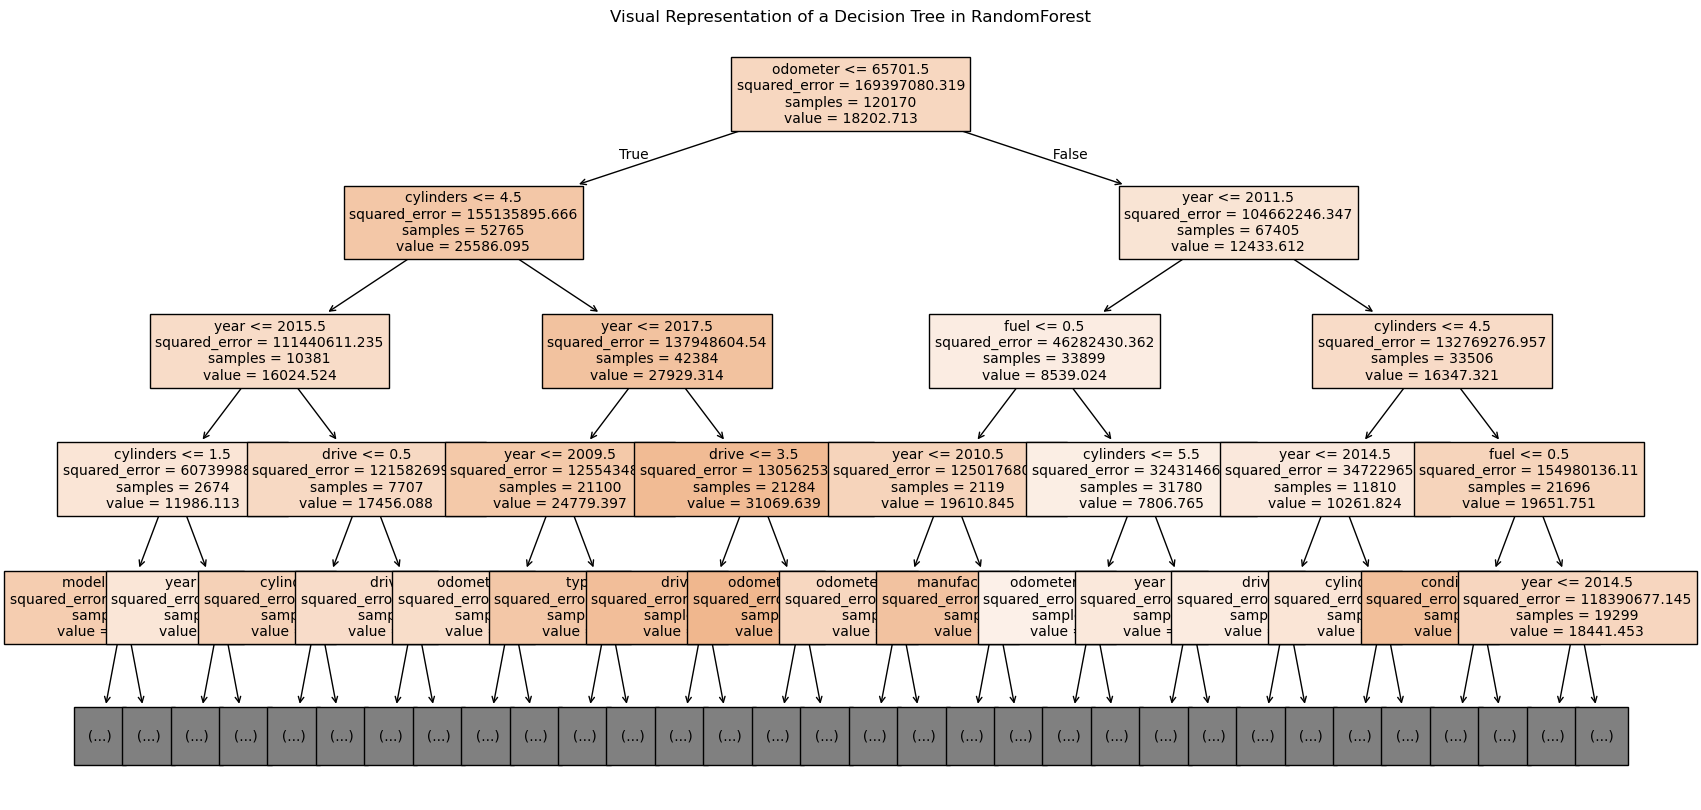

In [90]:
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor(n_estimators=20, random_state=0)
forest.fit(X_train, y_train)  # Ensure the forest is trained

# Select one of the trees
tree = forest.estimators_[0]

# Set up the plot size
plt.figure(figsize=(20,10))

# Plot the decision tree
plot_tree(tree, filled=True, feature_names=X_train.columns, max_depth=4, fontsize=10)
plt.title('Visual Representation of a Decision Tree in RandomForest')
plt.show()



In [91]:
forest.fit(X_train, y_train)


RandomForestRegressor(n_estimators=20, random_state=0)

In [95]:

#create new data frame to predict car price
new_df = pd.DataFrame({
    'paint_color': ['white'],  
    'type': ['SUV'],
    'drive': ['4wd'],
    'title_status': ['clean'],
    'fuel': ['diesel'],
    'cylinders': ['4 cylinders'],
    'condition': ['new'],
    'model': ['rav4'],
    'manufacturer': ['toyota'],
    'transmission': ['automatic'],
    'state': ['al'],
    'year': [2014],  
    'odometer': [100000]
})

categorical_features = ['paint_color', 'type', 'drive', 'title_status', 
                        'fuel', 'cylinders', 'condition', 'model', 
                        'manufacturer', 'transmission', 'state']
new_df[categorical_features] = ordinal_encoder.transform(new_df[categorical_features])

predicted_price = forest.predict(new_df)
print(f"The predicted price is: ${predicted_price[0]:,.2f}")

The predicted price is: $9,172.65
